Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:

Pre-process the dataset.
Identify outliers.
Check the correlation.
Implement linear regression and random forest regression models.
Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from geopy.distance import geodesic

In [3]:
df =pd.read_csv('uber.csv')
df1=df.copy()
df

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

# 1. Pre-process the dataset.


In [12]:
df.drop(columns=['Unnamed: 0','key','pickup_datetime'],inplace=True)
df

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  
0              40.723217                1  
1              40.750325                1  
2              40.772647                1  
3              40.803349                3  
4              40.761247                5  
...                  ...              ...  
199995         40.740297                1  
199996         40.739620                1  
199997         40.692588                2  
199998         40.695415                1  
199999         40.768793                1  

[199999 rows x 6 columns]

In [7]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
df = df[(df['pickup_latitude'].between(-90,90,inclusive=True)) &
        (df['dropoff_latitude'].between(-90,90,inclusive=True))&
        (df['pickup_longitude'].between(-180,180,inclusive=True))&
        (df['dropoff_longitude'].between(-180,180,inclusive=True))]
df

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995          3.0        -73.987042        40.739367         -73.986525   
199996          7.5        -73.984722        40.736837         -74.006672   
199997         30.9        -73.986017        40.756487         -73.858957   
199998         14.5        -73.997124        40.725452         -73.983215   
199999         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  
0              40.723217                1  
1              40.750325                1  
2              40.772647                1  
3              40.803349                3  
4              40.761247                5  
...                  ...              ...  
199995         40.740297                1  
199996         40.739620                1  
199997         40.692588                2  
199998         40.695415                1  
199999         40.768793                1  

[199987 rows x 6 columns]

In [15]:
df.reset_index(drop=True,inplace=True)
df

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0               7.5        -73.999817        40.738354         -73.999512   
1               7.7        -73.994355        40.728225         -73.994710   
2              12.9        -74.005043        40.740770         -73.962565   
3               5.3        -73.976124        40.790844         -73.965316   
4              16.0        -73.925023        40.744085         -73.973082   
...             ...               ...              ...                ...   
199982          3.0        -73.987042        40.739367         -73.986525   
199983          7.5        -73.984722        40.736837         -74.006672   
199984         30.9        -73.986017        40.756487         -73.858957   
199985         14.5        -73.997124        40.725452         -73.983215   
199986         14.1        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  
0              40.723217                1  
1              40.750325                1  
2              40.772647                1  
3              40.803349                3  
4              40.761247                5  
...                  ...              ...  
199982         40.740297                1  
199983         40.739620                1  
199984         40.692588                2  
199985         40.695415                1  
199986         40.768793                1  

[199987 rows x 6 columns]

In [26]:
distance=[]
for i in range(199987):
    c1 = (df['pickup_latitude'][i],df['pickup_longitude'][i])
    c2 = (df['dropoff_latitude'][i],df['dropoff_longitude'][i])
    distance.append(geodesic(c1,c2).kilometers)
    print(distance[i]," ",i)
    

1.6811107421764293   0
2.4543632395347106   1
5.039602684044267   2
1.6614415240630966   3
4.483730087176475   4
0.0   5
11.734667147080163   6
0.0   7
2.338559657552338   8
4.891121357057089   9
2.2503607684447413   10
0.0   11
0.30187973981134575   12
3.579381355682716   13
1.3087360846155267   14
1.7190123091393739   15
0.7312133686589252   16
2.521093389091368   17
1.7901528525637274   18
1.0345529350828888   19
2.493014083353685   20
0.9583104783391015   21
1.2597527059535456   22
1.7500684549215246   23
6.190482758821907   24
2.733597059871957   25
0.7223132575727566   26
3.2255161108059585   27
1.4302720789141845   28
2.239133517434961   29
13.040416375766187   30
1.8961713063881787   31
1.9097003504475354   32
3.180891779182723   33
11.355487331683802   34
2.9275620507531435   35
1.2007675423312152   36
2.6359329726672374   37
2.252064373503419   38
9.96792629234267   39
4.8202106896144405   40
1.2498441727229166   41
0.8004236940722287   42
0.839844004091244   43
0.38528358001

4.135207434352763   431
0.6946336898344215   432
2.306487182317462   433
1.3155247756599675   434
1.5768961348828872   435
6.138183192063493   436
4.683456672349237   437
2.1153336235024383   438
8.231519655655307   439
0.8844992826227238   440
3.835383448277985   441
13.11291115510408   442
1.7302765732930783   443
1.0121392411230752   444
3.177819846918013   445
1.9456163000025475   446
0.847857175899509   447
1.2708960821124262   448
1.3400219223922707   449
0.0   450
1.4575962087955316   451
2.29050585250911   452
8.289208609509126   453
0.9270124275639315   454
2.867517194208217   455
2.0460260212549386   456
0.2400276817923439   457
3.687750718415487   458
2.0176444181530635   459
1.0092834746501957   460
1.4913535624684184   461
1.5234562569496173   462
3.6204529380309802   463
4.909896666293845   464
1.1664566587545213   465
3.9533988709568173   466
0.0   467
1.0224225901065005   468
1.3948429304821213   469
0.8183787895901877   470
1.2291724307067844   471
0.6503451167148817  

7.825982151986384   858
1.2307505843448292   859
1.5752535896358868   860
0.0006873664888122102   861
1.021575577114762   862
0.26797029071043327   863
1.4930514855473696   864
1.7423823883697012   865
1.4661879451480386   866
2.1127427245239088   867
6.3112658501620675   868
5.401529611046152   869
4.857026441476108   870
4.40607290348742   871
1.989390294475921   872
1.1967717240008093   873
7.3957645070952145   874
9.38256452975106   875
0.9290233934852781   876
4.706307984398525   877
0.3656364892239087   878
3.8056673729596944   879
32.85701304006035   880
4.754548728251103   881
2.1022332826496877   882
1.7783309181616584   883
1.2447695874217044   884
1.9671184893583284   885
0.04499589057212273   886
0.682742638798243   887
1.7336494077710765   888
0.7426372563346113   889
4.947681295154091   890
1.2603426872453158   891
2.34803132420797   892
11.29149201606237   893
9.980538409732782   894
6.8160737465186045   895
3.6331135344781744   896
2.3733894736671837   897
1.23930923720

5.58216723684783   1240
0.46472745304373086   1241
8.652241378845986   1242
0.8012328972556516   1243
0.7212694154499731   1244
1.210660902629498   1245
2.611851753684395   1246
0.901212424041114   1247
3.147173281489351   1248
6.311094071209081   1249
7.353956100388666   1250
0.9672892033746021   1251
6.426946014484481   1252
4.100980551127119   1253
1.0441045328557677   1254
4.828160529687598   1255
0.6735604867338784   1256
1.9873297810209227   1257
1.0949223534900756   1258
9.263251635244059   1259
1.0405856737662567   1260
1.1507135747370598   1261
4.064352208681907   1262
1.4477031627555526   1263
1.0452259603955523   1264
0.9656868732304157   1265
4.424545919694777   1266
0.0   1267
6.6140933857425805   1268
0.8365715302490094   1269
2.4077534437412145   1270
3.08727118728936   1271
0.7788662437092526   1272
1.6563425040654964   1273
2.58058758646914   1274
1.9430371184223845   1275
2.3221325166156443   1276
2.182283454996237   1277
1.1986729175912263   1278
20.609728041988095  

2.464089261565793   1735
1.16655657172935   1736
21.08010500589922   1737
1.2552295167152934   1738
10.389136350798468   1739
4.630774788252161   1740
3.4553236714657714   1741
1.9072800582004337   1742
6.500704669208676   1743
7.838095086734424   1744
0.5123938504921296   1745
5.500163966780021   1746
5.230696328485263   1747
0.8827574093174565   1748
0.6357056163920628   1749
0.030046780631658034   1750
13.396420324803167   1751
1.5985247969954552   1752
1.9463725010100381   1753
3.534684690317799   1754
0.601352543131723   1755
1.0698664367623967   1756
5.113082920131918   1757
1.7991099883258974   1758
2.5312797533776483   1759
5.242050989316048   1760
1.0928516857795492   1761
3.518609795764115   1762
0.15030370390829817   1763
1.1923863600463327   1764
3.1309519075540035   1765
1.3462205486409922   1766
1.8218748448546702   1767
11.182345332351943   1768
5.532867416238804   1769
0.49064131332535005   1770
0.76248852321211   1771
2.555100134248933   1772
2.5972756860952826   1773


3.177214913701647   2147
1.3119183808203811   2148
7.071099930244053   2149
2.2163812517523627   2150
6.02356056984585   2151
1.4848198692503523   2152
2.436204998959246   2153
2.8976492103445644   2154
5.47019924703803   2155
3.542507836571883   2156
1.0900313195055693   2157
3.1145207809518425   2158
0.9471893871715685   2159
2.2831640793490764   2160
9.598214254810543   2161
3.1603403503621483   2162
1.7261271151763298   2163
0.7968981797807914   2164
18.4568331485249   2165
2.6560484071548944   2166
5956.148467630495   2167
5.031912126346979   2168
1.648200957533139   2169
3.392311520720809   2170
2.2469105584898243   2171
0.0   2172
5.607297622799198   2173
6.103253116017285   2174
1.3298356827552134   2175
6.630121999016558   2176
3.2550166032538144   2177
2.372265014311253   2178
3.766531086978813   2179
2.6600327035248434   2180
1.6682183271320286   2181
2.263762750018366   2182
0.7407526564242276   2183
4.059279145376633   2184
0.8927351858340885   2185
5.3480411264822605   21

3.402932789304772   2583
1.3756805393148208   2584
2.7673898351833905   2585
2.0044464249591187   2586
6.924300364509024   2587
3.2069197409339103   2588
6.799655591594624   2589
0.7588829707653951   2590
4.9790527224919225   2591
1.6689945225760645   2592
1.2561404264319012   2593
5.87573607803588   2594
7.998696373348801   2595
1.3666940264679444   2596
1.0987257925981309   2597
3.7147011929676985   2598
1.5098756609473571   2599
9.290442864437841   2600
2.7934992886135634   2601
1.5459550738064827   2602
1.2652269794166022   2603
0.5837663095575086   2604
1.8007327960869672   2605
2.6596346252238754   2606
1.6896058442749893   2607
4.569694991630913   2608
1.8831382958682523   2609
5.319966099891566   2610
1.4024655904179637   2611
1.0816308172098132   2612
7.070678416189299   2613
0.9525218817963791   2614
2.9989411799091403   2615
2.019951059968673   2616
2.7683937731848425   2617
1.656202767191726   2618
0.8128666227586123   2619
1.522281613784161   2620
2.1440002909746734   2621

0.15627131395748423   2959
1.7949736167055323   2960
9.399729178574205   2961
8.26979265565442   2962
1.198191424300755   2963
1.6484325817882803   2964
17.169599840383718   2965
1.3892438204580073   2966
2.2949511862976903   2967
3.4338039745320748   2968
2.131065558945129   2969
2.0154253948005647   2970
4.4706783055266905   2971
0.0   2972
1.8666336698668802   2973
6.947772603941304   2974
3.065172999980356   2975
4.558061418925867   2976
1.0699473543451927   2977
1.0965492957295928   2978
1.525369152817221   2979
6.455723830514277   2980
0.6595625631374461   2981
3.9066644856808153   2982
0.20310026758738017   2983
0.9027207977939145   2984
1.2286094223444033   2985
18.189613103895034   2986
1.0245256329023567   2987
0.9639287685967495   2988
20.074856034340307   2989
1.6770762430296082   2990
3.4439854428980796   2991
3.367008033701634   2992
0.9936776126499914   2993
0.9663279762568061   2994
0.0   2995
3.532482161773765   2996
5.108887889437528   2997
1.5517291330204064   2998
5

1.6740020276192247   3390
8.78910932064126   3391
0.34487882155537647   3392
5.058757956441504   3393
1.9690153873026928   3394
0.9290743014098977   3395
6.5545918792595534   3396
2.444344120154554   3397
1.0207911991082088   3398
5.190736209557588   3399
0.8098215828985824   3400
0.5669818630169066   3401
2.1126920605733828   3402
5.892337992933732   3403
1.5714653628344544   3404
1.6494952265407061   3405
2.385242794344299   3406
1.3694405939880816   3407
1.6749770188600415   3408
1.4164738416780642   3409
1.4095529010392938   3410
4.034946556120793   3411
3.714360438094377   3412
2.4611664528323063   3413
1.1825149546004743   3414
3.6387905171818797   3415
1.513494383778918   3416
2.957167628053408   3417
4.917614639517069   3418
1.2949650204959828   3419
4.994570258899459   3420
5.948443433911019   3421
2.270281036296573   3422
0.33675292137329754   3423
0.9306378073470336   3424
3.618571950129965   3425
1.56659167582479   3426
0.9104705105101115   3427
2.7014812466246862   3428
1.

2.07553580751433   3846
1.6751623127063604   3847
11.046111041494738   3848
5.615712823488075   3849
0.8146615671728223   3850
3.7793146100660846   3851
0.9938532074132778   3852
0.8813257959028401   3853
1.8532970963976085   3854
1.342959095239754   3855
4.635674510041109   3856
1.8804993899099596   3857
2.185100738877503   3858
2.0867150380002695   3859
0.7179457032690009   3860
2.097250145207015   3861
3.279781778441067   3862
5.093436704823225   3863
3.1416660388398   3864
1.0492775968177215   3865
0.8758788808972857   3866
1.4793190183403528   3867
0.0   3868
3.395874642750805   3869
0.9402091674273063   3870
3.5952870659689538   3871
11.847112213619521   3872
2.3651235212442447   3873
4.229114870153566   3874
2.849300511502632   3875
22.27403283568535   3876
0.8843119315099951   3877
3.5468126463602028   3878
4.33615268959354   3879
2.581643620860306   3880
2.575187726662504   3881
4.3040572787991085   3882
1.659826151830756   3883
6.4424065221747595   3884
3.1596975285863294   3

4.4453881375169395   4229
1.0146613187720575   4230
0.673041012983196   4231
6.840791097703116   4232
2.3572289549334418   4233
4.153039469049757   4234
6.59121375352675   4235
1.8627684387936496   4236
1.6182184820230645   4237
1.2436946136522982   4238
2.408775862833626   4239
6.912997301211832   4240
3.532317048579943   4241
0.8676710379209562   4242
5.796074968638752   4243
1.2638747517107867   4244
4.507319649917417   4245
1.957821872939304   4246
1.1964809140325192   4247
8.376142034013105   4248
17.46101914067522   4249
0.9416066882860176   4250
0.90252553900838   4251
1.2407713893431496   4252
0.4381623158847351   4253
1.0514542966369336   4254
4.2238736742550325   4255
3.3493686910425073   4256
2.3568288823334247   4257
3.377759268510141   4258
2.746625835375217   4259
17.02582650061672   4260
4.298275877728801   4261
0.5492373615347048   4262
1.138119454256243   4263
4.371727841972242   4264
4.19584480461566   4265
6.764971614358027   4266
2.679811340964611   4267
0.832038227

5.45330196265592   4627
2.3125861531150664   4628
1.3414206279590988   4629
2.5843659580383287   4630
0.9176447190777676   4631
2.063092446639515   4632
19.358152510279364   4633
1.6611830348784273   4634
1.1788354151643425   4635
1.0621750079832102   4636
2.478537816357212   4637
5.243122662247909   4638
2.0880644326487516   4639
1.6175024293749367   4640
1.0268051141729218   4641
0.0   4642
1.4117647611804298   4643
4.407136334263589   4644
0.9868500692698554   4645
2.9535063841915377   4646
2.2475793570310922   4647
0.8226215210057878   4648
1.3284707363835948   4649
2.912444937217022   4650
2.988260626469885   4651
6.738803335604453   4652
3.1223552550304468   4653
0.863422258063552   4654
5.520732886075021   4655
0.05805740736291132   4656
2.8195391986509217   4657
8.811221030360125   4658
0.6984002400073558   4659
1.3384923706793543   4660
1.9354702189673725   4661
2.5672574720151387   4662
3.363547241709236   4663
1.5529071540476977   4664
4.929316559599768   4665
1.627278009151

0.7491014364430771   4999
4.891043985725598   5000
10.300627581309342   5001
10.038611716607527   5002
7.28127204912018   5003
1.3511761338146742   5004
3.763190920496692   5005
1.7976972262699944   5006
1.4525817891210306   5007
2.8029327928555485   5008
4.948233469726508   5009
7.065558978874454   5010
0.9465903359015378   5011
1.803545100506684   5012
3.7872392428243717   5013
0.8029606176447093   5014
2.0812445366956567   5015
12.029480439662734   5016
3.430960612653991   5017
4.517839567042945   5018
1.17373571688197   5019
1.3248855788545366   5020
1.8748961126643928   5021
1.5893564766361963   5022
0.4882732116322404   5023
2.07864455697888   5024
9.137107159410442   5025
2.4141714204735476   5026
1.7189791242603474   5027
2.1043287209427586   5028
0.4594619255446147   5029
3.3043985756367933   5030
1.9825631863849251   5031
0.602599523194719   5032
3.8856528233038885   5033
1.3661900910206202   5034
0.752824094133367   5035
1.664984698695133   5036
2.0949301601952404   5037
0.1

3.810907461471375   5406
11.26661217694002   5407
1.7961447785215698   5408
2.0974896904707236   5409
1.2992833999122129   5410
0.6809064013637711   5411
2.4441215873276323   5412
0.9777159863257169   5413
1.6216669330739786   5414
2.17819720770646   5415
2.102034248236071   5416
1.1049123459949763   5417
8666.10549138064   5418
2.438181204877959   5419
4.004780152970506   5420
7.369322105619658   5421
1.3235918271731544   5422
2.729260124806468   5423
0.699112462038743   5424
1.2055678480095409   5425
1.42092497384588   5426
2.8389727064825814   5427
1.7419240562499174   5428
2.641197236394919   5429
1.9856058573348638   5430
7.536888446462351   5431
1.8069185446291764   5432
1.112274870221768   5433
1.0556183095839844   5434
3.682471274737018   5435
3.0531533975415277   5436
18.652992178604443   5437
5.999270188037315   5438
3.6103162465346945   5439
1.8929961762888217   5440
1.602240213514283   5441
8664.806936014536   5442
1.7293301474238605   5443
0.5328619355024257   5444
3.65197

1.1910265491134324   5787
1.681948941238369   5788
3.3416519007407013   5789
1.1863070805695322   5790
1.0116499651466295   5791
0.01745537237670316   5792
1.4046181826162576   5793
2.137061016076531   5794
0.9442460157863412   5795
0.5276478272090906   5796
1.210024603738329   5797
1.1534161218866779   5798
10.539194410844908   5799
1.082217109793332   5800
2.1872631899436246   5801
16.492590343494445   5802
1.862105848329595   5803
2.816093864169366   5804
0.22903113459001853   5805
6.6541106072232274   5806
1.7338372861737095   5807
4.218109845105459   5808
3.0055900076421462   5809
3.932825762316337   5810
0.5729701352814306   5811
0.26250356537865055   5812
4.538980463998583   5813
20.81983591409261   5814
1.1410701010322921   5815
20.998200387096315   5816
4.7448893509721435   5817
1.22390145744815   5818
8.389407253798097   5819
0.0   5820
2.4696528582173687   5821
12.681104724403788   5822
5.363972525508008   5823
1.793548132869709   5824
6.908419619012315   5825
22.09377107905

1.8529729466899603   6125
1.1157549251499626   6126
11.850886398350704   6127
3.72221443594923   6128
3.1942304824783174   6129
0.9385801697657468   6130
2.628718760196171   6131
1.9794745496115878   6132
0.0   6133
2.9266465065501692   6134
4.9697164005812065   6135
0.849594491839756   6136
2.018689478058913   6137
1.2850587130890536   6138
3.566353455533035   6139
1.2082724419574409   6140
4.147027841023648   6141
0.7200785371883197   6142
1.4803156158488024   6143
1.0732154090936814   6144
2.7148844223156625   6145
0.9391231948458265   6146
3.140813721125851   6147
3.308617000516307   6148
2.5275680573615347   6149
3.4843957104764964   6150
3.8003127019788274   6151
1.5201228802443623   6152
2.737594101689335   6153
3.4019687871307616   6154
7.298227183251946   6155
1.5234505209204872   6156
3.183174601389561   6157
1.3642677122391171   6158
0.2731288801304009   6159
1.0005024891422762   6160
5.431089208300009   6161
1.126965656942939   6162
0.0   6163
2.957321721106752   6164
1.036

1.196490791431395   6562
2.032261605530616   6563
0.38153822072989624   6564
1.3938913652063645   6565
2.9543670445982206   6566
2.3892444549557936   6567
3.2954538969799954   6568
4.345287681278208   6569
4.228825470570883   6570
3.679023785495013   6571
0.8664282797531248   6572
1.9512804445998313   6573
0.9495199849388805   6574
17.32287714542739   6575
6.26191715709521   6576
7.825744840049147   6577
1.0018391155751485   6578
0.47066668725648025   6579
1.0507709681120407   6580
3.315892801598424   6581
1.5913583251414873   6582
1.5139372272922695   6583
19.413055519960015   6584
19.443250697170196   6585
1.5777841072264813   6586
1.0512823952427837   6587
2.707605962117658   6588
2.5937017878068214   6589
1.4200388689775612   6590
2.1349723656208526   6591
1.7046810507451313   6592
5900.491812497287   6593
2.085043639605825   6594
3.8054237275606777   6595
5.70105074935216   6596
0.830498940322304   6597
6.418058234934325   6598
1.6428144209306776   6599
2.827552798169589   6600
1.

2.374198706493254   7004
1.3518450382270872   7005
2.6248338143023298   7006
3.4104664581701547   7007
0.3601115946626466   7008
1.1721223051582847   7009
2.326702829113099   7010
2.6219391767470803   7011
1.2392900640196638   7012
3.7938228161610423   7013
2.459882598777078   7014
2.0423557466795823   7015
7.672967994460508   7016
1.659149890892734   7017
16.72177950790378   7018
0.47517817385964123   7019
5.676608773249436   7020
1.577279458999228   7021
0.7110484871862829   7022
2.2316835961730246   7023
1.4187721806456912   7024
1.0788425502435954   7025
1.296592595599946   7026
1.9800896567607824   7027
1.024559306781305   7028
8.050911379162033   7029
0.0   7030
2.4136666054718856   7031
1.9763072758990068   7032
8.103573779404105   7033
6.010275403580976   7034
3.306345785175475   7035
3.0219929869265596   7036
0.764084410425826   7037
1.998506103703085   7038
1.5702792434013157   7039
4.0751150729432535   7040
2.8847764910413396   7041
0.804557479336094   7042
3.970288900765323

0.8999927499385781   7379
1.9684090138908443   7380
0.5923310336159132   7381
0.8611809709307156   7382
1.559841383706075   7383
1.1033022104210939   7384
1.3341920804007317   7385
1.8460583155271004   7386
1.2134148911810057   7387
0.6569491413779343   7388
8.546018375291796   7389
11.03712780571725   7390
2.7591748076070197   7391
14.233032622830107   7392
1.4806863896790505   7393
3.3745878342349216   7394
0.8088362060904425   7395
1.3568005318579737   7396
1.9349005768217664   7397
2.0590321764611015   7398
3.109215507678687   7399
3.2089373989711643   7400
1.6978592594820403   7401
6.114559177965074   7402
0.8689930868868114   7403
6.4245243268776875   7404
1.6669358969010477   7405
1.0018030717153172   7406
5.1168153759628385   7407
3.2507750304231995   7408
1.2807518750753546   7409
2.108224046508397   7410
1.3736251836804132   7411
2.9674611978162293   7412
1.9218325362958368   7413
3.5643252571571487   7414
0.0   7415
7.752267902528772   7416
1.9030060031014726   7417
0.991106

0.8198358080882616   7735
2.2840351673899004   7736
5.15304216971628   7737
3.9011855469600585   7738
4.84194880756398   7739
1.7481252225496087   7740
5.388468298014332   7741
1.317791030364375   7742
1.7479111968906496   7743
3.6501688125807137   7744
2.33319507820152   7745
3.8441469267776274   7746
0.677375424018537   7747
1.5374884359820595   7748
1.9923418535439066   7749
0.5143407074777545   7750
3.337119838916999   7751
2.3761881822390096   7752
1.1646868149509453   7753
8.124833766255005   7754
1.1260535227159538   7755
2.1195641275216484   7756
1.4170281675316068   7757
2.622221881309421   7758
15.078113632419198   7759
2.550696507124414   7760
6.775264303643959   7761
3.8069288858828387   7762
0.7382695995302244   7763
1.7751339239656232   7764
0.6710050079995077   7765
10.778103527331298   7766
6.831852870449009   7767
6.057143304258137   7768
2.075413099661281   7769
5.2577995790124685   7770
1.5833640187827482   7771
1.1840841903565424   7772
4.387349605831724   7773
0.34

5.646117660018522   8133
9.283289150381309   8134
2.134728760184051   8135
1.6527856149351   8136
0.9529856930764198   8137
2.5580782719980144   8138
1.1057966757908124   8139
2.8738829521351144   8140
1.1522686030893778   8141
3.5976411001592687   8142
1.274187001854784   8143
1.0066946058382789   8144
3.213503797725566   8145
1.0826110306473475   8146
1.6983280953851247   8147
2.488864416706662   8148
0.8956653879622347   8149
0.5742209201811683   8150
2.312922470591732   8151
1.7746595836112549   8152
3.1603188082650706   8153
2.773545933200152   8154
1.8536437419785126   8155
1.505087126577451   8156
4.853913504297074   8157
6.653837817126876   8158
7.807050884199868   8159
1.3657465465051633   8160
1.2503379414353795   8161
11.27778558434278   8162
5.99807725194144   8163
9.581455725674866   8164
5.7269418526154245   8165
0.022984209458419152   8166
1.1916654478463384   8167
2.103687464475352   8168
3.757649730580003   8169
1.8000633912510586   8170
3.678428357484645   8171
1.1021

1.8538481536104439   8509
1.8478191536695365   8510
3.0225934256142226   8511
1.7694497160034603   8512
3.3232562681534197   8513
0.7234567923251716   8514
1.7118985289030741   8515
4.934306521501029   8516
1.9448599467903473   8517
1.1127259486558303   8518
3.2462292282981142   8519
1.0476649622674439   8520
3.623050211079673   8521
0.7744639182304498   8522
21.87126650656043   8523
0.9979591866221457   8524
17.03589352160046   8525
2.4677837375825016   8526
1.548086119206885   8527
0.8387874901277182   8528
0.5258387391680047   8529
2.8287978098742377   8530
1.2073602973456397   8531
0.0   8532
1.2110459337799067   8533
2.318622600233311   8534
1.4937692082729916   8535
3.394004100984801   8536
2.5201646408629386   8537
0.7326005492968142   8538
2.4980991673763806   8539
0.8242507206665043   8540
0.8478071486443847   8541
1.77373198034863   8542
3.9966247116177644   8543
1.5935584159585474   8544
1.9354253559713253   8545
1.4093156461363434   8546
13.13375952353251   8547
1.461956678

7.198088995884501   8989
1.781117985744293   8990
1.5191152239223893   8991
8.497752109268319   8992
5.375018415844969   8993
1.9721869960878902   8994
0.7420636730775103   8995
0.8910018546647147   8996
0.7912045599234337   8997
5.104409891848208   8998
3.3368172522234296   8999
2.901488804603337   9000
4.278578784582224   9001
3.055121318416905   9002
2.7806946016024194   9003
5.633579369636343   9004
2.141253143974727   9005
2.5507279321546106   9006
0.8942831230220354   9007
1.1987982638372159   9008
0.8724104449620839   9009
1.8735612852636605   9010
2.277745926220388   9011
8.286278428989942   9012
0.7852996931022234   9013
0.7938113456593735   9014
2.1876007717048624   9015
1.057319854071983   9016
1.8377997673245794   9017
1.6063829005403316   9018
2.2084397701268776   9019
3.0226234312704596   9020
20.783902391214866   9021
5.591848910386243   9022
2.4197243516507374   9023
2.738703951724906   9024
1.269938885692361   9025
0.9783893959081217   9026
9.014665911059002   9027
4.4

4.158684173288774   9421
2.441531259879253   9422
0.7807824938244177   9423
0.010733162910548549   9424
1.3791270143162604   9425
0.8303852067449535   9426
1.8039876582486443   9427
1.026460282102967   9428
7.250356686909823   9429
0.9295722358906013   9430
0.0863251476799166   9431
1.931943733269912   9432
0.6552601423231118   9433
4.458769464007412   9434
12.062460533921838   9435
3.0738594167419304   9436
6.846526355171893   9437
2.518325902374639   9438
0.0   9439
5.002452849557365   9440
4.386760237062108   9441
0.2306890413660008   9442
0.0   9443
6.919564186178218   9444
2.0219033693585753   9445
2.4021789671860656   9446
2.163435591764454   9447
2.801490547116108   9448
4.383245788817191   9449
1.512018076723261   9450
5.628275124912915   9451
2.9294128972547298   9452
8.8426549894689   9453
11.409814358266003   9454
4.179550982815944   9455
0.6123498801718875   9456
0.0   9457
2.1287664153823695   9458
9.267998540498626   9459
1.692892386645678   9460
0.25683284632308245   946

5.124632854136973   9815
7.154877955497674   9816
4.721036616155484   9817
1.465666138067036   9818
8.8095713596621   9819
20.312505367774772   9820
0.10853510172965021   9821
3.217441021842939   9822
19.041469247456714   9823
1.0836355032893155   9824
1.3107368875438776   9825
0.0   9826
1.927939070207543   9827
5.431742447210908   9828
6.308333016587309   9829
1.6824629560570927   9830
3.8812438880538584   9831
0.0   9832
0.7092751663391134   9833
3.4930238098538693   9834
6.584053818151811   9835
1.5153810922236464   9836
1.1624204263289566   9837
1.0245479090596534   9838
1.2854572834429592   9839
0.3180318633169304   9840
2.5816163219830885   9841
0.8176889859773113   9842
1.0536252163499382   9843
19.687433204528343   9844
2.036882950693739   9845
2.3262493395277497   9846
1.7385183435127398   9847
2.3938674456141404   9848
1.7087377738003775   9849
6.484911614829151   9850
3.08278326425548   9851
5.0304773219938035   9852
0.7516269906058918   9853
4.2327830340050925   9854
1.488

2.7510083794725118   10255
3.6835367916472888   10256
1.8165452812402805   10257
0.3664439605542921   10258
1.4027302442817315   10259
1.2006737573533675   10260
4.710719499366073   10261
0.0   10262
1.0942350240600078   10263
1.8627919265105433   10264
1.2264965548571234   10265
1.3390887824087134   10266
1.188298016193792   10267
0.0   10268
3.2910027364882133   10269
1.9473400564913281   10270
1.2783433155604889   10271
2.211773234822599   10272
3.993323630429388   10273
1.5151517439571565   10274
0.6327860938733305   10275
1.970934960709253   10276
1.932588907245044   10277
0.8201492701520742   10278
4.528373208374976   10279
2.7686485969788297   10280
0.2838509224903534   10281
1.0003380338904149   10282
0.6504158513515719   10283
2.0760726138909376   10284
3.5649580039330067   10285
1.213839893920559   10286
9.293556123172685   10287
0.9673542646833789   10288
6.125357450852687   10289
4.513435230756017   10290
22.07050292100655   10291
1.7353900752080385   10292
2.41512259024973

0.11287012877565301   10643
1.7756129527472637   10644
1.726433571982711   10645
11.07457357245434   10646
4.420712564043381   10647
1.20067928178138   10648
1.8321883681262576   10649
2.6435232444149106   10650
0.7025541879084376   10651
2.0349614092036763   10652
0.5937012202287274   10653
1.2138515528147802   10654
4.463704578019166   10655
2.0489629687567295   10656
1.3563114486092804   10657
0.47620514248258977   10658
0.766115671721939   10659
2.409028664824361   10660
2.3921255353767004   10661
0.850861452746991   10662
1.2971765028972688   10663
22.491035965478098   10664
4.218497566845641   10665
0.6608223509629663   10666
5.30690919065923   10667
3.084657368075657   10668
1.00883200124965   10669
0.3403977291703152   10670
1.0760611686201265   10671
1.4603353256165255   10672
0.7499662404863965   10673
2.7864384894699823   10674
1.3692208806484585   10675
6.611374109126915   10676
5.990316568596321   10677
2.1133783343114803   10678
0.29985749649755605   10679
0.0857913116566

0.16319178528435174   11110
1.3410261506855155   11111
0.6288185283854668   11112
7.052418675995112   11113
3.156939257748944   11114
3.426506416498297   11115
2.6083152963107037   11116
1.7913559393180531   11117
0.7972093291833373   11118
3.337263640176011   11119
0.7478076975126673   11120
2.5475703006549675   11121
1.9044250502417004   11122
1.3217345272011878   11123
0.9346753561142965   11124
0.7230535801239695   11125
5.996613079437196   11126
0.47511878450448003   11127
2.016841699189891   11128
4.063140462156342   11129
3.4704991588151035   11130
9.42571122605036   11131
2.1249360714864682   11132
2.7275498220974725   11133
5.909978097650739   11134
3.912378305195712   11135
2.327681066505869   11136
0.76011395372164   11137
2.4597361243454205   11138
2.266087424015501   11139
3.155476884865766   11140
1.4714737184405666   11141
1.2050041174755088   11142
8.347605457852119   11143
7.024636566210393   11144
19.63693956341232   11145
0.9563981825213339   11146
4.3328700354212994

1.4745407145036256   11582
0.4508186685335342   11583
4.084645096195863   11584
1.7437768803375333   11585
3.042603985910133   11586
1.2634821323314043   11587
5.176853802282854   11588
2.49674701712597   11589
9.164746791082642   11590
3.497840528510541   11591
2.414667589338962   11592
1.29259485164134   11593
1.7939346250013741   11594
2.2935505199403194   11595
4.280720348656953   11596
0.0   11597
2.75574974007052   11598
0.975955105688649   11599
1.4096404371303959   11600
1.4867110820433083   11601
1.1014995857824565   11602
1.300247916574307   11603
10.960623786460165   11604
2.199257797390245   11605
1.7113571997753592   11606
13.61744405419572   11607
3.7250071742712785   11608
1.420939617569378   11609
0.20333000727769626   11610
1.8134453106477388   11611
3.410066876225111   11612
0.8333678430766055   11613
0.0   11614
9.925265541619606   11615
0.0   11616
1.0114542921946317   11617
1.5079913406561845   11618
4.38463734767412   11619
2.78866789765008   11620
3.8821026560417

0.8596845344572657   11979
2.019971187173046   11980
0.3625847309698035   11981
1.5152292166029397   11982
22.313428573393274   11983
2.590680808230846   11984
1.3162924010996504   11985
2.7730472033099574   11986
6.441837149145875   11987
1.8230402994888057   11988
4.532030423073103   11989
2.1139212484898677   11990
1.9635454597203499   11991
2.634487292954616   11992
4.46866750808317   11993
0.7654204035203573   11994
1.8594559150460623   11995
0.0   11996
2.3159983938845605   11997
3.3120337568601252   11998
0.9159738578459603   11999
0.7136341908443256   12000
2.2529670841150127   12001
0.7860065638436808   12002
3.4992931785796   12003
2.009281125551714   12004
0.8952636496804189   12005
0.938987163879991   12006
19.47370730075928   12007
1.5887239665369333   12008
4.179416205645981   12009
5.840201950698065   12010
5.892963144077   12011
2.8060027034745083   12012
0.0   12013
6.877182362151191   12014
3.0433653202970863   12015
0.0   12016
1.2157077958173053   12017
1.1044826239

1.1873839916550264   12370
2.086903226235543   12371
3.686763985805658   12372
3.2429169455186884   12373
2.93190618234919   12374
3.1906761840270965   12375
1.9208919910341076   12376
9.971940573652153   12377
4.803909894249624   12378
7.513774388754592   12379
2.8481537404285473   12380
10.280663933130285   12381
1.1580826833997881   12382
2.9485959916947357   12383
1.6115268385557253   12384
4.335699191980014   12385
2.860103548089082   12386
7.20334416257012   12387
1.296500712141385   12388
1.1132965262327763   12389
1.4737410320822066   12390
1.44376671017958   12391
2.6600813847189455   12392
5.461756552739118   12393
7.027144597893526   12394
2.4314327508358757   12395
5.062406020430722   12396
2.255938236014428   12397
1.0856901352876036   12398
0.822400245868929   12399
1.475203133613994   12400
1.2387117025885632   12401
3.8338316028673405   12402
0.9393925735771307   12403
1.444176941041439   12404
12.334883563844418   12405
8.107171353371324   12406
2.007735576294181   124

1.6594733531374888   12749
3.0481649432218934   12750
3.9502582941818725   12751
1.2066991339322444   12752
1.058450363071746   12753
10.753666856199851   12754
1.8419710424780438   12755
9.20677698572881   12756
6.837213014582094   12757
10.728785289469107   12758
0.8894274691067999   12759
5.24113308058096   12760
2.687502460397444   12761
1.297054355201523   12762
0.0   12763
1.0042710493702416   12764
6.623164996678989   12765
1.1432420704512456   12766
4.41495183825263   12767
0.9153106246022865   12768
1.8388168647596475   12769
20.38239318044088   12770
1.2365646757157949   12771
1.7134084524367748   12772
8.080004120347308   12773
11.674655769864641   12774
2.2005967025290385   12775
2.0694044017543165   12776
0.19015524570450168   12777
2.3524370732389643   12778
2.3359354080666503   12779
2.881205582824412   12780
0.3351309535375756   12781
1.5833775389108393   12782
6.069492577227007   12783
2.9215966165629057   12784
1.5667633869299629   12785
1.0252485479852795   12786
0.0

6.2588909879175585   13175
1.7218766171507578   13176
0.8293393382146745   13177
1.200171065242366   13178
2.885452587513671   13179
1.141670103867149   13180
0.9830980026749365   13181
2.045839254279699   13182
0.0   13183
2.7771176152958033   13184
1.6503628233607934   13185
1.468202418154638   13186
9.238220913266098   13187
0.940165148028547   13188
3.178320711268313   13189
2.3209022394845364   13190
2.9063041539971914   13191
3.1908619981716293   13192
1.6111028729342636   13193
2.357374083377518   13194
5.184685576134888   13195
1.6561717384427912   13196
2.611937130643195   13197
1.7707706036645148   13198
1.5824181775635622   13199
0.0   13200
0.7775943495313145   13201
0.8351326701538465   13202
1.91482666609694   13203
0.9282301974436079   13204
0.7432971954380942   13205
2.662855407896894   13206
15.613953632452173   13207
1.5240625789439055   13208
0.38895176592974234   13209
0.48330282571715993   13210
2.0214929664821772   13211
0.5805354258166217   13212
4.15211637081167

4.564244748965122   13520
6.3366014650459785   13521
0.4854862256330188   13522
4.102792220680468   13523
1.1194353290493766   13524
2.361153259050909   13525
0.9426114853543326   13526
0.6432232065373038   13527
0.7627835588153592   13528
2.136721812984286   13529
0.9632273531432928   13530
0.7849930734356951   13531
1.542792100748451   13532
8.295364697221565   13533
2.4185314938850646   13534
3.1564235229663233   13535
2.6511946686867263   13536
8.0088370993768   13537
10.36602311022564   13538
1.793470941970344   13539
1.52474157570505   13540
0.8679512322146852   13541
0.4555582750799922   13542
3.2930865073768856   13543
3.0323182759465745   13544
0.9925632655911711   13545
0.0   13546
0.5060825314055253   13547
1.8691026028627822   13548
15.233448473239362   13549
0.6733283425882908   13550
0.6283759800037283   13551
1.1671593070249164   13552
7.02049003335984   13553
5.0921247745007525   13554
20.750409320509966   13555
1.5859715100732903   13556
1.050037765591023   13557
10.12

2.072349122516738   13982
2.6903636971353535   13983
1.017702260951201   13984
1.8625613255396163   13985
7.567676542539468   13986
0.6074459243828877   13987
0.0   13988
0.8460700408069716   13989
1.4065737677503747   13990
1.4724083061373445   13991
1.0010145027996293   13992
3.237004674453545   13993
1.1124369372147431   13994
2.05743123672246   13995
0.8897201131418341   13996
2.377314551987901   13997
4.988339358672771   13998
1.4046746031827804   13999
2.0965361351062652   14000
0.0   14001
4.354201140669467   14002
2.2566945156594413   14003
5.921172555496602   14004
0.6441760862047835   14005
1.0882937545123987   14006
3.6646262273823815   14007
1.0171874474591174   14008
0.4816963427982118   14009
1.6316698395160714   14010
1.9715889363378207   14011
1.2357281105209883   14012
2.9600359064006385   14013
8.429538104307321   14014
0.6947212798199576   14015
6.001378794800158   14016
1.2271480859128825   14017
1.0497540162746495   14018
4.954678315769068   14019
1.213892563471143

3.3564891315047936   14537
1.163710329213392   14538
5.246895714861141   14539
1.3501308381469026   14540
4.826923028876291   14541
0.6126866137081147   14542
3.028515288335993   14543
1.4767810123683138   14544
8.737106030233468   14545
10.083551439635215   14546
3.523873210300919   14547
1.0430320211977298   14548
0.875328099056507   14549
2.088966542370066   14550
1.5700002895204561   14551
0.0   14552
1.5256124185510656   14553
6.87419286024977   14554
0.9793574630775228   14555
4.4570892308927235   14556
2.1541356474290776   14557
1.0410263772487334   14558
6.336568602534355   14559
2.6097883815225753   14560
6.236021593659248   14561
0.0   14562
0.6991349669660913   14563
2.702071269756703   14564
20.13605962992791   14565
0.6080649238019384   14566
1.3653805341891267   14567
13.786763493988424   14568
2.009303979687542   14569
3.8582244086391078   14570
5.912268131825374   14571
1.9559493701024386   14572
1.4541229023902107   14573
3.3894622180639966   14574
3.60815400703369   1

2.311456749346528   14913
1.019147851804898   14914
5.556008901486817   14915
3.737937645878136   14916
2.0519920070146394   14917
14.752075617141358   14918
0.9544684475180587   14919
2.0141034879959387   14920
5.995540533731698   14921
1.741170359638867   14922
0.9853581380254578   14923
1.1735855376492608   14924
1.5357528642337754   14925
1.5673886071505134   14926
1.4100186794736498   14927
1.4787925268274318   14928
2.1015775328782693   14929
5.690648612508954   14930
2.1475378490869055   14931
0.6046174567457465   14932
1.0469325309004491   14933
0.5393105376983428   14934
1.8507506708587431   14935
1.334183548841805   14936
4.127084782364294   14937
4.237188979231339   14938
0.8716819197750045   14939
1.9858366165001262   14940
3.0007237513738914   14941
2.9580494786424514   14942
0.6116690254101739   14943
0.0   14944
1.8872660164871455   14945
1.868816283864868   14946
2.1447116042192786   14947
2.7345856127394725   14948
2.9734144696884957   14949
10.581805297521178   14950


1.3535309183657847   15400
4.7945069772164075   15401
2.9394101735855953   15402
20.477946303852598   15403
6.314438966356356   15404
2.153326507693682   15405
2.1828146713701355   15406
0.5300937666923042   15407
0.45988039531265384   15408
0.9509503924881708   15409
1.4109682078244152   15410
1.0748699160790058   15411
6.297430605184852   15412
3.3048609580791735   15413
6.514510689317568   15414
0.46236954900462746   15415
0.027528478803117772   15416
1.3794771970697748   15417
1.1155354813015836   15418
1.30267557283805   15419
3.8931318936327823   15420
0.0   15421
3.441114402660416   15422
1.8199505627722823   15423
0.9472323041916543   15424
2.324893560184667   15425
4.389538297641497   15426
2.61700796343512   15427
0.9839316716743407   15428
5.101969103909206   15429
1.908277558135951   15430
21.168533847404362   15431
1.2479442223917958   15432
0.0   15433
2.222474934926064   15434
0.0   15435
0.9053864999629135   15436
4.030100857263199   15437
1.3800721719574085   15438
0.8

0.7921586117919042   15779
2.289882704486697   15780
1.4038790070625546   15781
1.8563040150295673   15782
2.26017013377165   15783
0.7634374792566344   15784
3.1413653682130662   15785
2.085067607743323   15786
0.18298512920866317   15787
5.941812887853391   15788
5.155155223803544   15789
1.181299494052518   15790
1.8339744383477297   15791
2.2732393865726306   15792
0.8435587308288086   15793
2.120906007582493   15794
1.4580277432360722   15795
1.4788110237175138   15796
1.8220378284762777   15797
0.6310236892297385   15798
1.2324551367529673   15799
10.244059113694407   15800
1.3553152115036944   15801
4.781898496480256   15802
0.9174135539312093   15803
1.404302099376881   15804
1.802983127491815   15805
3.718832213379788   15806
7.640482112571006   15807
1.573789587026614   15808
3.1018747459692473   15809
1.1649106868764683   15810
2.2530421184565905   15811
1.0450757209230095   15812
0.0   15813
0.5833231763385371   15814
1.1422395301505148   15815
3.2837848596535424   15816
4.

7.757392821962958   16249
4.573725823011007   16250
1.8142807578165454   16251
3.9576314415093217   16252
1.9437308929629353   16253
0.7374260155858287   16254
3.981362511855825   16255
3.2590970284595295   16256
7.004558001651823   16257
0.6574094110763733   16258
8664.207922319178   16259
2.2968761852141606   16260
9.624639351461513   16261
11.272413504601111   16262
2.2221130941904583   16263
0.7118268204626172   16264
1.5504757975732553   16265
1.8059158204370995   16266
0.0   16267
4.485475034764149   16268
4.746636407534189   16269
2.238533344487574   16270
1.7994741201150144   16271
8666.657014534678   16272
2.3063715644083485   16273
1.0609913490111782   16274
5.635110720899461   16275
8.378507405311055   16276
4.357609173113583   16277
0.9864793447705523   16278
4.227224680101674   16279
2.8686797113481974   16280
1.3074325387186072   16281
4.071919241656125   16282
3.185979768075918   16283
1.677768866558816   16284
2.092768260593936   16285
2.268852502923706   16286
3.036271

1.7766339547153125   16679
0.0   16680
3.4591540036453603   16681
1.182556811009687   16682
8.86939098087839   16683
2.075458561355003   16684
2.017537498631545   16685
13.685931965022709   16686
3.1603283688366846   16687
1.3138768517269166   16688
1.0038755920336087   16689
4.26774891472356   16690
3.258092320404647   16691
0.4764286405577784   16692
0.0   16693
6.790544284875433   16694
0.8216731672321063   16695
15.807867490464247   16696
0.3746516451464674   16697
1.9679154633755886   16698
1.467807126256736   16699
4.318931859099113   16700
5.744369793981194   16701
1.5584849306760113   16702
2.566357679325053   16703
10.553599278799961   16704
10.076367540921405   16705
0.7955820399734719   16706
8667.988512374222   16707
1.6273914144061692   16708
1.008085049894261   16709
0.1754859223810763   16710
0.8650206883961433   16711
1.8787193513685898   16712
4.915820222861626   16713
2.344684190993908   16714
4.376843001270062   16715
1.6204470235040158   16716
9.032607934466029   16

4.929110399072232   17155
0.0   17156
3.652447750372805   17157
3.2532997757759046   17158
4.28911459627523   17159
4.962426298625974   17160
4.24496583683268   17161
4.304553089886884   17162
1.7878114954988882   17163
1.8279789712767658   17164
0.0   17165
0.7755308831312145   17166
2.0232387027419634   17167
5.104691435983489   17168
1.9026513704564991   17169
4.393824792067691   17170
2.8279149753799824   17171
1.37060374738954   17172
1.8250067485132684   17173
6.30274635105354   17174
4.107653352610512   17175
4.70673478571004   17176
1.7973442937489035   17177
0.8868892475967632   17178
4.253741925340781   17179
9.259447827698382   17180
1.4554941967731154   17181
18.06099303177302   17182
1.0971866880166925   17183
6.4055093767991025   17184
2.423214878597537   17185
5.754469565906309   17186
0.10737637542213603   17187
2.1467073617939607   17188
3.466011854736283   17189
5.166759328684875   17190
12.487928345823148   17191
1.2797254154583704   17192
2.082305699356165   17193
1

1.2251339983843303   17568
1.8270236606437658   17569
4.309375550125128   17570
0.0005803839772577729   17571
5.125220450073888   17572
4.619813031934211   17573
2.611374672630224   17574
5.071787055799612   17575
2.1805228640906122   17576
3.377797330252643   17577
7.373406445224571   17578
3.606369024118961   17579
2.4441160321451605   17580
20.39849403140731   17581
0.7813647200620538   17582
7.752908943430724   17583
2.8458390077413216   17584
2.660283725277529   17585
2.6870385016883684   17586
3.0324341672434953   17587
20.883206863610564   17588
0.6589090980956949   17589
3.1447773752284567   17590
2.503262701788919   17591
1.8680401945410388   17592
10.12062881157334   17593
1.116820876345974   17594
0.0   17595
2.4265562851869142   17596
4.398542151977374   17597
1.4982630093095861   17598
3.0663888709038987   17599
0.5660313231275969   17600
1.4342238081337106   17601
7.286839672382904   17602
3.051130247387463   17603
2.2745747537114274   17604
2.443360155561054   17605
0.44

3.9014083055180433   17989
20.426204171672442   17990
3.7946278002966602   17991
4.198785653556243   17992
2.0626264703560397   17993
0.0   17994
2.1650319232649218   17995
0.0   17996
1.1311007984448536   17997
1.1154742667409403   17998
5.936018019302879   17999
1.073155283064726   18000
1.9982846273953605   18001
3.346183220680651   18002
2.3443745008377963   18003
2.352413094981002   18004
5.212597613034139   18005
3.3280226785784737   18006
1.992559515670657   18007
1.9604259090965812   18008
2.3518678551776557   18009
5.270036490048354   18010
1.2571081323213735   18011
4.150107553462503   18012
1.2399368566710638   18013
17.815538773632664   18014
2.601703215343967   18015
1.0898030503971674   18016
5.982342731595124   18017
3.1541791432478887   18018
3.8490850790228426   18019
1.3156032397408677   18020
1.4109252878223901   18021
0.8102054613226282   18022
4.700719129159349   18023
1.5177276237560255   18024
1.966864215446415   18025
2.2834874781783614   18026
1.967781880681098

3.7927514413263776   18458
4.615910507907219   18459
5.654658589774561   18460
2.442754962508244   18461
2.025873714019092   18462
2.6870060149168666   18463
0.9481196549169305   18464
1.451834236850628   18465
2.445973341293442   18466
1.1137184851639303   18467
1.069701427871018   18468
3.051701551864672   18469
2.53461607614686   18470
0.0   18471
0.8605752003913686   18472
1.170442717289683   18473
7.352747511543273   18474
0.445924347052799   18475
0.6804894481660313   18476
3.1742655560752002   18477
0.9356350932417714   18478
5.5226988315142895   18479
4.916245819400781   18480
1.1334789790581337   18481
4.208966455655691   18482
2.2264780340285557   18483
3.719013617393046   18484
8.250906084436696   18485
2.7999522886428574   18486
1.6742449786541422   18487
0.6963142645811782   18488
4.412425416522753   18489
1.4795727456606467   18490
1.0194052130607212   18491
0.0   18492
1.0491343621285685   18493
1.0801302631253349   18494
10.036049135267506   18495
4.584314484856419   18

1.9703212445634326   18922
3.675310894860722   18923
0.0   18924
1.9813123485128874   18925
3.643378545549924   18926
2.1420597231339875   18927
3.4633551883324882   18928
2.6905585436671977   18929
9.026354685322584   18930
1.449062927511177   18931
2.323462033338839   18932
1.6463008417152718   18933
1.6757153645448022   18934
1.9454052194593994   18935
5.9676422894958066   18936
1.9362592872673638   18937
5.828260116826875   18938
2.9693277278916064   18939
2.393256537065182   18940
1.3584022300941934   18941
6.15823708614921   18942
6.670705060256933   18943
0.023264231257913222   18944
1.5857896639222029   18945
7.440747066388421   18946
3.337320915722792   18947
2.2055266061382692   18948
1.808537816198144   18949
3.498180181364565   18950
0.25414720588848755   18951
2.316477632970934   18952
3.4320116527102478   18953
1.135591502243759   18954
0.8208472394176187   18955
1.9204563151633125   18956
1.7728141586649235   18957
5.260406387821816   18958
4.192275584444925   18959
0.56

1.3810139444952931   19412
11.483016149421381   19413
0.10128152136877312   19414
1.8182169784767528   19415
0.6791786125441174   19416
2.121393718022678   19417
5.3042311083008205   19418
2.5451745857669574   19419
0.7675940452132934   19420
1.721172191592058   19421
0.7273420982295026   19422
2.187083679084886   19423
5.320140210096462   19424
1.4886078167057413   19425
19.843212614517412   19426
0.49863708581451727   19427
11.927985484622058   19428
1.076475427196467   19429
1.0254057010333764   19430
0.4865467197255809   19431
1.8704529636214913   19432
1.3027189918640218   19433
3.4641823043471502   19434
5.8278122685195015   19435
3.566223985727116   19436
6.4280028668437925   19437
4.462709546139104   19438
2.8944665091586526   19439
4.489114951619678   19440
2.4603819465601697   19441
3.8933286005452175   19442
2.4836577084548765   19443
0.9753595916465412   19444
1.6740058589062843   19445
1.637846871903019   19446
2.2487207470048434   19447
0.4459232537067575   19448
1.295866

6.69852730179057   19801
2.0889737905847494   19802
2.52360879530436   19803
0.39686739858049364   19804
4.592821514551824   19805
0.0   19806
0.535111631164303   19807
2.1736074610472493   19808
5.603626661668641   19809
1.90860880679273   19810
1.502784560645798   19811
3.4041869814642784   19812
2.175922651528312   19813
3.787346845174097   19814
7.592823708371666   19815
0.8698292129605842   19816
1.6873726775622233   19817
4.33498021537826   19818
3.874631202313414   19819
0.0   19820
2.0129620571240325   19821
1.5415468821617613   19822
0.3827848577330797   19823
1.4459601549141103   19824
1.171312503519333   19825
2.905463319590466   19826
4.287700931772556   19827
1.0299987282225294   19828
0.7145833332164689   19829
0.840699228040292   19830
0.23840057179112817   19831
2.5271951044214624   19832
8.688567924913572   19833
0.9855378682681657   19834
4.5749026153259695   19835
0.6965176750171186   19836
0.000276660319400056   19837
1.796331515944235   19838
3.1261689980196565   1

1.329302919947401   20224
1.910084226797799   20225
1.7766275385035204   20226
1.158063316307797   20227
2.5723054390289226   20228
2.177294520861827   20229
2.4383902606912478   20230
4.614268769679268   20231
0.7267417175706249   20232
0.0   20233
1.455786510878022   20234
0.0   20235
0.83548449552179   20236
9.458775147890378   20237
4.100032545939307   20238
2.110060355057018   20239
4.214714924646344   20240
1.296134816888436   20241
2.082451535028957   20242
1.5134488342363077   20243
1.7137942974224125   20244
0.7500228876358291   20245
3.397275157491274   20246
2.581026738008892   20247
6.656746795996325   20248
10.55213855140426   20249
2.6721096653000678   20250
1.3515323895490725   20251
0.9893868971976656   20252
5.49736912995253   20253
1.9935401280805136   20254
1.791706389631557   20255
1.8769794216057103   20256
6.568624960110345   20257
0.12447005067439543   20258
2.1782226647213263   20259
5.194159108897635   20260
10.972101347465781   20261
0.8556809211941888   20262

0.9164427813453265   20723
0.23872089377523156   20724
1.1003629234026182   20725
2.269453396758851   20726
1.5260809827923378   20727
1.103732699583106   20728
1.804510395417058   20729
2.7928415023620032   20730
1.1391009526807825   20731
2.547976970940858   20732
1.9169050342483624   20733
11.379823548054835   20734
2.8459605477145926   20735
1.6196206526571488   20736
0.9173317003731013   20737
1.0237225592948351   20738
3.550660294150166   20739
21.388425374599546   20740
1.0010675220746816   20741
6.008773549255595   20742
0.0   20743
2.33865041856189   20744
0.44650949785270533   20745
1.7602828284381826   20746
1.246717476689599   20747
4.44735837103417   20748
1.255561189601634   20749
4.525625878166686   20750
2.374348111909499   20751
1.3968157879156082   20752
2.6504045507482146   20753
3.2823974824546225   20754
1.1176881102967793   20755
0.0   20756
1.8616342436061493   20757
0.8613366845643659   20758
3.5727839035061817   20759
4.59685195610586   20760
0.3844461170807987

0.002677182268905837   21126
0.8496237391301044   21127
2.0664931800305855   21128
1.619755513218287   21129
8.120056712319343   21130
1.2664082341295868   21131
0.5257645741167772   21132
5.387285357445235   21133
0.6779440788642621   21134
2.8980171781182094   21135
5.128985819719952   21136
1.4079341539237393   21137
1.2636684839639274   21138
0.48582857526116935   21139
2.729605824947137   21140
10.280190979850575   21141
1.0095513941725935   21142
7.019240661247565   21143
0.97432022954182   21144
6.843333197817707   21145
2.0425070040882756   21146
1.43283052928352   21147
1.1770033726857576   21148
1.740019092862272   21149
8.917350717834058   21150
1.1315754104789781   21151
2.000411079286606   21152
0.6270599238971855   21153
4.160306908376621   21154
1.7900749248721026   21155
0.7317648597990842   21156
1.8577765600559575   21157
2.337649726791106   21158
12.849626459160616   21159
5.1557141518823615   21160
1.1410102625110017   21161
2.1960911298711143   21162
0.0   21163
6.

1.2861280323117636   21534
2.8371545088234535   21535
19.788518390427374   21536
2.4009893747090465   21537
3.807525698629189   21538
1.7103417510575247   21539
1.9585705304227399   21540
12.626805462743901   21541
4.230773247038919   21542
3.290634712441439   21543
7.213060964434807   21544
2.487499378823793   21545
4.71718319525435   21546
2.1511079833571047   21547
1.2487223937968317   21548
2.2770082994408183   21549
3.0656452639730665   21550
1.8643863026753198   21551
0.9285686650132664   21552
0.8096022894578356   21553
6.577495164078401   21554
2.3021243649022   21555
2.410164212552714   21556
0.0   21557
2.6644095041682174   21558
11.8058204626349   21559
1.036037239641398   21560
4.5050372143827735   21561
1.5697477003813942   21562
1.0102524558872321   21563
1.7468547619905102   21564
2.9802953739641276   21565
0.6560939158802849   21566
9.336538929720659   21567
2.041216031624488   21568
8.331511739997692   21569
1.5290546408267955   21570
6.26219860221388   21571
12.403284

1.4540974799493256   21976
12.072830550300953   21977
1.506786385661724   21978
0.29736276535845835   21979
0.0   21980
4.688207140759279   21981
1.338466783883957   21982
0.022407132502927155   21983
1.9069952561184536   21984
1.4436983588953065   21985
1.6301639589673573   21986
0.9075575572121439   21987
1.0237292461265133   21988
0.8782207294695549   21989
3.441638374544592   21990
0.8662381568088116   21991
0.6230923487094583   21992
1.1696732049895564   21993
1.8406656678722642   21994
0.0   21995
3.247873336867405   21996
0.8714744566454368   21997
6.875513654618385   21998
1.3642420661645618   21999
2.7355885366547135   22000
2.5716355854125927   22001
7.541230254141825   22002
8.124834353895142   22003
7.016135514604333   22004
0.8369682814351881   22005
5.945942352404543   22006
2.511774318101209   22007
3.159571739574629   22008
2.008223367440635   22009
7.835813384444961   22010
9.437215853325261   22011
2.041613251796538   22012
19.808790665994135   22013
0.0   22014
1.379

1.8445926733231046   22411
4.962795744001693   22412
2.7401148163575617   22413
0.5053685966976793   22414
1.1308729238841948   22415
2.874959270934592   22416
7.0556007837171775   22417
3.101211173470761   22418
4.676859958238195   22419
16.33295770383761   22420
1.3092808207701967   22421
2.904368524206328   22422
1.9584181791140474   22423
0.35926210794222424   22424
0.8786244363575549   22425
4.896914844214395   22426
5.670960332732186   22427
5.095728713716416   22428
3.057112161812724   22429
2.7861463072986554   22430
2.517097888781035   22431
2.1752747937808365   22432
3.3464109380568607   22433
4.428631942792755   22434
2.9616320720168736   22435
3.645088587577381   22436
0.6089363895582611   22437
2.1457943704835705   22438
1.103058876338798   22439
1.3783589482804655   22440
2.1650725031770444   22441
0.0   22442
3.945395497186086   22443
0.9851277025801527   22444
2.1480049354894417   22445
1.7812800933816744   22446
0.8262133922562752   22447
0.8642660490739874   22448
1.5

2.2851818915244273   22870
3.7344711859734114   22871
2.8185528416300327   22872
2.6007173702754924   22873
3.142694236583196   22874
0.0   22875
1.7544791813034446   22876
3.615503915231984   22877
3.2428240945606914   22878
3.335181798174878   22879
1.3465984973543623   22880
8.29225738552698   22881
6.492971561138539   22882
4.058021230601676   22883
1.7975826398786114   22884
2.3349270148892165   22885
2.1703235200832824   22886
0.5941385221812826   22887
0.9803790924889525   22888
1.4419210489993723   22889
1.967249574006894   22890
2.284836502353784   22891
1.4705544557271175   22892
2.5067695195474187   22893
1.2852407065692386   22894
8.703529730053111   22895
4.498971269123402   22896
3.536901755488718   22897
1.5196865749552793   22898
0.8797584045323122   22899
0.9269812432089948   22900
3.769114130761995   22901
2.551152168068821   22902
1.801769618675833   22903
1.272173460749551   22904
4.220050718688814   22905
3.776885462384979   22906
4.7266248622208735   22907
3.57978

3.0284120972414796   23360
1.636792808344191   23361
3.002034652142643   23362
6.101958554019868   23363
7.047039457660863   23364
1.3921253981096928   23365
6.8815137913102   23366
1.413567782504032   23367
0.06378572841383848   23368
6.788198562781889   23369
1.315632436912254   23370
1.7777678831588453   23371
2.2197505573271985   23372
2.1536448396239596   23373
0.6846872682213441   23374
0.6922755435524832   23375
6.434601918355313   23376
12.27392206215996   23377
1.008414674989805   23378
5.030486281785867   23379
0.7780089288320342   23380
1.8364823275821314   23381
0.17915629637810168   23382
2.1151455282333136   23383
1.3100251506771363   23384
3.5062047035453494   23385
1.243692020568071   23386
2.2977141121249076   23387
0.8115098249653724   23388
0.7327768587237087   23389
1.4662564164901952   23390
1.6225147096717538   23391
0.9483116064315936   23392
1.003959408291586   23393
1.2507473076569424   23394
2.3671635722964495   23395
3.5891659931085997   23396
1.4314615553034

3.426793633340778   23766
2.2672640686969037   23767
3.6942091688942753   23768
1.701434217781075   23769
1.5139233306107045   23770
4.880788459333724   23771
3.9967503121357666   23772
7.250542618695835   23773
7.084056243643486   23774
6.458760297409187   23775
2.2332132959352777   23776
2.4958964164881956   23777
10.719772718700971   23778
1.4636139944719144   23779
0.9949914256444674   23780
0.0   23781
2.106120104857426   23782
1.1149014266405708   23783
4.9433685590031535   23784
2.7944233200816555   23785
0.4345172325118266   23786
5.471886335861137   23787
0.9582586973718055   23788
5.031655986033528   23789
21.049843178061543   23790
4.30034853163502   23791
0.7899532638085413   23792
1.5525599998724435   23793
7.466066130842376   23794
2.225113375887397   23795
8.750767291634958   23796
2.3100086992853   23797
10.488836996294246   23798
0.599784107897385   23799
0.8660415237655519   23800
1.0721064051065212   23801
6.642385082032086   23802
0.8875300571821213   23803
2.704845

1.8410467521406384   24229
0.38262936870146913   24230
2.594629328056526   24231
5.089200258738681   24232
2.100303916197006   24233
0.8003836146189259   24234
4.891956560164049   24235
1.046496546736453   24236
2.289771327520161   24237
2.069187754526164   24238
1.4978910042518787   24239
7.791497099900852   24240
0.8466843483098088   24241
1.6724003265475602   24242
2.6199653832591583   24243
0.9013898467514105   24244
1.522308067989759   24245
0.5232565324420017   24246
0.6107854180069946   24247
2.779625611669514   24248
8.699492086495724   24249
4.902068143407174   24250
2.033863848937543   24251
0.5198887426330723   24252
0.0   24253
1.439199082672503   24254
2.7610478343580294   24255
0.618755863342324   24256
1.6158362733407574   24257
5.359841763980192   24258
2.6453164551659483   24259
0.7003153381413986   24260
5.617862614212612   24261
10.097831354951309   24262
0.0   24263
1.8205600187656026   24264
1.1674710442507723   24265
2.2740973685908923   24266
1.623189407141524   

5.2367843029955985   24619
1.3842964783298641   24620
1.4428494907476883   24621
2.4145588455516362   24622
2.2772062315578703   24623
5.00906642460036   24624
2.6216752157757703   24625
1.3150502242975008   24626
2.712519121352696   24627
2.0456297895859965   24628
0.7370582935810475   24629
8.470420785477124   24630
1.554114127024675   24631
1.7086404173422673   24632
1.0655227382947956   24633
6.538681313260175   24634
5.023444675885225   24635
1.4066977012186108   24636
4.185073612695295   24637
1.3523857917577293   24638
2.398920682236307   24639
0.6228332815965089   24640
3.092505780622025   24641
2.10560089892625   24642
2.8566431596597583   24643
2.5494092339576224   24644
3.846843312197578   24645
0.8970273695958624   24646
4.671682506414933   24647
1.386138589071494   24648
13.864487523490828   24649
3.180054671303073   24650
1.6597307184701873   24651
7.224894886938533   24652
2.8866251280443667   24653
1.7366687115545392   24654
1.3582603208850463   24655
2.911049483140898 

2.7445836408341346   25081
0.5239380853833323   25082
3.612997278996123   25083
3.6971108515191946   25084
3.9432530633879668   25085
5.571258559357143   25086
1.6041043204241576   25087
1.8989488333524929   25088
4.336376844233057   25089
0.6019638322298716   25090
3.3118260016816263   25091
7.101545967955482   25092
1.2390945584166801   25093
13.562822839597644   25094
3.403805440609418   25095
0.7892460195123404   25096
3.1194278610909585   25097
5.452935113533574   25098
12.093647333192997   25099
0.9771754368278179   25100
0.8385268460892323   25101
4.291305185564371   25102
0.8230979094633614   25103
2.714978109542613   25104
8.860275717117224   25105
0.5555109734869862   25106
9.48803204261277   25107
0.6321387852793274   25108
7.3964397718242445   25109
6.244102291636342   25110
3.567592644988664   25111
2.724770946390652   25112
1.319143450203137   25113
1.4731368686467798   25114
8.415100011821831   25115
4.614362505565976   25116
1.0157128406482214   25117
2.140297020065583 

4.536434520837725   25557
2.326131148570155   25558
9.394524586341118   25559
4.7514412389100515   25560
0.5654334072254219   25561
2.969780916021935   25562
6.331359055603144   25563
5.807903518069287   25564
2.3458268061854515   25565
0.8638768549246563   25566
4.053845223067617   25567
0.9846414293846143   25568
0.7896544827022985   25569
3.217618977431905   25570
2.327630224484393   25571
5.446029153944705   25572
3.784556999952496   25573
1.6789637412376448   25574
0.0   25575
2.2182993895256926   25576
2.5817343933610535   25577
1.404700328805647   25578
3.2922582404352143   25579
0.8602731777611421   25580
1.1538426906242778   25581
6.272242703244869   25582
9.809680024807955   25583
1.574316458554424   25584
0.8377905728285554   25585
2.1935893702595712   25586
6.306699626820937   25587
2.169997118996456   25588
2.5101612963748368   25589
20.33631424979013   25590
1.7527828044537175   25591
7.29508016067372   25592
2.092421329945927   25593
2.8283894934320535   25594
1.87232037

2.981243872681236   25981
23.46013602997318   25982
5.029608430941705   25983
4.012084788329503   25984
1.4561710612659715   25985
1.8239897714936892   25986
0.6539207567995083   25987
2.3285558400949125   25988
0.922716084200522   25989
0.6661695679474543   25990
1.9240189230229021   25991
4.0180933635053   25992
1.6435542836647858   25993
1.4812806511517451   25994
1.8186569085906639   25995
5.967385258139194   25996
5.060478409601258   25997
1.7321462694669791   25998
2.077199911238028   25999
3.1746040322494777   26000
8.656463877993364   26001
1.374587098901609   26002
9.559948275374543   26003
5.220462623891364   26004
9.830174587308983   26005
0.41708181988739995   26006
0.0   26007
4.409961273467937   26008
2.833375460618051   26009
6.413414357822189   26010
1.4763904284827019   26011
3.203343263270773   26012
0.40660058405412797   26013
3.574578856429289   26014
0.0   26015
1.6487610512671893   26016
1.3251034266453043   26017
3.405367196047175   26018
1.093790003322597   2601

1.524214424928751   26438
2.5885101802059935   26439
4.330489277411658   26440
3.2129680357323482   26441
10.694942855263532   26442
3.408263403128256   26443
2.268561211401422   26444
2.4358689510350153   26445
0.11442148073915316   26446
5.2502971317153975   26447
0.452355241324675   26448
1.2821329775305383   26449
0.5514912228488285   26450
0.35441187709762967   26451
1.1527291920530145   26452
2.058818114500066   26453
9.348764701645228   26454
18.291486924230806   26455
2.7823072773763684   26456
7.644655498648647   26457
7.105539627837489   26458
7.033957693006797   26459
3.850993577669607   26460
1.1580117952010884   26461
3.5696472621406565   26462
2.8538721735128196   26463
6.5767196756256485   26464
8.266431473736828   26465
1.9711129268451064   26466
1.1098783967581716   26467
2.8331723044329187   26468
0.5769850984251136   26469
1.937609738065142   26470
4.0844999358491005   26471
3.1522360183329003   26472
2.134378894193299   26473
3.001946941028574   26474
20.93730627384

2.721420108610306   26995
2.387574678896901   26996
2.9981309862001777   26997
3.2656602245915627   26998
3.783581839781931   26999
1.0482516781645734   27000
1.3791483017393011   27001
11.141336837257423   27002
1.6290494476484865   27003
1.346538561817376   27004
1.7197518562210399   27005
2.1394476716639104   27006
2.019493181837554   27007
16.433268240431534   27008
2.910967261609215   27009
9.2117320701937   27010
2.013197900676462   27011
7.801087744993071   27012
0.7065278065492255   27013
11.825705960373535   27014
3.06276890321149   27015
0.9515193059210224   27016
1.9596347357507797   27017
3.305243169632118   27018
3.7321041331464238   27019
0.5045800125977735   27020
2.5616055220030804   27021
1.250200882905587   27022
0.9270300981780718   27023
1.6546837768798761   27024
0.402465467096751   27025
13.572141456963289   27026
1.7510885837270262   27027
3.3967015624842056   27028
1.9723294976352461   27029
2.6081213521942224   27030
3.2020646721765655   27031
1.184999435252120

13.487484499899052   27433
3.337190189175704   27434
1.2020010680861508   27435
4.11099327545518   27436
0.8215904202332595   27437
0.9564702030424087   27438
1.0985236376246863   27439
0.6026366833854967   27440
1.984639247369885   27441
14.208863694229981   27442
2.4874177045074974   27443
5.966966087850815   27444
0.6504402176219379   27445
4.041395800874479   27446
2.203252486254419   27447
1.199152350065292   27448
21.505127289246374   27449
0.8033485185436758   27450
2.23056656535071   27451
4.098819068193459   27452
2.260749928753862   27453
0.7877945773409817   27454
2.7588662571129237   27455
0.996297992631545   27456
1.5541072811547707   27457
2.2009940577685683   27458
3.1331917004094403   27459
3.7501540814360803   27460
11.878511695739649   27461
0.5830693056095072   27462
1.758095231181943   27463
0.5092743770537658   27464
2.9580343120078134   27465
0.0304737020203254   27466
0.9892172813493083   27467
1.151713722955385   27468
11.125754155094844   27469
10.6079646709691

3.475589097792671   27907
1.248596177489102   27908
0.5208268951136633   27909
2.1970385643390467   27910
1.3384030835654972   27911
9.72098137874121   27912
2.529233214993376   27913
1.751618508993202   27914
1.816900632679558   27915
19.93633606045976   27916
5.183391058156164   27917
2.794557479532138   27918
1.095082479923349   27919
2.6661056851378944   27920
0.7618068790675641   27921
4.965884751101521   27922
7.467902000090891   27923
1.5066824853380612   27924
2.1996287602743494   27925
2.323870836772745   27926
4.414823062453298   27927
1.2383351857569633   27928
2.2707479771719066   27929
4.343601801025839   27930
0.7075289878253302   27931
2.6701908998630444   27932
4.10894480329562   27933
1.0436862618177527   27934
8.16858026378754   27935
4.13499704157339   27936
2.998531791247   27937
0.0   27938
20.984289520583005   27939
2.5917798682455313   27940
8.508779801449425   27941
1.1802917109145343   27942
5.538846316627092   27943
11.12385343710278   27944
2.5701169272613513

3.0180049751589726   28338
2.6809263368875373   28339
6.029028163553649   28340
0.0   28341
3.740904289030665   28342
3.4122108882823747   28343
0.619869558437414   28344
6.606486735910305   28345
0.0   28346
4.939949583694025   28347
1.3507818608848545   28348
0.7943229212382154   28349
0.30174832937731444   28350
5.714269590246546   28351
1.0447639691759623   28352
1.1050894723980593   28353
0.8773251015984423   28354
0.5490137425816453   28355
2.8711991825586436   28356
2.5954861510400953   28357
1.1496451545310957   28358
0.3294709927816094   28359
0.0   28360
1.2553413390005737   28361
1.345051626452459   28362
2.982125182061131   28363
0.159876434782467   28364
0.6735727382305355   28365
1.7910898098360166   28366
2.834846205335017   28367
1.7022641989082674   28368
0.7674931271127294   28369
2.030685996326146   28370
27.70505589366534   28371
4.096862538487906   28372
10.899243178071178   28373
1.653643331250416   28374
0.0   28375
1.3367825955667678   28376
3.335445825839121   

1.3872689430871594   28784
2.36998084641274   28785
0.4699631686153042   28786
1.5478933167603746   28787
3.697753682812412   28788
0.7788621194615821   28789
2.9813495139520874   28790
2.674777979864255   28791
2.7828891701614786   28792
2.705605949193793   28793
2.0194666874059024   28794
6.841299660898815   28795
1.9149207641318808   28796
1.4541976063012811   28797
0.808475281830857   28798
0.7441219153498538   28799
5.436993490124149   28800
0.0   28801
1.4072704792437953   28802
2.0115707133349003   28803
7.912522865274268   28804
3.740566610878834   28805
2.4698237520877933   28806
1.284553815868241   28807
18.577322271929994   28808
5.426452134127424   28809
2.2214299191825577   28810
1.8146866872273142   28811
1.8276225777807371   28812
5.336886333094339   28813
0.8445859789218837   28814
2.7051059465126306   28815
4.1535705435085495   28816
6.4864623898772695   28817
0.6748518941863748   28818
0.47101792985294993   28819
1.7289749979551596   28820
2.9355388907451325   28821
1

3.747926129136583   29211
1.5124984269482122   29212
1.1270338494503949   29213
0.609702072789578   29214
5.087021737152485   29215
3.085900714243226   29216
1.0263840632098122   29217
0.6845875150604143   29218
4.440793051877694   29219
2.7908106255666025   29220
2.0633013164275846   29221
0.5652804623245289   29222
1.77705880063509   29223
2.7097569111079824   29224
4.370458700461817   29225
1.638312686068365   29226
2.195516458399243   29227
1.7010551745638485   29228
3.687644969497874   29229
1.7789620735606706   29230
3.1406484998977957   29231
3.2018031178579083   29232
1.340141076824712   29233
2.4769086720295332   29234
17.723791300732653   29235
15.562717503578376   29236
1.8279391458994745   29237
0.011807327803434122   29238
0.6683975910480956   29239
3.177480979119328   29240
4.204797085984126   29241
1.2040879744924375   29242
0.8918584349928458   29243
1.3568254794726753   29244
1.7568928171963147   29245
2.6589502787302246   29246
4.312156569403265   29247
2.828102509572

6.727550209946591   29576
1.460052706407   29577
1.5714787455297694   29578
2.5338941852814565   29579
1.1071705174486646   29580
2.2751420062941263   29581
1.415953592658327   29582
2.040038105127443   29583
1.4457070894172601   29584
5.539204485215985   29585
2.241156743505973   29586
1.8071475653317004   29587
6.767749060928997   29588
0.5553743978965391   29589
6.464424715196224   29590
3.7952484573526086   29591
5.313375416798554   29592
3.8075348890084326   29593
2.2307922601549075   29594
0.0   29595
7.839166052002255   29596
3.1618061050803097   29597
0.3442249526947256   29598
0.6984764741423448   29599
8.917762117833592   29600
2.7424943128603454   29601
5.358779684819492   29602
2.1970129908563285   29603
3.965556110274162   29604
2.324274531921236   29605
1.9974353525718833   29606
1.8242994733164957   29607
10.113516389503792   29608
1.120267130788279   29609
1.8482465785325302   29610
6.2619949167759685   29611
2.0593890911531303   29612
3.375868159987858   29613
4.578177

4.2309217380581154   30072
0.7842347018622889   30073
3.5210865612184183   30074
0.0   30075
0.0   30076
0.8773501025539153   30077
2.3326641220846454   30078
2.4896616717700044   30079
2.005103256008108   30080
0.6594537455871297   30081
0.0   30082
0.35036845458533344   30083
4.156610903722193   30084
1.0772680887843742   30085
0.6572122789055952   30086
1.3783904723632934   30087
2.034493420336042   30088
2.261184227356863   30089
2.1465635487883796   30090
10.997002127235703   30091
15.997656734008682   30092
1.3602489685817967   30093
3.9957920717183857   30094
0.8444539552811154   30095
2.5515249293681297   30096
2.741195179026398   30097
0.8198269268705922   30098
1.6999833673414233   30099
1.2407906009135103   30100
4.257023872928771   30101
4.464930743890059   30102
0.49037084617750626   30103
0.0   30104
2.017256122990299   30105
6.15280150147372   30106
3.742197769234523   30107
19.331652234676557   30108
0.9349543689655825   30109
0.8581436713651635   30110
0.86873141515358

0.8483975126033523   30486
3.1379611190509697   30487
4.340355913956328   30488
2.19535770460588   30489
3.2506855541318678   30490
1.3705294977887794   30491
1.363262024192781   30492
1.4176439836959203   30493
3.475604521250224   30494
1.7509396116895473   30495
2.821508939366488   30496
0.50451965943221   30497
3.1431709557621215   30498
0.0   30499
11.58423886932593   30500
7.612800724560273   30501
3.087759572290431   30502
2.4090953970939806   30503
3.388270884452997   30504
0.6491371722876742   30505
0.9566044073084511   30506
3.5129397918515526   30507
8670.455473321475   30508
6.083178964337971   30509
5.487215824132855   30510
18.957536660891037   30511
4.6382545913386775   30512
1.264990077185682   30513
1.3654440765754954   30514
1.136984789700645   30515
0.9373975953360976   30516
3.4434081429392966   30517
0.7482475876856381   30518
1.4334860128657938   30519
7.564350006361326   30520
1.4648320544391085   30521
4.064668097974589   30522
1.5798432725893532   30523
0.876427

9.42082298966019   30899
2.875151418221878   30900
0.6891698737919015   30901
2.031548118544235   30902
0.6727476757445142   30903
1.8251484651947958   30904
4.597670665077783   30905
4.6524819106002155   30906
2.387731491539264   30907
6.204957921914747   30908
2.8756252338636044   30909
1.2845651028639282   30910
4.541184797801642   30911
3.9654856567289034   30912
1.7891918419486277   30913
19.418149681550855   30914
1.054580999511976   30915
1.7029161019087398   30916
2.069108853603907   30917
1.4981846613431045   30918
1.9572004281799134   30919
0.9197973033706764   30920
1.8560183192092847   30921
1.225507925278114   30922
0.7650516303836543   30923
1.7838128862005198   30924
0.6360561285502637   30925
0.40338329719963373   30926
1.7475914070895444   30927
1.1241077385333325   30928
1.8847480862583728   30929
0.9071986948161158   30930
1.5690648785737804   30931
21.514202816664877   30932
3.4417876494931963   30933
1.0423089292974501   30934
0.9922036976496591   30935
2.553795916

1.6085082422500412   31328
0.5967358135383386   31329
1.22464235925187   31330
0.0   31331
2.9661748503758307   31332
1.3002137348593974   31333
0.8297612035230882   31334
0.8480464638663516   31335
1.9467159973526749   31336
0.7401495281660789   31337
2.292275250533333   31338
1.8801310702037353   31339
2.586684318923642   31340
2.022846115604971   31341
5.139338245540548   31342
1.1815255413406505   31343
1.41523453920539   31344
1.624623422459244   31345
1.7963200298054884   31346
2.406483479983598   31347
0.659319664493634   31348
1.4244405748769053   31349
4.009948332421245   31350
2.0123454665597826   31351
2.573089112185817   31352
3.874100010364265   31353
1.732262032125173   31354
2.007608028063075   31355
7.011749493525614   31356
4.294955846566446   31357
2.783230219819519   31358
0.0   31359
11.947644090265369   31360
2.7101626481594208   31361
3.1040099447899014   31362
4.904960351020908   31363
5.405792194601128   31364
2.458644388177068   31365
1.1047379680921634   31366

0.5718758217810769   31871
3.079310932596111   31872
6.852934734223465   31873
1.185768300020922   31874
1.0538647380868067   31875
1.0055953827509538   31876
2.3650950616223407   31877
2.712524449351469   31878
1.82624800210586   31879
6.5557568091904   31880
7.4615720843086875   31881
1.405583325956978   31882
0.697455137107629   31883
1.5360555494527068   31884
1.9663951647453835   31885
2.3361430899272198   31886
1.4896914692977568   31887
1.428763543084426   31888
3.9298815122646094   31889
1.1675825503282757   31890
1.9949529767805687   31891
1.9903312059131943   31892
3.9369661081824776   31893
1.311503609466403   31894
2.0662407472703017   31895
0.8496130081768238   31896
5.1474025531201955   31897
2.277259560744707   31898
19.683754028881747   31899
0.7309915502141962   31900
1.9509310771259587   31901
1.6885881879218558   31902
1.0646272277010635   31903
1.8068455334637903   31904
4.568217979456057   31905
1.6815918056879975   31906
7.637259711199716   31907
2.165631693470400

3.90551335525676   32296
3.3646531190390796   32297
1.8815109671388148   32298
2.8112374286472597   32299
2.3457546542895313   32300
1.7481667819731728   32301
8.951014758646755   32302
1.393507723071101   32303
0.0   32304
2.18294529993614   32305
0.8659133524301559   32306
2.5136551673749428   32307
0.6571455328610226   32308
3.102541105105215   32309
0.9230861333587003   32310
3.9244684200949207   32311
0.610168576229847   32312
2.296228577258403   32313
0.5537884880893343   32314
9.475369699879538   32315
1.962408818518882   32316
9.674508550611835   32317
0.7274223630044908   32318
7.990801436645513   32319
0.48040450850778876   32320
0.03779462142971513   32321
3.1886326889922563   32322
1.5746487449492637   32323
6.6817075173540745   32324
0.0   32325
8.792468677779771   32326
1.350232793298346   32327
3.781338591314539   32328
1.8839157051329134   32329
1.1543413518238481   32330
6.576686236177227   32331
0.7105324625048229   32332
0.8809138002259184   32333
2.0348823960377795 

2.956832747022056   32727
1.762996173494976   32728
2.315945656530443   32729
1.1180125403030172   32730
2.8474023461418203   32731
4.029002911551592   32732
3.3644807359172764   32733
5.596274589453109   32734
4.776279522471816   32735
1.3615664703452597   32736
3.497542812681322   32737
4.21797901846653   32738
2.554909095065822   32739
4.162049487066797   32740
2.486796119280748   32741
1.2220912650116478   32742
1.4238084735611447   32743
0.9471441123148006   32744
5.932851302400113   32745
2.0131232666234484   32746
6.86962148389642   32747
0.909378583758937   32748
0.9632682332197964   32749
1.9534525141412478   32750
2.983140501276451   32751
115.18152254876134   32752
1.497498375847025   32753
2.487366065487403   32754
2.081837035554626   32755
2.4185456416809155   32756
0.5358998438704626   32757
0.9546678392283988   32758
1.910245448519484   32759
3.00045337076401   32760
0.967724164933429   32761
0.6652953817391926   32762
0.8235632134357443   32763
2.2809402002286254   3276

4.795987379253167   33148
3.420550814024988   33149
1.3596893788407118   33150
3.9140392851609964   33151
1.1321266257203513   33152
8.437579234897955   33153
4.350232575686622   33154
2.7975077857393877   33155
2.8499279372189497   33156
2.381723512249487   33157
1.350738947873539   33158
0.6621824544672529   33159
1.4158040342988887   33160
0.8042690259746783   33161
1.48644601829188   33162
2.036592010806826   33163
2.36144153209387   33164
1.4613719735469899   33165
0.5894377329054818   33166
18.11822915245913   33167
3.7840456248978356   33168
0.866437045866951   33169
2.014875347783862   33170
1.986558483954911   33171
5.483204484533212   33172
1.2785801369329868   33173
2.246404903626695   33174
1.3513846833573204   33175
7.797821851732115   33176
1.265661687748317   33177
0.5075074407757066   33178
2.1998100531809235   33179
8.940413610674284   33180
1.3866935527663422   33181
2.3482913942434043   33182
1.2164739495282437   33183
0.13718307446635383   33184
1.1084778408689266  

0.6646499431019101   33626
0.8343851620167654   33627
2.4066137037597937   33628
1.2323058090015577   33629
0.9605314692246575   33630
1.753722102306771   33631
1.6476101003024581   33632
2.112377409000472   33633
1.5657588259110284   33634
2.7619536297496845   33635
6.663845111983154   33636
1.636251767273994   33637
2.447644283337797   33638
5.954747119874112   33639
2.044360807376715   33640
0.4435162742208825   33641
0.7359774252719818   33642
3.2860595652052518   33643
3.872411897827301   33644
3.7052354502539746   33645
2.4412187141030395   33646
1.0657578682225024   33647
1.070013984341187   33648
1.484529382025201   33649
2.4820152472906774   33650
1.2380388013436525   33651
0.5809759418004192   33652
1.9968020572914298   33653
8.359514915191465   33654
6.932331727061527   33655
5.380064590650207   33656
6.000888141236487   33657
1.360237081511662   33658
1.905632405992183   33659
1.4932645042629282   33660
2.9079223272592927   33661
2.2252339423800045   33662
2.090922341885753

2.8314144202945335   34072
0.0   34073
8.817003596632667   34074
0.7512361507363263   34075
3.5577455795195525   34076
5.555861242681017   34077
1.8410810241353652   34078
2.5050082068689035   34079
0.8799533907937972   34080
1.0378405763137644   34081
1.326056986731494   34082
1.9654623921079986   34083
1.2055235481341346   34084
2.879925464554518   34085
4.542523099868949   34086
1.2343264710319355   34087
3.6793167252914   34088
1.322921589730018   34089
10.743519811402233   34090
0.6352942781455819   34091
21.475682471907565   34092
0.0   34093
0.9107538199614083   34094
0.6016436629228646   34095
2.4471254552276633   34096
4.347364954976707   34097
4.144873804964762   34098
0.6643121262458711   34099
1.2715919099813329   34100
0.0   34101
1.8063788958468883   34102
1.9421652355972034   34103
0.5614859814652717   34104
3.7558631715853976   34105
0.6201793376726885   34106
1.5786976098266106   34107
17.624648797329037   34108
1.721677886137366   34109
4.464667540794539   34110
5.823

3.5452050277683926   34497
2.2266288832554553   34498
2.0548548733795675   34499
1.287193388812873   34500
3.307467767796355   34501
5.051411493573955   34502
2.150762700636783   34503
0.17316196892923358   34504
2.973473167873554   34505
2.447772389416638   34506
1.314258930024504   34507
1.0528673535562965   34508
2.393281098440476   34509
5.102780303155881   34510
0.7915483188524254   34511
2.8397198955783454   34512
6.837665972974897   34513
3.4362472077331097   34514
5.065149586617351   34515
2.849767617038264   34516
20.18939009928579   34517
2.244670116954181   34518
2.0979368361675452   34519
2.6163592283026476   34520
6.799110382812051   34521
1.7126948677858898   34522
14.44360511692477   34523
4.572014256453375   34524
5.030183690635445   34525
3.250920836814254   34526
4.449058884192428   34527
7.783832752314186   34528
1.1327001647169381   34529
1.854550007263249   34530
1.1099310950762609   34531
1.9830471354616013   34532
0.8079467668041548   34533
1.2708304813585944   3

3.780650945790539   34926
1.1030179342306843   34927
2.41951990351089   34928
4.635959307307707   34929
3.222928457531682   34930
1.513350357905181   34931
2.9814370171886937   34932
6.355690912743738   34933
4.635212663533717   34934
4.849587131983586   34935
0.9335147034333868   34936
4.420625936871996   34937
0.9336187782795231   34938
4.623254549054222   34939
1.8288264002500343   34940
6.31804071666724   34941
1.6878495446483122   34942
2.7181540408206915   34943
1.9101570054092036   34944
0.8903031489104157   34945
1.853154761814628   34946
3.4366851924473636   34947
2.472487305263616   34948
1.5784084027594487   34949
3.4192892387807174   34950
2.775741091112383   34951
0.6244418911550472   34952
0.829187689576925   34953
1.9113719556612307   34954
0.8901268392668187   34955
0.9768957901131469   34956
0.5850054854894302   34957
0.7363381506960165   34958
4.0908081512837615   34959
5.232084065550832   34960
3.616504779729979   34961
2.141380318729145   34962
0.48875827968667906  

2.8762346745192686   35397
2.2470529990666606   35398
3.5499273600105146   35399
19.141035044899212   35400
1.7027328709763092   35401
2.3012154587196   35402
1.3918270297551465   35403
0.3160235372498481   35404
1.4418765488762415   35405
3.9152236190544616   35406
1.823512552389392   35407
1.2682474145759595   35408
3.6660230075179197   35409
1.3199264404504414   35410
5.858327201713804   35411
0.27134821286053906   35412
2.4421585938154893   35413
9.443688186522781   35414
8.26900084937721   35415
3.575677323728369   35416
17.693670123537128   35417
1.5268218918264513   35418
4.724752741667657   35419
2.899560743166943   35420
1.9785865220789738   35421
2.9191115221942754   35422
3.1266326251383347   35423
4.5776711332559366   35424
4.3631660414583004   35425
1.0187515703792223   35426
2.7633863991553946   35427
4.715740151915976   35428
2.4984545946912924   35429
1.488790353832853   35430
2.5678112909185584   35431
4.240911338247489   35432
1.7474415416483433   35433
5.799521275006

1.8534197275202162   35772
2.1764169453244167   35773
6.502641245112206   35774
3.358198806529182   35775
4.885988379287727   35776
1.3861144693361789   35777
0.874112996758602   35778
2.209053865463567   35779
3.7198164440071655   35780
2.5017980127397803   35781
2.976177114306151   35782
0.5350115324608573   35783
4.818018747244864   35784
1.9143685628483131   35785
1.614701243736895   35786
1.6080200983691901   35787
5.782419995384585   35788
5.824234302787462   35789
1.2506018277899422   35790
3.1408216724805484   35791
2.9665409788712056   35792
2.24328989208252   35793
0.0   35794
0.3021510658789957   35795
0.45624003732025353   35796
20.636865943273285   35797
2.3170030568338054   35798
3.882911110344982   35799
0.7848316587471756   35800
1.7895752649401901   35801
4.439285710933747   35802
5.634075833328153   35803
1.4085030233826268   35804
2.591736845841622   35805
1.1793026316770092   35806
3.3881408889945863   35807
2.235091381330225   35808
4.1547326129399655   35809
2.459

1.407394780518927   36194
2.4582935485351483   36195
5.0620758033246815   36196
1.4374860597822752   36197
1.840475009209371   36198
7.367509493137575   36199
1.8025326697268444   36200
1.3963724180877777   36201
4.523953007724714   36202
2.8020298231894576   36203
3.3300912961676166   36204
9.233820957216293   36205
2.647009270469084   36206
8665.71699045109   36207
0.48106731270688385   36208
1.0425920569796165   36209
6.576271521822732   36210
4.391575422748092   36211
8.22481283551404   36212
1.5586074681074575   36213
1.8271952161900151   36214
0.7692186335525044   36215
0.9698654639599121   36216
3.0269186091182525   36217
0.8083647141222462   36218
0.8738678611092733   36219
0.0   36220
0.7265651280418077   36221
1.413818902525914   36222
13.043200051587656   36223
0.6682348866420019   36224
1.4612321245725606   36225
6.700671527555016   36226
2.0498920845588886   36227
3.7373935685274886   36228
2.2813494634185636   36229
10.831623431456364   36230
1.0548524127322276   36231
0.

1.1669902361262938   36654
0.7756063641911295   36655
1.7900936383288406   36656
2.454617665553072   36657
3.758794491530988   36658
3.1384095979871804   36659
1.655122506678913   36660
0.9781936256663666   36661
3.8671481226099744   36662
0.9234362933591037   36663
15.049034076962572   36664
8.664359771138633   36665
3.8411899980711484   36666
5.8939285678810815   36667
5.4316053792675545   36668
5.3463704359481525   36669
1.8783726126950409   36670
0.5076399474397586   36671
3.9377700461178153   36672
6.993382056146749   36673
2.7763285338796524   36674
1.574152313471499   36675
1.563901664348483   36676
1.0710569384713111   36677
1.6104324792633313   36678
0.9643490361598395   36679
20.538643941761933   36680
15.643044865823477   36681
2.617000380240475   36682
2.473668726027066   36683
3.4020290326523526   36684
4.915124490115767   36685
2.63092230834652   36686
2.609954330326326   36687
2.9603124211061056   36688
1.230546777543811   36689
0.748947618682232   36690
0.82264313482165

3.516076375227583   37085
1.233455006019112   37086
2.0503102400897997   37087
4.904361263897959   37088
1.3405838883304269   37089
1.3675975096593351   37090
1.782789055509872   37091
1.617935458357906   37092
1.8351167670832846   37093
1.6533667587556267   37094
1.6855752524422303   37095
1.5908829805511562   37096
2.4410867080294527   37097
3.7418157656796276   37098
2.750356160185915   37099
4.0149455313463305   37100
8.947459961894198   37101
2.449759581601403   37102
4.035847728398348   37103
0.69517545970937   37104
2.20719850148438   37105
10.950296236459865   37106
3.316382764294486   37107
6.557447803521763   37108
4.46167694559669   37109
6.36700101783431   37110
1.1005596655179264   37111
1.357827336702959   37112
2.4717704260200897   37113
5.939730744453469   37114
0.40995504509479436   37115
2.654033227051669   37116
2.7281741575451273   37117
2.38852093884066   37118
2.883323708618575   37119
176.62806946672364   37120
3.728321647383761   37121
1.1833704250721104   37122

6.882551353722728   37482
2.6041047524113847   37483
1.0285702796922593   37484
0.6392253059314055   37485
0.7962804465555156   37486
1.235276307982697   37487
2.3348477804815855   37488
1.0486920706452516   37489
1.1025421631087733   37490
0.9024244606488616   37491
4.782876191942038   37492
2.362014106395185   37493
2.1134433729664446   37494
1.8557459937539316   37495
7.334259456401039   37496
0.4555840423378922   37497
1.5088322485146768   37498
6.563778034782115   37499
2.112409336897834   37500
3.4433054641566154   37501
1.3290600323517527   37502
10.765503770206307   37503
3.121660736320096   37504
2.941324627514518   37505
1.1635207957914333   37506
0.3792731964897459   37507
1.2245028859025875   37508
4.599899688279359   37509
1.474683511920949   37510
2.3148350828916944   37511
1.851113185827435   37512
0.24715748922685826   37513
1.257718736560709   37514
9.405240941967397   37515
0.4722921366937838   37516
0.7035958611069514   37517
0.0   37518
2.8832803731405754   37519
4.

1.8536396324847821   37923
1.774684614386461   37924
2.3810831692714283   37925
1.9307846776762434   37926
1.4310526619095079   37927
5.864927040503653   37928
3.4007228333455606   37929
10.448316302407964   37930
3.6227458795259793   37931
9.911048274559555   37932
2.1000340156952384   37933
3.274242850415237   37934
4.100504431205354   37935
2.0179955304060435   37936
0.9980950904056137   37937
0.0   37938
0.0   37939
1.6306998243600164   37940
4.462767242544716   37941
4.2813020454667745   37942
5.6960029656032365   37943
1.6287924718170415   37944
6.047014374082768   37945
1.7714388933667027   37946
2.297022554576773   37947
0.14815118943203306   37948
0.8919923381623092   37949
23.220516996465904   37950
0.3334625859692918   37951
1.7266293712991088   37952
5.20002065237698   37953
16.993038394301042   37954
3.2470754785469693   37955
4.79279119858014   37956
0.4768399224103211   37957
8.831399863010875   37958
2.531505413693422   37959
1.0781678228156648   37960
1.035384607670462

1.5242911292640247   38390
1.8868005968210713   38391
2.6488514502360094   38392
0.7900731299439422   38393
1.555835391368943   38394
2.9234107407729026   38395
1.7480999330957463   38396
1.1089259373818827   38397
6.518195112581752   38398
13.90358474235358   38399
2.1559344266898526   38400
1.3583204087954444   38401
0.6671458923899015   38402
1.5025086548355315   38403
3.7241153715962447   38404
0.9227120998775901   38405
1.554801941889308   38406
3.8622552700449435   38407
0.5265833557822288   38408
4.477546738761976   38409
5.279641047598306   38410
3.788668537735173   38411
0.0   38412
1.1535473880150948   38413
0.37076952307442745   38414
0.0   38415
2.4654848667310727   38416
1.0342956913920573   38417
1.2797832127489577   38418
0.66673747471869   38419
1.6057898685997956   38420
0.9818643067250273   38421
1.9764248663037511   38422
1.980052057406833   38423
2.0568462440335855   38424
2.484900835245458   38425
0.5880331929732163   38426
3.5261877841556455   38427
6.404943576097

1.5934142460657406   38773
1.9264887837806743   38774
0.9631752969016233   38775
7.309597755469442   38776
1.4655676752454678   38777
0.6140393435543949   38778
3.2942530832035786   38779
2.478486825444785   38780
0.8391757200506523   38781
1.2993784721029888   38782
2.743127873990088   38783
2.533291652949947   38784
1.7202348526909497   38785
2.346163570237263   38786
1.4059375765746953   38787
6.755755340603777   38788
2.2721132419107635   38789
2.037564732358975   38790
0.6304446902287149   38791
2.0863083285418087   38792
0.6648605213015834   38793
7.0325516604152405   38794
1.4114503524760986   38795
1.8941888759813184   38796
3.5940931592261656   38797
6.271443760354091   38798
1.8739359278455656   38799
10.895557649196542   38800
1.5956348435082428   38801
10.26470598074214   38802
3.4407405326146767   38803
1.027925427975995   38804
3.652858248342081   38805
3.2685324327448524   38806
2.9672066953987675   38807
4.432286873300059   38808
0.9486751820452777   38809
0.81112416040

8.021556989082537   39263
1.3286291860781425   39264
14.215393709220614   39265
1.156017866809954   39266
10.396108183991192   39267
0.7589055213515723   39268
1.6335340542251937   39269
5.924066811002325   39270
1.4415546302992484   39271
1.5430927906473875   39272
4.716279751699132   39273
8.174918082927912   39274
1.032717851017922   39275
2.049348566365066   39276
1.1038303377469076   39277
0.5699895946689854   39278
2.5984431833856583   39279
1.2515822766796185   39280
1.102132527748533   39281
4.6558867441106955   39282
1.922215061217399   39283
2.2798309054496313   39284
3.101720630258363   39285
14.230592483081848   39286
3.3199217598536457   39287
1.229344337804434   39288
0.8523657778911019   39289
11.384384787099794   39290
5.355004509700911   39291
0.7201721395488025   39292
1.2813419990402382   39293
6.793675473118688   39294
1.0535792863093718   39295
2.6885231434023775   39296
1.6392013423799865   39297
1.218012823895492   39298
0.5560995567311271   39299
0.6562614443391

2.2120578462984892   39720
1.8721133161628205   39721
1.5417225421701788   39722
1.561772912645323   39723
4.7732973328456225   39724
3.4102190116234294   39725
1.979316021130358   39726
8.320984389985304   39727
3.029264900971332   39728
0.6978469275412218   39729
1.3484291580980177   39730
1.1452873205326426   39731
0.39710636484505   39732
0.6165830287545518   39733
10.72998243870965   39734
1.4032512690008911   39735
4.718154498930354   39736
1.7453498737047017   39737
3.2977210052461845   39738
3.5593972140869625   39739
0.0   39740
2.1050244891190646   39741
3.519692613383743   39742
19.99540993262343   39743
2.9754220982152453   39744
2.3702258161512937   39745
1.9486704576409462   39746
1.5200283259448164   39747
2.638155997066541   39748
2.236272616477203   39749
2.3472312918397242   39750
4.866188181217479   39751
3.2523581572846925   39752
1.8532121779984914   39753
2.02198860620979   39754
2.2447477233613626   39755
3.8317458867401375   39756
7.749804519630139   39757
2.785

3.0207066954950084   40063
1.654173838853676   40064
0.0   40065
1.3474388014710956   40066
1.9444194847013718   40067
0.16446296443254302   40068
5.430138356959372   40069
0.0   40070
20.633582939102357   40071
5.438888924280259   40072
0.932981497514879   40073
6.315374316144766   40074
1.5259907692828438   40075
1.951715232553312   40076
1.6516329135849517   40077
1.4698902584050255   40078
2.2835595134610442   40079
3.181633656801739   40080
3.033389416489053   40081
1.1266313688280758   40082
0.4091424085737915   40083
3.8048292305825657   40084
1.7752660593427436   40085
3.395910132557149   40086
2.373792037753394   40087
6.797923779518258   40088
3.7252543460257668   40089
3.341184104235442   40090
2.612176456108509   40091
5.002657845959254   40092
4.407966550311697   40093
7.733063359373367   40094
1.9059964802665161   40095
2.694769740403328   40096
3.1598235543132094   40097
3.685044104642631   40098
2.659339033261932   40099
21.39602704803054   40100
1.5386663913244878   40

1.9732569419925312   40564
0.0   40565
1.917744793656867   40566
1.0476724578479573   40567
0.9203153720162572   40568
2.7212300379166985   40569
3.6765968733182794   40570
2.335769974033442   40571
1.7477710000747528   40572
2.4133653235830392   40573
1.4196968337042366   40574
1.3584089463817166   40575
2.5728930517061417   40576
0.933968956600144   40577
0.8259332752118416   40578
1.0625884181298402   40579
2.9581676739360603   40580
1.2607861789727959   40581
0.7665269469043682   40582
10.068461311841855   40583
2.0347830956588484   40584
3.6776951706950087   40585
0.6592248128131182   40586
2.4963964177145734   40587
4.213455509403652   40588
0.7091108710492685   40589
0.8686517783892237   40590
1.6441852323078965   40591
1.3833177716568446   40592
1.4638149239617673   40593
11.394377182464014   40594
5.5231303697037815   40595
0.7996556395879344   40596
4.0837881823022215   40597
2.905186481479227   40598
2.987251043625824   40599
0.0   40600
0.6588850947822485   40601
2.04018076

0.9799568694719473   40989
2.4850081297888655   40990
4.983980446541424   40991
1.2269966429189154   40992
0.5350909388142985   40993
1.174430857550519   40994
1.144815495389754   40995
3.2986604009972353   40996
7.17958039247382   40997
0.9164335893137272   40998
0.0   40999
6.869394508052133   41000
4.405426783901642   41001
1.286500211683096   41002
2.403864260082135   41003
0.8612663138720095   41004
1.7349758235320105   41005
1.917170226428401   41006
1.9225833512944313   41007
1.8452756100274619   41008
5.819554998749715   41009
0.8943816240173003   41010
2.81142970038806   41011
3.7024556430227027   41012
0.827031493508669   41013
3.104420690761413   41014
21.146550240088033   41015
2.003128923360955   41016
7.045184606589339   41017
2.070738291600018   41018
1.4711553679902358   41019
2.0217703862696297   41020
3.674086253356129   41021
0.8079632837271997   41022
1.438939328211552   41023
0.872378822340395   41024
0.9977322900107244   41025
19.483004128841458   41026
3.98581522

2.0667632765412693   41443
0.8244889182274824   41444
1.2706121607440737   41445
4.604342178979278   41446
1.4650282995462132   41447
2.2889867870809883   41448
4.0142795349043805   41449
1.3122641027703628   41450
3.181764369034223   41451
9.197979021584407   41452
2.7907482361949665   41453
2.0756250379771273   41454
1.0676691715734483   41455
5.763482799098252   41456
2.957594024282461   41457
0.0330683602547456   41458
20.47318760744806   41459
3.7183172342776456   41460
1.583730585334507   41461
3.2088211774546918   41462
1.6988883905337064   41463
1.2131688741647284   41464
1.4752171854374136   41465
2.23212157612684   41466
3.5241810424508193   41467
3.108542052089276   41468
1.1213674625620396   41469
1.1302602922709661   41470
0.6843986796502608   41471
0.9673372726954748   41472
1.9656420075461059   41473
2.940172869097938   41474
1.6559523891605867   41475
0.8005024970497491   41476
2.6854030618584614   41477
2.6227363860029547   41478
9.825649610314926   41479
0.49995586138

0.8880675094526872   41896
7.825291011129907   41897
3.419882683270861   41898
8.816818673983326   41899
0.7235971188107977   41900
4.835491729627197   41901
1.33489449144661   41902
3.281702548044471   41903
1.8615403890598792   41904
5.465907903629616   41905
1.2857149284633766   41906
0.0   41907
3.9723890117150167   41908
4.7518024427814956   41909
5.069363926611053   41910
10.5992184912613   41911
1.2828722672664061   41912
2.0474392241487815   41913
1.8732098291465837   41914
1.1398479309704341   41915
2.0110723700398876   41916
2.9626021771980966   41917
0.7373555733607524   41918
1.1152624830332702   41919
6.693043869808896   41920
7.679158837369537   41921
4.603813747749819   41922
6.918072488813998   41923
2.0851533361397867   41924
16.534076723457677   41925
3.433153565908989   41926
3.1571930952255998   41927
3.0648129599126803   41928
1.869892690717087   41929
11.792328219796312   41930
3.554946198048636   41931
1.6409336359743991   41932
4.267692279003217   41933
1.586624

1.9937372967903335   42307
2.223042235881259   42308
2.272473389589523   42309
5.280170281839083   42310
1.07193892051513   42311
1.8451005391712598   42312
0.0   42313
2.7601324075722395   42314
2.687474994364604   42315
10.548034350801458   42316
1.0772601009031475   42317
2.5586183093242614   42318
1.950061742463325   42319
21.399424878916896   42320
1.8110246876649638   42321
3.145382357899599   42322
1.431421703803023   42323
0.44615257492820487   42324
4.8096138553899825   42325
1.7298754477398401   42326
6.418248008574833   42327
2.3740742313068597   42328
0.6462042061988987   42329
6.637341558792853   42330
4.1357975370205695   42331
3.776585962196025   42332
4.264083729137526   42333
9.24491244703853   42334
2.0001930906490837   42335
1.958433499041663   42336
5.498499863549087   42337
3.0037868216430597   42338
4.828375665795714   42339
0.8619806795482812   42340
1.0027994647262617   42341
1.3292874190194546   42342
0.9236664184625756   42343
0.35887067588918853   42344
2.210

1.6848561537491318   42748
0.9424831518866654   42749
3.9198783676565334   42750
1.062315918822296   42751
4.390119756817217   42752
1.4110315464734764   42753
2.99214558708795   42754
0.5103043537985394   42755
3.153681763796047   42756
1.2775731462123023   42757
2.072794893084034   42758
1.6060098403806664   42759
3.5811109432445636   42760
1.056989406764592   42761
1.5327090866128608   42762
2.064290294685016   42763
1.3065950267718163   42764
1.5377661856336138   42765
1.269010220411606   42766
2.821809449800082   42767
1.0524869158343508   42768
0.9242490088219328   42769
2.6503425772038924   42770
1.6941323979643959   42771
1.5817786221220138   42772
0.9871235634253854   42773
1.0384793453330765   42774
13.097147306510108   42775
1.7794676704181842   42776
2.2583356859054926   42777
0.6080525785952784   42778
1.3246252858628549   42779
4.44526397992319   42780
13.313717495418134   42781
1.0818060787123784   42782
1.7004822957156283   42783
7.771358377825319   42784
1.941901463092

2.524894732900606   43216
3.780238916166146   43217
0.6395664432941817   43218
2.2058956806724144   43219
1.0560038683251023   43220
6.503590477565161   43221
2.1156540986941854   43222
1.8839237060496123   43223
6.76110683534319   43224
18.81879738726471   43225
19.37530912473462   43226
0.0   43227
0.7376973808496475   43228
1.9102160072913517   43229
3.3836030715982015   43230
0.011104912601079275   43231
5.314924167633057   43232
2.500785003535595   43233
2.381542241244993   43234
0.8060315233513111   43235
0.7934013673242103   43236
1.1124179379484236   43237
2.594385834686101   43238
1.2057375739246667   43239
3.123006895009776   43240
9.526598735059965   43241
1.4735349488217613   43242
2.1270048675038464   43243
1.0084900002082153   43244
3.274443490291534   43245
3.4107570361919386   43246
0.4853891256507086   43247
3.321570004448056   43248
1.4204005658085475   43249
4.412051863188721   43250
2.262214238982642   43251
2.6101055512005704   43252
3.865609056162253   43253
5.817

0.0   43570
3.0495791203287173   43571
5.92356453618654   43572
4.238529480038066   43573
1.2759177695594557   43574
20.237475151829877   43575
1.8848044233039762   43576
3.710362020807591   43577
3.2491813934552747   43578
0.9465412932755467   43579
2.651524799942099   43580
1.1722746314085215   43581
2.258029879135284   43582
0.13714355889903418   43583
2.3551615312836507   43584
3.836781175438677   43585
2.4615756084431686   43586
1.6809286204507774   43587
17.280217914318893   43588
0.6060110128940637   43589
4.175516569698577   43590
2.2932690879716726   43591
20.651814645308317   43592
2.5291712309002037   43593
2.57573323949872   43594
5.609160384705495   43595
2.9085988076940983   43596
1.9844735221423933   43597
1.5185314416014093   43598
7.278088875696883   43599
1.917416771043831   43600
1.412292841698698   43601
2.1562506832571877   43602
1.9788566514769852   43603
2.5095604706180255   43604
3.8923386523456096   43605
4.366292657902055   43606
1.3607428751638613   43607
2.1

2.024988978915613   44061
2.868574015657696   44062
1.1994291539444135   44063
0.8863045259380146   44064
2.9386072298530435   44065
0.4606926162147492   44066
7.974536561627725   44067
1.1661196672137777   44068
1.3089942902633058   44069
0.9268355353796325   44070
6.639865375340718   44071
0.8151432356009596   44072
4.021590676384194   44073
1.0535520886871392   44074
5.61278034510409   44075
1.5164778058725983   44076
5.313916558212086   44077
3.2638913372231797   44078
1.7743981262194493   44079
7.022297971273144   44080
0.5957686295271284   44081
2.05894794497998   44082
3.210749890903885   44083
1.6925275122227217   44084
0.9966102709735754   44085
1.4936241793475253   44086
1.6913865935065544   44087
1.3998605640361386   44088
2.5513886137893746   44089
3.4376397298630823   44090
1.889165699301584   44091
4.565131801845288   44092
1.8755475853285435   44093
1.7616595113818652   44094
0.5749651761620062   44095
1.752223405136113   44096
3.1210579691064484   44097
0.88628960669433

1.660702575486778   44475
5.245910297287529   44476
0.8829504038165157   44477
1.2635468052166117   44478
5.040694993272641   44479
1.8749680059944154   44480
9.424178334732533   44481
1.684908948217338   44482
2.1094609683206573   44483
9.603709149567765   44484
2.11025220786807   44485
3.674040186777145   44486
2.6244750426685903   44487
20.84550133665836   44488
1.288460403157659   44489
1.281574588793849   44490
20.71969825265964   44491
0.7975959426434953   44492
2.1706935840892894   44493
3.2288987000305887   44494
0.946065863700056   44495
3.3724547601470674   44496
0.5062388018581769   44497
4.879791516774945   44498
1.3013477129050652   44499
2.8150075169753093   44500
1.5444467846718888   44501
5.462927113499544   44502
0.0   44503
4.4620459196256785   44504
4.865080223524635   44505
0.9121237905014657   44506
2.8858918766601094   44507
3.079535965307158   44508
9.69948792267252   44509
0.0   44510
1.6250481604940927   44511
0.9589911290719164   44512
1.6580556328839129   445

3.258735893119184   44884
1.3030394179017337   44885
19.839846229768657   44886
3.4265627947345707   44887
3.904782598295258   44888
1.7875605943154276   44889
1.616237698196266   44890
1.448962647086638   44891
3.188139476630915   44892
2.7517255359051447   44893
4.813524568087537   44894
2.074815114808264   44895
10.65257958208153   44896
2.186253639031354   44897
5.888795769842867   44898
0.9050132656132159   44899
6.197067333700528   44900
1.1940505182406362   44901
0.7916711752431833   44902
2.675698410469173   44903
7.26852260941257   44904
3.406721925198062   44905
1.3654665102726933   44906
2.60735970965166   44907
2.870280251503834   44908
3.9342302531319198   44909
1.750147609179933   44910
10.576310008444896   44911
5.636665288199135   44912
1.46756793655458   44913
13.260069304060034   44914
0.5068909647789842   44915
1.556642872128975   44916
19.91369619123969   44917
6.143366427484342   44918
19.30036044512181   44919
1.8030900501524898   44920
4.0199999898415495   44921


2.0852447291697844   45394
2.7462065587635696   45395
1.5122970588162954   45396
7.031336342542416   45397
6.266770822055985   45398
3.639115026606534   45399
2.1712354943011984   45400
1.289972339446799   45401
0.5736921378048221   45402
6.508165839920645   45403
2.2173274903918263   45404
2.4275104526073736   45405
3.429143737244749   45406
7.738541799110291   45407
0.2021773640907228   45408
1.232390804736386   45409
1.6200312422136864   45410
0.9556964262605346   45411
4.49359412734618   45412
0.640855164794575   45413
11.314558571778841   45414
7.468273003566401   45415
3.6181987389086294   45416
1.9896043981120324   45417
3.8968696098559743   45418
3.449426412571507   45419
11.696976803580952   45420
0.10530711340475386   45421
4.022560113504799   45422
1.83634028843873   45423
2.8550491396640427   45424
1.0344989449073962   45425
1.9697868886429815   45426
5.768922388559699   45427
4.599965903309823   45428
8.3727657933512   45429
1.6450497071533499   45430
1.7988787928515653   

13.2407008013791   45854
2.0429522338275037   45855
3.7249338773666976   45856
5.14323278336658   45857
5.488321881098404   45858
0.9350024794308068   45859
1.593400088456102   45860
3.4370082751985103   45861
2.7156963172262114   45862
3.8256828708650943   45863
0.941994044668365   45864
1.6351496759092123   45865
1.9575641344124821   45866
2.840394465389136   45867
1.1030192589222905   45868
3.6755220128684845   45869
0.6637099176843771   45870
0.1147127749119219   45871
5.5797408166525635   45872
3.7069685495336837   45873
0.9291002185715597   45874
4.31299467376198   45875
1.9024753702735189   45876
1.952077144944165   45877
1.3103743378925308   45878
0.9680336541825104   45879
0.9165487316493317   45880
3.154804616633911   45881
2.7600637780935897   45882
2.251798501174531   45883
1.9932156982520548   45884
5.726453634479971   45885
5.668147321750735   45886
2.0170416086073875   45887
2.4953764021453573   45888
9.928158880995282   45889
6.920899851553662   45890
5.465182046843213 

1.6351504385531745   46240
2.182046839276663   46241
1.1919739369632794   46242
12.53509767733746   46243
1.7775565064671994   46244
2.1588595791253566   46245
0.6965687529163751   46246
0.0   46247
2.8617782723646563   46248
4.894089543862679   46249
2.530894758334285   46250
1.0467770168570512   46251
4.1303432189892435   46252
6.307520675922997   46253
2.3253934278380797   46254
1.9007647246761425   46255
9.933170267594788   46256
1.3879768292473191   46257
1.8545128378120026   46258
2.8263359391775076   46259
6.634872339744573   46260
1.5448996217485869   46261
0.9839901731897499   46262
1.1488797582717172   46263
1.907698364146326   46264
0.8778675895843224   46265
0.37511257754529553   46266
15.73712173848873   46267
0.0   46268
1.4289889939082023   46269
2.0334612657593456   46270
0.8680870452674199   46271
1.6650352455595792   46272
2.426086926289615   46273
0.43229565797234976   46274
1.0136679177917054   46275
1.9541974467642622   46276
1.3266595680623907   46277
1.8007749678

0.7735935743320627   46726
5.174479334690366   46727
4.0283358649620755   46728
0.0   46729
0.9466834823803969   46730
0.20020237455870957   46731
1.1421946179642404   46732
1.4002090038643646   46733
3.5959850734784595   46734
1.0267522138659853   46735
4.166592724668485   46736
1.595182658843719   46737
3.0004792319044244   46738
4.4790979780293325   46739
0.0   46740
1.2861801580054792   46741
0.8166707532799871   46742
1.9283076451277035   46743
0.6859540941987593   46744
3.9428637502200727   46745
2.3086002526946   46746
5.317548138836121   46747
3.167391191380321   46748
1.4388005559550354   46749
1.628108033034874   46750
1.3095256932231911   46751
1.2874587042327819   46752
1.5445193075642665   46753
5.843028735647533   46754
2.4281001386378653   46755
9.995308131544832   46756
5.89622435444129   46757
8.92602210944463   46758
1.2397983688685719   46759
3.4939664946418887   46760
0.24556470675668057   46761
2.3526435688371734   46762
2.242211374202226   46763
5.39933972324413  

3.723393183419282   47158
0.45678081506470475   47159
3.681867095599364   47160
2.492987467968241   47161
0.5986979882286735   47162
0.6644763227346561   47163
1.3489080297083238   47164
1.5677048242919385   47165
2.190628544000073   47166
0.0   47167
3.48207303785766   47168
2.681625796998673   47169
1.108353915159686   47170
1.5932458857182399   47171
2.3861898760103983   47172
4.099670352403795   47173
2.0771024531975915   47174
1.4758619371782162   47175
1.259241465377798   47176
1.244838520629289   47177
0.8486681163943288   47178
0.681034439169891   47179
8.870402145174866   47180
1.058226218356899   47181
1.1250370973021062   47182
21.383428512895623   47183
1.9951394227898225   47184
1.8055182624921966   47185
10.15804689006617   47186
16.4804509290966   47187
1.2411870217810177   47188
0.8504836771841694   47189
1.4595725897348522   47190
4.035724819464467   47191
11.288311236485558   47192
0.5577730721814272   47193
3.972488250853401   47194
22.47474652674608   47195
5.489162

6.295074052631722   47618
1.2156119904861598   47619
0.7853873072105282   47620
4.030105791636392   47621
1.2521394378790625   47622
5.893522008813461   47623
0.8982383850750513   47624
0.9917632196328482   47625
2.142467080861426   47626
2.1195419634394086   47627
1.9282682181521036   47628
0.8371384192432363   47629
3.343486884031038   47630
1.313500814008844   47631
8666.752170980897   47632
2.4142800275192853   47633
2.0441201628820416   47634
3.543576338746629   47635
3.3170387294631265   47636
4.6008353608392545   47637
1.0752920200291292   47638
3.7252410319525553   47639
2.5731804608017517   47640
3.271726805043762   47641
3.956984057986937   47642
4.40465936527796   47643
0.0   47644
2.2030656460841844   47645
1.0799690509707112   47646
14.65751183956084   47647
1.0679065719699457   47648
2.9256851326036446   47649
0.5716167984137536   47650
7.084264121831759   47651
4.570788796793683   47652
1.440384931785528   47653
2.184732208791126   47654
0.13629570482882342   47655
2.883

1.8483989713648863   48039
1.4052551718763047   48040
3.481629458480928   48041
5.15665884474253   48042
2.494784019526077   48043
0.45290456429908776   48044
1.4167622521427992   48045
3.6378554055176653   48046
2.628978575074382   48047
2.0269053942099   48048
0.739361672439542   48049
3.1652396381847034   48050
1.2625004886658666   48051
4.047986995904488   48052
2.3100491993000793   48053
5.281614636234494   48054
1.8612762320681078   48055
6.939706603983789   48056
6.930990392694643   48057
2.4236213623030833   48058
2.398872061960304   48059
3.7040037146374822   48060
7.808578717611236   48061
3.66127277065057   48062
1.0639053080765597   48063
3.313733072218656   48064
1.1767776933199607   48065
4.2883501006081515   48066
1.1232181482314414   48067
2.803912725886703   48068
1.1897224273341738   48069
0.41082559769375865   48070
2.784521934458626   48071
3.9196356415614817   48072
2.712753022852672   48073
2.4592931200590007   48074
7.722868631754869   48075
1.3253417357986645   

2.000707562743475   48545
4.0724074046303205   48546
1.4176042210910793   48547
5.118562530500139   48548
6.2202235736326505   48549
1.0074727974231752   48550
2.666392297497944   48551
3.2417499862137795   48552
3.570000248090532   48553
0.8508795838844806   48554
13.684394029952218   48555
6.641455312456165   48556
0.0   48557
2.5153493656822654   48558
1.5168047364940025   48559
2.782097179176239   48560
0.8117672669366784   48561
1.0930761720554352   48562
5.91001810406479   48563
0.0   48564
1.1452228742838615   48565
0.7401898438266211   48566
2.4508203379963427   48567
4.2974775708571356   48568
1.167545019664262   48569
3.574857136702537   48570
1.2908423787586685   48571
3.1907992080143295   48572
3.88313223948604   48573
5.669438732384614   48574
1.931270531002841   48575
4.389925179398764   48576
1.7765836929260583   48577
22.37504685856965   48578
0.925359823234124   48579
0.0   48580
1.873512292281694   48581
8.607805692173955   48582
6.215992979296617   48583
2.2535243998

2.5277639378085053   48891
8.274345837931644   48892
0.7223198874586158   48893
3.0258027890880426   48894
0.8793983713074545   48895
1.4134823822121714   48896
0.0   48897
4.7279135660469525   48898
2.0486890851762154   48899
1.109567365811457   48900
0.8959504008943661   48901
1.905726548937313   48902
3.7194034347524854   48903
2.5787700043230584   48904
8.856973534544503   48905
4.791863110125662   48906
1.6747162466831103   48907
0.3383374193757642   48908
0.6728219569956352   48909
26.268322856628302   48910
0.8266899105182699   48911
1.5551820602480253   48912
5.268651018815053   48913
1.5205419004924703   48914
1.6033191049926836   48915
1.1908340045562908   48916
1.7892129215969736   48917
1.5156117933882403   48918
0.7920593418877955   48919
2.53504765682292   48920
4.511271239155761   48921
6.971708504119001   48922
0.0   48923
1.9579312391112234   48924
2.3949582393738287   48925
2.6405644522089013   48926
3.7944041719694837   48927
2.797998336156182   48928
1.3025728451258

1.0477126116790305   49278
1.7786944216028961   49279
5.735099757766356   49280
0.7815534978467396   49281
0.7423287393628628   49282
2.8057365630764513   49283
3.8712318999966975   49284
6.067126889593657   49285
0.2447293277145708   49286
2.192212375172143   49287
2.3445625549848947   49288
6.709451466748534   49289
1.5249972955663367   49290
5.404823220923918   49291
1.1466940154494458   49292
1.016668944648555   49293
2.393433178101509   49294
2.7229557982526935   49295
3.3342107063923345   49296
2.206846987131856   49297
3.412089545112618   49298
19.714178780863605   49299
1.5220321463535247   49300
0.4997173301136726   49301
3.6582315151907947   49302
1.1106155725306213   49303
2.767268232043034   49304
3.6226710458428215   49305
0.9839821045693545   49306
0.9864754701634479   49307
2.112733934544463   49308
1.21084649292521   49309
1.9050068618884375   49310
2.0766767506247943   49311
0.11911137577574857   49312
0.6107402562251134   49313
3.1488177100770853   49314
6.48877496872

1.3829779734098038   49681
20.587872662173005   49682
1.8852061347599816   49683
3.6139278701722026   49684
0.5783915461691859   49685
5.449864530115681   49686
4.715392157421556   49687
1.1369368839386012   49688
0.0   49689
1.048810491060857   49690
1.2687011424241537   49691
3.474813318228841   49692
0.0   49693
3.598869302248088   49694
20.32288555063404   49695
1.9484063170251897   49696
1.1162588573844296   49697
1.8525502646547005   49698
1.4767930161446459   49699
6.171345497118679   49700
1.3976249527981128   49701
2.7970915860115504   49702
5.840197103079926   49703
5.50543147846709   49704
4.967850145724463   49705
1.3903161986513193   49706
1.243208905273315   49707
7.204304703640398   49708
1.0366592107754118   49709
2.8196465550595993   49710
4.653500126647421   49711
0.0   49712
1.6738606034170749   49713
1.7822825133435132   49714
2.1051456159192825   49715
1.8674971537774028   49716
9.787427310508967   49717
3.2279524366169756   49718
4.125540662319111   49719
3.454125

1.7004512590628138   50181
1.7314363060129747   50182
17.598968889164727   50183
5.974087852665982   50184
0.647008553071142   50185
1.0327091020617054   50186
2.247716257232473   50187
3.51507430717739   50188
0.8503477360372427   50189
7.133579402985761   50190
0.876220141565675   50191
1.3488239474033685   50192
2.606298576329294   50193
21.55785457022899   50194
0.33394604944350065   50195
4.5325540723531095   50196
2.324948615059631   50197
1.0593874235204366   50198
1.8431029430933537   50199
4.004514686493224   50200
0.7201409385466421   50201
3.3806086350160145   50202
1.0346563790206125   50203
1.4980689174762774   50204
4.734015214579276   50205
0.0   50206
5.369073843564051   50207
0.3131344123140074   50208
2.4971587703577347   50209
3.0034127891017866   50210
1.2715288636972275   50211
0.7433664714743927   50212
1.1934372272288833   50213
4.314739415762253   50214
0.6873843031201295   50215
3.2676158946309832   50216
1.2908731476464594   50217
1.8955781017486728   50218
1.

1.0978248447222723   50640
7.1609737316449795   50641
0.41035061217182933   50642
1.0430721188455019   50643
1.4580688394544736   50644
2.3788615867533145   50645
2.6148999138628657   50646
1.6303799103719983   50647
2.010841999152962   50648
4.4409901735364254   50649
1.3303941950673408   50650
1.8791848734734153   50651
5.653475854205116   50652
0.9190948439621015   50653
0.0   50654
1.4481661031290898   50655
17.273243313085167   50656
4.422099266441684   50657
0.569955581714507   50658
1.3873281772711903   50659
5.613977872041937   50660
0.7810168836836915   50661
4.956232746622487   50662
1.8577808956805901   50663
19.5988940257922   50664
1.828274691931994   50665
4.444589008798555   50666
1.480061054460383   50667
0.0   50668
0.7990716086559868   50669
5.776349462926551   50670
3.4567042643563557   50671
1.696587118482579   50672
2.9547765950380143   50673
19.536474250397973   50674
12.890957022914467   50675
6.112541034058183   50676
1.1382713662002575   50677
0.918652892251364

3.0234113025683778   51032
3.2175297045350244   51033
1.411681231489649   51034
0.8268798913286742   51035
2.4214412456565695   51036
5.31151786446256   51037
3.8862698252111803   51038
4.398352108045929   51039
1.3094045384493302   51040
1.759931776236323   51041
5.109408270832638   51042
0.7369228894379016   51043
3.186424825072778   51044
1.9882814870184105   51045
2.4286731185868256   51046
0.9018947197173333   51047
0.7096416240104999   51048
4.352618113715435   51049
2.562251442487332   51050
0.7198716120616505   51051
0.7472593065316078   51052
2.67085712782367   51053
2.703819528855837   51054
0.5431000168413018   51055
1.173019455410297   51056
1.1899027547376324   51057
1.6150859724183155   51058
4.420421538949658   51059
1.5995511646519383   51060
1.5186287311183744   51061
3.952820952094691   51062
4.909025892077693   51063
2.2018264981441553   51064
0.0   51065
21.217776270938273   51066
2.2579032689750154   51067
2.3128607890143074   51068
5.341362113398657   51069
3.0402

0.46299875509301586   51472
2.726684148568629   51473
2.856175234531627   51474
1.377772565574556   51475
3.307555290523844   51476
7.386776068496316   51477
1.1861358532578774   51478
4.708693146527696   51479
6.195706996489585   51480
0.9368487580309569   51481
3.496294582077453   51482
1.4509123916683049   51483
2.631502738409187   51484
1.361014532869131   51485
1.6269701805916186   51486
1.4631047034900644   51487
7.210192908625638   51488
2.209059877303425   51489
3.42123548985811   51490
1.6193396847264216   51491
2.4267691896829042   51492
0.9785580105605828   51493
0.988633452213469   51494
0.9932610078987429   51495
5.112021128314843   51496
1.5810114342216832   51497
2.6368984117489873   51498
1.9645264047686408   51499
1.81425503037561   51500
0.7876840779884697   51501
0.8355211558312385   51502
1.976512308876081   51503
5.383440692889113   51504
2.7023298517221144   51505
2.3330301912718467   51506
1.2671197710666948   51507
1.5166346511505635   51508
2.892314742462417   

0.548952060450598   51865
3.667533580910813   51866
0.9007601210188462   51867
5.082704639532479   51868
1.4876889590382307   51869
2.1321400922017486   51870
0.9152906999172217   51871
1.152940275162494   51872
9.423810627117383   51873
0.5960342384700763   51874
3.380193295461643   51875
9.533936225318483   51876
3.2044502395242325   51877
9.592929810827883   51878
1.10627936535607   51879
1.4816492882529289   51880
1.3549306726947694   51881
1.7011703522107542   51882
2.409290692874938   51883
1.7641180198354074   51884
1.924600517073905   51885
1.5451630725962746   51886
3.945667406758359   51887
1.465212270191991   51888
5.146459349509423   51889
2.371156672876792   51890
1.758540461178726   51891
1.9140549829256015   51892
2.582469161339305   51893
1.887465298586966   51894
9.975750386778211   51895
1.0831273119514728   51896
3.3341375747089845   51897
1.0538405552848797   51898
0.8121228379752793   51899
2.40075895559213   51900
0.270419969559946   51901
3.542590469222217   5190

0.7462140437471656   52302
4.1057895058236   52303
22.343086317672118   52304
1.2334334911452294   52305
2.882284489205406   52306
1.9191557091873106   52307
0.9084780501857559   52308
1.1404051998444271   52309
19.858603936369086   52310
1.4192888904950087   52311
6.32933905798229   52312
0.960102443227019   52313
1.9029458028363961   52314
1.0786636616015046   52315
8.099143025171939   52316
0.7567029091178049   52317
3.2841065957943294   52318
0.820247421042569   52319
9.197485727712394   52320
2.2804281979233623   52321
0.0   52322
3.5158504116186657   52323
3.489327083938943   52324
3.802097018731949   52325
3.7011151279568173   52326
4.608625217386328   52327
1.0830937265525036   52328
3.6186388360069013   52329
1.7503481970011103   52330
0.5739960113640308   52331
3.1691792221920916   52332
2.151153967425406   52333
2.4782478437470528   52334
21.911311737242034   52335
2.698415220465615   52336
9.516122630786773   52337
2.624217838195086   52338
3.6492149090763295   52339
1.7420

1.849421833872613   52791
7.4473368360124965   52792
0.0   52793
0.8402486265893326   52794
6.386414650097947   52795
2.6545830696130603   52796
0.569689078038339   52797
1.9019607713052342   52798
6.169597984328696   52799
0.0   52800
5.803848351259633   52801
6.699662516372224   52802
0.8270785503091176   52803
2.6646685691630116   52804
2.3652887650467043   52805
1.3023752524546997   52806
0.0   52807
0.5238124724274925   52808
4.741625505297576   52809
1.4168763909720563   52810
1.0657285665163643   52811
1.7041383799671956   52812
0.0   52813
1.3954858560464094   52814
1.9535497759331217   52815
2.5956745216559676   52816
0.0   52817
2.324756793681231   52818
5.957658725387665   52819
1.6685310593881602   52820
8.013374892384974   52821
1.9742047510821534   52822
6.446889794221623   52823
0.5991865154141   52824
0.0   52825
4.317825913428462   52826
12.73658161196741   52827
1.242580228681165   52828
2.610228232428665   52829
3.2823081739284037   52830
4.348575016107594   52831
3.

2.6750398255714845   53258
1.571315273246206   53259
14.893162631504833   53260
4.0843188724934825   53261
1.1177607779007408   53262
0.8057252323417711   53263
0.9877492873993228   53264
1.7938258072675697   53265
1.9199765022194664   53266
2.788103686860947   53267
2.531143456654917   53268
0.6609520048259023   53269
3.4679388331826524   53270
0.7746868785356493   53271
1.5674843454927214   53272
5.730267004903418   53273
7.951565238843907   53274
1.4503812242881517   53275
0.7336499698166041   53276
0.62630717742393   53277
3.6407241291867996   53278
2.6317124461421373   53279
0.0   53280
6.705837202387254   53281
1.7544303215961092   53282
0.9884479567401652   53283
5.383396411064573   53284
8.791605951751633   53285
3.9832852352065484   53286
9.241976250197553   53287
0.671680057808057   53288
7.591922860945684   53289
1.3631390851022005   53290
0.012581043419357153   53291
0.7264216212380742   53292
6.06564180191238   53293
1.324156587570418   53294
0.6452622901537325   53295
1.2

18.05492517869473   53685
3.649505516533222   53686
10.914631966793118   53687
4.0815174694372836   53688
3.7817198342368408   53689
3.7762018318620676   53690
2.454149859106082   53691
2.6122575170977993   53692
2.07019162269039   53693
2.023240538710508   53694
2.294042890616675   53695
1.7362171353131233   53696
4.9219354847553385   53697
1.5668620304285261   53698
2.4906565434943957   53699
0.813435724655787   53700
2.3517689747803914   53701
1.9773186328906718   53702
4.911943580483276   53703
2.609953426934964   53704
3.2780842474549456   53705
1.1153549400675429   53706
9.586916466906255   53707
1.5021714092632281   53708
2.991281120546072   53709
1.59820633456164   53710
1.3369153397740723   53711
5.038618654841317   53712
0.0   53713
9.091464984863238   53714
10.681508893637178   53715
6.344428297572436   53716
2.7884633206617653   53717
2.7281522282361856   53718
0.9136210176014156   53719
1.2443795552661627   53720
1.1033325862716405   53721
1.7965042018193706   53722
2.2480

0.955212199669712   54114
0.4783470168119047   54115
1.4620973338408978   54116
1.4835432258407624   54117
0.7073769634318439   54118
3.9956703195883265   54119
1.5177162280625387   54120
3.8140962531352955   54121
2.215858514101928   54122
11.027304998377947   54123
0.7897847476532283   54124
1.4287451077310216   54125
5.640217405862787   54126
0.2805395965208561   54127
0.9117409968980816   54128
3.929538677850853   54129
0.0   54130
0.9286489567838563   54131
3.358899469994264   54132
1.4133858705577271   54133
3.3577378414214705   54134
3.431976351182648   54135
2.6636727257930044   54136
3.9943295122724147   54137
0.8799739643632026   54138
8.863227330276708   54139
3.9659306725109507   54140
5.257144572389956   54141
0.15523330770254926   54142
1.6576512967400896   54143
2.892963946471635   54144
3.5828171010491223   54145
1.7231983408117788   54146
3.2833030713231954   54147
1.6247987184757644   54148
0.6604546315976254   54149
1.3350964614841558   54150
2.221242641924648   5415

0.8589898672167727   54563
0.0   54564
0.8915311837375737   54565
5.579667392240255   54566
1.052956913069819   54567
3.3597102775734515   54568
4.2569993538053525   54569
1.5708920281479477   54570
7.484580768187744   54571
4.490862894538657   54572
1.2260331250306864   54573
4.370790706846056   54574
13.94874249422503   54575
4.834373123739634   54576
9.0636150397721   54577
2.9595568021790433   54578
4.688825098735999   54579
6.135527100933316   54580
1.702705372113845   54581
2.6315829980319965   54582
1.689980438021114   54583
8.597290829136293   54584
0.7515610254894916   54585
4.5647962592190705   54586
1.4515658397728164   54587
0.00793849842016689   54588
4.700395208671211   54589
1.6520084502695935   54590
0.0   54591
3.272191892462814   54592
1.0138922916398312   54593
1.8279095298552976   54594
6.29545912764307   54595
1.4614200647893678   54596
1.496400170277608   54597
2.6590215736575997   54598
0.8226209772953724   54599
1.6321173304569319   54600
3.1790200690062824   54

0.0   54974
0.0   54975
0.0   54976
0.0   54977
2.3674334848788834   54978
1.226942676718464   54979
2.146672087217954   54980
2.6707755481463975   54981
4.163389022989072   54982
2.2112392688850524   54983
2.1218545257051216   54984
22.24832145033325   54985
1.0603750231389673   54986
2.1067254283214516   54987
2.7072293860152343   54988
3.0308892912533714   54989
1.3109168124766648   54990
3.725240666473616   54991
0.7688251182777054   54992
1.5430297996117508   54993
4.737013632845785   54994
4.579900002480441   54995
2.1553018371009127   54996
1.026312201512351   54997
1.9422805816792805   54998
1.4271587349742147   54999
3.1976253655584226   55000
6.799068793654917   55001
0.46666003067157186   55002
19.23285663004554   55003
1.1013104485703389   55004
0.6058449545723129   55005
4.0679402417278006   55006
2.594382655944846   55007
1.7445935948023075   55008
7.142080605775284   55009
3.618216077903246   55010
5.151602486626253   55011
0.735525992214014   55012
2.5356932600555964   

1.9969768703152333   55427
1.1466312199815814   55428
9.726193396615495   55429
1.2198295289670011   55430
2.0412613841986653   55431
2.224770380974536   55432
2.2881424450085652   55433
4.9639091840843745   55434
0.7168064972895232   55435
4.504116676085791   55436
0.3110716782717592   55437
2.032014241585853   55438
3.210259481701546   55439
2.8794432223097743   55440
0.5358592598641096   55441
4.522335081101191   55442
2.8557501898667255   55443
2.05503958125682   55444
5.011611552049846   55445
2.388490889254145   55446
1.0404233551436808   55447
5.4402999762598965   55448
5.274983124784391   55449
9.067976096291972   55450
2.947682039018198   55451
3.3093392027422692   55452
0.7499007635344275   55453
2.2605301829416216   55454
1.9455454963124543   55455
1.34141596206867   55456
2.472332780285594   55457
1.3823867676282384   55458
11.721410446644942   55459
5.194615336467252   55460
2.268205292225857   55461
2.467064237157768   55462
2.663308754708542   55463
0.9358633348507507   

2.136211011340796   55901
1.6635902746998734   55902
1.370926410615001   55903
2.6710982249366886   55904
9.449153671567036   55905
2.3829563979210295   55906
0.0   55907
1.988259746536435   55908
0.4920866827558312   55909
4.499427895845738   55910
3.104838405194711   55911
0.839295290186339   55912
3.964872796987497   55913
4.874800977305731   55914
5.050846253963385   55915
1.9462303181440954   55916
5.819781517727466   55917
1.9130982301993273   55918
1.0520843297380371   55919
8.245705240051477   55920
6.14599376706356   55921
4.6013934579126925   55922
1.7236656944259252   55923
2.7284620750872595   55924
0.6441820925341716   55925
1.0420026551034292   55926
4.5816286998762354   55927
2.9398011259622043   55928
2.7080964811669017   55929
10.550415274582146   55930
9.986028092503211   55931
2.025678819065488   55932
2.860592399123624   55933
3.5818815987415697   55934
0.6724260514412204   55935
1.6822248957890837   55936
8.548769174185324   55937
1.0873111154619588   55938
5.99782

1.7772341265392841   56336
0.3541672439702996   56337
2.3228364594951887   56338
1.9341372527369534   56339
6.219061829641028   56340
0.0016861169617673848   56341
2.036283217929346   56342
2.271089938696966   56343
6.152538207232704   56344
4.632624051885427   56345
1.0568548553413015   56346
1.4047832436154453   56347
5.53821617237858   56348
0.9076533885679001   56349
1.1118811170779819   56350
3.204708084256163   56351
2.507276362101626   56352
0.0   56353
15.607543147974672   56354
4.434895548547238   56355
9.248870229618113   56356
4.427925978289258   56357
20.11430916343051   56358
1.151376481617368   56359
12.140799248214057   56360
0.8299467055776171   56361
2.3665128272320066   56362
2.4727288486516703   56363
2.071316723328047   56364
4.593860255380574   56365
1.179521156555579   56366
4.700210119554075   56367
0.7524189934870151   56368
1.2180119993262486   56369
2.112232777332724   56370
0.3667296344317365   56371
5.779246067164263   56372
3.1338469695029425   56373
4.9772

3.857458796678877   56779
1.0779232465665163   56780
0.9341069436266555   56781
1.1387753512337155   56782
1.0733980353682364   56783
3.7999964881007493   56784
1.687002114799443   56785
1.7233513120418669   56786
2.8201991496116734   56787
2.9617282637871094   56788
4.948990388115468   56789
1.7082685462758862   56790
2.20852385212896   56791
0.9017786102899809   56792
0.4135045675187583   56793
4.740835525836266   56794
1.7451549053929176   56795
13.670123753199828   56796
1.483109853887904   56797
21.784098058792374   56798
2.9600794293155523   56799
3.9656359675747144   56800
5.836894977930713   56801
3.8104811999714707   56802
2.189285881922837   56803
2.352017075074435   56804
0.9777477638114469   56805
1.9049288120256618   56806
1.0132524631251612   56807
1.1998310106636616   56808
0.7671871601037529   56809
0.9996892523723923   56810
1.8155352412648627   56811
11.196786603106268   56812
6.075763801628227   56813
1.1662180087286484   56814
10.553582994254064   56815
4.3947863508

0.0021828474355548642   57218
0.8200191840184213   57219
0.8443283217294795   57220
1.9470067106088578   57221
2.690715356686987   57222
1.7179282507274232   57223
20.59356610940137   57224
1.3495029432921322   57225
2.4898008334171484   57226
2.316125350815645   57227
2.280172506712258   57228
0.8846039854796236   57229
2.3326497486745192   57230
0.6671076392917102   57231
2.982594094217773   57232
0.694656881825252   57233
2.1829621238425223   57234
1.9313749811873384   57235
3.7771321092755983   57236
1.9318067620078145   57237
2.3045059267591235   57238
0.49369370710104893   57239
1.0188513568646644   57240
2.867867810569069   57241
5.308511824257208   57242
25.434133466443967   57243
3.7383365501185835   57244
1.3801399576022781   57245
6.961062415025925   57246
1.5242422536296267   57247
1.855893996172997   57248
3.063734559702201   57249
2.57251911303366   57250
2.4568022577095867   57251
0.0   57252
1.8902232446025093   57253
3.3285310517795312   57254
21.250624739888984   5725

9.618790956428615   57700
2.008132447580858   57701
7.9596407236287   57702
5.780055594940685   57703
0.6432920407532696   57704
1.2281752938402037   57705
1.0671225844448515   57706
1.743131164920519   57707
2.3253000318292067   57708
5.602554212966118   57709
0.8157213535611555   57710
2.3734663560418645   57711
5.134852160215977   57712
3.7039613907844386   57713
1.9381780276764415   57714
1.0433010369565374   57715
0.7640978653969137   57716
5.103170842270546   57717
2.701282927904667   57718
1.354524706533084   57719
3.405600865084846   57720
5.788986649921358   57721
1.5971654583011738   57722
2.8519776090043214   57723
2.9100158936530356   57724
1.8228898194836438   57725
7.232941180140739   57726
4.023384921280502   57727
23.138202052063665   57728
2.019970834581839   57729
1.2782999433365902   57730
0.0   57731
5.812847734614553   57732
1.0890447324273695   57733
1.4770915380122063   57734
4.856763228036419   57735
0.6362769827417718   57736
9.284465066727606   57737
0.7326954

3.1522315848845506   58129
1.0065662583748296   58130
1.7421555982151944   58131
1.6711457580259457   58132
1.1624577444999495   58133
16.22254018849675   58134
0.7034331171197498   58135
1.0507871251822323   58136
1.3254326656913535   58137
3.785447391659026   58138
0.9581849557033135   58139
3.0336997636800223   58140
1.4637715655306494   58141
1.099985041654173   58142
1.137013073163843   58143
4.171757450382199   58144
5.247107070810822   58145
4.929720997982656   58146
1.951273476020141   58147
0.7138564426545999   58148
1.342574005602736   58149
0.3903300451471389   58150
0.4743355787699282   58151
0.9319632304108344   58152
1.4129881840814864   58153
1.619200959615856   58154
3.4720996738808174   58155
1.0536140594040821   58156
3.8975026340466186   58157
7.94695724473571   58158
2.558870059644425   58159
6.936264850731884   58160
1.501479651261348   58161
1.4196147796673864   58162
9.855551589441678   58163
2.769486540234557   58164
1.1367248098491263   58165
1.4123216021393354

0.07024137504437082   58539
1.799016620174607   58540
3.4778467498164893   58541
5.452784415160971   58542
11.833099335913836   58543
0.0   58544
2.9407604469846453   58545
1.518502185096494   58546
0.6276552094296102   58547
1.0172284463218697   58548
1.0007128185996175   58549
0.7771042995926926   58550
3.5315202414528373   58551
2.164729103220592   58552
20.734342533879982   58553
0.6073957031019247   58554
1.650742950786191   58555
8663.721481296418   58556
2.2250585899451765   58557
3.9883977236383275   58558
2.686785267046474   58559
6.490680173102091   58560
2.980092513116651   58561
3.6233631314425345   58562
3.095046137840018   58563
4.119640873666139   58564
0.0   58565
0.0   58566
0.7809193056811923   58567
1.4042322606142625   58568
2.7767173585231473   58569
0.9908951459566617   58570
1.6826989091376345   58571
2.3595538119376123   58572
1.4701009129001121   58573
1.746844230761009   58574
2.713664806204052   58575
2.718346025852732   58576
3.8360131018126116   58577
8.160

3.220075249466808   58981
0.7325857725951127   58982
23.505207034047576   58983
9.105138660552353   58984
0.5198437600965871   58985
2.688203375902763   58986
1.3106167915709146   58987
4.414874296661744   58988
1.5408892884777536   58989
9.157987754248428   58990
1.0096306837086388   58991
1.4550245396566126   58992
1.5091611045706845   58993
6.047173578816553   58994
5.588739874754273   58995
1.8347618422178957   58996
0.49637794425152065   58997
1.8466095813381902   58998
0.9423063325539889   58999
1.868754469798676   59000
6.354434009004508   59001
1.8533054500642734   59002
2.9514523140701825   59003
0.8275761027927924   59004
2.884093979875565   59005
2.666320021781425   59006
1.3173615917900185   59007
1.3004162087484075   59008
9.203961014506442   59009
1.6591590895714512   59010
1.0134715115999207   59011
3.412079248289327   59012
4.768407604823587   59013
3.173753686781197   59014
2.2750552743699517   59015
1.9340176123711137   59016
2.062868106054525   59017
5.77356067728517

1.2225121002726715   59403
3.161184333394296   59404
3.125820568574166   59405
6.132171588227937   59406
6.875392586310186   59407
0.0   59408
2.505944415446655   59409
0.7083821272558817   59410
1.9915687667208004   59411
4.155532725645274   59412
6.132692728364854   59413
1.744987947150156   59414
2.6845970762399856   59415
4.491670577077128   59416
1.1691521157929137   59417
0.0   59418
2.602991614444437   59419
0.8714560326190443   59420
8.826660428693787   59421
0.7420805518658052   59422
0.38304276534745585   59423
4.823412513435306   59424
2.378305473133789   59425
1.829583075790002   59426
4.729619645159663   59427
2.386281121646206   59428
2.2913968128642797   59429
2.809411625775354   59430
3.56248993411163   59431
3.2598658431353655   59432
2.3331074625125066   59433
0.0   59434
0.7861124190146876   59435
0.33392069771022354   59436
1.5084405581715556   59437
1.4878910787644113   59438
5.13485526319236   59439
1.8276963375910282   59440
4.874024974113812   59441
4.7060928737

4.339467515677645   59815
1.2291911106586784   59816
3.5412706480628384   59817
2.0959782485004714   59818
2.3810587199466346   59819
1.4699115154311446   59820
3.0937769675742617   59821
1.9448927397262117   59822
0.5675907670880458   59823
0.4585464765489612   59824
2.2972130128573016   59825
21.051840489262275   59826
3.356236617145339   59827
4.951158591436869   59828
1.8479953430017428   59829
0.40933046198381634   59830
3.4431560735368834   59831
4.962262255278435   59832
5.977798931776792   59833
9.859466371374372   59834
1.7149068912178316   59835
3.756291826514681   59836
1.724869438360921   59837
8.970210169096998   59838
3.0096853196323274   59839
1.1930556990368664   59840
0.9577931390395195   59841
1.306000652778659   59842
4.928940695428883   59843
4.0806608453190805   59844
13.042528896042995   59845
0.2774868010414671   59846
9.02346125866368   59847
1.4339043677411942   59848
1.2099272320750574   59849
2.905164759911169   59850
3.1124587324093747   59851
3.808576749417

2.6909267886810246   60289
2.595305026036821   60290
3.6762991097355746   60291
0.0   60292
1.2317059339337473   60293
11.999086460458322   60294
2.1579405470403503   60295
3.707263128767055   60296
1.3576984601697146   60297
8.936702321877183   60298
0.9770899491009544   60299
20.675317215167173   60300
1.1210357226425522   60301
2.1870510559974448   60302
9.682461093723084   60303
4.307620262245901   60304
17.93953836131035   60305
2.1698970040065864   60306
1.130378216691017   60307
0.5714761670528001   60308
9.114483870088577   60309
1.2752129703226502   60310
3.0364000821585075   60311
5.302699727499922   60312
1.7454496205510044   60313
2.616348033198673   60314
1.5054464555957787   60315
1.940270616002772   60316
1.9935428819334355   60317
0.877521718154519   60318
7.115385551519889   60319
1.5128000578454892   60320
1.8295727225404084   60321
2.543366691860711   60322
1.876676518244457   60323
2.213156457049978   60324
1.7919655948134932   60325
1.5496123586473134   60326
5.338

21.008592944586557   60657
4.511098404658974   60658
1.8788490453001117   60659
13.429831270625623   60660
1.4676103973925334   60661
1.7332092172717293   60662
2.4399705893803953   60663
3.080639610625044   60664
4.519216156410987   60665
0.841288564489791   60666
1.8172243144389604   60667
0.4203149588559021   60668
3.12823783243685   60669
4.647634415178453   60670
3.2586132591000783   60671
1.4569260283133307   60672
3.3690989072358244   60673
3.434180058815892   60674
1.3293350564279427   60675
2.0466430531533977   60676
0.5803640009446756   60677
0.8590970144416474   60678
3.741744286584896   60679
3.985838045940213   60680
3.051507479767522   60681
10.557901128874498   60682
3.705415104441878   60683
0.3970567614527123   60684
0.8805087949667295   60685
1.6430174599918568   60686
1.529013244122394   60687
3.8700373717479133   60688
5.905284440943632   60689
0.7554055278396692   60690
0.8767833956160916   60691
0.9703421776618831   60692
1.7402936287452437   60693
0.0   60694
0.9

5.350212646225891   61114
5.287298735509318   61115
0.3746928347541743   61116
2.4091544923920725   61117
7.002591571439837   61118
3.19591095297484   61119
2.439695973724081   61120
1.7283196700954941   61121
2.020071226319628   61122
2.564375813272534   61123
1.8590714166542999   61124
7.908710481144274   61125
2.7667384963705746   61126
0.7790088400321236   61127
4.808521080323952   61128
2.5422713853247743   61129
1.7571860347948265   61130
1.3418389899828096   61131
2.356538186216186   61132
11.087699290316207   61133
1.2775864067713913   61134
1.3538374726805162   61135
1.2341612541998777   61136
2.761924321495915   61137
0.32966322846478213   61138
0.30485361736048644   61139
0.7238034886495633   61140
1.2835900665549653   61141
1.8999836168073747   61142
1.975579431596544   61143
0.9280768346976066   61144
3.200392586919209   61145
2.0334619877813984   61146
2.249310334134566   61147
0.6768523382876347   61148
8.0270180619767   61149
2.3189482411611504   61150
2.419791500794055

1.9399043012083075   61572
2.8913739120286124   61573
0.492768425193116   61574
2.6120495458638238   61575
1.1271374930058569   61576
6.454717197771172   61577
12.817124642832983   61578
6.628814961425219   61579
2.3105739133670973   61580
0.34934430879906153   61581
1.2161643456211724   61582
1.103704923943061   61583
6.825129776802761   61584
5.6031917947005905   61585
3.6304681033812845   61586
1.7381625874748725   61587
5.516298897640808   61588
1.3132045496382716   61589
7.5877353331559325   61590
2.9094938878877366   61591
3.3732705312837195   61592
1.389629857268363   61593
2.884800544749591   61594
2.9324414723654564   61595
1.7861974924295527   61596
3.149279684532856   61597
2.297288074378622   61598
21.27205308930502   61599
1.4358168244131315   61600
4.9486273415959925   61601
0.9328352077368158   61602
1.3089253969627868   61603
0.9144760981096101   61604
0.7463376092436289   61605
4.242550781320111   61606
1.6114295946508457   61607
3.837443331679631   61608
1.95456998736

3.8180183692948306   61946
2.5967014387111784   61947
1.7715381155451706   61948
4.035982722936776   61949
1.2430167993679715   61950
2.5051073252652154   61951
1.108663922244247   61952
5.20675278339449   61953
0.010572216420527651   61954
2.693149590498545   61955
1.1498443322766247   61956
1.2059718940552828   61957
6.005933514419099   61958
2.3450925610025566   61959
2.3617799626368563   61960
0.928093503084988   61961
2.0093250852417706   61962
8.64685265517338   61963
0.35096520741703485   61964
9.348694765062188   61965
3.1746746205920546   61966
0.0   61967
1.2448081340448183   61968
1.7889024843820838   61969
0.8619944043262697   61970
6.015777438248391   61971
1.0797678417972443   61972
1.1887940357662368   61973
19.290882019481682   61974
0.0   61975
1.196062513665124   61976
0.48117626721026485   61977
4.829703933797282   61978
3.1064199967903754   61979
1.2262602935381386   61980
7.603153964461048   61981
5.875892311638513   61982
2.696335348287368   61983
1.63047171313449

2.6538783587122747   62457
0.8192881997771128   62458
3.549334613145481   62459
1.6070596904079382   62460
2.947202569121999   62461
0.0   62462
1.801428544331985   62463
3.8733826105325493   62464
0.7775182561436891   62465
0.7201084289647225   62466
0.0   62467
1.270458197899695   62468
0.612796116937046   62469
1.3358763902968034   62470
1.6283959588904648   62471
3.8983740302972074   62472
1.2962991345232209   62473
0.0   62474
2.933660415002822   62475
0.7444473532487537   62476
2.1722684124390415   62477
5.081900572676949   62478
3.090486511147367   62479
4.892315354254488   62480
3.4449712450889205   62481
0.3374817964780815   62482
2.8555651509275624   62483
1.5759740626035275   62484
2.8250428001710057   62485
0.0   62486
4.106391517923531   62487
2.1178115115336467   62488
2.1249773392478466   62489
1.687715752579123   62490
2.6126293845758304   62491
0.00016917742812123005   62492
5.247695488210813   62493
5.495317299641077   62494
1.0442104693740102   62495
2.00420490458145

0.7411523271389552   62880
1.2148723616116157   62881
0.7208466473566749   62882
2.523181901066755   62883
1.0164116448757647   62884
1.365845519103575   62885
2.2757268277206046   62886
1.0598793552008656   62887
0.7311592532532398   62888
4.015077819058886   62889
3.209505485885492   62890
2.616998154247406   62891
2.106694154641397   62892
8.36122877378609   62893
0.6920497434241797   62894
1.3351368387246276   62895
0.0   62896
0.9950305267658148   62897
1.3946331636453129   62898
1.5372904145551831   62899
1.5044127862088748   62900
2.628929622242726   62901
7.8237754135605835   62902
1.5762746862044323   62903
6.191786025616231   62904
5.380571287622148   62905
2.9063617991878203   62906
1.6699484445307666   62907
4.88172878761729   62908
1.101293766486532   62909
9.657478851678512   62910
1.5612209624316107   62911
0.0008109495039503969   62912
1.9513581621094098   62913
4.399689326861754   62914
3.895719670574413   62915
6.7698638948113485   62916
1.8185095489041485   62917
0.8

1.468687830938732   63297
4.866611280033766   63298
5.540915207567983   63299
1.7190829018502236   63300
3.869839483274461   63301
2.1435417109481247   63302
7.516831145625897   63303
6.476454384003324   63304
2.8437061168939186   63305
4.932297058934024   63306
15.520198850855001   63307
5.355531712510538   63308
7.8248131216989085   63309
2.270268043589217   63310
1.581237067554268   63311
6.406068660138155   63312
4.034511396062823   63313
21.637205705486924   63314
1.6165592639805049   63315
1.080621629392256   63316
2.406362860921961   63317
4.144476012844378   63318
1.390646807916156   63319
3.587642420314297   63320
4.663796481794027   63321
0.6791321711067643   63322
4.624793498786291   63323
4.207929107934947   63324
1.9758624198303447   63325
1.356658866463099   63326
3.718530933364842   63327
1.0846402903940544   63328
2.365499258344091   63329
2.424307298976252   63330
2.7931036873007336   63331
9.79854247591853   63332
0.9951425241927456   63333
2.1206178484732243   63334


1.3962728370548712   63807
0.0   63808
2.4691463679884507   63809
4.374902422134397   63810
5.27909487432809   63811
2.73215775180305   63812
9.01306937748816   63813
2.7292164797234864   63814
13.410789390468855   63815
3.6179799521934295   63816
2.775213219012747   63817
2.6302230925775936   63818
0.9265353263150606   63819
1.3793831286340246   63820
1.9900160412406314   63821
0.8513715307867543   63822
4.831445154499268   63823
2.428937115393771   63824
1.056324794562529   63825
1.1998770336932822   63826
0.8877424607001505   63827
1.9343733074037166   63828
0.6124740077137406   63829
2.8058917573925592   63830
5.152972543461035   63831
4.69290861516093   63832
2.6806819926072936   63833
14.105153487868035   63834
2.997667268646594   63835
2.0844711522301527   63836
0.538301772099882   63837
0.0   63838
1.7537613911159555   63839
3.7669891508649975   63840
0.0   63841
7.047956019142686   63842
6.354175867523136   63843
1.4094795387503212   63844
1.6746917507007688   63845
3.07112507

4.939811760645586   64216
1.7202309019436166   64217
10.24569946330366   64218
3.027836050618165   64219
2.3155902941146524   64220
5.113941514376209   64221
2.0755726475728604   64222
4.814622631836538   64223
5.626519934394067   64224
2.8907406201710364   64225
0.6207633246965062   64226
1.8775054356308094   64227
0.0   64228
0.9257294867355201   64229
2.296137181490916   64230
2.8051342835518818   64231
1.6967939914532872   64232
1.110001428425392   64233
1.8375770437857446   64234
6.955161321352965   64235
2.8216327912153107   64236
3.462863704838071   64237
2.235128665735669   64238
7.759600721896968   64239
0.0   64240
0.50982636207984   64241
10.893967718485598   64242
1.9063589860572918   64243
1.2344499480004758   64244
18.152937012344783   64245
3.0189382613074973   64246
2.6718155872057907   64247
8.125058600963323   64248
1.9434522829645393   64249
0.005979534762081413   64250
0.8273540489693727   64251
2.4140035897402963   64252
0.6145505610184598   64253
1.687622561586724

1.859445381746807   64682
6.541315697625532   64683
0.8145347604523161   64684
8.128892803170238   64685
0.0   64686
3.909585688073731   64687
0.7090983611780887   64688
1.7230499465910563   64689
1.8249758788051809   64690
2.523467325742046   64691
1.581736894146561   64692
0.0   64693
5.914627808685127   64694
1.4793412743219305   64695
2.530800065460935   64696
1.9849428666489983   64697
1.2290544926407534   64698
2.05028878156636   64699
2.955983103389171   64700
4.9097135625240655   64701
1.0396558804147038   64702
0.9164885929767518   64703
1.3516959062642677   64704
0.5846816167911243   64705
0.24910064770686485   64706
1.2848592882122485   64707
2.7431155162319363   64708
2.6031495848731674   64709
1.2070823613526045   64710
0.6758022410841407   64711
0.835784345115685   64712
1.4874988875683568   64713
1.1823513616496495   64714
0.8385435057315904   64715
0.3754856248427869   64716
2.1602783689402956   64717
3.7858937447275127   64718
1.9797875409169594   64719
1.0029983172162

7.752207787755156   65108
2.816147154125222   65109
2.7611029412358192   65110
1.1060352916327452   65111
3.475247665535814   65112
0.9462081732264667   65113
1.4318351513980023   65114
1.0354680174872186   65115
2.740675083970386   65116
4.356692187065343   65117
1.9519072358398095   65118
0.32955815352145457   65119
2.695822511200986   65120
2.679746475119121   65121
8.719405960712075   65122
6.640988271050019   65123
1.763718776368858   65124
2.3029401275246166   65125
1.1272689017715782   65126
10.548069947277082   65127
1.4409257449818236   65128
3.489848253136214   65129
1.4330637213352044   65130
1.2944472340549025   65131
0.5940018768462328   65132
1.0868503668525906   65133
1.3882830496057792   65134
1.0434607426569809   65135
1.5094481936662754   65136
5.667676349165749   65137
0.5102787686536276   65138
5.9494312546124055   65139
1.3444949039045617   65140
1.2655937559788657   65141
4.79534909600338   65142
6.641997758333681   65143
1.043551726334637   65144
2.28976570332140

3.2012223921152714   65545
2.7134259842540165   65546
10.09193165413222   65547
2.4532114424210447   65548
5.997280974959721   65549
0.35589164622199   65550
0.9087788832776034   65551
2.2992858161433336   65552
3.7216059368814696   65553
5.826814849423796   65554
3.1348657578896604   65555
2.3822385128909636   65556
4.6192312867753085   65557
1.464133786158932   65558
1.7618561496917213   65559
1.5758557036971523   65560
11.268418153387863   65561
2.82995785867505   65562
1.1593891855620833   65563
2.3760680222320665   65564
1.7484622786990536   65565
2.4559548172217136   65566
1.8761147358669865   65567
5.00532172687587   65568
3.720979572103531   65569
2.3003309906316107   65570
1.7412806890720143   65571
3.029583060373233   65572
2.293502161294407   65573
1.4251409343524646   65574
6.816911232451362   65575
4.611233949904119   65576
2.0204111078639664   65577
2.7565534436476202   65578
1.2631487894427897   65579
3.3477512159372114   65580
9.491083467602914   65581
2.395922435524094

1.1164491776766448   65989
1.945841318111179   65990
1.7107881626188344   65991
1.8815019997069093   65992
2.2017779341270622   65993
0.0   65994
2.6383274926409066   65995
2.6588034897955666   65996
2.0634068842785895   65997
20.240317370691642   65998
8.363053468763873   65999
1.4529995534172508   66000
3.431107197869999   66001
2.0814109146071837   66002
1.0850284908807697   66003
2.1098631170137354   66004
3.7803969110996136   66005
0.7325184763268716   66006
0.9529739707971688   66007
0.8086567143849264   66008
0.8769501585013785   66009
1.1586868148582476   66010
1.143103914668952   66011
0.6885071371130265   66012
3.300738568906458   66013
0.9401689709587768   66014
1.756406846524043   66015
1.823645835338635   66016
1.4025530106156094   66017
1.2417466477100356   66018
4.51185328909466   66019
2.6913418051702687   66020
1.60799581195818   66021
4.8245401720998204   66022
1.9421898613642263   66023
0.5198264562704427   66024
1.8803435411973168   66025
2.0973628548139716   66026


1.0482757377440088   66425
0.0   66426
1.2901496277165418   66427
5.511888136321805   66428
7.00131714525812   66429
0.7167978595349715   66430
1.1395971673493595   66431
4.705323128847291   66432
1.2876175333775102   66433
4.3098289642385845   66434
5.558690478349007   66435
0.9781665318846573   66436
1.8329489976243178   66437
2.521134298860146   66438
5.096207141214753   66439
5.703498657085596   66440
1.2254229549143447   66441
3.745175938884702   66442
1.2067250596242263   66443
3.0838593575484943   66444
2.616366354547515   66445
4.714287257936834   66446
4.064935635237952   66447
1.7154103601848796   66448
1.1409912886121885   66449
3.6288428191491713   66450
0.6355497617012963   66451
3.134581819371035   66452
3.971563745616938   66453
12.914768497474592   66454
6.161643129054604   66455
1.9338493666883447   66456
1.486669258096935   66457
2.994013088474118   66458
1.2707358109311162   66459
3.3105385995222374   66460
0.3043240994717727   66461
1.6427449006610435   66462
3.7388

14.638075004860823   66849
9.126290134495145   66850
16.38793321348343   66851
3.130670328151865   66852
1.241319703490055   66853
2.552077586064809   66854
1.5073641368386326   66855
2.552325889478098   66856
2.1665587213902016   66857
2.5134761855889773   66858
0.8147747642103125   66859
1.3361975886549768   66860
4.604961374256663   66861
3.285683109791747   66862
1.42624371419376   66863
0.536527079897628   66864
2.404507260807444   66865
0.28820752416321527   66866
2.04469735311587   66867
6.343733295593817   66868
1.3714179928648358   66869
2.192253203766587   66870
0.0   66871
1.342243690397609   66872
1.4380361950997742   66873
0.0   66874
1.6626900762106485   66875
1.6641699106803227   66876
2.2284939366618928   66877
1.0161938072484566   66878
2.044141418916203   66879
1.085554704300014   66880
1.5665567604642507   66881
3.2297290939667316   66882
0.9680063766078987   66883
3.4602476440195247   66884
1.1740928767245904   66885
0.7774997298387104   66886
0.9564664671063254   6

1.471839259726568   67292
0.96729090542949   67293
7.198544436957351   67294
0.6316148509491205   67295
2.9012709219646706   67296
3.273152881610494   67297
3.1216685946385527   67298
2.638831945490013   67299
6.846108313317634   67300
1.542720880550321   67301
0.9501713022964478   67302
2.5020616997162692   67303
3.8526683946766984   67304
6.577976756477221   67305
6.898339837405272   67306
3.088802248407013   67307
5.086502683507606   67308
1.8321033115395107   67309
1.9950969211960667   67310
0.3227953917780398   67311
0.0   67312
1.6894358505968186   67313
1.061115234912659   67314
0.6593919459952601   67315
2.825969287812838   67316
0.0   67317
1.2661899681636195   67318
1.4136220184614827   67319
2.26523882525923   67320
1.4385177906668218   67321
3.8507865759079674   67322
3.6609325336676357   67323
1.3125054670436238   67324
3.110748621814778   67325
1.2396132653538974   67326
1.3758339486331939   67327
1.8573685339753703   67328
1.691989944829554   67329
2.7914048334588544   6

2.4554488857883006   67711
3.5315675302836493   67712
3.5742743299159954   67713
12.783398911755919   67714
5.205664764089245   67715
0.9290470688873899   67716
1.5866022298437432   67717
1.7018850439109867   67718
2.685063479608903   67719
1.5276918418619603   67720
1.9709616111756671   67721
4.309342345259449   67722
1.2242875790710304   67723
6.792823102679701   67724
1.1100710529953348   67725
3.6632763904679533   67726
0.8238519112722471   67727
2.207803080024828   67728
1.1840521881243482   67729
3.910128753354113   67730
4.013179391245525   67731
0.0   67732
0.6091092296467807   67733
0.0   67734
2.9773786780619655   67735
1.6226781175719138   67736
1.165600147484632   67737
2.701218654553894   67738
3.426393607270925   67739
1.1432197054018287   67740
1.2094047446535614   67741
3.032867709503001   67742
13.694355241277592   67743
1.0004116230440818   67744
1.9414158970562472   67745
0.8849356653941658   67746
1.7006327117098332   67747
4.927238378608611   67748
2.90212922165483

6.4413495215900065   68120
2.683675885005796   68121
2.017948324765568   68122
2.011409880105671   68123
2.3350015649047102   68124
2.233723055275263   68125
3.0071679437066625   68126
0.9437328031652183   68127
2.571710419126957   68128
12.010624044072568   68129
3.736210168110038   68130
4.078273061782261   68131
13.745583066641466   68132
1.8509513541293974   68133
2.2392784523759937   68134
1.012178763014114   68135
1.6420229875265593   68136
3.1078127396809485   68137
6.475170831350518   68138
0.7951407603420227   68139
0.8555916941462179   68140
1.871763275512167   68141
1.7576523833588555   68142
2.5028063681189883   68143
1.5182542521370608   68144
1.5962778497757617   68145
5.535639473919993   68146
2.4788402479325753   68147
1.3203886545354266   68148
3.030684521817081   68149
3.1759072571309033   68150
1.4736794241382083   68151
2.122035212137276   68152
1.7723193610850896   68153
0.4749182758052828   68154
1.4160578842478349   68155
1.24545546392059   68156
7.36755353799572

4.90885291030115   68612
3.519360772481417   68613
5.434125530534989   68614
2.892645684495492   68615
1.5112709354334297   68616
1.601557587035331   68617
1.8040045278957488   68618
3.3977630720042455   68619
0.6596156441308699   68620
0.6602449649061788   68621
1.95392282500522   68622
1.76874504823176   68623
10.332766754552132   68624
1.338024306134035   68625
0.6829777756805565   68626
2.1078890077485966   68627
5.407322913665114   68628
10.03453579813393   68629
4.165109708814954   68630
1.0094570928881332   68631
1.1315099976505105   68632
1.8341654259416162   68633
1.7138128881736479   68634
2.5990979474750127   68635
6.2058778950296904   68636
1.7142419982560209   68637
0.8447933170703581   68638
1.5764581736599943   68639
3.4212598072709186   68640
1.252151760447026   68641
3.3389371045882474   68642
1.9527422376933923   68643
3.729148529134037   68644
0.9506578565640653   68645
0.7100768723319515   68646
14.30045415784082   68647
0.6018401831892375   68648
2.2865031627639043

2.4533049531674602   68958
1.9073482869561031   68959
0.763830935898394   68960
1.475096582482997   68961
1.3860122221129962   68962
0.9012983888196854   68963
2.5764211552912757   68964
2.5711363398051947   68965
1.1966677363789273   68966
1.1559026047649148   68967
0.9301470034807452   68968
3.126869182917745   68969
5.0772767849650755   68970
1.2579692089654761   68971
0.7986406026249007   68972
3.4486939881682726   68973
0.0   68974
5.975744268047609   68975
2.0537982378510615   68976
1.9785595011714727   68977
3.3075169303413943   68978
2.2951034856026613   68979
1.5804925443107745   68980
1.246650662867856   68981
0.5110879408874562   68982
5.38628242061447   68983
0.8608109574061313   68984
3.10381000212493   68985
1.2767100912776275   68986
1.4503082366323379   68987
0.7718390639171572   68988
3.6955604885913536   68989
0.899648042209333   68990
2.0562821375013494   68991
2.138269583039901   68992
2.6569432555790677   68993
2.275165906232834   68994
2.866648636760779   68995
3.

7.1949638686999355   69454
0.9047359710248687   69455
5.094137825809606   69456
0.839298704872072   69457
2.826357507033486   69458
1.553633913940449   69459
2.2912578058354587   69460
3.357022164928225   69461
0.934078931044091   69462
2.1587143744742545   69463
0.8890372313327335   69464
5.265857053945824   69465
2.1704916228171225   69466
1.9714267500732185   69467
0.0   69468
5.470355200667849   69469
1.3249937435951753   69470
1.2098762788870019   69471
0.9955956444977611   69472
1.4847516622227428   69473
1.7940002578148782   69474
2.689093255532484   69475
0.0   69476
5.17736518166338   69477
0.38051743013224804   69478
4.252568853586052   69479
1.3161517284020674   69480
3.2337796543013497   69481
1.1899750122048551   69482
1.847510290710055   69483
0.0   69484
0.6404430417916069   69485
1.182327663363012   69486
2.768702560310887   69487
7.732614831042254   69488
0.0   69489
5.263226039354023   69490
3.436797160859986   69491
0.0   69492
3.443018974946278   69493
2.51015250999

1.0079048033905214   69937
0.9690774802388403   69938
5.3068899478510145   69939
0.9319093026388272   69940
2.5778260355198723   69941
2.611185479311284   69942
1.4803464315073211   69943
1.6807026448604792   69944
3.4332920895130568   69945
0.6168713620218405   69946
0.0   69947
10.218087434890935   69948
4.64217579075947   69949
1.2387355387455452   69950
2.992733462944925   69951
0.498725948136997   69952
1.407536218449313   69953
6.1373499974621355   69954
0.8905677523401079   69955
6.011865282170544   69956
2.8475593848570915   69957
1.0948059461255004   69958
0.0   69959
0.9259310421042451   69960
1.0398302005675586   69961
15.436831044670221   69962
0.28314491575113265   69963
3.287504532834478   69964
1.2287413091403594   69965
3.472638920633414   69966
0.0   69967
0.0   69968
0.6173179324828293   69969
5.127849202849969   69970
0.514000315068635   69971
2.101550846021465   69972
0.34063862703486075   69973
3.642721882028789   69974
4.014189498408204   69975
1.143200263562588  

1.8163277590548854   70267
1.4798192985994507   70268
2.1075005503827096   70269
1.5234757312475242   70270
1.9857182180372626   70271
5.930634098647967   70272
3.013782227454003   70273
2.669254988243039   70274
1.9438652898783593   70275
1.322985728937114   70276
2.4243504320809315   70277
5.26212804546947   70278
10.582076756807787   70279
19.72341593822824   70280
0.8838161038095025   70281
14.551372446951051   70282
1.2771273711253677   70283
1.6511096919312644   70284
1.0215318631317056   70285
0.8464224994251744   70286
1.2956942214777716   70287
0.946672758567214   70288
2.659654644289946   70289
2.774123448467793   70290
1.4307560005405775   70291
0.8888517147955082   70292
2.3884046513875594   70293
20.259616999506   70294
1.5702418425630877   70295
1.5761747278957783   70296
11.85973787172692   70297
2.5784950883798716   70298
3.0409050485588343   70299
0.766942829499667   70300
1.5230071540996626   70301
4.908284693381648   70302
3.1156848001060866   70303
1.019293605449889

0.6887334121343102   70719
3.6074227678944655   70720
2.4962192266379204   70721
1.8060427563268235   70722
2.2017136298256257   70723
2.116739053621419   70724
1.712354289143242   70725
1.2455924116397503   70726
1.9404941892475402   70727
0.7890970211387849   70728
0.988857695025824   70729
1.1555585668336963   70730
1.050922118673413   70731
2.619551058537331   70732
1.612636541416367   70733
1.9229233013370628   70734
2.3691926374241445   70735
4.120782968878827   70736
5.44035769051678   70737
2.6928602242647446   70738
1.7821390339947398   70739
0.741019543960249   70740
1.6608575548339826   70741
1.5937162743685045   70742
4.028489418334546   70743
2.8456901198319846   70744
1.8551339868214893   70745
1.835320409627757   70746
1.9590090680397414   70747
4.670322835878665   70748
1.2932231948946638   70749
0.0017947530960019833   70750
5.272954556389875   70751
1.2608697236941586   70752
2.3999791048491814   70753
1.7820374393735603   70754
4.6506212829517795   70755
0.8408739967

1.1490412338267275   71170
1.6465415703656237   71171
1.9402364054258814   71172
1.7294766289446406   71173
1.9575950706316716   71174
13.425722876093012   71175
0.8609003942351612   71176
0.9591807218050759   71177
0.5968722729290197   71178
6.336933997713577   71179
5.729087282411529   71180
4.102275932179051   71181
0.892842700830634   71182
0.7353671102178911   71183
1.5767141583738444   71184
0.5632822327474984   71185
1.883418952962504   71186
1.10754336906413   71187
2.1468607094962158   71188
2.26592517032565   71189
1.8978053361223786   71190
2.401359004243313   71191
8648.090284949538   71192
2.0055554036245784   71193
0.0   71194
0.7411314495656391   71195
2.551796925078258   71196
1.1966994901243528   71197
0.35141241176272425   71198
1.9586551803135201   71199
2.597292083543105   71200
3.361127305049743   71201
1.0396576895831475   71202
2.1623740199653807   71203
2.8072305601082697   71204
0.7997570216392348   71205
0.0   71206
5.48971933309386   71207
1.7442704451494826 

0.0   71641
1.9241739276610283   71642
3.2594262209513296   71643
0.866260833967159   71644
0.4413363968082656   71645
9.32745505276452   71646
8.21361430370567   71647
6.376660181073634   71648
3.7435510700790884   71649
2.0026446105654188   71650
1.1181649764089723   71651
3.9676183349240053   71652
1.555014207897827   71653
3.3497011379068686   71654
3.1124552307387177   71655
1.0774717622752203   71656
0.6475914066266552   71657
3.035086559433142   71658
13.345942145227705   71659
1.7077140666105348   71660
1.4330354900136553   71661
0.7125902199189297   71662
0.7004748944577777   71663
1.2210756093323818   71664
2.8925168938331756   71665
4.185342364775853   71666
1.6739387609924525   71667
2.005524912254202   71668
0.0   71669
1.9876588026264466   71670
0.6116961069276511   71671
1.8467013891290807   71672
0.12080628245428394   71673
2.8949288856057493   71674
3.2384459062449213   71675
0.0   71676
1.7550548421976353   71677
1.1236564708000512   71678
0.7867653694925053   71679
9

0.49892638523528293   72069
3.279184945352363   72070
1.9147201584533546   72071
12.19394383942264   72072
1.6246462022016424   72073
0.6928883252127379   72074
5.064181115477799   72075
2.289478865412299   72076
6.141844998587355   72077
5.498530195152738   72078
2.1804155727060777   72079
1.686980746221971   72080
3.6143987036739533   72081
3.0959080695311534   72082
2.4624591721294875   72083
1.366879551836189   72084
10.418679895507555   72085
2.4123026099088545   72086
2.493551498893568   72087
2.2384354958184014   72088
1.7678224080541085   72089
7.483643061940265   72090
0.7679580326612576   72091
0.6753403121683947   72092
5.924578492315526   72093
2.685682542018977   72094
2.13327814163447   72095
8.233239772495557   72096
4.007221713302523   72097
4.462921247520568   72098
5.6771412304350575   72099
1.7926855247513223   72100
0.3137119456337903   72101
5.251094484859881   72102
0.0   72103
1.2343494663655064   72104
1.9405920256309879   72105
0.8264358735121984   72106
2.0282

3.194606059214341   72481
2.212631126794294   72482
1.955059088187967   72483
2.1996141152182194   72484
17.478170595505613   72485
1.3025394092941813   72486
1.5736007312008164   72487
1.744819763917167   72488
7.494989981532275   72489
4.947869095995023   72490
2.3795897230024177   72491
2.4499537769360695   72492
0.7127906138403411   72493
2.8666903363286305   72494
2.621238968087266   72495
2.1147224815603876   72496
5.986116116218065   72497
5.418659009699283   72498
3.747085126301323   72499
2.934196245180412   72500
7.691345420508905   72501
0.0   72502
0.6963963310446939   72503
0.0   72504
1.241386859863612   72505
1.517302254874846   72506
4.550767092914982   72507
1.2601210604105206   72508
4.198706662475843   72509
1.4875533453613465   72510
0.9027874737215628   72511
1.505869139098869   72512
4063.3254481895965   72513
8.847419673187316   72514
4.4411909047500115   72515
5.233752089314991   72516
2.8695752403721033   72517
0.9607653060128974   72518
1.7697605804323135   72

2.422123452607424   72892
2.280631324521772   72893
0.4097619683427788   72894
5.718432450996499   72895
3.4604086423337344   72896
3.780264707520194   72897
5.1970381776635985   72898
2.4546588867831938   72899
3.2878967152988476   72900
1.5083270351126887   72901
2.678288989063493   72902
5.4991284743311155   72903
4.823522882597763   72904
19.941803849303017   72905
1.7517171676639103   72906
2.0757655210401342   72907
0.4351518343554787   72908
1.7262009042197295   72909
1.2419953711822782   72910
2.834814932018253   72911
7.941283772822106   72912
9.249714304482541   72913
3.1789137449471943   72914
2.904431825018665   72915
8.771056538904569   72916
1.1876002992291712   72917
2.2456831192116864   72918
4.8527360902830585   72919
2.0944004274942927   72920
2.0296051751562487   72921
1.618727932457918   72922
1.5650606955829542   72923
1.4911942761171635   72924
10.547924798611191   72925
3.8387218577850097   72926
3.124421361805413   72927
1.709610412562672   72928
4.4625627869120

1.9713867604891262   73359
0.9629588721918887   73360
4.774551443291957   73361
1.657246738064765   73362
1.179290911917716   73363
2.01211347873407   73364
2.0320345416793946   73365
1.314585254172706   73366
0.7569321537489649   73367
0.41990315700907915   73368
6.890491353698374   73369
0.30967631956663233   73370
4.116067406936143   73371
2.7456412854018764   73372
1.46463469013975   73373
0.02508814374535227   73374
2.450798915126974   73375
1.1507528092783255   73376
2.093268899595628   73377
5.209938480231743   73378
4.835253321723459   73379
0.7877114019716848   73380
5.161771594260164   73381
0.8322004715660574   73382
1.7032683966433302   73383
1.0115037177905375   73384
4.091550905619964   73385
0.8302776342089018   73386
0.7389100730848585   73387
2.1329232498904322   73388
6.792433082206055   73389
18.97966252399383   73390
5.270684548549513   73391
1.3080775364921526   73392
1.8932775303930471   73393
1.611395968824762   73394
0.026337919678438897   73395
0.99621514946459

3.05033702899991   73727
3.289497310411017   73728
0.0   73729
4.194394157335834   73730
18.415907845569425   73731
0.0   73732
4.380154893562918   73733
1.2172982222024553   73734
4.539194276668237   73735
2.069344358665391   73736
2.5340968569309745   73737
4.819825934651594   73738
8.313271854007295   73739
0.0   73740
4.672645761789621   73741
11.783810389764556   73742
5.327338417562977   73743
3.2430850183660076   73744
4.527661361346503   73745
1.8995057707221503   73746
4.5964653018193244   73747
1.676385969170188   73748
6.008576673462265   73749
2.372604034650263   73750
1.9768910664996173   73751
1.6001409101890796   73752
0.6611915372129703   73753
6.557046772994225   73754
4.071097510806816   73755
0.20334633095161309   73756
1.1363116056472744   73757
1.1019597181349141   73758
2.2867169225726465   73759
1.379148945359859   73760
1.2811399397845675   73761
1.3829773398832372   73762
1.5794174551431404   73763
1.6758447302501902   73764
1.7691591544064476   73765
6.3989089

0.3398521940609136   74219
2.5233131695495197   74220
1.648304893849774   74221
1.633360485924916   74222
1.9168771412053343   74223
13.522861944497405   74224
3.968766473157901   74225
2.598059383138912   74226
1.09997532313277   74227
0.7772066764718253   74228
3.5417165436133153   74229
7.910678777849677   74230
3.336465873943389   74231
2.5267074183473808   74232
1.941277211778107   74233
4.855392848110753   74234
4.058389976512007   74235
7.516086947728273   74236
1.2892332607090187   74237
0.015246752599646073   74238
0.0013950760337277618   74239
1.544004567991898   74240
0.7668361735787715   74241
1.9718531838644444   74242
1.0789229231340194   74243
2.0619234265608037   74244
0.8778509587664606   74245
7.916624174927621   74246
6.1712589243856275   74247
3.203283185761675   74248
4.844020715087884   74249
2.770362001599479   74250
1.8121356244978823   74251
4.010572744085663   74252
0.8527703605185565   74253
6.201472841449974   74254
0.003709083667753367   74255
4.12573692004

2.339081544294906   74661
1.8180901476305709   74662
1.752436746575668   74663
1.6963434508416908   74664
1.1836876980304973   74665
6.910854913670171   74666
1.4256785932820857   74667
5.696112014342724   74668
2.609547556588006   74669
1.5163671209865985   74670
0.9678171009641953   74671
0.9795843236106807   74672
2.6484796032045232   74673
4.792648083135135   74674
1.9624044739222921   74675
1.3091914521343   74676
1.318972305011433   74677
1.9766035809724471   74678
0.9530275866417995   74679
2.150520015446731   74680
2.3698655749571307   74681
0.7714459792912126   74682
1.2651265537899508   74683
3.1627178023280647   74684
4.04977521572278   74685
1.6267399620742677   74686
0.6996574055019248   74687
2.179297386969879   74688
0.1633551065838403   74689
12.371567623077748   74690
2.1161958296657994   74691
2.0180446196685975   74692
1.4891667119766625   74693
0.6493987150573022   74694
1.873192865436964   74695
10.193697813707157   74696
2.8526330970381557   74697
6.60244736355511

1.4763503011147023   75021
5.251347314802622   75022
2.282914756084836   75023
0.0   75024
1.636016148062477   75025
2.2939244060465227   75026
1.946727775761377   75027
2.591022654257453   75028
3.297728185119366   75029
1.7344078212700091   75030
0.6498449478708027   75031
3.6099107593475908   75032
0.594040833653751   75033
2.5359037473219264   75034
0.7068312755886393   75035
6.833986173478508   75036
0.7682667704339851   75037
2.36124392589985   75038
8666.751455703909   75039
5.608848121465243   75040
1.2103726108434807   75041
1.0027844043808711   75042
2.1807477942215847   75043
3.663242474179009   75044
1.8051190802057195   75045
4.341299739361387   75046
3.764233089886816   75047
1.3987241783079134   75048
1.2699484599339965   75049
2.034345957263287   75050
4.740317896846722   75051
5.105985400825046   75052
2.8404158582715735   75053
2.143198330805826   75054
2.367208051329351   75055
5.431015039675063   75056
0.9907850152473421   75057
2.1698541072258464   75058
3.44960390

9.682132087093086   75469
0.915545334549676   75470
5.64139229733965   75471
5.1630426491538834   75472
7.146654399465124   75473
1.3077494214783   75474
4.216781920368004   75475
8.890066929740847   75476
2.1409775087322   75477
2.1972039312026364   75478
16.038535737052296   75479
1.2123914628783328   75480
3.9140306662463438   75481
1.284846610226107   75482
2.0190099416545295   75483
3.454378844139407   75484
2.04867030854515   75485
3.605147500887913   75486
0.9475212733215868   75487
10.39409019984531   75488
2.813857142646635   75489
1.495362335097258   75490
3.541197812323923   75491
2.684993590190143   75492
1.0137224350465153   75493
2.337014446626389   75494
0.28206511403673107   75495
2.374160004757103   75496
1.6817970538418385   75497
8.311621086933659   75498
0.821695650544674   75499
4.1601062569143945   75500
21.929016483490983   75501
0.8808717221392017   75502
1.9475856798749163   75503
2.6708833011211213   75504
0.2185131946352674   75505
4.527531368956785   75506
5

1.3997356206193263   75877
3.34053955041922   75878
1.269967230810525   75879
3.5323208661022645   75880
1.8919624182277819   75881
1.94752199141046   75882
1.205274734137271   75883
4.942452844728688   75884
1.086075287024849   75885
1.847552136348822   75886
1.2388408203808783   75887
1.8374927601394133   75888
7.815344501515983   75889
0.0   75890
2.3070294032350236   75891
2.0354815316249315   75892
1.0502203697528452   75893
1.5734900136644845   75894
1.6098509182618022   75895
6.125572446020611   75896
3.3435343290130595   75897
2.0535554735296917   75898
2.171813964517689   75899
2.0607487987473037   75900
2.2582523138063824   75901
2.1636944856897515   75902
5.163564616184726   75903
2.09772434560438   75904
0.5126857398580601   75905
0.870422341766334   75906
0.9118261270456629   75907
1.6968256149520853   75908
1.5139709853246694   75909
3.4773749846013784   75910
1.206730241843746   75911
0.8158001681578934   75912
10.345416750379764   75913
3.6448112467274605   75914
2.3413

0.8658387766072538   76312
1.8486821892114484   76313
2.5112411571018125   76314
0.7343162861058348   76315
0.9778452659931839   76316
2.592717058769257   76317
5.189861479864048   76318
6.0966402741588706   76319
8.762084292314416   76320
1.3000781018824823   76321
9.405642963518957   76322
4.324446506643377   76323
2.781108406531296   76324
4.6023273044114354   76325
0.35929430471537305   76326
9.27430995284577   76327
0.06931609569607336   76328
1.6689565976084935   76329
3.9701593382548968   76330
2.872649095888185   76331
1.1796882978392094   76332
1.3629634696955213   76333
1.4678246513240878   76334
1.1278949189071688   76335
3.8085371285195246   76336
3.061412453873644   76337
1.0781002072085255   76338
2.2848268605181374   76339
3.460233433999425   76340
5.935146607518041   76341
1.0718517066266893   76342
2.23192883066575   76343
2.30481594764424   76344
1.213400375171062   76345
1.1515769436500467   76346
8.527390046332634   76347
6.41171081417844   76348
3.130119616940599  

1.0735307195453958   76767
1.9054055220641597   76768
2.876965391378417   76769
6.174100545860263   76770
1.947980332564678   76771
3.6448972730686515   76772
1.571117792632341   76773
1.6312452727036029   76774
0.7413841627886061   76775
2.9995147228629744   76776
0.7901869072773021   76777
0.7722360856717662   76778
2.4379368433437087   76779
2.4086053052895524   76780
2.0357709963851716   76781
1.5364100816953365   76782
4.401317254723838   76783
3.1335841303052754   76784
6.249598090866583   76785
2.8684709970106215   76786
1.9913818349542514   76787
4.948055667881466   76788
6.3123630759286815   76789
0.2347912717075407   76790
2.8802946722149114   76791
8.894529032951361   76792
2.1678486213064168   76793
7.286948854585953   76794
2.9534418199034933   76795
3.364221037455507   76796
1.1010778670220924   76797
12.053118337324419   76798
6.456459394520061   76799
2.1991582208405855   76800
2.61660611417181   76801
5.211351405480074   76802
1.4223942747845857   76803
5.6044122636899

0.8683967664902056   77197
5.895020318346615   77198
20.64732815293723   77199
0.8375103138564507   77200
1.263208753458367   77201
1.2788408559999571   77202
1.2829553636852107   77203
6.397476429036535   77204
0.9814601543383092   77205
1.1713080057191918   77206
4.744046135667985   77207
2.054571609940421   77208
13.492974881246976   77209
4.9516309190074566   77210
2.4608296123456115   77211
11.62015765961046   77212
4.7065059140590435   77213
0.7186544893229266   77214
1.7107330914697945   77215
0.3364082351333163   77216
10.342280781898811   77217
2.688612664062832   77218
1.9745482883136114   77219
1.6026986101918241   77220
1.1293994164135526   77221
1.4109433698841372   77222
0.7616861241870811   77223
4.438998175020629   77224
3.8280638311829174   77225
5.401076226305445   77226
5.207148705347912   77227
1.676044801549682   77228
2.5626515305695348   77229
3.587711256186793   77230
8.527262464438031   77231
19.907921001988463   77232
7.031658024962579   77233
3.32360605358097

1.153512160958898   77601
0.0   77602
3.392288943882035   77603
5.555093803656881   77604
4.631240829131852   77605
12.675843523643126   77606
5.341004163963619   77607
3.2803130296791934   77608
1.679941330737353   77609
5.89658318580942   77610
0.9219618674260317   77611
1.5836954929343188   77612
1.2437720540600798   77613
6.314023173133129   77614
1.3556098557040994   77615
1.0043569473154992   77616
1.606362708214661   77617
2.328541564944648   77618
2.6552256739705915   77619
0.9931873857374925   77620
0.0   77621
2.6912900432349014   77622
8.097296538691426   77623
2.6544445510012924   77624
5.254974327927739   77625
0.8380534143465093   77626
1.39651182776964   77627
3.2361388393181776   77628
0.8070467581571295   77629
1.0472064737874751   77630
0.9027774456704407   77631
2.2020370845843864   77632
1.6733857893366328   77633
2.998070023373194   77634
3.6818946776953076   77635
2.715562664871769   77636
20.38573458720199   77637
2.4889654709543505   77638
1.1974560756555415   7

2.571685634521051   78061
1.663888391365971   78062
5.8533505849990775   78063
5.04517451446897   78064
1.0267488202692192   78065
2.8357955509873474   78066
1.0764406068709544   78067
1.4552307846739243   78068
1.7164024557283057   78069
1.5337316836162098   78070
2.8433969603984544   78071
1.5674973529409932   78072
2.1500887070665713   78073
1.7264177233388316   78074
22.67384328837539   78075
2.5645101038242424   78076
4.854280381967697   78077
2.403431469328607   78078
1.8788288937412239   78079
1.5836484331054081   78080
1.6010098227451244   78081
1.8936184069781619   78082
3.8315312154247847   78083
14.707255046645695   78084
2.4609815893304705   78085
1.3005008939689238   78086
1.1034128637195892   78087
3.160740361482825   78088
0.34391696528669613   78089
1.2494381328857047   78090
0.6393592296454642   78091
3.0174849522957876   78092
1.178040569814038   78093
2.9367770480059785   78094
1.5448180097840758   78095
2.6414921722952682   78096
2.3882875120740246   78097
3.0282970

1.3933084682308114   78535
9.484798847876364   78536
10.315229590783922   78537
19.020886375404668   78538
0.862308294816212   78539
1.1983853427792992   78540
6.100345149296782   78541
0.5066341294918503   78542
4.388097987230286   78543
3.2133650361775805   78544
2.078139659444463   78545
1.850610040167549   78546
6.123717896655024   78547
0.47892858362175683   78548
3.2519152907096545   78549
6.1229188062202375   78550
0.6540145467738986   78551
0.4376771143476327   78552
1.3882222723910893   78553
3.8573522883204046   78554
1.0455212923963386   78555
4.008801821519227   78556
3.2702964204264884   78557
2.7777762175451315   78558
1.1924018139587802   78559
2.7215877635536203   78560
1.9511391482427143   78561
0.44192405202084606   78562
3.3939132222840094   78563
4.460406794431758   78564
4.504064921039047   78565
1.7135270547300818   78566
3.1246866209130992   78567
3.0790266839659868   78568
3.6097347175935894   78569
1.4526999341928373   78570
0.8893516899250703   78571
3.1086081

4.606394052788987   79025
2.304624634208724   79026
4.4487260851094845   79027
2.41480445794074   79028
0.7687071621952104   79029
1.16865745423389   79030
4.957832426443775   79031
16.93361893597834   79032
0.6679820021218779   79033
1.7961197962550155   79034
3.5440769124338845   79035
3.5684366445439815   79036
1.078929718883783   79037
9.566848937675699   79038
2.3683868022858747   79039
0.5720100560801339   79040
1.7566799398465678   79041
1.3796495678855885   79042
6.6176713926171535   79043
7.323831368793046   79044
1.3836774704907326   79045
0.6354994720757572   79046
5.118184122873859   79047
0.0   79048
1.4556999398367012   79049
1.1771329288353574   79050
4.50239426531188   79051
2.6943947659762806   79052
3.7374329346421042   79053
9.865693051964492   79054
4.323408570921939   79055
6.6490001986559895   79056
2.3902148656657647   79057
2.57298705231543   79058
2.1770928149856315   79059
6.608636775857089   79060
0.9711135228337539   79061
2.8996356377953925   79062
0.703164

0.0   79363
1.8867820728316362   79364
2.0324484612650986   79365
3.0798338940739267   79366
9.364418967534478   79367
0.9920158361298165   79368
3.388595295314671   79369
2.062196094792471   79370
2.3834200662767406   79371
1.4063985787692008   79372
1.5167422187391049   79373
2.881834064286495   79374
1.693203889636752   79375
20.383808767627773   79376
2.023963106268734   79377
2.101677688779686   79378
5.252644500087359   79379
2.801593064352251   79380
2.570014513877944   79381
1.237098675238807   79382
4.389779893624697   79383
2.7227131133637954   79384
1.9590211857896376   79385
1.8399264956657522   79386
21.491090310593325   79387
0.7494935915760782   79388
2.667224394816624   79389
1.5506723036550767   79390
0.9009763366777626   79391
2.848421536092409   79392
17.626255546621703   79393
1.8919955997973184   79394
2.5026391025376955   79395
1.2130087013148114   79396
7.61263881475932   79397
0.703418456356773   79398
1.8471339460984428   79399
1.0597360112358636   79400
21.502

1.6824366219395959   79867
2.488961542162433   79868
3.7313384893399237   79869
0.0873155878998527   79870
1.2185924632896892   79871
8.033909505969461   79872
1.6552017526132365   79873
0.8594735779821475   79874
0.8085959436341812   79875
1.3615589644099977   79876
1.2549835576694177   79877
14.507460620959465   79878
0.3694910914249567   79879
2.892303162395461   79880
3.4517833976635828   79881
0.4818797879961188   79882
0.4360990628650284   79883
1.6141954553246602   79884
0.6322046382460027   79885
2.092961859314429   79886
5.8305413936188035   79887
8.18386497331319   79888
2.158744394716915   79889
0.860932718105123   79890
1.3992512050406505   79891
2.6078630217606413   79892
0.6297715012770105   79893
1.4832742291686176   79894
2.2356683568918987   79895
8.75000002988166   79896
0.3834491026761006   79897
2.1984927300321777   79898
2.80501246251459   79899
1.8697962151418568   79900
5.195646473989424   79901
2.695165969009685   79902
2.995763699607606   79903
0.0   79904
1.12

3.786923698681761   80256
3.234948424983982   80257
3.098686986885729   80258
1.1955550262821155   80259
2.030690103292207   80260
5.285595816645021   80261
5.193532212185455   80262
22.436724359103902   80263
1.1123286472176293   80264
2.742805211059428   80265
0.0   80266
3.1364214959930528   80267
1.6297931650551145   80268
0.854532342853654   80269
1.1662221846494691   80270
1.0342476757049623   80271
2.62382667296724   80272
7.819889517022769   80273
2.961022733651273   80274
8.416658606534366   80275
2.038914997861649   80276
4.791981737167041   80277
1.9023721857507854   80278
0.6930388960777795   80279
0.6943443666419744   80280
5.399794383012177   80281
4.09622293837602   80282
1.3755020384256116   80283
6.864086699991242   80284
1.5488699707949414   80285
20.814556655613075   80286
1.3110131830916631   80287
1.2421722592096167   80288
2.1126115282060502   80289
1.7459039810216201   80290
7.424864704054942   80291
4.5787933602012885   80292
0.9749097231506547   80293
0.0   802

1.9545664743133346   80652
1.388979088750782   80653
2.227906114173122   80654
2.224872755082197   80655
1.5803847775495683   80656
1.1175593619059345   80657
1.7578852489752406   80658
5.675954734733467   80659
8.181496952748343   80660
3.0189173057438494   80661
1.352839090462135   80662
1.9248014742852404   80663
1.7607273084332908   80664
3.069927002621085   80665
0.9559947225955819   80666
2.143069004067396   80667
1.3413924087979257   80668
1.159235506303755   80669
0.0   80670
0.5626520414235174   80671
0.7589657011817458   80672
2.6720446638996473   80673
1.6456285248915326   80674
0.7148688626921201   80675
2.4038310853763267   80676
1.111480562085716   80677
5.59786189814428   80678
3.9015465248002545   80679
2.142438435237276   80680
1.5512923365516014   80681
1.3704658286123441   80682
1.5973142719000046   80683
2.130464765762622   80684
1.838897849617065   80685
1.355132031828549   80686
1.9009366197950235   80687
0.9408243723537841   80688
3.1159656675154452   80689
0.702

2.2864538756331707   81136
3.2138448770931705   81137
8.93315903304127   81138
1.6498749077711967   81139
5.25879061824436   81140
3.9784539679326185   81141
1.1303924879518632   81142
1.8693756338792609   81143
4.12997707946271   81144
3.0345347950900954   81145
3.783184786931994   81146
4.3523189178345705   81147
9.466625636439444   81148
7.287385130990777   81149
0.9070687143965028   81150
2.204191866252049   81151
5.565137400929756   81152
0.588854342785142   81153
0.9455438054825154   81154
1.064623070111584   81155
2.409136840006396   81156
1.6760323259529593   81157
4.2744787761219865   81158
1.654910256614417   81159
2.2528069411818756   81160
4.701185789919499   81161
2.5206821848133587   81162
4.091090161603893   81163
0.8082107968557197   81164
2.390696738336516   81165
0.8013586083628804   81166
0.4904507002960369   81167
0.7598148583168102   81168
1.294710727403198   81169
17.204669384441026   81170
3.6457744623380437   81171
3.1164885529662163   81172
5.758571286218578   

2.057520306392981   81543
0.7957467929686434   81544
0.6826158614392163   81545
0.21053819938451113   81546
1.7042555566980429   81547
4.407029850456609   81548
2.7453379179978823   81549
3.477082232330574   81550
2.191392984622265   81551
4.322585898755888   81552
16.336545761020435   81553
0.0   81554
0.26682102568184113   81555
1.2154528166655345   81556
2.7483409817388176   81557
8665.335047923503   81558
0.0   81559
6.299575990219854   81560
1.8201332420209626   81561
0.40386662840956494   81562
0.5110539202656911   81563
0.0   81564
1.323944095234403   81565
1.0721620394863873   81566
13.391549194716568   81567
3.7236260091462547   81568
12.3553881422871   81569
1.3191622594228851   81570
4.4690916803371055   81571
1.926892609215206   81572
2.037008158174014   81573
1.881468465590963   81574
1.4537269199090093   81575
0.871334890803241   81576
1.0560420529653523   81577
1.240714807391875   81578
0.6850899684255947   81579
2.635447077668422   81580
1.6952662208558396   81581
0.844

1.209735469250873   81969
1.8039101094149843   81970
1.1255911092267823   81971
0.0898948552578438   81972
2.589896835018596   81973
8665.315063792694   81974
0.5868841881641768   81975
1.0370112283771316   81976
1.65560827674363   81977
4.017713801969192   81978
2.541673008692086   81979
2.4328468516391237   81980
2.2118409463379893   81981
15.57899275620523   81982
1.7333197095558643   81983
4.015984810461952   81984
2.8001597428801412   81985
7.365789524890255   81986
2.5239216754773226   81987
0.5811350438155397   81988
1.7760563026434681   81989
4.686931689150171   81990
19.60360580922857   81991
3.8759593002699684   81992
1.7443868203383803   81993
1.8841437609534208   81994
2.3537692574226683   81995
1.5547304041501462   81996
2.6856610350934   81997
3.38153099679769   81998
1.9646775560358987   81999
3.5931936916615452   82000
0.9289925686676662   82001
3.7231419258109963   82002
1.431896876432417   82003
1.1824462557269977   82004
1.5016218641841828   82005
3.294810924970418  

2.536066328621052   82408
1.5494766329202774   82409
5.816713610706975   82410
0.9807883744470567   82411
4.465331773957134   82412
1.9922251072694328   82413
19.78400992360654   82414
1.5431040419333788   82415
0.841593762537161   82416
3.5081940563755434   82417
2.739902429406601   82418
5.878299426666507   82419
1.813457826278986   82420
1.210411992248803   82421
1.3018197059137548   82422
2.319179949834857   82423
0.44830633671260517   82424
0.6465364846128508   82425
1.3088624190309013   82426
1.478635870822859   82427
3.472134807638523   82428
0.8758303141158617   82429
2.7018867271855713   82430
0.0   82431
0.4498230976595827   82432
2.453893391050845   82433
2.116934847040817   82434
3.4380928659073025   82435
0.70641694617978   82436
3.3780265185767147   82437
1.110234130073879   82438
6.954634907716215   82439
14.14908220593927   82440
4.348656236583327   82441
0.6766398470804486   82442
1.0041621643218304   82443
2.135313591491339   82444
2.467755960642676   82445
11.5783222

2.9756339365223394   82822
3.942832173402461   82823
4.074209172609761   82824
1.6707846303302125   82825
3.1908020177429757   82826
2.3691798728268614   82827
12.597069707576452   82828
0.8460401314157381   82829
19.367694797947077   82830
1.9059605955908814   82831
1.4918941891022253   82832
1.5368034486740927   82833
0.8432557358486411   82834
9.031294329363382   82835
0.0   82836
3.3744059079854325   82837
2.274708702673732   82838
0.4695957285865702   82839
0.9622464556974454   82840
3.347306320153411   82841
5.5551322570447015   82842
4.173482684999357   82843
1.958885700296939   82844
1.5234085395201418   82845
9.95104486384828   82846
10.611658399293002   82847
10.672406291013083   82848
2.0392877845922897   82849
0.027663177570048155   82850
1.3256555474952676   82851
2.342158448176725   82852
1.5633997346818722   82853
1.2039050317430693   82854
0.9499818612700831   82855
2.149629714295915   82856
4.037348282574165   82857
2.253580672751984   82858
7.488620900906053   82859
0

3.1434152105900743   83348
3.746298375807565   83349
13.811070535184394   83350
7.327648429546027   83351
4.601033839186615   83352
5.628305074540619   83353
2.805514837631624   83354
5.578201932987662   83355
1.0056357806615777   83356
21.534969453485484   83357
0.0   83358
0.6844736306051413   83359
4.324567800483087   83360
1.5777872412528136   83361
1.588872400865886   83362
5.186613828301551   83363
2.195032428205231   83364
0.0   83365
4.018516227938523   83366
2.2720146703136637   83367
5.86682303320158   83368
2.4418300320493778   83369
10.079287117061192   83370
1.191472826669574   83371
0.8511198922087547   83372
0.44492079647386457   83373
2.0141158067532157   83374
0.7046895772268651   83375
1.1571432513704474   83376
4.535968384032279   83377
2.8040933586750283   83378
9.577912488852665   83379
0.0   83380
1.7255335175613387   83381
1.0466163405071394   83382
3.1041514731109765   83383
2.1266124885936293   83384
2.2553527192591103   83385
2.1845204163739464   83386
1.62052

7.23835211773199   83751
1.127225564488359   83752
2.181481249545576   83753
1.469273036983536   83754
8.523349123568972   83755
8.150900109125079   83756
15.934715724175133   83757
1.1103182976025046   83758
2.2833722444790854   83759
4.593075605678226   83760
1.1375061227815855   83761
0.7832101125099648   83762
8.108679878754899   83763
7.5775601179761445   83764
3.5364840341435695   83765
7.11707761126377   83766
4.349592070062745   83767
1.3875797501889724   83768
1.7018751511508095   83769
1.1760366101851116   83770
1.2165991511351006   83771
1.4460492954660364   83772
0.0   83773
1.94471409415906   83774
2.0798680221001704   83775
1.5111301790085245   83776
0.0   83777
4.978545127078826   83778
2.441462723830089   83779
1.23699368789312   83780
3.3868615637684516   83781
1.7400682511121948   83782
2.8801370265243396   83783
13.677022665263666   83784
8.289239878017243   83785
1.0189938561979675   83786
2.1702740109982464   83787
1.320432612495417   83788
0.9706311699424324   837

1.4730026126269438   84170
2.969397284089391   84171
1.9625216231276412   84172
2.0439443012532355   84173
1.0792613985693817   84174
3.347173859013406   84175
1.3022716953791575   84176
9.516112611499647   84177
6.969202046613413   84178
0.9667149560006676   84179
10.071927205453786   84180
8.907172301331798   84181
0.0   84182
8.01438057139503   84183
1.55620933394018   84184
0.5985359218757694   84185
22.111986295298106   84186
3.240423660681047   84187
2.500979387919918   84188
6.110761639358556   84189
4.720727023875619   84190
2.021020615067269   84191
3.623454121685147   84192
6.723591748174861   84193
1.9893183826409597   84194
1.9318994210700942   84195
1.6348221777681686   84196
1.0558978501627236   84197
9.940376297273238   84198
1.2845600915705084   84199
0.5079735477209297   84200
3.866606835237121   84201
2.234720081446717   84202
0.0   84203
3.660704739999988   84204
5.254474201797871   84205
0.0   84206
2.2809042446825103   84207
2.2749448192516257   84208
7.03995617462

8664.905690225763   84619
1.2458762890771926   84620
0.0   84621
2.6075008032413916   84622
4.937573793711438   84623
8.512190248203792   84624
3.1564624684715232   84625
19.87051213889155   84626
0.8854891994385418   84627
1.8306822396156581   84628
1.3075060088610175   84629
4.5629142471674395   84630
1.5116195703805682   84631
7.159911656403507   84632
3.3058507235421946   84633
1.205040231118477   84634
0.9198137091729207   84635
1.8002285522527337   84636
2.5602555163972207   84637
0.5495727127857626   84638
3.394616422274695   84639
1.0241778423581211   84640
1.223908470447388   84641
2.2789092853770487   84642
0.12748609660274923   84643
2.261598854881196   84644
0.10339199454159537   84645
5.507528726843033   84646
6.991926066352847   84647
0.8815895452781919   84648
5.110457351965343   84649
1.2021323422577743   84650
2.4987777070354533   84651
1.3775810236316537   84652
1.9213173124439538   84653
2.9733358805616388   84654
4.832580285386213   84655
2.026634206591658   84656
3

0.0   85109
2.2723078090178075   85110
6.769112653445715   85111
1.396471585715489   85112
1.4084015787493898   85113
0.0   85114
9.420218223280887   85115
7.917761234148743   85116
1.0882362675877792   85117
1.2604074470970728   85118
1.350103832343229   85119
1.1020642452780547   85120
4.847129270855267   85121
2.0941331230571905   85122
1.5027937646121987   85123
1.596887022826817   85124
0.581530501285272   85125
1.856962073352439   85126
1.5823977376111817   85127
2.0712753606023786   85128
2.361031962589547   85129
0.9196092666062804   85130
2.3033324092549323   85131
1.3990143213143171   85132
2.419571497337257   85133
3.2443737931754275   85134
18.640294617460448   85135
5.124283941558287   85136
1.7841248760878727   85137
0.827034041278386   85138
4.706738724586277   85139
2.5532916383575417   85140
2.227259840016282   85141
2.27568231826283   85142
4.80446094198354   85143
4.519539772329518   85144
0.5674881208596206   85145
3.5832624701570013   85146
1.8983146805247495   851

0.0   85530
19.237980980839428   85531
2.7021270770937997   85532
1.0266114139363156   85533
5.700720622285575   85534
2.882312168869501   85535
2.304352747067354   85536
1.0759841335113642   85537
1.601707682993793   85538
1.3410718068723144   85539
5.112855493690791   85540
3.9736526183886736   85541
0.0   85542
1.3728307589140067   85543
1.4392958303267518   85544
2.7156798078613726   85545
0.7514314903018805   85546
1.2876733426443747   85547
1.6257488581120723   85548
1.4429039303825255   85549
5.659596444669351   85550
5.424571559193896   85551
1.3968919574408556   85552
5.19701376691925   85553
8658.261386067546   85554
1.255611383100741   85555
1.3271649640021523   85556
5.911236968207601   85557
1.2779434083599746   85558
0.9045550615000291   85559
0.8527561346088286   85560
1.5214688484563328   85561
10.129919460715442   85562
1.9777658328380792   85563
2.2363926735359816   85564
2.3329430735120233   85565
1.4738467852691388   85566
0.9763076153578439   85567
8.7241823418793 

2.0323993292891664   85923
20.78581221284876   85924
1.36807872868889   85925
1.584251611202976   85926
6.933832143447476   85927
9.18076932662832   85928
0.5598447438902627   85929
1.0703420195156845   85930
2.8771277428603166   85931
10.12015159257227   85932
21.239568503196093   85933
3.4052531401728827   85934
0.8901321736110364   85935
0.22636380695905114   85936
2.6022776209797946   85937
1.8458799044125536   85938
2.8965150907625974   85939
0.9961137568412177   85940
21.669636627817013   85941
1.2267979671695166   85942
0.8355279795728133   85943
0.6991581371579435   85944
8666.603397990197   85945
2.3408167636980473   85946
1.2798467462911909   85947
5.926590962697883   85948
2.945333885864973   85949
1.8096516623547103   85950
1.310998342104411   85951
5.251505903570049   85952
5.9466367302681   85953
1.7617255370752467   85954
11.082146235047643   85955
5.011340051156256   85956
2.4610283748603146   85957
4.273823090678062   85958
0.6102352240869732   85959
0.4966813294357788

1.8560840034579744   86385
2.8349367621124637   86386
0.2389469058397447   86387
0.0   86388
4.063180502925301   86389
2.385006645752069   86390
4.715272327222045   86391
1.920447458203286   86392
1.07528300829731   86393
3.9378724936810774   86394
2.7180010334645863   86395
1.813662876627907   86396
9.245064421090234   86397
6.745375293080522   86398
4.5179864402000725   86399
1.927508036804192   86400
6.034678511268572   86401
7.139031587955188   86402
0.9701728224172751   86403
0.5127003048487372   86404
7.606415521744553   86405
1.5528117197885076   86406
0.39420647947055115   86407
3.1747876697184387   86408
16.421619494862124   86409
4.193148565279792   86410
3.348531326787861   86411
0.5046404205982726   86412
0.830760851767555   86413
3.3557657926422677   86414
1.1990944728612853   86415
1.1173060173433786   86416
0.5754881000462775   86417
1.895104288214979   86418
0.0   86419
3.2072410355581416   86420
7.201195690811286   86421
0.6162611496927124   86422
9.926618437822572   8

0.6874687062728008   86862
5.308022745142578   86863
2.3842034074999687   86864
1.16172679218979   86865
1.1687996716505218   86866
1.7286603703660894   86867
1.027017228753907   86868
1.6291862395069112   86869
2.7387178916208343   86870
0.0   86871
1.174419272557533   86872
4.518834662567283   86873
1.9169497641983073   86874
1.293678157300419   86875
8.440643433444379   86876
7.763643797288364   86877
0.709868951910968   86878
2.1583980476744102   86879
3.467341207700347   86880
0.0   86881
2.6818314758301285   86882
1.9437490497514232   86883
1.447958678271682   86884
2.0825828393696373   86885
1.8155677407042705   86886
1.3380527056067806   86887
3.540127304099273   86888
1.47176661619705   86889
1.736847242664349   86890
1.1111578654792866   86891
1.5211089451742335   86892
4.414996818693364   86893
2.862392568791821   86894
1.167746518301495   86895
2.446060446887955   86896
4.353110404350078   86897
0.8272887399025215   86898
9.068814759970333   86899
17.557458842192254   86900

20.961307189111025   87287
1.1691861685315985   87288
8.043184046248879   87289
2.8431054733826557   87290
19.957420203059613   87291
1.3366950364349923   87292
2.5403903825523213   87293
2.3495812619541665   87294
2.3524540840701396   87295
2.7081809063514077   87296
1.685053821675816   87297
1.7949857826573181   87298
0.6829504208527982   87299
2.041202050438346   87300
1.2432728758915936   87301
0.9370408148557562   87302
1.047965483635328   87303
7.732323251387315   87304
1.813694443059774   87305
1.1761392189295061   87306
4.223805602383679   87307
1.650124385764683   87308
1.3391908005095894   87309
0.5811393662944027   87310
0.7250214144530117   87311
2.197411145957953   87312
3.7277107281230304   87313
1.8339167519114437   87314
22.50801925537803   87315
1.046381631682381   87316
5.426860990458101   87317
3.635991848900991   87318
0.919463041710508   87319
11.129640486926009   87320
1.9545456287792549   87321
1.9552185037362468   87322
1.4626049656567557   87323
1.9917746461603

1.739695289257331   87760
0.6402763945523158   87761
1.6893112222802267   87762
3.972042042989534   87763
0.8701520469848328   87764
0.0   87765
0.26630294209159755   87766
2.518687440361579   87767
3.672205850623507   87768
8.631233961799406   87769
7.1629486334599495   87770
1.1621044576456634   87771
0.9089396836812204   87772
0.0   87773
0.46950571916619877   87774
1.767452495142853   87775
8.227846356764234   87776
4.26630984362446   87777
0.9377799251671209   87778
1.7605495639098514   87779
0.40810642522339974   87780
0.7163697079389976   87781
4.670137862938051   87782
2.38161081464133   87783
6.033404017032479   87784
1.027995305224478   87785
0.22497856581416323   87786
0.8411065810228354   87787
0.9898646829948108   87788
0.5141812672333075   87789
1.9078514018523218   87790
2.2411305157712795   87791
1.220474517680044   87792
5.291804922350813   87793
2.858961994287941   87794
1.0094270916643941   87795
2.547661540568767   87796
2.5337701237531123   87797
3.0737884304363985

2.2648604770294796   88194
2.076888449006719   88195
3.658568280332172   88196
3.696301523333689   88197
2.115074183687644   88198
1.0244940242704204   88199
2.967825122526589   88200
7.16703958624705   88201
4.622845007509952   88202
7.503388596265176   88203
0.28621871789660025   88204
1.1111970169584162   88205
1.2394651024209165   88206
4.535512897781798   88207
8.30341666721381   88208
1.7993398545297106   88209
9.112923183471308   88210
20.152002930464597   88211
2.5921052847232904   88212
0.0   88213
8.743674424431982   88214
2.6323380261496565   88215
7.211589073214504   88216
1.5225223410945894   88217
1.714993732269226   88218
1.9841554982539709   88219
1.1761370217367793   88220
2.2618615434586977   88221
7.534519273925328   88222
0.7878461794565945   88223
0.9462083499244599   88224
1.7319694742225122   88225
6.041679946287496   88226
1.574567408669629   88227
3.0754230152782007   88228
1.6507510940828016   88229
3.974181717401035   88230
2.054628636287817   88231
2.5613694

4.736424126234224   88587
8.547422884809432   88588
2.2211495777650696   88589
1.8747200260803103   88590
0.4507543115107711   88591
2.073257471896409   88592
1.31341063198387   88593
6.335016967550107   88594
2.232869158409882   88595
10.828553128817479   88596
127.58647354434919   88597
0.8116367055455743   88598
0.7565209340739537   88599
5.402501964015169   88600
0.6443758354649237   88601
3.9560898471604666   88602
9.23340956237916   88603
1.4233422539062837   88604
8.617790696584173   88605
4.059346997019496   88606
1.4675840520004384   88607
0.00699790068350578   88608
1.7078218903883828   88609
4.101674809023875   88610
1.001937329769124   88611
1.2445739012507133   88612
1.523089490319217   88613
0.7838052718416154   88614
1.9898245130853303   88615
0.2686502395299468   88616
4.902719012804013   88617
4.881435979236666   88618
2.42467814900471   88619
1.102344721567656   88620
1.407136861315029   88621
1.526907791194943   88622
1.0281978345383014   88623
16.03638940151871   88

2.3633734488773532   88957
0.39073032311990924   88958
2.2538076618731218   88959
1.3660882671833228   88960
1.2735618287491397   88961
2.324948722544851   88962
5.207407158518221   88963
1.0039703631905252   88964
3.6542792595920774   88965
0.8360165062721164   88966
1.6891771607704162   88967
2.7934560552450334   88968
3.2558194842468264   88969
4.835374754994779   88970
2.8141178128627478   88971
0.0   88972
1.085093108249517   88973
2.2844123429640004   88974
4.16468537466485   88975
3.7055320998577463   88976
1.9195154048741787   88977
0.0   88978
3.8233760926308067   88979
3.645645457532005   88980
2.152924398628692   88981
4.595908690145185   88982
0.0   88983
0.7496379492211593   88984
1.9506908032420378   88985
5.781993234117104   88986
1.2399196752777866   88987
0.672387790431471   88988
3.049658932006583   88989
1.8479973115876869   88990
1.2201358874664385   88991
1.31658940175912   88992
4.205313824761061   88993
5.001338552401207   88994
4.605523069374938   88995
2.039341

5.497662927389127   89444
1.77672035978494   89445
0.84358155300401   89446
1.3002091002613276   89447
8.533267231800114   89448
1.5055899523659013   89449
3.286139138628202   89450
2.2736397199081018   89451
1.4470886387524189   89452
2.497226608677703   89453
3.238409837864534   89454
8.498826295795967   89455
1.9863963636824502   89456
1.2798130594152763   89457
2.9717057265315585   89458
1.5066792614128421   89459
4.91495543782908   89460
1.5397441921020143   89461
1.995128271934006   89462
3.455358967469168   89463
0.9696408463616847   89464
4.186810298265588   89465
0.9037681038146914   89466
4.228909859558609   89467
1.5408567216945188   89468
7.095735962136827   89469
1.3761014188987095   89470
6.236820877173308   89471
1.7121971517189754   89472
4.9465230664122455   89473
0.993773990398212   89474
1.6771771164660287   89475
1.7637738088932877   89476
1.473179528995057   89477
1.9544512416688933   89478
0.8779094781308007   89479
1.4030206307911604   89480
2.238866493523038   8

1.1108626022533827   89862
3.395814355812864   89863
0.7810820404372204   89864
2.235362455803619   89865
4.744369748136731   89866
0.6693489828069564   89867
4.437273258546566   89868
2.8539613920110227   89869
7.337142554988973   89870
20.26476945186788   89871
0.5910189185198378   89872
13.473254260290389   89873
2.2307746140010063   89874
1.6487806665882399   89875
4.102667990971188   89876
3.7393448879307924   89877
3.05984605007533   89878
1.2865418059682188   89879
0.8493512103373215   89880
1.7348835394291762   89881
0.005020654262518581   89882
0.9097893340416865   89883
2.9016311984072862   89884
2.396678849203609   89885
1.360012255554134   89886
5.38590132307738   89887
9.225638370902688   89888
7.674997818220487   89889
2.7989073795351223   89890
2.6752014675766005   89891
0.6890128731843829   89892
1.287905053423774   89893
2.020382215064227   89894
3.438097497366196   89895
1.2274219868482954   89896
1.8464592766986876   89897
1.542233926180817   89898
0.0   89899
8.0135

10.827475902706764   90238
9.463112585454441   90239
2.2538590844910664   90240
1.0812977807954502   90241
1.604022092020324   90242
4.752973946736469   90243
2.2873466614304276   90244
3.6983852337984775   90245
2.1916416942217385   90246
1.5209292322447379   90247
7.602855537211438   90248
2.1179134627393603   90249
2.46679326603067   90250
0.7781323526757139   90251
0.9289550417635251   90252
1.528755327328304   90253
1.179108682252423   90254
0.17243155627605192   90255
0.9654120859031284   90256
1.2628889294845527   90257
1.4304205763389513   90258
1.281497218846486   90259
0.7140613971572665   90260
7.672343893231665   90261
6.25582847475019   90262
0.48991559629324166   90263
0.5288530659449313   90264
0.8211170301106541   90265
3.588925343285858   90266
0.7060842481032837   90267
1.2482147350832205   90268
21.32929018360869   90269
19.600533323239627   90270
2.9676836049470867   90271
2.0962884219697306   90272
4.236338002619702   90273
2.479360490278342   90274
3.0933290941527

21.24189961970569   90566
10.644751725488963   90567
1.2363661267985429   90568
1.262639295795699   90569
0.5078179512249552   90570
3.6082674449827685   90571
1.8198656641537454   90572
4.929019774602962   90573
1.3067561629784028   90574
7.010506919692489   90575
1.8228163659242882   90576
2.2827936248027063   90577
2.171392464082639   90578
7.117041024157272   90579
1.221266878509305   90580
3.4708409283958064   90581
1.707200446628027   90582
6.388345878340286   90583
3.959538520205751   90584
8.999233295200503   90585
8.99610477665612   90586
2.720017108995132   90587
1.9971246404803435   90588
9.99172468443937   90589
5.522226085460827   90590
3.06118361149999   90591
0.8068167568034603   90592
3.0163855080026263   90593
3.9370341551316255   90594
20.468712767855035   90595
0.6535951153956523   90596
0.7942026253427021   90597
7.036789937246034   90598
1.4378964139994144   90599
0.8530364455566036   90600
1.59805980239396   90601
3.686410453822225   90602
6.370815953238121   9060

4.929480115522075   90937
10.36977495393305   90938
2.0027908090738498   90939
3.631585074633157   90940
1.318492620088982   90941
1.8432525423128368   90942
1.9412733851464425   90943
10.800145519705612   90944
1.5410451330157755   90945
3.430652131644365   90946
7.081269752481162   90947
0.9921512679596886   90948
1.307767648817715   90949
2.8861568298131965   90950
2.60759105892864   90951
2.3961322759791925   90952
1.5120572571393842   90953
5.680545333496748   90954
1.7107071504961582   90955
6.399565317384665   90956
0.6281814756266398   90957
5.475768771047156   90958
4.958099453645101   90959
1.9776172486002985   90960
1.95419500797206   90961
1.1373478764033869   90962
1.5385181017018927   90963
0.0   90964
2.0882269310114197   90965
1.8115299705113432   90966
0.838760470356189   90967
2.62854884976379   90968
0.6389405041906135   90969
1.1441820980982698   90970
2.8561725730394585   90971
0.7025022925551033   90972
1.8871660904313616   90973
0.789633129808175   90974
3.946765

2.123273654048043   91382
1.1367708813488226   91383
1.6112154266926944   91384
3.0066510535305575   91385
2.384544869516148   91386
3.197442430618313   91387
1.229687824127559   91388
2.229629049698623   91389
3.0029336286873076   91390
3.6470421213501982   91391
1.7440487578544484   91392
2.9121626985657927   91393
9.7046226165896   91394
9.004540189623787   91395
0.6756004248257159   91396
5.5453726201805535   91397
3.0917082646373637   91398
3.58407695704017   91399
1.1619185473400568   91400
0.9809764525153216   91401
1.5354348733022887   91402
0.6370758404465334   91403
0.0   91404
2.3609553226706423   91405
4.559229389661662   91406
0.0   91407
2.5208657513944392   91408
3.1352629871069024   91409
2.024097138073486   91410
2.1798257329821484   91411
2.490195465323751   91412
1.2201435223483148   91413
2.920155597194146   91414
12.135811356338747   91415
3.070987048542219   91416
7.090226996583356   91417
6.838321513116192   91418
1.15986576016158   91419
2.0429445227358443   914

1.8530350998876344   91815
12.882586321261101   91816
2.41088436197563   91817
3.5160747578861677   91818
1.9040285939538877   91819
1.8025240327640535   91820
0.8911773782342984   91821
2.0623681632804884   91822
0.0   91823
0.290865026892945   91824
19.723961491967568   91825
2.617498057829694   91826
4.3755040438243915   91827
2.621092604544985   91828
3.0430412441875068   91829
1.6933415734247017   91830
0.8541531763836764   91831
1.260960867285709   91832
2.6667470926160255   91833
1.7208586033330124   91834
5.006431091104999   91835
4.017427574301023   91836
2.010321648660921   91837
1.6320906556353243   91838
4.89143458164034   91839
4.79732641071252   91840
1.9538855622710845   91841
3.3450175394780324   91842
14.5169348455655   91843
3.0658480158229784   91844
2.803459033432733   91845
1.0015549845186582   91846
2.376633060173017   91847
0.9421641814668472   91848
1.3779492994439488   91849
1.1221902209339925   91850
1.350312215143611   91851
11.279226946638152   91852
0.80578

1.1400212979098496   92191
4.715654468807938   92192
1.891943308169849   92193
0.8999497114150127   92194
2.1845983762961896   92195
1.510460051010321   92196
7.023654119656898   92197
0.7357934068229911   92198
1.1414155041696812   92199
0.7382865443982831   92200
1.715674209056205   92201
3.694078659887554   92202
2.5797559396336194   92203
2.0823351284884706   92204
4.863648131712723   92205
0.7624834333387903   92206
2.320529114064046   92207
3.282851711375066   92208
2.036108145631259   92209
1.1029275635012248   92210
5.896091418134527   92211
2.7937191840374545   92212
13.674014657788538   92213
2.1549338763990358   92214
3.2939193337918784   92215
1.1641395451751102   92216
1.9531899172370213   92217
1.2463297666517792   92218
6.301405686763025   92219
3.7239061880824553   92220
9.914482286726168   92221
2.795096323863142   92222
1.1711065860888918   92223
0.0   92224
4.277885590608182   92225
5.644782898297994   92226
5.085963680226664   92227
1.4331809004308111   92228
1.3694

3.478047666015871   92589
2.1546445573664292   92590
1.3102604885503562   92591
0.4075839422012684   92592
2.4802229006253835   92593
2.0832553665720055   92594
5.313409578305815   92595
1.6795629793635616   92596
9.86655963560023   92597
0.9786643382118265   92598
1.3046225466869106   92599
0.7959644564003152   92600
3.396984386897036   92601
1.0015568394357255   92602
1.4718024504322156   92603
12.070283274535267   92604
0.25057838309654595   92605
0.24241882661405206   92606
1.1031392695393016   92607
3.506732120892849   92608
1.3495348838028414   92609
1.828131686977659   92610
2.721362335994636   92611
1.3789254329628666   92612
1.7500033286380725   92613
1.6932032520542548   92614
1.2828423417324446   92615
0.9721132260107697   92616
6.966197616558508   92617
3.298305253378727   92618
0.9406585616892554   92619
2.362583472783132   92620
1.0041785611316794   92621
1.5216060050566333   92622
2.230489979190881   92623
7.03821673176488   92624
0.43411965314796636   92625
1.2912836183

1.5874960849440534   93100
0.8762518607667494   93101
0.1773426128744832   93102
10.820437882426853   93103
1.0802194774279512   93104
1.5969739456071859   93105
1.3680664247929175   93106
1.632097277309991   93107
1.4305470596220737   93108
2.8522081225790354   93109
4.364104087607082   93110
2.3590815162826075   93111
0.7989435952884035   93112
2.1433666376213214   93113
1.5412494839534687   93114
13.384720074299922   93115
2.3897706992487686   93116
0.8556411909711262   93117
1.3647725897748324   93118
13.91800862658577   93119
1.3544257044423011   93120
2.533237470949242   93121
1.5946081314752496   93122
0.947646995609574   93123
4.933336956822396   93124
1.8511106507632287   93125
4.301487329492951   93126
0.5428050169022615   93127
5.587318221931254   93128
2.4702681302188756   93129
1.0781558213000384   93130
1.4895082705181915   93131
7.971545207727745   93132
1.3257125722367045   93133
10.330952680944197   93134
9.132520700038837   93135
2.61208927790655   93136
0.76198128047

0.651073023839021   93523
3.382086232966093   93524
1.3840450170987717   93525
2.9021517411836193   93526
1.835845640653906   93527
4.743358897856356   93528
1.4285023402013985   93529
1.7405591103041311   93530
6.839755927765319   93531
3.5196540033418926   93532
0.9952720606243192   93533
2.160219564831092   93534
0.7618787398653789   93535
1.5376670374292838   93536
2.832004134530713   93537
4.297611497354655   93538
1.8999040682587955   93539
9.270525174141333   93540
8647.52970680054   93541
2.6923998620559164   93542
3.9975087193589824   93543
1.4690017196406766   93544
5.000526582061464   93545
3.8517596377338714   93546
1.2293115975190738   93547
1.919147086036762   93548
2.316962845076259   93549
8.736274616986805   93550
4.732647003943839   93551
2.6099826472020684   93552
1.63138157581498   93553
1.4547055058546847   93554
3.6324120899593897   93555
3.328314734706167   93556
1.4477619091022598   93557
2.613212892228872   93558
6.632767807323951   93559
1.1431348085642468   9

3.7897152114886596   93983
4.556629359158618   93984
3.5906775891312903   93985
1.145124826862143   93986
8.35367213553595   93987
1.5330345005720878   93988
1.612961375659753   93989
6.5054426371465635   93990
2.4147797014701764   93991
0.981961596261656   93992
1.1172712840632684   93993
0.5940584502934014   93994
4.382864643628757   93995
2.348923213375798   93996
1.8569850754584267   93997
0.5436179345869607   93998
1.98948897508104   93999
0.7025718422759378   94000
5.862777386168107   94001
5.550670449681367   94002
0.6205251763623362   94003
2.501452788702431   94004
2.915822553471783   94005
2.2769558538256107   94006
1.929357895103289   94007
2.276914622280055   94008
2.230991872527838   94009
8.08479010684974   94010
20.068038646447807   94011
2.4540386274266   94012
1.6937511422968967   94013
7.73487101730829   94014
8.492449560174961   94015
9.214571378622875   94016
0.0   94017
1.6546167745591385   94018
0.7267137278263934   94019
1.3523881743043102   94020
5.1770703634558

1.9694058122242108   94497
9.540570697598358   94498
6.954001648196854   94499
0.9775579597163687   94500
0.8386283582847319   94501
1.0255708148692102   94502
5.580746721372608   94503
0.7736664399804067   94504
1.7536615054374118   94505
1.566817404143258   94506
2.1746402481983504   94507
0.8035577695828305   94508
4.880412660983953   94509
1.1738269148113003   94510
2.3273128099439266   94511
1.2765659394659838   94512
1.8680860100277   94513
2.7750383558598704   94514
9.927702856374715   94515
2.069671903333015   94516
8.93523158034566   94517
2.562501452740647   94518
0.32805846544923095   94519
3.121610678746941   94520
0.7597523703953023   94521
1.880541432859696   94522
9.217830703863026   94523
2.6472653932623333   94524
4.7860183527872815   94525
6.731676502960929   94526
1.420450960277057   94527
4.212147852123136   94528
4.624902642255017   94529
9.760160605632999   94530
3.857366258168574   94531
2.8679978213573607   94532
0.9815881081875462   94533
0.0   94534
2.75923159

1.6919905875895553   94895
3.518298732362217   94896
3.372857382712788   94897
0.7122445943811344   94898
4.281835537996652   94899
1.689857528966814   94900
4.5522673626515395   94901
4.857319008981665   94902
3.618803119844579   94903
0.9346388421442606   94904
1.8994030164332982   94905
1.0495257360656467   94906
2.508888515034151   94907
1.4449785262500776   94908
1.8803782429674327   94909
2.979844959701431   94910
1.8181311090175778   94911
13.858326578582083   94912
4.0067810825566745   94913
1.2487541105285365   94914
3.8166573866932314   94915
3.785491357197443   94916
0.0   94917
2.479566769976458   94918
0.000923800843546638   94919
3.4738686659390687   94920
3.577995043955595   94921
5.589042834981177   94922
0.7921924081117008   94923
2.2935894328302364   94924
2.748333241994368   94925
0.7172732582787877   94926
4.1789312126503795   94927
2.292002868794492   94928
2.122448229711293   94929
6.769709469503417   94930
2.7879822872092466   94931
8664.213383617684   94932
4.87

1.4097393200662933   95347
1.6358080520112126   95348
1.0874999371689087   95349
2.9120901727701325   95350
19.985470466086944   95351
1.8648172637339182   95352
1.158686159930945   95353
0.9871099415077128   95354
0.867484149672832   95355
2.306984796493616   95356
4.964737570657664   95357
4.945925326322217   95358
0.9621022236169231   95359
1.8857880643959681   95360
3.0341306281716216   95361
1.0515688175297369   95362
1.2026533307992642   95363
0.7704618086352739   95364
0.6706922769584049   95365
1.4303728252460777   95366
0.771996464627169   95367
7.12613939432192   95368
0.0   95369
2.1281208820504087   95370
3.079645338804555   95371
2.8513832927109277   95372
9.673928632152522   95373
4.044039068595761   95374
5.743114393761167   95375
2.237826311977122   95376
1.3298867929995075   95377
0.9309834722384835   95378
1.2734242104323836   95379
5.784286118795002   95380
5.444243930403603   95381
1.4186316132421382   95382
1.731986495694116   95383
1.6041066091247063   95384
3.816

0.7378207783789852   95734
6.44286944978575   95735
4.352535896616919   95736
8.484003725832945   95737
15.006647143255766   95738
4.5230778497440856   95739
1.1815012480267486   95740
2.4284011037991804   95741
2.1504723551962766   95742
1.0191272643327438   95743
1.6037474386648136   95744
0.7833205791688916   95745
1.0875570723831087   95746
2.367249019441475   95747
5.537587052094837   95748
1.6615073232413227   95749
0.7879156930982163   95750
1.6253018893832851   95751
5.741251604666115   95752
2.751124451111766   95753
1.2324237456938316   95754
0.8082992302329506   95755
3.5882108630173555   95756
1.817666683158363   95757
3.3440290677819324   95758
5.67853964074976   95759
1.6913217556580837   95760
2.4734150274310496   95761
1.9722541978278156   95762
6.111605385005541   95763
0.0   95764
5.658791740888494   95765
1.6320653682857487   95766
4.106882518107779   95767
1.8092118405178732   95768
6.558008321328234   95769
2.1860426269089945   95770
1.6155248689316621   95771
2.98

4.137459962894128   96181
0.9332816870720909   96182
3.770156018618594   96183
0.8014670722893114   96184
1.197601051492349   96185
1.081140888491118   96186
2.7798538857773836   96187
3.6314695238769823   96188
0.0   96189
0.6341895929684367   96190
7.70790421250397   96191
1.5038169740908487   96192
2.062884868624485   96193
3.512548342064778   96194
1.7326684995952335   96195
2.848676796763756   96196
0.6091940865785864   96197
2.6815468354960124   96198
0.6062204599918438   96199
2.56304453303603   96200
2.3397073654106326   96201
2.8855423889437457   96202
1.5203695897100735   96203
0.8273181320581338   96204
1.5272078997295804   96205
2.9398925381695276   96206
1.7969040694177758   96207
3.3268181805792336   96208
1.4456333802356822   96209
1.7809600916271895   96210
0.6213285551326273   96211
3.4665100191328886   96212
3.173714544945486   96213
1.5765519774391803   96214
4.747700595918047   96215
2.7874571957135403   96216
0.0   96217
2.0196084536638375   96218
10.70441889233530

0.6337156956955635   96653
1.2321208702054005   96654
2.683851845040846   96655
3.7492226910060147   96656
7.614904635809254   96657
6.06731894576469   96658
2.6176728469246426   96659
2.5659172422961043   96660
1.5857243488269341   96661
3.341542035666808   96662
1.189365167819433   96663
4.361284941635424   96664
14.42993024730071   96665
2.2180775527373564   96666
6.413909386865147   96667
1.070751521605927   96668
6.2036982672689085   96669
1.0142739319107297   96670
6.403277115219854   96671
1.5016267089217137   96672
1.9013902756171273   96673
4.5786575842194726   96674
0.8356840441136267   96675
2.8682249625329233   96676
3.028565589892889   96677
1.831500019951788   96678
14.323563690586301   96679
1.089322218683693   96680
0.07078206673952239   96681
2.2011234721847823   96682
5.609422197604871   96683
1.0327466622013608   96684
1.1156013668794698   96685
1.260007352013524   96686
0.7549354403678468   96687
0.3166628910426504   96688
0.7638220488590076   96689
5.46232347685501

0.47461799330742516   97063
1.2489461890905391   97064
0.5899505928109203   97065
2.4233225090588086   97066
7.004708267507288   97067
0.5604343321215549   97068
3.087778929856764   97069
1.9374275157958551   97070
9.232576917560786   97071
1.2099607674436674   97072
3.643036621592116   97073
2.345069789104694   97074
2.446172708523293   97075
3.1837333219216677   97076
2.267033527005185   97077
9.948305131364847   97078
1.5960165784159726   97079
0.0002534059588386492   97080
1.2933000653808224   97081
1.1630629297370818   97082
1.337315349335163   97083
0.5786649323064209   97084
1.1763462308279966   97085
13.812153845951896   97086
1.8225810766342398   97087
14.920677555092825   97088
2.1947864468451486   97089
4.138680849515669   97090
2.7813228229877924   97091
3.624241598209533   97092
0.9866557767354733   97093
3.918936863352812   97094
3.4236099812192333   97095
1.2511594859820065   97096
0.3766000376461688   97097
1.7947002784247816   97098
10.8597576918426   97099
4.418349799

1.868921262412488   97483
2.9239775545599445   97484
8.71880504224742   97485
1.8594709245732193   97486
1.5385302028846028   97487
0.6047101336663527   97488
3.115964109840339   97489
5.061153548711905   97490
0.836229168744746   97491
4.3710157994598955   97492
14.215968088063903   97493
4.657067786591118   97494
3.8736198900493934   97495
1.2237496354143127   97496
3.4125555983043463   97497
9.971294469178813   97498
3.899794463112691   97499
4.79584875538565   97500
2.6726273642673144   97501
2.5295116755476426   97502
0.528733586844956   97503
1.451707049321729   97504
5.477525324892038   97505
0.0   97506
3.372371642678987   97507
2.6657526282173176   97508
1.339525376763774   97509
0.0   97510
2.679654177945283   97511
1.3483178115017993   97512
4.89105422669121   97513
2.0023251493464884   97514
2.3382562933258333   97515
1.576778766838408   97516
8.82860023761763   97517
4.514198279269794   97518
5.961392236894054   97519
5.428234166573376   97520
1.8242061784532704   97521
2.

2.118535507745875   97942
1.5071755907833895   97943
0.9105804937027765   97944
9.199396575082785   97945
21.34213605722665   97946
1.2110640961682337   97947
4.651858032880413   97948
3.766433647247041   97949
1.3940706221986239   97950
8.645461578183776   97951
3.697709287083099   97952
1.23245445133379   97953
2.517413289899864   97954
0.9905594421858239   97955
1.5108858036691486   97956
1.4920135647447443   97957
2.85829760363424   97958
2.079904423623382   97959
2.3498065121089953   97960
3.2971961200313546   97961
2.2181670690351765   97962
2.151839780570837   97963
5.11855255022999   97964
2.5170339738838523   97965
8.119683041284064   97966
1.431019729669619   97967
2.8688055068159666   97968
0.48491672589545154   97969
1.2712347558277353   97970
0.0   97971
6.328106616861749   97972
2.2529108632349164   97973
2.4944162431626116   97974
0.5229055037199389   97975
7.072444380769135   97976
10.40050744586131   97977
7.705046156874411   97978
2.111850677134257   97979
6.072235116

22.069803981931788   98451
1.8257962805533723   98452
1.4307150868282184   98453
12.498770388190465   98454
6.325604030107137   98455
1.6043659612940886   98456
0.5627796734308053   98457
0.7226972088511642   98458
2.8540665902150693   98459
5.303409511360743   98460
2.3682312970906096   98461
1.2660947033742276   98462
7.472383256477816   98463
1.6949222592919444   98464
1.8809825107867142   98465
1.588541607683366   98466
8663.893105182577   98467
1.784322416032016   98468
14.012978477774743   98469
6.365775438188467   98470
4.800499139580561   98471
0.03480879690212917   98472
4.942168150186919   98473
0.6633927467280164   98474
0.0   98475
3.528194045939403   98476
2.0345519986639395   98477
12.153845195543544   98478
2.062162109813213   98479
3.8516347167595657   98480
2.539809384490426   98481
0.8630487041899005   98482
1.8754497892964488   98483
2.684714883081493   98484
2.91816420876227   98485
0.8313386672867542   98486
0.9671774890262681   98487
2.458649774893798   98488
1.11

1.8097501615471   98826
1.5413415702905324   98827
3.2674561530810604   98828
3.63891840877496   98829
0.6578888484313209   98830
1.524038872593497   98831
3.3456090460209778   98832
1.0634385600357648   98833
2.4149066156332446   98834
5.094850243393466   98835
2.67321308021932   98836
3.684328193757875   98837
5.020184157171145   98838
3.7477439538965114   98839
6.457789065961353   98840
5.621283970391804   98841
3.066608490659504   98842
20.53235261060948   98843
1.2170219595603977   98844
1.3470693563871698   98845
20.276644298415032   98846
0.7184494483632319   98847
3.4952881621796488   98848
3.892378165476294   98849
1.1636289493289154   98850
3.5200186117802157   98851
8.3484179725526   98852
1.2496457106612262   98853
4.457925101105302   98854
1.1083323540314822   98855
3.9701004713850936   98856
2.510158255072343   98857
2.475136523604516   98858
0.0   98859
11.292916376935048   98860
8667.29325162309   98861
4.528016864575024   98862
0.9818381056414014   98863
0.018646866650

1.84133977992218   99275
4.37513170065027   99276
1.4416435068508233   99277
2.648592884818765   99278
0.1294483868896991   99279
1.5854530871905168   99280
6.450141366609502   99281
2.0402223713598397   99282
4.022601607308794   99283
1.209832412066871   99284
7.073445490559672   99285
0.5609936552032035   99286
2.290849172769595   99287
0.7473856809351638   99288
2.315377070577269   99289
13.880726796086295   99290
3.976032717457621   99291
3.1108626696198676   99292
5.429022127381791   99293
1.1118430645632296   99294
10.448745277409465   99295
1.345639538828423   99296
1.6734657102732733   99297
1.3626387253393735   99298
4.962278213448437   99299
2.2682247015185206   99300
1.5253495078986352   99301
0.8209771178681485   99302
1.5560741065484316   99303
4.0909106678651685   99304
3.8323989109693763   99305
1.0649430026217286   99306
0.8922588208999953   99307
3.5311335710242004   99308
2.064723185344319   99309
3.2343906090591963   99310
1.229916965270656   99311
2.3316942970361576

0.0   99685
0.6436017972453303   99686
2.536060307387539   99687
2.253407744010357   99688
0.9759421652680351   99689
2.9486836825244023   99690
2.9335955891954306   99691
0.47258051300493803   99692
5.03330311852591   99693
1.3597037162498025   99694
3.2789479358549203   99695
0.9404931136151959   99696
2.53790085238069   99697
2.8465278196545527   99698
1.0086399092772569   99699
5.681681723313031   99700
3.1406888532810964   99701
1.4187418790743611   99702
1.0739372131756355   99703
1.2130000387297903   99704
13.680748612905276   99705
2.7951499330677296   99706
2.424885194836845   99707
2.555658751159173   99708
3.4466940312469925   99709
4.180878019786075   99710
9.950231941390847   99711
1.4482814194657205   99712
3.278558575906898   99713
4.052118405579701   99714
0.0766491710906115   99715
2.25218428003777   99716
2.014603851893316   99717
1.5555897909559973   99718
7.330378928475606   99719
0.9113212405808964   99720
4.369853437342517   99721
0.0011607321630395953   99722
3.7

5.555958648042919   100103
1.8671730636235475   100104
4.903427077150044   100105
2.2064500977534895   100106
5.3299675838233425   100107
1.2408316799462038   100108
9.664143466340338   100109
2.6779939236000287   100110
4.009231816966007   100111
4.354255858614028   100112
4.16911301151299   100113
0.8920242203754393   100114
4.418201146070973   100115
2.81811024912279   100116
4.864570003081113   100117
3.579531354133431   100118
1.6398122295647306   100119
3.2499382296054944   100120
1.4204438294862647   100121
2.4749870220243153   100122
1.9059443977303543   100123
1.1228261753106845   100124
1.0932733994581658   100125
21.613348349360002   100126
5.13488116752024   100127
1.285640303673055   100128
1.3550383478128971   100129
1.3765626354749811   100130
0.5851017253675966   100131
1.2302898104785798   100132
2.3648420006646833   100133
1.471232727607597   100134
1.487853059610493   100135
6.492254031057781   100136
1.0829063269684267   100137
1.6561338820294675   100138
3.30521939

1.3464362005627415   100562
2.0219565495312146   100563
2.2437961771559034   100564
0.9053152971772699   100565
0.5386882170180264   100566
1.6119104426701467   100567
2.5761550667158697   100568
0.5972973481030983   100569
1.6443699344686329   100570
20.266195128019895   100571
1.5126002151338145   100572
3.673796676384909   100573
0.6400347709388534   100574
3.438167709561473   100575
1.12874249980093   100576
2.5551752044851033   100577
4.057762580173226   100578
3.262793442949857   100579
3.596010875753538   100580
1.549471334128862   100581
2.3932480331364436   100582
8.135626270086236   100583
2.5174189356474455   100584
1.0888327504278241   100585
0.8316800712306961   100586
1.7682540292393873   100587
0.6512466953920724   100588
2.6050986869297845   100589
0.5665547682922417   100590
4.26627851744334   100591
1.3805037466015486   100592
2.653629925865313   100593
1.0171821472082858   100594
3.295818798739702   100595
3.8615190718931354   100596
2.3355820940949568   100597
4.098

1.143954923576023   100923
21.196551219630898   100924
0.3991754235694054   100925
1.593906126482749   100926
5.058105694764825   100927
0.0   100928
3.6399475483357624   100929
1.6374982817885706   100930
4.029987280498765   100931
0.716439947907372   100932
1.2772238168476278   100933
1.0816160218793605   100934
2.4379553489221872   100935
3.837904977213545   100936
8.568777919733149   100937
2.4288526075172774   100938
7.136270629006561   100939
3.767021295931181   100940
3.8129861417133135   100941
0.0   100942
2.1362058069495533   100943
4.121303816913633   100944
1.069535693237654   100945
1.4243431559529551   100946
1.3446656833220456   100947
2.540332950579338   100948
5.570147607163203   100949
3.274235300021411   100950
0.6098811028012596   100951
3.979868480678128   100952
1.2198736100955228   100953
3.3359267117917186   100954
2.5639634604577095   100955
1.890142118467403   100956
2.70131298510242   100957
1.1622223409571242   100958
4.820206330506661   100959
4.45355996930

2.276228724011536   101445
1.1930489289629942   101446
7.778867870340999   101447
2.2305294539013034   101448
8666.786182167403   101449
0.0   101450
1.497405410182707   101451
0.7046645877207478   101452
3.777112183430208   101453
1.18530968052558   101454
3.3161049104852234   101455
1.0609457363401447   101456
1.2990736315175884   101457
6.430328124103475   101458
0.9363131721965846   101459
5.153064616641633   101460
1.0297241484106807   101461
1.8822794091281865   101462
0.8868564753296373   101463
10.084442042354347   101464
2.3341984903870214   101465
1.0922432597024394   101466
3.3506336171609585   101467
1.1275004242092528   101468
0.3470355592627484   101469
3.4632691968888483   101470
7.585159645412869   101471
1.330473156779511   101472
1.694286989992068   101473
2.2984892383771296   101474
1.191179083901054   101475
3.6723392277916562   101476
0.2973432044532559   101477
1.2744291273942148   101478
3.6722455310896285   101479
1.0212938553271662   101480
2.6574303372136296  

4.925765799648679   101850
1.8917661489625763   101851
5.280253098640487   101852
7.518728304473374   101853
0.853627908005571   101854
1.3138200874087143   101855
13.507551014759636   101856
1.4640108825815175   101857
5.089305252561697   101858
2.2683143282007814   101859
2.6342426817636886   101860
1.1117362667494763   101861
3.090414812219935   101862
4.369108991388173   101863
3.7524536295132935   101864
3.207610153966391   101865
1.8716590300126155   101866
1.6038119140948732   101867
1.3051465243769227   101868
3.002653906128908   101869
0.8473171029489306   101870
4.406310358144874   101871
2.576564870367209   101872
3.8746690921423412   101873
5.475245791176703   101874
0.8928050880755876   101875
1.7862614132527719   101876
7.7381741478928525   101877
1.5701601298133   101878
2.551557201847537   101879
1.1455075536341763   101880
0.714346059388716   101881
6.84200952787459   101882
1.5019629124538858   101883
1.7507049258813236   101884
3.127432790924973   101885
0.0   101886

1.799046358616189   102276
8663.799470421238   102277
1.3923364450543103   102278
2.9103518843602134   102279
0.5135702655753622   102280
1.1634335758242642   102281
3.10429422246503   102282
1.0662555631452926   102283
0.8755830380133178   102284
10.608790028588619   102285
2.1581428617491616   102286
2.185364199583875   102287
10.053131195152453   102288
0.8321556252993849   102289
1.7225769311760313   102290
1.2585465575603254   102291
2.0423418333159136   102292
5.225186494971152   102293
0.0   102294
4.609588879758551   102295
2.3438575314086716   102296
2.6555952485064993   102297
2.725052226354922   102298
3.1580444688930456   102299
5.0918248923248655   102300
1.7106015661346088   102301
0.9555824916294919   102302
1.8158162263532034   102303
20.475625522063424   102304
0.6937966197882565   102305
0.7705158634777257   102306
2.8829065110378584   102307
1.0158960136161124   102308
1.073171917186831   102309
1.6690355259184706   102310
1.1774055731182387   102311
1.21677257087168

2.4633669659167663   102704
0.9675815842692811   102705
0.0   102706
5.78490557748116   102707
0.7727536870000157   102708
1.1106455424361248   102709
10.922049859238067   102710
2.45289552037182   102711
1.4353966751061744   102712
1.7434565430984976   102713
9.182102354669953   102714
1.2455288154924633   102715
2.6168273725728524   102716
1.358888776616585   102717
1.2894786442580957   102718
4.556568148022066   102719
0.6200375852557192   102720
0.0   102721
5.144323116259337   102722
1.0569575734699537   102723
2.8280230767028467   102724
5.305634280677007   102725
3.5189120605792503   102726
2.711091910351087   102727
12.118955546395043   102728
1.967031672558587   102729
1.6536043011134458   102730
1.0455786366386228   102731
2.53192089267369   102732
4.233428415194415   102733
1.7744665123547965   102734
1.954368105143338   102735
0.9789659410740011   102736
0.8753112697682996   102737
0.7994931647250766   102738
1.2880347259753275   102739
7.211788634803616   102740
5.91950703

1.0077264300690976   103129
2.57912434453257   103130
6.63750430133242   103131
1.9330478165776581   103132
1.4705320258947383   103133
1.1710310381753641   103134
1.0318550408912528   103135
2.018024570602139   103136
2.675946392679138   103137
0.0   103138
2.823928158579188   103139
1.8571141678103398   103140
5.171643183154799   103141
2.095413157138733   103142
5.416204457383248   103143
4.236538617186322   103144
1.766361777076706   103145
2.330539011510335   103146
1.5342510866336827   103147
1.722713714642939   103148
4.506719032334323   103149
3.9124569111930727   103150
4.075406608139563   103151
3.55024275553744   103152
2.6171479416053014   103153
1.8389965605806655   103154
1.0496191000837647   103155
2.8885099294711276   103156
1.7613172709594254   103157
0.9804392965735638   103158
3.1337697815634655   103159
2.3172056232695506   103160
2.3545927197634846   103161
21.120234463123683   103162
10.57908421566264   103163
6.832720771127496   103164
1.9539564721121665   103165

3.7419970728729375   103537
1.880278329038317   103538
5.973913747717423   103539
1.5671019861850832   103540
1.0725809229163696   103541
4.140139334976348   103542
2.144492010819645   103543
2.3723280851300568   103544
1.1397490049923964   103545
1.943049701598721   103546
2.3185468280686385   103547
2.072590972266292   103548
1.1102217644684176   103549
2.4011044056458686   103550
2.794812874673556   103551
0.0   103552
11.817564246945123   103553
4.04512498530697   103554
2.0470007386263016   103555
0.8789337023175171   103556
1.0150943535966972   103557
9.272398481918954   103558
1.0703489400774968   103559
2.4301990865041723   103560
2.9237781306410198   103561
7.777195518605126   103562
1.501360016739743   103563
3.140905629025081   103564
1.8671411043103325   103565
6.108903771416471   103566
1.6662698042501167   103567
4.276718124655457   103568
1.2592802965370955   103569
0.31888850028350707   103570
3.9088349211423563   103571
0.7223284272354769   103572
10.93591522901744   1

2.6705489283150965   103951
2.003447647029653   103952
3.5847117927777337   103953
3.237501444067898   103954
4.705839302109626   103955
2.4066268017100376   103956
0.6243042403449333   103957
0.9075710376599598   103958
4.3988177776992785   103959
1.0178385621433463   103960
0.5283852648179336   103961
2.058530075721017   103962
0.6864141677289244   103963
0.7758371104682886   103964
3.5501087350145992   103965
1.904887738154571   103966
9.747142221491826   103967
2.0748846082973786   103968
1.324297858227613   103969
1.1060700541515724   103970
0.7886496992059431   103971
2.965805280675513   103972
1.5416290975358604   103973
6.510920521861629   103974
5.648036553119778   103975
2.0078963811593122   103976
5.026188157286585   103977
2.195624389504855   103978
6.634609973696041   103979
1.4780917260124304   103980
1.4153239038713359   103981
4.0428680206692205   103982
2.105136679005613   103983
1.391207854960037   103984
1.5126777102796816   103985
0.0   103986
6.352772614087005   10

1.31438958425895   104415
0.9197741048579048   104416
3.9628728292193074   104417
1.1161734465276898   104418
1.069847217641767   104419
0.0   104420
3.9792615075176445   104421
1.1519613911221531   104422
3.3271858656669053   104423
5.206495128417744   104424
1.240540588212229   104425
1.0093852106020345   104426
0.8845156577787496   104427
1.1156065378562745   104428
9.315185321373887   104429
4.774558720360612   104430
4.237934609950359   104431
0.9829177944400426   104432
2.7517663922249063   104433
2.4098071811107338   104434
1.6309422471605421   104435
10.758090035609222   104436
6.97296338874287   104437
0.8026026452507748   104438
6.36793549169584   104439
1.5331679106598994   104440
1.0997990976185983   104441
14.120058623792257   104442
0.8507034015581334   104443
0.9693024937062363   104444
2.8906516213658615   104445
0.7455026201603194   104446
2.832825533744077   104447
4.509410297104081   104448
1.7847806751883775   104449
0.9687840671374519   104450
0.5996940053829963   

5.364947808200255   104919
3.8042693548756854   104920
1.6072351391999788   104921
2.296590563172844   104922
9.2012356017677   104923
14.80365043950761   104924
1.9848531442190025   104925
3.2494617810603454   104926
4.191099226696724   104927
1.1206047552640828   104928
4.076975613131627   104929
1.0971657034975553   104930
2.996339464931217   104931
0.6006041492194644   104932
3.3874085776973626   104933
1.7751932362404252   104934
2.4206284818131496   104935
1.6623356165768157   104936
1.8740784132419237   104937
1.5026579538724028   104938
0.7643275083668293   104939
1.291970310069286   104940
1.6239138818398506   104941
3.3900443752091243   104942
3.7884530697799326   104943
6.040911625868622   104944
7.447780384096041   104945
1.6310921049652602   104946
1.5344546181079008   104947
2.5795753962861565   104948
7.81124063869517   104949
1.118245224686771   104950
2.558083662543047   104951
0.6479737060450786   104952
0.0   104953
2.0924981618075336   104954
1.7635063948444047   10

3.153399391945593   105348
2.026776666811381   105349
0.8667641538149206   105350
2.4169832412166756   105351
2.2469011087637054   105352
6.870008758562912   105353
2.4271022576708092   105354
2.24860740348713   105355
1.5050926237928215   105356
0.8662512592939642   105357
0.4863931530638028   105358
1.0024855914404274   105359
1.3564910139036253   105360
0.570518095409424   105361
3.267696325611971   105362
12.509478171950029   105363
5.895330954420995   105364
1.0606637169295783   105365
2.721598427116208   105366
1.3977044930818996   105367
1.1836146291632195   105368
0.9502196679261427   105369
1.2922132584971069   105370
1.3173726100653351   105371
3.3004693140531547   105372
1.914777818610085   105373
0.0   105374
10.294010415059194   105375
2.534867476469019   105376
1.265441532853216   105377
5.110872032590931   105378
4.974067796886081   105379
0.7886801017372445   105380
3.6782415705748126   105381
1.428313171666542   105382
0.723342548139509   105383
1.7256391423194402   10

1.0532525923746718   105741
2.6302430334890174   105742
4.171359578795991   105743
2.33350084284576   105744
2.216203007745606   105745
12.732931647637994   105746
1.0683216677259728   105747
0.9466714825008837   105748
1.6393934140956934   105749
0.0   105750
2.035903357213912   105751
3.5345256738855237   105752
3.301357043488357   105753
1.9450805720067856   105754
1.884925338950671   105755
0.6885940673432781   105756
1.9681364373691081   105757
1.694017519465079   105758
0.8562178376718211   105759
1.0004344558814564   105760
1.2938379964865587   105761
3.508397108469134   105762
14.873553447824094   105763
3.1459076783521787   105764
2.681746259109738   105765
20.42588736869884   105766
1.3846980012936092   105767
2.805603160962172   105768
4.070041473465059   105769
8.947415390511459   105770
4.67878156418747   105771
10.461799581538013   105772
1.195973247236249   105773
3.5448771303396587   105774
2.7306518679765435   105775
5.338609584568288   105776
1.8489819265480347   1057

3.3058544726683436   106193
6.301916256351245   106194
0.0028127015132999628   106195
6.778948052688845   106196
3.008970198097077   106197
1.3984877217754812   106198
2.397220912952637   106199
3.5051784558383496   106200
8.561774787993782   106201
0.0033820952292145283   106202
3.036793077311482   106203
2.233146939880308   106204
1.712853610849656   106205
1.418284762872653   106206
2.9719647770195574   106207
1.7345570728888924   106208
4.1962156440762   106209
1.4906172384295342   106210
0.0   106211
0.0   106212
2.610389417981727   106213
10.322500571744069   106214
2.6941891810886367   106215
0.0   106216
1.6393681518125716   106217
2.530824800551297   106218
2.690831659020094   106219
1.0449768294683457   106220
1.9087929684409337   106221
3.2594538738972423   106222
1.5245683224221942   106223
3.5541114790372843   106224
1.6070198225684407   106225
3.4415513353928526   106226
0.5766955935428487   106227
2.9522992357467652   106228
2.738186931842566   106229
5.451663599484608  

2.48297198905553   106646
1.7629230329540997   106647
1.0686534664197735   106648
1.394938244252215   106649
1.8303544894276826   106650
20.105040947657933   106651
1.5923113514456577   106652
3.770620939039913   106653
2.6716923770869343   106654
8.261179266760593   106655
1.0640238029530171   106656
10.723635268553426   106657
1.4824141567775595   106658
19.70150583391652   106659
1.5372758724768076   106660
3.1046497865195843   106661
2.950450661467509   106662
0.3788758736988419   106663
0.4704252180482661   106664
15.614278247491361   106665
1.2299236150863508   106666
3.0608892595350663   106667
3.034985373337913   106668
1.9231500088347102   106669
4.0549303959466245   106670
6.624924015462352   106671
1.5015076912989027   106672
1.138108946687338   106673
5.111777017039508   106674
2.8143337436314746   106675
4.0200349610511665   106676
1.959990733384616   106677
5.551478133659282   106678
5.597757787347287   106679
1.8478070440358079   106680
1.3804982999126454   106681
3.7198

8.970152982685985   107072
2.2757792459091815   107073
1.8361527336618495   107074
4.73681291488295   107075
2.766739158670899   107076
2.3581040115459375   107077
0.6619794869497041   107078
2.4296234141004547   107079
2.1694141082332656   107080
1.8192958088227535   107081
2.418245939377582   107082
0.47471154486658135   107083
1.0839691480830995   107084
1.000608149038362   107085
1.140455262979021   107086
11.62064049840012   107087
2.2655591596384097   107088
0.4411239437302758   107089
0.8647675954699834   107090
1.9857707939684108   107091
5.4371370067530735   107092
0.47756020402855903   107093
4.430493661717117   107094
0.1792840327604765   107095
5.821647259846199   107096
5.019338182781461   107097
1.6000069559641446   107098
0.4987917006378102   107099
1.3727050117735187   107100
1.9128897500829813   107101
0.3348813868880732   107102
0.9622442545879341   107103
8664.76413610965   107104
0.6680583029636213   107105
9.399663921544887   107106
0.9197691944389434   107107
0.57

1.6190554815958327   107443
1.5299059380002684   107444
2.40184038597272   107445
4.239434859250271   107446
2.5298948096247105   107447
20.043537099051047   107448
7.661211286778729   107449
2.402576304800619   107450
2.443377003998784   107451
0.9888202780145523   107452
8.913186652721713   107453
10.373373699322958   107454
1.2203062213176175   107455
2.6733301282295607   107456
1.8727874191151663   107457
4.764844796583459   107458
1.4916260845782796   107459
4.119692493868217   107460
19.09019328875686   107461
11.116571255484875   107462
0.5125742723802611   107463
3.9290189657253762   107464
15.387225476344883   107465
3.1817809790601426   107466
2.6972111011165247   107467
2.7558670934812444   107468
1.025609594491519   107469
4.564784304937739   107470
9.022279920980324   107471
1.1603457317746204   107472
0.7335492182221635   107473
0.0   107474
1.6452543575537528   107475
4.886375096567819   107476
0.4776398453642959   107477
3.4126816474731174   107478
2.011270548206988   1

3.236208863654101   107868
10.802573356794975   107869
4.1685280557731605   107870
3.6366783891278933   107871
4.853168612162814   107872
1.0807488925924325   107873
0.5742395376335694   107874
2.5695396376239885   107875
0.8707139192692426   107876
1.107948866686287   107877
0.6935467534698766   107878
1.7248016785302476   107879
6.0766041803633355   107880
5.35964267731172   107881
1.3763760909908171   107882
0.3888326294918759   107883
0.0   107884
2.588949225392872   107885
6.59353436335312   107886
2.1825897904961695   107887
3.5852700774104034   107888
0.7185464731471832   107889
3.871267711857993   107890
3.751384535620249   107891
2.6086129864143692   107892
0.5561457718637977   107893
1.2541535767865213   107894
0.0   107895
1.6686789732314227   107896
1.2441965670892798   107897
1.5427559492400902   107898
2.408424485519351   107899
2.9936984215545177   107900
2.229167046711496   107901
3.1910016079709127   107902
11.102652204689324   107903
5.980924613797272   107904
2.26824

7.595220571005513   108331
2.5106573856779844   108332
0.5384061806968746   108333
0.0   108334
1.389855025057038   108335
1.4263274340306231   108336
3.078569171831666   108337
2.293063701163156   108338
0.8883883091088788   108339
1.6868147069056096   108340
0.5894039003262064   108341
0.8319210396481649   108342
1.7626485418373625   108343
2.683119338015341   108344
1.7110382324274622   108345
1.3533196261663933   108346
7.555039979391465   108347
3.180949078443259   108348
5.264481155686934   108349
1.9952008987894878   108350
4.516753444679199   108351
20.161459504255095   108352
0.849659478331015   108353
4.214105633734746   108354
2.991355244474687   108355
1.002735463271603   108356
0.9879923992272083   108357
3.1668004694302367   108358
1.9268676382790757   108359
0.11728026081977962   108360
3.13194707734785   108361
13.648902578369272   108362
3.558549078549271   108363
1.1644361247791812   108364
0.851398812719388   108365
1.6312684869142804   108366
1.7422691108020796   10

1.4065810221289758   108719
4.773179890714636   108720
4.885320224474432   108721
3.491429348513767   108722
2.922015106505981   108723
2.321764060491906   108724
5.741933405167806   108725
0.0   108726
12.824647143663125   108727
1.4862221881325355   108728
1.496748929913059   108729
2.3812068938582387   108730
18.71836332556874   108731
1.9773361359149844   108732
13.594396535510702   108733
1.0081793025418666   108734
4.989483976728157   108735
4.113395456125755   108736
4.141134154890979   108737
1.4826134049829245   108738
0.8615464118716184   108739
2.7734534093169576   108740
1.805744042034195   108741
2.3612506284559402   108742
0.8595274186171956   108743
2.2898535730972096   108744
1.0210845292104282   108745
2.6678992663889876   108746
2.0652321361777326   108747
11.487008871608808   108748
0.9684613787888681   108749
96.51907646871871   108750
2.565888721181367   108751
1.2257029955374896   108752
2.369924147612715   108753
4.349419161003421   108754
6.174667192933836   108

1.374798503146898   109160
3.1007674734662167   109161
2.4817695362381262   109162
2.379290107489853   109163
1.0882257562732975   109164
1.1194561012535744   109165
2.098140144910987   109166
1.6830322969576268   109167
2.9108967994355663   109168
4.855520571407052   109169
2.0375874740676263   109170
0.9350202559269106   109171
1.9682671372544565   109172
1.4591623402575429   109173
1.9056359187990617   109174
0.9381153492942049   109175
7.8630617160876115   109176
2.345711800996032   109177
20.475174147108184   109178
11.815620211734165   109179
9.433411618429298   109180
2.6432966498957007   109181
2.269514670172887   109182
4.533794387204699   109183
0.5671420457273716   109184
4.297443719281161   109185
0.0   109186
2.148665247259404   109187
7.286215661474776   109188
0.4131945848912811   109189
2.005853371440969   109190
8.013958608342453   109191
1.9111396236116693   109192
2.967841318289656   109193
4.554292917599615   109194
6.907306225520375   109195
2.8500551698892918   10

0.22229311904101645   109633
0.6248232686774112   109634
1.0388243378236977   109635
1.8675000743755112   109636
2.2294227950873484   109637
1.7522998052269072   109638
1.8927917131423413   109639
2.663751700668404   109640
1.1532541920446278   109641
4.328786447806689   109642
2.716093248236144   109643
3.119351320111084   109644
8.094083714041558   109645
4.4958496726146775   109646
2.579567026994821   109647
0.8493111890438425   109648
1.6830761131561167   109649
1.6075735537473186   109650
0.691138287607818   109651
2.44976122476258   109652
2.4807077459318734   109653
0.6435393769050651   109654
1.301147928176223   109655
19.378703637435233   109656
14.152138694229544   109657
0.0   109658
1.1917525057537857   109659
0.7965122167964912   109660
9.144365039213227   109661
1.6575024947359007   109662
3.0512781367677566   109663
3.2948457444297903   109664
4.339159613075125   109665
2.13683441039005   109666
2.9338986854775024   109667
3.570518039112209   109668
1.5831293018233217   

1.8867800578112677   110015
1.0602123165134536   110016
0.7678103160529246   110017
3.830419895104727   110018
1.8976037940716675   110019
1.9852040392074752   110020
4.591472318974861   110021
2.541468136056207   110022
5.33502295402892   110023
1.3814686913736949   110024
3.405081316767328   110025
0.7718141044411649   110026
1.6460320311360175   110027
2.4746446214659024   110028
6.834897660585243   110029
4.479661473529597   110030
6.934342529175817   110031
1.839546853140315   110032
3.0971852988807   110033
5.817568487979138   110034
1.260488266864113   110035
5.808552428955139   110036
1.7634332081462494   110037
7.2513470715500405   110038
1.8603925502493983   110039
0.9757721112382738   110040
0.6692441030506413   110041
1.1045989760687498   110042
2.995416253873051   110043
1.270046829108634   110044
2.550424087455196   110045
1.1177460077469683   110046
3.1421718837599455   110047
1.1320024624075011   110048
11.0668219790068   110049
0.7806965464638337   110050
3.54501451303

0.40025340826410355   110433
2.8953567728801732   110434
3.121148643201395   110435
3.146278410286738   110436
3.071633098399799   110437
2.0373327516651165   110438
1.0980512800900148   110439
0.36402814417748214   110440
1.6970269320279086   110441
3.7286179360491785   110442
1.3501853818803073   110443
17.16328291426601   110444
1.693942219718996   110445
2.463132685352359   110446
1.1593196330808686   110447
2.253965662676938   110448
2.0546719928327737   110449
10.871742290725187   110450
6.186487146259404   110451
0.0   110452
3.911565227032701   110453
1.1775040462140516   110454
2.183660178621238   110455
0.8422304049471869   110456
0.0   110457
11.122395619288936   110458
2.839146772035719   110459
2.798271363988312   110460
1.2088895322714457   110461
1.989277384858778   110462
2.8357901293820995   110463
2.0888128621832256   110464
0.0   110465
1.9190654423362261   110466
1.1604445882350582   110467
8.483925130089734   110468
2.679849834488115   110469
16.464423144244606   1

0.32491747752835815   110916
4.490408320245882   110917
6.367329177359298   110918
13.786429938100335   110919
2.168256805468915   110920
7.805618525067864   110921
2.1590877360902763   110922
0.8271885508975758   110923
2.4322693907711552   110924
4.1046851767513   110925
1.513679027822457   110926
2.101527726248422   110927
0.7218376974353732   110928
1.2427553661699937   110929
0.4526701865753189   110930
1.3339013000788817   110931
8.66255311391134   110932
2.754631768324715   110933
2.491289506139509   110934
17.574368213831832   110935
11.008908928998002   110936
0.7113887206868756   110937
2.5853418383821487   110938
1.3530312935133109   110939
1.8002353154950814   110940
3.752691345880188   110941
2.8311964129526235   110942
0.9791331943845968   110943
6.884890596565586   110944
4.631232347286563   110945
1.8109816699306833   110946
0.33693663690975895   110947
1.355130424388709   110948
1.3892314485727815   110949
0.8206013849137931   110950
2.405333200615027   110951
1.843608

1.378537022845585   111343
4.562315182234894   111344
2.275200907359755   111345
3.731905958124361   111346
2.112929553964468   111347
21.581329033317058   111348
1.4017786755211006   111349
1.7089231175439865   111350
1.694375623345064   111351
0.0   111352
1.3307264503210383   111353
0.7807990436446355   111354
1.9225787982444071   111355
5.09674274038799   111356
3.898647295442363   111357
2.6004871544799024   111358
15.593590156718896   111359
5.1905221124473195   111360
2.168581966547722   111361
1.2456341937361353   111362
3.11448320014317   111363
5.403186452341693   111364
6.381650286933376   111365
1.1713981955323853   111366
0.6330394707774086   111367
1.957500903923805   111368
0.0   111369
3.7334754551157694   111370
0.9321336190329574   111371
0.6738090065857519   111372
2.090635589552731   111373
0.646320099773523   111374
3.4499354488075458   111375
1.6873913370557145   111376
6.413781899742953   111377
0.8691711327642565   111378
0.0   111379
1.2985102554423646   111380

20.772082565706413   111773
1.9472208277166123   111774
3.4385012290753973   111775
1.0285804067720814   111776
2.4001375679737484   111777
2.366548486550668   111778
5.797955004466387   111779
2.0253500242915776   111780
9.395616661798611   111781
3.910024759972913   111782
1.7565025882098306   111783
2.1192340363708504   111784
2.5716864136163955   111785
1.5647103086154188   111786
2.2100309647239147   111787
3.2905282925757864   111788
0.7773742268220147   111789
5.387315935747474   111790
11.350946322123285   111791
1.129678767503731   111792
1.1083786554612933   111793
5.409598788967485   111794
1.4349634063619447   111795
1.00669038702002   111796
3.6362298468314407   111797
5.936664896601077   111798
10.682348116793586   111799
13.542740557675712   111800
11.384083512158904   111801
0.9153936856725848   111802
2.173266200252037   111803
0.9836916032889149   111804
1.9871358244130717   111805
2.2594977889050845   111806
2.0338158714127683   111807
2.144909340850807   111808
1.22

21.352440875427973   112225
6.438140017972944   112226
1.958455285946887   112227
1.884759507596399   112228
2.068892007663311   112229
1.9287939187159213   112230
5.295385857647412   112231
3.6572892943260094   112232
7.406199685174138   112233
1.535817730730553   112234
1.3098332335238396   112235
2.5286556582889093   112236
1.1469701376199377   112237
1.1844189537523806   112238
3.883173561977991   112239
2.023109235245952   112240
7.172873066630194   112241
1.281164878008498   112242
0.0   112243
0.4920575601873697   112244
2.487606713723807   112245
0.0   112246
0.8156928304133007   112247
2.82687773118307   112248
2.0939432391991457   112249
8.564981976403159   112250
1.7158419158781464   112251
0.7021438109379292   112252
8.536758428974169   112253
0.642750390803549   112254
1.2257714657862828   112255
0.4799740674783924   112256
0.9695011689190891   112257
1.1530321047045793   112258
1.9758992250744807   112259
1.7963498814620908   112260
2.4735900095962586   112261
1.621515944

0.9297276023423294   112673
8.69053735486127   112674
1.210604378266732   112675
1.0211478394441909   112676
1.440735234101598   112677
3.1043736772959813   112678
1.6999557161325007   112679
0.9692364464342842   112680
0.6864003120983986   112681
2.1847501710476753   112682
4.976553718793326   112683
5.204443404880213   112684
0.3455984530240975   112685
1.5766694240136043   112686
4.324268919555009   112687
3.6944618786323393   112688
1.3791363351027073   112689
0.7676977400278867   112690
2.063018401219908   112691
1.636056002133971   112692
7.044020912476885   112693
2.691997978155847   112694
1.7773939122089524   112695
1.6887222102321047   112696
4.486282396847896   112697
0.892625338859569   112698
3.1328261217242614   112699
1.933914835994799   112700
1.0257466373515631   112701
0.36631237718756426   112702
3.888232393959727   112703
2.187365720056943   112704
1.5665341695784993   112705
3.1898303063634206   112706
4.955721288615432   112707
1.4618018890233206   112708
0.801543

1.0148937274352694   113110
0.8051601703040518   113111
2.7395041257688715   113112
1.319900732772413   113113
2.3186383810665707   113114
1.0030716063695189   113115
5.166258104037373   113116
1.3594716385307335   113117
5.455165665791287   113118
2.1935941881152576   113119
1.8317556535578068   113120
2.4724402864664348   113121
2.5365944913297658   113122
6.200191868378163   113123
1.4559563718382806   113124
0.5951638283184303   113125
2.105661102834241   113126
1.4112512904172754   113127
1.4385160406188817   113128
4.240335892053981   113129
10.223835515350803   113130
1.8860735803994555   113131
8.703278768856553   113132
0.3438292838191447   113133
1.0779706789008827   113134
9.046909574287692   113135
1.9788530139400313   113136
4.729397177641842   113137
1.0366986263200038   113138
1.1496997537483449   113139
20.262659868919453   113140
2.119087197360136   113141
7.456649126531602   113142
1.0623804359745677   113143
1.674183067323265   113144
0.6919485701210951   113145
1.70

2.392374222164845   113587
0.6588803953746347   113588
1.36871041702365   113589
4.689202786273591   113590
2.2053710937837683   113591
4.004091721722066   113592
0.0   113593
1.4440665061137115   113594
2.2678483243611534   113595
20.89375926389103   113596
1.7863923820848155   113597
2.351766770715108   113598
3.435729096407685   113599
2.1252530655730832   113600
0.0   113601
0.6334800657319878   113602
9.604415026451512   113603
9.033436509193645   113604
1.5096661902903419   113605
0.0005378182099221323   113606
1.8363980938602757   113607
21.825640602585068   113608
0.0   113609
8.914278859403847   113610
0.8688668784507412   113611
4.286052004767013   113612
3.6482762892608425   113613
4.606457262935046   113614
8.580698035995441   113615
8.19390237988339   113616
0.890402422654368   113617
2.0588157864356886   113618
0.8065365040206159   113619
1.058383577956329   113620
20.570795031794358   113621
9.345751029503747   113622
1.6786726406283485   113623
2.181863944951955   11362

4.081065325960232   114007
1.607096537402912   114008
2.630523054486272   114009
5.359208823853804   114010
3.114413326451806   114011
3.8855025772775162   114012
2.5092470539175142   114013
0.0   114014
2.7825567521284738   114015
1.0766611076885682   114016
1.3744973861555023   114017
3.240352456424453   114018
1.5449417292669156   114019
2.1712271530863387   114020
2.16762651130735   114021
4.455449894230566   114022
15.330177404510778   114023
3.1203931379703755   114024
1.5157998440512894   114025
4.1855291921404065   114026
2.1454768317312487   114027
1.2101688147399192   114028
4.1424044310781065   114029
0.0   114030
1.3501646575808652   114031
1.13754748715217   114032
2.8537031866897866   114033
4.9128428758194795   114034
5.1649093025433395   114035
0.9998958940175694   114036
1.3404683162466813   114037
4.75360831486093   114038
1.9756730276345857   114039
7.425510777101939   114040
0.6439841669332026   114041
6.318757291217973   114042
3.80342281144417   114043
2.062973229

1.6660773498422594   114476
1.176360666706387   114477
1.7150249729241436   114478
2.070314247706489   114479
0.9957253889562652   114480
1.6569271742325802   114481
8.270423782296893   114482
4.730644116978021   114483
1.8463539657559993   114484
1.0227605222518799   114485
1.0482637271702866   114486
1.4804796190452736   114487
10.487280203428837   114488
6.34478938712179   114489
0.48067965900660303   114490
6.224854015625682   114491
3.2231890462102815   114492
7.293471245232445   114493
0.0   114494
3.2248691453035128   114495
6.5859419416091765   114496
1.0946021003723616   114497
1.3638346287537078   114498
5.081101830261863   114499
1.185098614865645   114500
2.3401511616824537   114501
1.7166720670888886   114502
1.7193295160238156   114503
2.2920663419220206   114504
0.0   114505
0.8692589365776531   114506
0.21368137196675152   114507
3.1272139965848558   114508
2.169830143389159   114509
6.389263140095896   114510
1.8563129711628015   114511
9.292706438057301   114512
2.140

21.44600111183016   114812
20.242686859441317   114813
3.576666280059902   114814
2.1275099403268456   114815
4.887666159838351   114816
1.0120347688528688   114817
2.9777361888979006   114818
2.7501925831095204   114819
1.5742052613499726   114820
1.8912713205721852   114821
2.0041745345898803   114822
1.2028631198646953   114823
2.342356595787117   114824
0.687169012794917   114825
2.1251117010677474   114826
5.859949721337384   114827
0.959101571000772   114828
2.9899864772630274   114829
3.1171106923579153   114830
6.986959464626268   114831
7.03832446426366   114832
2.511812183786021   114833
3.6383341841745946   114834
1.9425237506536066   114835
3.2401214489818404   114836
0.8680782077970057   114837
2.599117205693494   114838
1.5975988479549224   114839
2.55486281020945   114840
0.45375004281345827   114841
1.9857473145786564   114842
4.81265201893891   114843
1.6561211712352324   114844
8.434526190054296   114845
1.0881280092023153   114846
5.83969635287554   114847
3.26791265

0.8225516284644588   115203
2.012382686668149   115204
20.315780981871317   115205
2.935727222920527   115206
2.5603224215091007   115207
4.461478409312858   115208
4.4614350123987485   115209
1.0794645828892928   115210
1.846369804840182   115211
2.0154042548862865   115212
3.59767475802675   115213
1.0055517499579183   115214
2.465434049000822   115215
4.039687566683068   115216
1.7810810846430898   115217
3.0595045675044674   115218
8.612334008196875   115219
1.214008129918851   115220
0.6762421034235265   115221
2.999979931004495   115222
2.1324307477545092   115223
5.8922442854922625   115224
2.402634312434626   115225
2.417723529966175   115226
2.2934810828220606   115227
3.586532034489769   115228
1.7440452655173533   115229
1.0178148158087148   115230
1.569622906077473   115231
0.9161313035594497   115232
2.2237662512126994   115233
1.3078710660354984   115234
2.142527186949835   115235
1.0430340402294793   115236
2.164226364796698   115237
1.699904854258606   115238
1.15203041

2.7032470470592145   115590
7.972613975370517   115591
2.3983147606501483   115592
3.3622114860666215   115593
9.812859443533872   115594
1.3473069201429557   115595
4.5456256387353315   115596
3.5265543629519787   115597
1.6261519782606368   115598
1.0289116058648888   115599
2.5838850343134543   115600
0.991801998042693   115601
2.6487507215688892   115602
2.773818533341014   115603
2.262702236815506   115604
1.3291868306452053   115605
6.7256055259095096   115606
2.586355170524766   115607
2.7838904974958782   115608
4.812391030343053   115609
1.9442241343253326   115610
2.063449858289609   115611
0.9747403702851792   115612
2.630789952935464   115613
1.863154831363375   115614
2.0705842948653457   115615
3.2334410504860855   115616
2.956859954688517   115617
2.968519064484533   115618
1.6767313322820308   115619
2.9312963458369796   115620
2.9340563132877118   115621
1.9789264461095415   115622
0.8704680298267984   115623
3.9429118671060674   115624
3.8289264523790956   115625
0.0 

6.609755194122365   116061
0.7509043678388503   116062
6.737130603767574   116063
7.328540628933725   116064
1.412926955445803   116065
7.58111909103131   116066
5.030379438817826   116067
0.0   116068
1.44003991602576   116069
8.308928949186452   116070
1.650561441159905   116071
6.017621110921022   116072
1.1182107624114426   116073
1.4747395751091181   116074
3.08116762196563   116075
5.767922372245989   116076
4.102594644997058   116077
3.7944838494251023   116078
8.975543998029877   116079
1.0452394540941603   116080
1.489856566062413   116081
3.2417291074144092   116082
1.9712673230928095   116083
0.9374614981488372   116084
4.7968227549777405   116085
1.8182386058265247   116086
9.209395630708482   116087
2.0762773549725955   116088
0.5303927334994024   116089
2.2938624268340044   116090
2.1298221589524133   116091
3.0549522942974274   116092
0.695434216769982   116093
1.5747914341190703   116094
22.130472369394578   116095
5.550592057141892   116096
1.148063393320098   116097
2

4.7108722122859135   116542
2.5650803639224207   116543
1.9081438366289036   116544
1.6093870858614985   116545
0.7514155851109339   116546
1.3034929703741274   116547
0.7592148042690504   116548
21.510285851565627   116549
1.3380201935004117   116550
0.9338108753949608   116551
0.9479125904917228   116552
5.773131923832336   116553
2.179147812334477   116554
6.032615651551708   116555
1.5373826185884876   116556
9.291350284394927   116557
1.8822809930743822   116558
10.620822720959488   116559
4.438263770167445   116560
4.30099116122707   116561
0.9593897932088772   116562
5.085670719231106   116563
5.7499322301328135   116564
0.9306406491591009   116565
1.2901761474453137   116566
0.4802825191573701   116567
2.0560465031882598   116568
1.6172994103561245   116569
0.820991563232743   116570
1.547539143894238   116571
0.5984218185656446   116572
3.2920502217584855   116573
1.4069818616684773   116574
4.718829928800734   116575
1.8193310674779066   116576
1.343737691907331   116577
1.73

2.810791247708667   116956
2.1309901082688367   116957
1.9369303910648192   116958
3.4415471363800565   116959
10.049001046041631   116960
0.7754853374393802   116961
2.7780583571027986   116962
9.092880407059987   116963
1.7714776313967329   116964
4.442607880115598   116965
0.8786289197960098   116966
2.0651041386449425   116967
5.159167996030721   116968
4.097504876530533   116969
1.2968289019785288   116970
1.0374832245388443   116971
0.3135147151683903   116972
2.6883498653993714   116973
0.0   116974
1.3396431435513545   116975
3.5182983807273334   116976
2.2074405235559618   116977
15.34042529136182   116978
0.9522343282553262   116979
2.351227245476335   116980
1.4204837947893878   116981
1.5996976903809912   116982
7.806326584922212   116983
0.8148276091265583   116984
1.6619989820126988   116985
3.670323866411491   116986
0.8708156862644925   116987
1.380372294817914   116988
8.790686673110462   116989
3.8202329546042946   116990
2.1019608544904704   116991
8.132258204899317 

1.0569352514399737   117337
20.424001142316154   117338
3.5679145924390174   117339
3.969912759964987   117340
0.777996915031457   117341
3.92515173829183   117342
2.2263923374716565   117343
5.254872588033212   117344
4.064164108712917   117345
1.1960220841214357   117346
0.7637860455202551   117347
0.8088315828314943   117348
2.904197641172813   117349
3.360232392901176   117350
1.514785822690149   117351
2.1605698271231866   117352
3.320583091035778   117353
2.3003411642559493   117354
0.28860381819151515   117355
19.152039086424427   117356
2.9927959490537073   117357
3.884399984287579   117358
1.5152059834948957   117359
2.50313847190959   117360
11.650338478705484   117361
4.011362218764399   117362
0.8557867646040236   117363
1.471890891104428   117364
0.6713531824868838   117365
6.9743826786181975   117366
4.629508911884455   117367
1.1811467843188066   117368
0.9065028080438163   117369
1.6649685058640733   117370
1.821730474089043   117371
1.321137314766793   117372
1.5516939

4.401715189348645   117756
14.686168022904697   117757
19.816102976040476   117758
3.416094506379689   117759
2.4460138908797417   117760
2.2573451136502474   117761
0.0   117762
4.18932446044786   117763
0.0   117764
3.618575733598482   117765
0.0   117766
2.6977303570418267   117767
0.7621211191733225   117768
0.8067609651302187   117769
0.8933601029881708   117770
13.292739147353156   117771
3.2328318463440984   117772
2.0657968340879833   117773
8.606610141975882   117774
1.0353567376018653   117775
2.0254508371031705   117776
2.9765467122104363   117777
3.957365153973104   117778
5.247022505051077   117779
0.7886624998559985   117780
2.4224885252354267   117781
0.8033699476073413   117782
2.3227956393108333   117783
1.577474591711398   117784
8.026338944580376   117785
0.5121305773748962   117786
0.9464732073157222   117787
3.724336880840651   117788
0.4060407696705197   117789
0.9821322060810207   117790
1.6788224023685803   117791
1.331027997616768   117792
2.1251724159474223   

1.272772618476031   118159
2.029131330765896   118160
21.279217007864442   118161
1.6725380044063831   118162
1.9977279768934026   118163
8.519509926809867   118164
0.0   118165
5.109595415866716   118166
3.604529534806161   118167
0.5274706700419466   118168
1.7335054141695716   118169
1.7184569207658271   118170
1.1557465028747935   118171
4.45117450197195   118172
1.1244730382980117   118173
0.9829678045985404   118174
2.6328823815887947   118175
1.6220328014677396   118176
0.21168805469577226   118177
0.17720581092748705   118178
1.232042100093289   118179
0.9598783416931307   118180
3.706392721224571   118181
1.6938098795285796   118182
0.8432853820597559   118183
2.5933374245466894   118184
1.0499240083217785   118185
4.1341569817639225   118186
1.6538424417785977   118187
1.512131037654328   118188
2.1979977586562685   118189
0.947089892524564   118190
7.245899181899577   118191
1.3798798643515886   118192
0.7208428627318892   118193
0.9426872827261935   118194
1.121899860973391

6.005107681036913   118598
1.8927851639900592   118599
1.5763324379164894   118600
0.5889551734405527   118601
0.7819001700712352   118602
1.6958778642690928   118603
21.344153769217836   118604
19.672629466738197   118605
2.3337589065339692   118606
3.476879315872002   118607
8663.770396803344   118608
1.638623307641406   118609
0.8246612368726756   118610
1.6061254526277733   118611
2.1588823789263   118612
2.442393723978247   118613
2.471997287427963   118614
3.418360302784462   118615
1.5005229036276786   118616
1.122088364093691   118617
0.6849919897569667   118618
0.9683199743733584   118619
2.5007664944186465   118620
4.69401601948924   118621
2.068372546093165   118622
6.345438002906781   118623
0.5873521074500125   118624
0.8218233013629057   118625
0.6402840592107483   118626
1.7188989665719585   118627
11.397658828437924   118628
2.784929940533031   118629
2.7903098537846556   118630
3.3747119614835346   118631
0.0018127399510489818   118632
0.31893896905115043   118633
6.18

10.108709746543834   119077
0.8933242376139345   119078
2.8981233430521876   119079
3.7544868654087984   119080
6.254649674601438   119081
0.25329161980689885   119082
1.1420306642319926   119083
3.9056445248236464   119084
0.4395798065820018   119085
1.9365164121239715   119086
3.6396660676218042   119087
2.3979595461048837   119088
1.4042819816748568   119089
4.376198598666826   119090
1.7953403160819619   119091
3.425706363448442   119092
2.164546073062994   119093
2.5770117046029664   119094
3.420977130692308   119095
2.221785391333817   119096
5.581851583320386   119097
9.172076518523783   119098
1.1928621720016257   119099
2.7598854761868665   119100
20.266098080270353   119101
4.22355433112171   119102
0.0   119103
2.222357861842835   119104
3.2484827907951885   119105
1.557392543492165   119106
2.1521723501815115   119107
1.9241419397062505   119108
6.551023709438803   119109
7.931977512607186   119110
5.127479282869719   119111
5.019946014780374   119112
5.863394616503871   11

3.1654455999557984   119457
0.9447651338504054   119458
2.7798222894511233   119459
0.7122360510095215   119460
0.7954539235636805   119461
5.121778425942057   119462
5.1183114976822885   119463
10.363375289749786   119464
13.56949526024519   119465
1.1816171632174306   119466
9.295836718955226   119467
0.7703239702722149   119468
3.765733218022489   119469
12.484982333847546   119470
0.8171304774506617   119471
1.6077181833801029   119472
1.3490708053236604   119473
20.909726491902394   119474
2.1604012814859286   119475
4.0545799973886565   119476
1.5352195714351784   119477
2.129230860425956   119478
1.375269216229546   119479
2.1881998600376544   119480
1.5365367942422494   119481
3.06865843165365   119482
2.149159106333445   119483
2.2312464653522364   119484
1.1245326249155843   119485
1.3563914767192162   119486
2.6383109429982867   119487
3.554624554863157   119488
0.0   119489
2.7727863947031515   119490
2.4144124707898444   119491
6.128235083739291   119492
0.8902451913257536

5.931362896146897   119981
2.174559532457424   119982
2.7741069557969324   119983
2.371282170670213   119984
0.8100224392350301   119985
0.6653850633811037   119986
3.7113665049176565   119987
8.37371400447569   119988
1.981962618962049   119989
1.273559079256939   119990
2.346590582417452   119991
1.1697682416319735   119992
4.242955088318824   119993
0.0   119994
4.060746641114537   119995
4.910966791330826   119996
3.0273646425890837   119997
1.0756466531143902   119998
2.723689297187726   119999
1.9287007853232871   120000
0.0   120001
2.16376278297455   120002
3.5581059692784875   120003
8.6291137600358   120004
0.0008087562634252827   120005
2.858015583535508   120006
7.536479897699196   120007
4.613416442676317   120008
0.33013725175927994   120009
2.5539412176978176   120010
2.768470964355676   120011
1.1448529481723329   120012
2.4500823083557557   120013
2.829267264063726   120014
3.09425201428771   120015
4.1274843716310805   120016
0.9232576866625523   120017
0.817055088025

2.747105906965402   120399
1.5035745861080878   120400
2.480938788303951   120401
2.198358072266911   120402
0.35436173412761873   120403
1.520097155044532   120404
7.083392619016768   120405
7.460337043298478   120406
3.806793869283339   120407
0.0   120408
3.9475259281010113   120409
7.231392947280033   120410
0.7573126911216028   120411
2.078608458101733   120412
1.293662975014464   120413
3.091884081161481   120414
2.3590031330346193   120415
5.06964667346681   120416
7.089890681460625   120417
1.0729406602420897   120418
7.956541693049143   120419
4.521711487737122   120420
0.0   120421
0.7892687124924367   120422
0.14249142222880642   120423
0.6978465521591734   120424
2.8892905817762813   120425
0.47491832252607646   120426
2.866106631068583   120427
4.410569716708792   120428
5.18513641398748   120429
0.0   120430
8.244681708871434   120431
6.345500217752042   120432
1.7001113493116051   120433
2.5069470534301472   120434
3.263357281514425   120435
0.540702773399974   120436
0.

0.5763495329018207   120836
3.135475884718176   120837
19.207413697817916   120838
2.0479716743162557   120839
0.8133861633755463   120840
4.044776909171387   120841
0.17563571997976474   120842
3.310197066746622   120843
1.8759175050964454   120844
0.7319238122913455   120845
0.7857083206997656   120846
11.304002171908127   120847
4.7938450442234615   120848
0.15231472495678897   120849
9.113224992365033   120850
3.354829411398299   120851
0.9469278166349892   120852
1.4359397392720668   120853
3.1408097696656667   120854
0.972498881738136   120855
1.6566256392378111   120856
21.938733152806673   120857
3.9969468440279887   120858
2.209826966885132   120859
0.8163825259561291   120860
7.186108871914119   120861
3.7016555304710352   120862
3.007133919660901   120863
1.8484740497909162   120864
3.2400269992829815   120865
0.9512298856954299   120866
1.023312822768925   120867
5.269629793108431   120868
10.511377333340146   120869
22.921427773520403   120870
0.5807815472736778   120871
0

9.476820690661818   121263
2.4536434764606394   121264
7.062500152876485   121265
3.1096996024603527   121266
3.2175625169394615   121267
3.7425812732279087   121268
1.5365915403395702   121269
1.7072898666059044   121270
2.345541797937774   121271
0.7715179381786654   121272
5.8857098795781635   121273
6.332198322959324   121274
6.697859640696326   121275
0.3812825440783948   121276
2.862614891022539   121277
8.717521539949646   121278
1.3306789072656038   121279
6.895797834928781   121280
1.9580181573506008   121281
1.577107377487819   121282
1.6160887308383605   121283
2.0746759860528856   121284
2.9986257314104834   121285
4.326290921369512   121286
1.5336886866065162   121287
5.83180354577116   121288
1.072319278324552   121289
2.110430698388393   121290
0.8009988746421927   121291
3.047560310609876   121292
0.810334464491556   121293
3.3637811319984836   121294
1.1406202202483373   121295
5.008728664501832   121296
19.70301086096145   121297
1.6804880379420863   121298
3.18669263

1.4250149154385567   121707
1.1344459945862762   121708
9.916052793794883   121709
1.0792494373943682   121710
7.327052126698395   121711
1.6161619736808637   121712
2.2211218619106243   121713
0.6200147485939496   121714
5.169063156978739   121715
1.6694048520631395   121716
1.8263923046831336   121717
1.731907139594128   121718
0.0   121719
3.729381850632835   121720
1.045559143902145   121721
2.058535711773884   121722
2.0874269280427775   121723
1.1725243449154723   121724
1.1978059974325428   121725
2.628463913133396   121726
9.504679274443804   121727
0.5532429409178151   121728
3.8791648040894975   121729
8.09752590528183   121730
0.0   121731
3.539113455316427   121732
7.980715684042446   121733
3.6823101284153643   121734
14.407889991941465   121735
1.224050854288222   121736
1.9330707057888814   121737
2.6065030086688163   121738
8.810333801764619   121739
3.9812954808739893   121740
4.564230664599959   121741
7.918837786622334   121742
3.8902431720805297   121743
1.799902833

2.3469897633539687   122109
7.421249649646045   122110
0.692181526216956   122111
3.249160249074571   122112
1.789136350729459   122113
0.889152516711537   122114
8.75778787664265   122115
1.4541529086764975   122116
1.06188620037023   122117
0.6603239263432886   122118
7.8057635044593985   122119
1.0901174911728517   122120
2.342485214964545   122121
9.970931070587705   122122
3.574790315145142   122123
6.341844367682683   122124
2.827711408101365   122125
17.363304226647177   122126
4.1215460845518335   122127
3.192683631857553   122128
2.283096806514761   122129
1.3569645672352872   122130
5.047058948752954   122131
1.4092893468457803   122132
0.0   122133
3.1434813391209517   122134
4.6961170249502   122135
1.2875316719652372   122136
1.0725370884671752   122137
5.71232786084204   122138
2.525809683418137   122139
1.5625987594998918   122140
1.6508930042759822   122141
0.8908528765934173   122142
2.7844508993665222   122143
5.652956110671732   122144
21.823563308149087   122145
4.2

1.5176150586443022   122548
5.244197788268096   122549
0.7391163281618016   122550
6.228206975201804   122551
9.042361375433877   122552
1.9088280121731596   122553
2.2880170406180733   122554
11.189793832196681   122555
2.0233726149217968   122556
2.4551727485327532   122557
8.418395351660745   122558
1.4639489879834422   122559
1.3802765952178475   122560
6.6457862318148955   122561
0.8074928342920573   122562
0.7451441309407673   122563
12.19834306432184   122564
0.8671896888389261   122565
2.643597665099653   122566
1.222860814148165   122567
0.1046874296170705   122568
3.2245966393956915   122569
3.9936189894836396   122570
6.397573283674168   122571
5.741003469591325   122572
2.941862324434458   122573
1.1339983430154263   122574
2.2370717210951367   122575
4.8346981039613945   122576
3.3148328488547287   122577
1.4699406660379324   122578
10.392491961214825   122579
1.3691370581144855   122580
3.05759510101937   122581
1.0404939113499019   122582
4.47064324585829   122583
7.6811

6.180885483812006   122984
1.123762823042407   122985
1.8379968190030616   122986
1.5324507878627578   122987
1.0120211509012655   122988
5.004614408824475   122989
0.0   122990
4.481634288390338   122991
2.2737309843865345   122992
2.4668369192224264   122993
0.9870311261026479   122994
6.10970141842041   122995
2.976334840499516   122996
3.0708990766330553   122997
0.7727733048691061   122998
3.1791617627706965   122999
14.090705421289162   123000
1.0194648419844186   123001
8663.677445522431   123002
1.3500034882411025   123003
0.8984312557991593   123004
2.215765078430925   123005
0.27092195074047626   123006
4.066146739561347   123007
8.19897919284733   123008
5.875311090829093   123009
0.17404077574726393   123010
4.805059819076611   123011
1.36582144281069   123012
1.4970154438956425   123013
1.7113968719851533   123014
4.918756947255085   123015
3.6627813239554494   123016
2.509267148108192   123017
2.3060281975493897   123018
8.057990066929289   123019
1.3474569028735062   123

1.8757094323432066   123426
2.96521597234615   123427
2.7176490251271965   123428
1.8168928952569736   123429
0.0   123430
4.407908384475973   123431
3.006876317713137   123432
1.228990931426446   123433
4.696951084882195   123434
2.925181341880942   123435
1.4627972989387348   123436
3.581853648864315   123437
6.700807297383168   123438
0.9149778322382831   123439
1.3440655778316448   123440
1.4283466623557817   123441
0.5102829301294527   123442
1.564833648060343   123443
2.619987025924661   123444
4.655188558713169   123445
0.6506788668795328   123446
3.071513946034845   123447
0.0   123448
1.8078371813894882   123449
1.9827191995093978   123450
7.684156011895698   123451
2.0402450169031585   123452
3.7618627555556987   123453
1.1623757577714169   123454
6.901430977771483   123455
1.7495099677511914   123456
0.9858577791042019   123457
9.633553804068045   123458
3.442632544972686   123459
8.44153792782533   123460
0.0   123461
1.0242800367754104   123462
1.3346958104491515   123463


1.0428484553746726   123818
2.0072781551654146   123819
3.3874791849866126   123820
1.9928794696977599   123821
9.540012852996462   123822
3.1003684505578404   123823
1.2543390209164729   123824
2.0396635687549725   123825
0.939392392571999   123826
0.7275894596036301   123827
3.7840021539775206   123828
10.987143179500473   123829
1.423305822139877   123830
1.4826399172756304   123831
12.07507835827086   123832
2.8517996533593153   123833
2.5543692302651713   123834
1.9474098224989387   123835
0.879030737223643   123836
2.2324141380522815   123837
4.379708740658614   123838
3.3825237502997925   123839
5.941062046395905   123840
2.3618742319613046   123841
5.831690148080426   123842
7.375125281183706   123843
20.506313934353223   123844
1.338804672377837   123845
0.5824338795419379   123846
1.7410663198423515   123847
6.437742728237697   123848
1.7444041829090335   123849
0.8929923685429865   123850
1.1307919469054313   123851
2.0204801605093863   123852
1.7722991251406854   123853
1.4

8.785744484035108   124288
1.7270261320424425   124289
1.7087647607351522   124290
2.3475420911214133   124291
1.7514954350243646   124292
2.892450783323096   124293
1.215382978895561   124294
2.1367809458685536   124295
2.7815147249116268   124296
3.3708875833712697   124297
2.498526389944387   124298
1.6248025539906945   124299
4.538678987550152   124300
23.103234510473275   124301
6.304476571436469   124302
3.6628465945135056   124303
2.916534984763488   124304
0.9882267813618504   124305
1.3713433172080087   124306
7.174820043119047   124307
1.2308549057998592   124308
0.40458527079868284   124309
0.0   124310
2.7846251562742914   124311
1.1051312457745388   124312
8.883919116279017   124313
4.849383094789098   124314
9.2266834539853   124315
1.8171385724922244   124316
1.0576823970632783   124317
1.696103419582683   124318
1.584115134287354   124319
0.7955340780794313   124320
1.3702183403010795   124321
2.211749790159329   124322
3.5052079945712746   124323
11.553777721953672   1

2.035123227106813   124728
1.0484748025426986   124729
3.2506070786254244   124730
3.354711086888815   124731
2.621541980340948   124732
2.5500976804535416   124733
1.5878768058814452   124734
3.770394772006375   124735
2.815476727976352   124736
1.0281025425770274   124737
1.3862799104620356   124738
13.069365563393768   124739
0.8011003057246183   124740
3.789825687960234   124741
5.8391621399808775   124742
9.356535740182768   124743
1.3506148672836613   124744
19.31814692799181   124745
5.9656578512635985   124746
3.7988366288998257   124747
3.407914262039052   124748
0.0   124749
4.231816383221384   124750
8.465454445726637   124751
6.309807910518228   124752
10.269831851934256   124753
3.2251786601073973   124754
0.0   124755
0.004734111580685489   124756
2.9248466345114528   124757
3.6600939067060865   124758
0.9183963394107543   124759
2.3293132020758445   124760
5.540234282698253   124761
8.42556009550122   124762
1.2354814249145714   124763
2.916696791695988   124764
0.257744

1.5131524875731055   125136
2.254170732806214   125137
3.671144325247372   125138
1.0821360384224556   125139
10.616641623307375   125140
5.450764524657021   125141
2.7444144609677394   125142
3.3029530359934065   125143
3.997991779508203   125144
14.909162206844526   125145
1.065947597502015   125146
3.9924198680541827   125147
6.453020420049149   125148
4.307792156272528   125149
2.1841857951390424   125150
3.227020601829654   125151
3.671166929420672   125152
1.820291986404763   125153
9.131201576281208   125154
4.311540325065029   125155
1.5357329747439126   125156
4.976643949637745   125157
10.606550124801833   125158
1.9429980395236772   125159
0.958598253072429   125160
3.6249294331489232   125161
5.892572941675162   125162
3.955876006360697   125163
1.8726417122233172   125164
1.8041279315811272   125165
0.8297497171156508   125166
4.201766753794363   125167
9.550542115945266   125168
9.459242270170076   125169
0.7917477694042651   125170
18.45274778998758   125171
1.7626717040

3.0133847698310334   125584
1.6762560029887104   125585
3.279479023662885   125586
2.22673673229097   125587
6.584294108225557   125588
0.0   125589
1.1527893151625275   125590
0.2397308756976041   125591
0.8341840264410145   125592
2.6632015771348905   125593
1.0431327149517124   125594
2.12008080580181   125595
4.3703265375839   125596
0.76663262620327   125597
4.968450540696   125598
1.3885609829694   125599
2.2478743646732977   125600
2.7094680010719103   125601
3.5513611410727126   125602
1.1380013751498546   125603
5.27350335272296   125604
3.4058766785297316   125605
0.8906664421742153   125606
1.711198249055326   125607
0.7049111404344439   125608
2.9145786631108717   125609
2.716157604769341   125610
0.9881846538796497   125611
3.5518319929631392   125612
1.6658865818217647   125613
2.2439123830676526   125614
1.524524152498908   125615
1.4365168722132684   125616
1.6453311856338242   125617
2.3866191663821223   125618
1.1901625455823572   125619
0.25485480419039547   125620
0

2.3117106914998287   125958
2.1941605573550986   125959
2.933733014629546   125960
2.5233437587853604   125961
1.5512165361791395   125962
7.42377899237037   125963
9.634266646355918   125964
2.92605124163959   125965
3.3047215682171265   125966
1.2439097392077556   125967
2.3342502584228773   125968
0.26046817191373733   125969
0.754874577989587   125970
16.203765131237628   125971
1.1534253738057576   125972
2.6294046149191086   125973
1.7310917113846638   125974
1.547760277858877   125975
1.136930834746784   125976
1.0456523262189237   125977
0.8126164879506939   125978
4.26506784285856   125979
1.8937295752931806   125980
3.5405136281670373   125981
1.9013877155866505   125982
2.050529255040192   125983
8.87268627399021   125984
1.902943419356435   125985
4.742337738386366   125986
7.032673192277353   125987
2.0562946063904404   125988
1.1365626528874115   125989
2.260407122092112   125990
3.4628834161398765   125991
3.572452814523603   125992
2.6267840876521737   125993
0.84666949

1.2175063311661383   126411
1.052503905083728   126412
4.357131781397713   126413
3.615098977991353   126414
3.5020977695096605   126415
2.605540193697415   126416
2.156513336461802   126417
6.927632289354675   126418
0.7365441943879942   126419
1.3825412414991876   126420
1.86270338055855   126421
1.6611475207653241   126422
1.1632129776599658   126423
7.078944714905421   126424
2.8276658281361713   126425
0.946376364360319   126426
4.150788103215424   126427
1.4364494067005884   126428
2.3239004392874283   126429
1.8133386600816375   126430
2.6258667960434168   126431
2.914693109737982   126432
2.128182785088723   126433
5.718953353421476   126434
3.3302222236990633   126435
1.499901594295065   126436
0.11719871434595255   126437
5.361406393299462   126438
3.650484060053975   126439
0.7525984494464888   126440
0.659045135360346   126441
2.4594473579653866   126442
1.90933447616435   126443
4.079418376793125   126444
2.0759623445239037   126445
1.9073433000209472   126446
1.2255432745

3.1802868713608277   126845
1.9472094382630198   126846
1.3510948343761289   126847
1.7124650594943938   126848
0.43227767252280414   126849
1.0478655001589203   126850
1.4034186290944104   126851
1.5907931019895356   126852
0.9161245501940506   126853
2.3802542337531465   126854
2.354075639492851   126855
1.2293594929061296   126856
19.810718627307924   126857
4.195778566107487   126858
3.2405716362271484   126859
1.930982717098785   126860
1.7411925203912595   126861
0.903869368993965   126862
1.0887823969913073   126863
1.5203583378111947   126864
1.0768827184444305   126865
1.234984584077322   126866
6.724720470852219   126867
1.2997639545357713   126868
2.8888224218067866   126869
0.0   126870
1.5990521528459098   126871
1.3144424923786517   126872
2.4079832248381847   126873
2.9986628868088587   126874
1.0761890556923164   126875
0.9267996208139225   126876
0.8212914184851116   126877
5.180551948738118   126878
4.94445024428818   126879
0.464612587195242   126880
1.07510389066688

3.124772943398612   127243
0.6958178659628671   127244
1.1103226368192554   127245
2.099528321188153   127246
1.682524791161155   127247
3.412054412400056   127248
2.7741321031611337   127249
2.688183028385996   127250
2.634030959055203   127251
2.322444979124381   127252
0.7255426658935037   127253
1.5079932791517365   127254
9.364947123414375   127255
0.01985646079656207   127256
1.545348021851721   127257
0.8701944373467537   127258
1.472360903755081   127259
1.656412758427711   127260
1.4011797492511413   127261
1.4063061781409902   127262
0.7253984826556689   127263
2.5252892371808042   127264
2.1301775049613116   127265
6.037478614995713   127266
1.0300583345993646   127267
1.168349762335704   127268
4.36494205414793   127269
0.48141496257750016   127270
1.33412613799741   127271
5.843358529637999   127272
9.952956740687917   127273
2.9524476710505425   127274
3.7289112606408095   127275
3.366137976604726   127276
6.138008058986581   127277
1.6708955612664695   127278
3.385566854

2.272963897898551   127664
3.6861019387996268   127665
4.0261952345544225   127666
2.833764987884488   127667
2.3108027510387186   127668
1.8679405103671918   127669
4.418432930544722   127670
1.761628685890891   127671
0.6267115167702897   127672
0.3600428421948858   127673
5.5742215521207585   127674
16.620336852580067   127675
1.528164311882814   127676
1.4753647219079669   127677
0.6788984463614068   127678
0.8498381362039203   127679
2.4399155331516997   127680
3.146760455869367   127681
0.5524700498082478   127682
5.082973401233477   127683
1.2178622748898211   127684
1.5586084047636601   127685
2.854016285573609   127686
0.8472323011106927   127687
1.861275745418674   127688
1.3798184427276106   127689
1.1884952325608877   127690
2.1323137873146876   127691
0.0   127692
4.259052169537849   127693
19.30570590205184   127694
2.2305817495823845   127695
1.5513420837470568   127696
4.8984987431250415   127697
2.435487611737896   127698
2.2920599202385548   127699
2.0164420822461593 

4.696649508106176   128163
114.91552639520343   128164
6.961065130116064   128165
4.624017308375314   128166
0.9714094346964396   128167
7.820861437386055   128168
3.748957705353706   128169
3.3945247051579903   128170
3.4190463239008153   128171
0.6309124464186052   128172
5.219612389364092   128173
0.7532936478620345   128174
1.7590052807782834   128175
1.433263797091091   128176
21.013057423414065   128177
7.067785653176814   128178
2.934273975883606   128179
7.89937413571582   128180
0.0   128181
1.0103960310365758   128182
1.3668724597201152   128183
1.4941048791638047   128184
1.4160440058465749   128185
1.167418258210479   128186
2.2003321511785394   128187
0.8626120967281438   128188
4.092010509445152   128189
1.1675838902810691   128190
2.274817281136845   128191
4.410743197729054   128192
0.4675142859359481   128193
1.1509912900470134   128194
18.62352813143583   128195
6.292174387466692   128196
3.1155136856625174   128197
3.043244773619443   128198
13.485350486252331   1281

1.2656241556650734   128527
6.580612467631003   128528
2.542021088474808   128529
0.6305330687734495   128530
1.9298317817814765   128531
2.515058880655236   128532
6.398806125093304   128533
1.9527136481292215   128534
0.697008476374919   128535
1.2039346931426322   128536
3.3960200518094332   128537
2.0601171853785583   128538
0.3799370584243252   128539
1.419152714937827   128540
1.9655499250609059   128541
2.1221451920966334   128542
3.316700995217769   128543
1.065056299327002   128544
5.668234801210112   128545
1.1389834112809347   128546
1.1228697601795254   128547
2.953762104405006   128548
3.4476057020186057   128549
10.525841252869766   128550
1.7153674638813627   128551
2.948439391609502   128552
1.3212486916101043   128553
2.980335368895838   128554
0.6035789068663855   128555
7.921696295511764   128556
2.8607372836701583   128557
1.6954686242393722   128558
9.914400515818272   128559
4.027689490249333   128560
1.6826549907931807   128561
1.2474898718167715   128562
0.73233

10.310896026287924   128990
1.92521809206237   128991
1.5122168636355604   128992
4.888476102151262   128993
4.710347539507018   128994
2.5305781786721098   128995
4.358937249645255   128996
1.5973831220003394   128997
0.6045395136578887   128998
1.8652308124232264   128999
1.7832514812352036   129000
2.64402269662151   129001
1.250105893041601   129002
1.4111919867631484   129003
3.1946193078777467   129004
1.424477713214126   129005
3.0153679755143346   129006
0.9726882901956562   129007
1.9435209320565259   129008
1.1348953414380196   129009
2.761135294075104   129010
0.8971047406270379   129011
3.9014853722538376   129012
8.760986272824276   129013
6.60281781644482   129014
2.1917830252113597   129015
5.893137547584068   129016
0.0   129017
2.908882663536166   129018
2.216896879671669   129019
1.0294876403113673   129020
0.006899574191584436   129021
1.0806487455778315   129022
1.2444574795020877   129023
2.1032659247634573   129024
0.5804914059086108   129025
6.4733118029308345   

1.3196814027679231   129390
1.9363019460415227   129391
2.0477708105113046   129392
17.893242537961452   129393
2.573870436693076   129394
1.4455251843844705   129395
1.4457737257369037   129396
2.6492561716175715   129397
1.4340260663142375   129398
2.3014773702333975   129399
9.931758973356642   129400
0.6756798578310497   129401
2.5236548970194206   129402
1.2471490891436672   129403
1.3342452418766766   129404
0.927273158757623   129405
21.020063448064253   129406
3.5984278906597047   129407
1.180272720227822   129408
0.3009922262416591   129409
1.8222139379193198   129410
2.970711019916459   129411
1.5071434626887876   129412
2.9539743255229767   129413
2.692764021285213   129414
0.78886849868649   129415
1.2471942248964831   129416
0.8855745482664018   129417
2.165078332092816   129418
2.0033271757732347   129419
1.1644103049868333   129420
1.8761909427038974   129421
3.0144716090417987   129422
1.7007814102574663   129423
2.752651001569863   129424
4.623377585615426   129425
3.3

0.40438204326520516   129830
2.251374966594364   129831
20.889916165067767   129832
1.0717494138400305   129833
1.0688921771119886   129834
3.875361835142464   129835
0.6989272081838119   129836
0.0   129837
1.1376042597783205   129838
2.0371093936391698   129839
7.081036753049993   129840
3.9713541829019277   129841
2.2248576572004257   129842
0.3968927996700694   129843
8.17574457280763   129844
2.577486386908077   129845
3.8019307004290135   129846
1.1074249076207956   129847
3.278551947453739   129848
2.0854816166022876   129849
1.0518840484477674   129850
0.7077391012762945   129851
1.9953217761044102   129852
3.1289231584592576   129853
4.468174992016111   129854
0.9315929618952532   129855
3.5939814394655194   129856
2.229857570210573   129857
0.9462624669267892   129858
0.6322692601255153   129859
1.6363416448238048   129860
0.8734836118103004   129861
17.007830615617145   129862
0.7788595572184025   129863
2.829483740750091   129864
3.0578749787991066   129865
3.43606957016920

11.957268088843676   130257
2.5887508375250627   130258
0.9769578352361139   130259
1.3655269477795462   130260
6.057722241525815   130261
3.8830221334517723   130262
3.986191802709699   130263
9.328831673343508   130264
1.960785467371695   130265
1.352568072914452   130266
1.7918060593017004   130267
2.974733271361251   130268
1.6745069904493521   130269
0.0   130270
2.447290268176294   130271
2.350108913657646   130272
0.6648406214926279   130273
1.5617584842240864   130274
0.8480704568635401   130275
0.04340042760782551   130276
2.4101721277338246   130277
1.365209359513195   130278
3.5975684232869685   130279
0.6377630324389691   130280
19.796236676921065   130281
1.3633514813034775   130282
6.831804512061386   130283
3.034928134356542   130284
1.5952894279449732   130285
0.6257529605017459   130286
2.6244430450165486   130287
1.5273432955921356   130288
1.6237568327600995   130289
6.987402266453018   130290
0.6475589982491146   130291
3.1185828275532312   130292
2.31590823088763  

2.3483844688409325   130673
0.89734961204744   130674
1.102279128560833   130675
1.4450916837405956   130676
0.896322074217859   130677
4.132868786721979   130678
4.7037107668685065   130679
3.9800401855466814   130680
3.507458578314259   130681
1.2946266427013786   130682
6.400058571097376   130683
12.369400689935723   130684
0.791827577644255   130685
6.854561033052908   130686
2.343582039920049   130687
1.2508618657280726   130688
1.4847261977996702   130689
1.1946714641782736   130690
1.5137689265926535   130691
4.193387437595555   130692
8662.164621002741   130693
6.401161357558824   130694
1.0446411445763317   130695
4.306036631739949   130696
1.1932076843166877   130697
3.133223835159349   130698
2.726183980130949   130699
2.7785096794296478   130700
1.1857521421578539   130701
9.799878765458814   130702
6.1977429352996305   130703
3.4306000397649568   130704
0.5774105278989686   130705
0.7749703851208166   130706
3.538643262618656   130707
3.4317577669008696   130708
3.72682967

5.402074058999677   131006
1.3506092256966042   131007
2.295787451013352   131008
0.0   131009
5.9679306406216135   131010
4.395608104840611   131011
1.3008096335225194   131012
4.2488211315276   131013
2.0841969789424954   131014
4.011629471967028   131015
1.3230166081912487   131016
0.33927474029251004   131017
0.0   131018
6.90708030314032   131019
2.255159901960378   131020
1.6367424641488832   131021
1.5003631535083146   131022
0.6549598656496147   131023
5.915457944847132   131024
0.9753419356032988   131025
1.444935291865656   131026
1.9736122109980478   131027
6.516168510745216   131028
10.899973190800742   131029
1.3808799277083703   131030
2.6820333851761347   131031
0.6722107413005669   131032
0.7135512261765163   131033
1.0339634461110507   131034
0.8968556468667791   131035
0.0   131036
16.38331710131288   131037
4.915090059610416   131038
0.8117962035821191   131039
0.7919153220119383   131040
1.0791608830698447   131041
5.508891056097484   131042
3.7882127696193217   131

3.784420364411197   131483
2.3518650643144063   131484
0.9306851418782746   131485
0.0   131486
1.008167945391468   131487
10.933348394647389   131488
2.488625853948389   131489
3.1848877476547934   131490
0.8164729719768443   131491
2.4028047841039935   131492
1.4172548634529636   131493
2.358910518729466   131494
13.420333733522504   131495
2.661400911060544   131496
4.624097616348535   131497
2.2567907343322378   131498
7.714306460485625   131499
21.503278685630175   131500
20.63742094206987   131501
3.9977409315601085   131502
6.29308466221415   131503
0.8189031981361695   131504
1.3795151581259457   131505
3.9660769002784955   131506
0.9317300003649231   131507
0.9029069787645876   131508
1.487497828236811   131509
3.1470681464813186   131510
0.8798020227998274   131511
1.7194809191501264   131512
2.0045611818452764   131513
3.9015452331903733   131514
1.0443312389756736   131515
6.295959461601268   131516
0.6885184809690762   131517
1.2788743586378761   131518
1.5411600853161957 

9.000571108856283   131887
2.6174985442083822   131888
1.1696892666857912   131889
3.308943940242914   131890
0.930722364972722   131891
1.2269023977391857   131892
2.9257591684004636   131893
0.4390439691417118   131894
1.2317232727023295   131895
4.09589754451457   131896
2.490547250923524   131897
1.3995382107032128   131898
2.4367234516302894   131899
4.156516318395049   131900
1.591586749916365   131901
3.2077616370697912   131902
2.709997325935746   131903
5.001635901378709   131904
1.5211814083996327   131905
2.3954379438983935   131906
11.84146593662694   131907
7.753969436190884   131908
0.976382455439394   131909
0.9228845210830116   131910
2.265728489239702   131911
5.416809133615909   131912
3.0057630678229903   131913
1.3651151451951473   131914
0.5001999668400358   131915
0.6550016598394914   131916
12.930460337892889   131917
1.5325875781653584   131918
1.7683707544205516   131919
7.23847600122141   131920
2.91128720734578   131921
18.028273832187562   131922
2.801039891

17.401186726667014   132286
0.9374692054364009   132287
2.1342391879585065   132288
0.6906988106482458   132289
7.1430730987231055   132290
2.430948063358858   132291
2.2004453231690824   132292
0.813510908216432   132293
0.9178474083450848   132294
6.290354964622663   132295
2.4263660436590646   132296
1.8952366232860371   132297
5.393320779759453   132298
1.690832951892944   132299
0.0   132300
0.90772430659726   132301
2.6883972645445513   132302
0.8830398747324595   132303
1.013070818546737   132304
3.015879049262973   132305
1.81437853836824   132306
1.1085529196055897   132307
3.4456866621805733   132308
0.45892200256094234   132309
0.7349993958349103   132310
2.391437089402167   132311
1.9369187389819829   132312
0.5897059523371295   132313
3.0895463118930673   132314
0.8196065423173559   132315
0.965959451522247   132316
1.2549184293087439   132317
5.048186847978068   132318
4.46255321106027   132319
2.8345302342507437   132320
1.0986166845609993   132321
1.4546625257544386   1

2.113786985739469   132687
1.3731440532978   132688
5.881381823873387   132689
1.8996073461624718   132690
1.2301151904142915   132691
1.608773616646156   132692
1.9011556914803618   132693
3.037646769560007   132694
3.6128980527281054   132695
2.4748644899472816   132696
2.1641484049613062   132697
4.140660843364228   132698
0.7374288447520102   132699
4.4880237481097165   132700
0.0165870199468011   132701
1.2620652611036365   132702
7.372697684109146   132703
1.1401834404505276   132704
1.559355316899221   132705
1.4770628579235079   132706
14.969516255319242   132707
2.0808571135713656   132708
5.638999236943151   132709
1.3702894235511838   132710
93.26119316580095   132711
5.133176232460166   132712
1.0785435891398318   132713
2.2251196633412285   132714
0.8482267070086947   132715
3.8174623917993413   132716
1.0066466703141006   132717
6.0063977893713085   132718
6.369727854267645   132719
3.7838696763677584   132720
1.3058676057445227   132721
2.246539795535709   132722
1.03967

2.402127239454815   133159
1.2241130075186508   133160
0.9212004866864875   133161
5.715064918824673   133162
2.238261760729731   133163
3.8253426917419953   133164
1.4910718153076332   133165
2.4536564449639817   133166
1.1645672257583224   133167
20.431531849252448   133168
2.646256055032173   133169
2.611716508476331   133170
0.6890508350375787   133171
3.196203199624322   133172
1.4196936965377236   133173
3.3475769242320395   133174
5.576553630377758   133175
0.9418578916782139   133176
0.9839010282491923   133177
0.8963378785079412   133178
2.8984379092904273   133179
0.7889459402557323   133180
3.9976975687554055   133181
2.314299074097972   133182
19.903862185046123   133183
3.422448232095574   133184
1.3124335781664542   133185
2.727460304371418   133186
1.332065308556952   133187
6.222129908423023   133188
3.3393308312629943   133189
0.7649439749818239   133190
1.4483283847895656   133191
7.831455306083357   133192
1.4480865506033043   133193
3.095795044225491   133194
2.6737

1.197163760888569   133597
10.721790149474723   133598
2.7707656915661825   133599
1.7737750806605521   133600
0.5982900459940883   133601
0.6917008390917382   133602
3.3861196586361206   133603
2.5235851851422804   133604
2.026370372758502   133605
2.3142956451074284   133606
1.7848068414011575   133607
5.003433765329483   133608
0.8486049488298079   133609
3.8783695270290903   133610
1.114040594039139   133611
5.608387031724432   133612
3.7475689276337207   133613
3.2515408277521507   133614
1.994633608431751   133615
7.281069463449998   133616
1.583528956690419   133617
4.1540950539142525   133618
3.439721781313253   133619
1.3238617767722731   133620
3.0798013504511084   133621
0.9630593352463527   133622
1.8409943335558128   133623
2.557164147225113   133624
2.14214171293208   133625
1.2024479662896455   133626
5.046732206427711   133627
2.8803286155815893   133628
2.149517260086127   133629
0.8555099795044736   133630
1.2132008622080117   133631
4.981647730260178   133632
0.91074

1.5035617236449892   134055
1.9377865922476398   134056
1.4857612121030055   134057
0.0   134058
1.3433367287738118   134059
2.6678470807139787   134060
0.8333004295554018   134061
2.836752593529477   134062
1.8757985246211408   134063
1.4043167218065917   134064
0.8764575122377339   134065
3.127144994759555   134066
21.458845883136316   134067
1.3386791287580302   134068
2.1064394908923316   134069
0.0   134070
1.1704285457386674   134071
0.6850928534450749   134072
2.0909606583378197   134073
5.439335715517731   134074
0.0   134075
2.320617170505782   134076
0.5737122756757826   134077
0.4351176054414806   134078
20.448751862909038   134079
0.0   134080
1.0863356347233672   134081
1.4409110178172062   134082
3.8603038717545846   134083
1.4305286478168782   134084
1.417128863250154   134085
0.6826386234204981   134086
2.084634209966816   134087
2.929853130446995   134088
0.7511004924978124   134089
1.5204937506844034   134090
0.8002191512664025   134091
3.5228831506937532   134092
0.8

5.190153907776212   134416
1.7806496853564602   134417
6.024075049806669   134418
4.091733121936006   134419
0.9489615111907853   134420
6.983417171189941   134421
9.337910912045304   134422
6.077775020961775   134423
1.2316708207365425   134424
2.24546263763997   134425
0.7977900347517657   134426
1.774027722881924   134427
0.6806284668720141   134428
5.125256825292379   134429
2.803604875575019   134430
2.6345744067077055   134431
1.6032131295496652   134432
1.2826439755715764   134433
6.2426999206168885   134434
4.726437256666535   134435
1.255917493816387   134436
1.507285437685266   134437
0.8720738480076605   134438
0.8806656232482911   134439
1.8836143647269241   134440
8.05858120455739   134441
7.635953689573503   134442
1.0317485394914319   134443
19.51043589837003   134444
0.8633577824242782   134445
1.7260407150144417   134446
0.5413578224971158   134447
1.571560817518102   134448
1.3001268267184833   134449
0.7533167300037861   134450
1.7016109976720362   134451
1.037754618

3.498799593673341   134919
2.7624219817242426   134920
2.3385115521388458   134921
0.5918625867029115   134922
2.4670801542844503   134923
1.3477403216419452   134924
0.796043668842704   134925
4.6620910451785065   134926
7.630400344321691   134927
1.9939226470016713   134928
3.3520307347325264   134929
3.083782057994193   134930
2.759262362476571   134931
0.6133125323238741   134932
1.3278133467286575   134933
4.044710726053641   134934
1.8592742981947892   134935
0.0   134936
2.1463399141182875   134937
4.2823895973422195   134938
8.345865566507921   134939
1.3066702143199271   134940
1.09869551357018   134941
1.0129468691608248   134942
0.6555876022487925   134943
1.4174562026134812   134944
0.8044432092146324   134945
1.8036893674365106   134946
2.6053827105586276   134947
1.2692172061304905   134948
0.0   134949
1.0402256793308204   134950
1.6898806235440833   134951
8.64490895345987   134952
2.4759737633247596   134953
2.16363192762267   134954
6.186602522114619   134955
2.055844

16.6442706272097   135299
20.04708501838636   135300
0.3528744732683692   135301
3.026482665753986   135302
3.2612156286569194   135303
8.228186026435978   135304
1.320442494633336   135305
8.162312267256098   135306
1.0580777423856051   135307
5.680253013511676   135308
0.7128237082099116   135309
1.274390350205131   135310
1.147400742630283   135311
0.7263523768998349   135312
3.7534157577000125   135313
1.213341803829138   135314
3.0016978757636124   135315
2.591818964291985   135316
3.0491752214490555   135317
4.71980487292774   135318
0.8054406587713319   135319
1.448255074348132   135320
10.05448469455951   135321
0.8981063417683465   135322
5.758211879951028   135323
7.575927515568398   135324
2.6454416552790727   135325
0.7907106566099416   135326
1.5045542437194657   135327
1.0577165355609908   135328
2.4494929463257273   135329
1.0568552288676525   135330
10.422541305112594   135331
0.6680272635516252   135332
1.245121090903287   135333
6.703996271219769   135334
1.8165807369

4.740138726296781   135776
4.3428113062371585   135777
8.963585592875488   135778
0.9616972803144411   135779
4.186735257095348   135780
1.0915636780376956   135781
1.91962225976941   135782
1.0473302368235444   135783
2.208458712163057   135784
4.159905328089566   135785
4.297866448877761   135786
3.2914878828847987   135787
1.2413558142386087   135788
1.9027346682747701   135789
0.7886236698420098   135790
4.63606519385364   135791
0.9108813275046495   135792
20.91273618877958   135793
1.7331314917010634   135794
2.7434741527110384   135795
1.5492168101095904   135796
1.0116379978724317   135797
1.560549397812084   135798
1.6753563875415223   135799
3.1002102659799844   135800
4.405188361285872   135801
1.9864388815733234   135802
7.32218920328924   135803
1.8618550046044937   135804
2.530023756088325   135805
4.805456866726463   135806
2.843666699071964   135807
1.874321729871248   135808
0.0   135809
2.2691146072143322   135810
4.014465356016157   135811
8.750851555966602   135812


2.724428753749983   136180
1.1738826652876486   136181
1.2798133369402631   136182
2.200720395502037   136183
3.7378568905322913   136184
0.7118733822614428   136185
1.1450627261221393   136186
2.1402954211389713   136187
1.6469347539022403   136188
0.7240862253098107   136189
4.217918563930568   136190
1.3875745172632883   136191
3.3640569756821526   136192
5.267130501011657   136193
0.6619452609789874   136194
3.1186389236463254   136195
2.436625398855244   136196
0.2943980168299558   136197
2.753774954089775   136198
3.0686115992998246   136199
11.94413167614215   136200
13.066715920618927   136201
0.013019463556862437   136202
1.5899250066071735   136203
1.345965795635846   136204
7.02968367528186   136205
21.10864840996292   136206
1.9542266171916607   136207
3.7599452224104617   136208
1.82599762670515   136209
0.7730982927964231   136210
3.893963563515579   136211
14.51389575878745   136212
0.39661939889036485   136213
0.7461564163749804   136214
0.9545630129666263   136215
7.88

1.4134872556015337   136585
2.575306231006302   136586
2.81249347758544   136587
1.1300212860271133   136588
2.914810243586639   136589
0.0   136590
12.821886988569226   136591
2.263039940512434   136592
4.94706969224223   136593
1.4663655028016491   136594
0.3381978138272361   136595
3.6299662347263197   136596
2.452884271144242   136597
1.2431057758422286   136598
1.6855876237141199   136599
1.3263613175117588   136600
0.7301124077967978   136601
1.3881081381185751   136602
1.4569839988490316   136603
9.67993039404487   136604
4.005915568206921   136605
5.804695266558956   136606
0.3297703530726355   136607
12.177648773148638   136608
1.4275963915055938   136609
0.6719066550343462   136610
14.68461354929609   136611
0.7804972712073112   136612
1.5178070612765644   136613
2.0084932926835353   136614
5.774904899081159   136615
0.0   136616
0.7764038118351069   136617
0.0   136618
2.054633172169962   136619
0.9733846310313135   136620
1.155356890372482   136621
1.4697538466612268   1366

2.9470425519708634   137046
1.7619210882039544   137047
3.5270099851186827   137048
2.0650478425371768   137049
3.85325043988813   137050
7.597815902140113   137051
0.9110278578561951   137052
0.26190721012060675   137053
4.063102152865037   137054
1.5983925695761472   137055
10.120806872936518   137056
4.892659121540261   137057
2.5027069750997253   137058
0.8090610378914621   137059
2.6076663075828885   137060
0.5660794075829878   137061
0.6251578382651477   137062
0.001443651802714424   137063
1.172404563577906   137064
4.070270755972508   137065
8.710660360279967   137066
6.674700680607056   137067
2.2773518261978385   137068
1.7255770814333122   137069
3.309657895445348   137070
3.249397505370303   137071
1.259800868281058   137072
1.9642761809360396   137073
1.4872558111141936   137074
3.590235455116539   137075
1.7409546472696846   137076
4.405501094838225   137077
4.175469680436943   137078
8.714622968417315   137079
0.0   137080
1.3566225791953532   137081
7.967645782934364   

1.3197949455101057   137442
6.42242362328437   137443
4.8776991282746796   137444
1.4131700705352712   137445
0.7824655742579003   137446
2.148560990951095   137447
4.314411038932121   137448
3.1877032770178904   137449
0.3953528436660692   137450
1.6375187558758448   137451
2.8200234918794287   137452
3.36862100497439   137453
2.9066317673532756   137454
2.0901443587419073   137455
3.4133450509833265   137456
0.6005823636754799   137457
3.400462981671929   137458
3.0345018055694553   137459
0.9643626243549891   137460
2.139036609303699   137461
1.7234289344785734   137462
2.166654987732482   137463
4.439923941419898   137464
12.614951277110386   137465
1.0901766520979457   137466
4.20184855967118   137467
1.2526710630523554   137468
1.1478601097641674   137469
3.598240707922905   137470
4.74180731849208   137471
7.28080550029507   137472
0.8083762359898897   137473
0.8593834834085254   137474
2.4358488570373362   137475
2.232699796723947   137476
7.180172325301146   137477
1.179560146

2.817722165785656   137870
6.265504203677978   137871
2.1965089103544133   137872
8.925653870608313   137873
10.348525256458887   137874
13.155934281911884   137875
11.41117102421048   137876
1.1321126684477134   137877
1.6503002066720882   137878
1.839360358241292   137879
1.1461580341921327   137880
1.5144429973299265   137881
0.7867748521351106   137882
1.0448538401701708   137883
0.7787143725270337   137884
3.0445413320871975   137885
2.3991531387178604   137886
1.4254327119337302   137887
1.3389498627242553   137888
1.4284764478708618   137889
0.844791088574417   137890
1.4965386280277453   137891
1.4396746804072165   137892
6.919749198945075   137893
2.0173754703082936   137894
0.7765029009766344   137895
8.407824310160555   137896
7.413770049955139   137897
0.0   137898
1.4093827168511672   137899
2.6167020370370744   137900
1.0862605276244628   137901
1.3182331932462976   137902
2.1086540288149114   137903
2.9185743203675067   137904
0.8253048905154889   137905
0.83408964520303

4.562443483858967   138266
1.5458164117510342   138267
7.837372959416056   138268
0.6624487438606788   138269
1.8471216666231722   138270
0.3476246359277562   138271
1.1030910120800779   138272
1.2641297047507127   138273
1.0230729288133407   138274
0.2099159805480352   138275
7.604457118764543   138276
1.231307160141547   138277
0.3941819247329376   138278
1.4495372090911158   138279
4.3895959347612195   138280
1.3656716329471488   138281
1.7968303905044052   138282
1.8003926626965683   138283
0.0   138284
1.060284988416017   138285
7.120390139785966   138286
2.6304581281136774   138287
2.1234098523766813   138288
1.683704658722336   138289
1.8621869452723838   138290
3.0257639509718524   138291
15.85005404957387   138292
5.541510115091181   138293
0.8417200102695069   138294
1.9667721120230282   138295
2.1349320443960824   138296
1.056195014995071   138297
5.835390185193049   138298
9.629510664283647   138299
9.133837182291677   138300
1.5847493330747413   138301
0.7697488049959478  

5.668587621415659   138740
0.781688500859545   138741
1.2935623673866299   138742
4.1980643282914025   138743
1.4378785932804627   138744
5.328352566851352   138745
7.208035439325404   138746
6.874375258529749   138747
1.035439576769659   138748
1.910372453029953   138749
2.4414337608486654   138750
4.104183064404453   138751
1.9461881148938407   138752
1.1180719533026   138753
2.266614217135328   138754
1.7926073117860322   138755
4.248726239986475   138756
0.0   138757
7.328562036542465   138758
4.0079725423477495   138759
8.870391485690767   138760
1.2315303005845504   138761
3.9464194142816527   138762
0.3989843511989256   138763
3.9982469639881772   138764
1.2519958582141708   138765
0.8654496636344138   138766
1.4350290122589253   138767
2.1065405191698208   138768
20.774422182910016   138769
9.61829863006286   138770
2.1355664688325966   138771
2.5482587996600494   138772
0.6479736813935371   138773
2.4646663318827113   138774
1.4741374600446722   138775
1.337806035079084   1387

1.9425447425291293   139155
1.0251309489791227   139156
0.5900219492080698   139157
1.8775474173754894   139158
0.7638858304661978   139159
2.0046012393081694   139160
2.2535665452523816   139161
4.061704064241105   139162
5.230586595895468   139163
5.112859787577578   139164
9.496566641082905   139165
4.120827437861961   139166
0.8246485784983472   139167
2.714478616023344   139168
6.473794647143548   139169
1.4550115030055855   139170
4.442513884263349   139171
2.348890070384025   139172
1.1182009024022752   139173
0.0   139174
1.6658276213367316   139175
1.111719475301939   139176
2.24838132046647   139177
4.096059688751941   139178
2.1686913003958352   139179
4.761390763671032   139180
0.9762847876421881   139181
3.679479273999011   139182
0.7102049058971788   139183
1.4760304780911842   139184
2.2121666185460316   139185
0.36782073664508425   139186
2.2173479953024415   139187
1.3657280694812404   139188
1.4603116121511983   139189
2.6219596672005134   139190
5.768300592051358   1

1.7398306635832774   139584
1.4585166080794556   139585
1.6261163643708587   139586
1.3711508965252424   139587
1.1187547090477337   139588
3.2408462310638844   139589
2.0362144805671174   139590
1.111018547158414   139591
3.5896267079424695   139592
3.2613704440706637   139593
1.8177809769703575   139594
2.0682249557910537   139595
4.6323963296087385   139596
12.737495825525409   139597
2.674508852675155   139598
0.4959030541046963   139599
0.0   139600
1.733158588764968   139601
3.012721711678318   139602
0.8753134021351137   139603
0.7781006573184417   139604
1.6652448000701232   139605
1.9778708546214288   139606
17.359796046481183   139607
1.3253256683078296   139608
4.233449431644842   139609
3.754924441903915   139610
1.8220618030665714   139611
0.3924029232625292   139612
2.919721769570515   139613
3.1346202383440076   139614
13.256454114464033   139615
4.249212027237669   139616
1.4616616483514646   139617
0.6778181240882274   139618
2.677135258562285   139619
1.89580505847326

0.8769599294980658   140034
0.8419054776240615   140035
9.548401748021226   140036
5.695203583800157   140037
2.7569172772954387   140038
1.7529453094201382   140039
3.1375351753970264   140040
3.0115002010557257   140041
1.8368127464823039   140042
0.0   140043
0.0   140044
3.8241457183762004   140045
1.2692342842699094   140046
0.13532214112074   140047
3.2227680261805256   140048
0.0010746637653843718   140049
0.4367513029929355   140050
0.8583988947766311   140051
9.326040474677646   140052
3.4210204334358756   140053
4.802336837580581   140054
2.9506236354339324   140055
0.8311934936940251   140056
3.2349669379611603   140057
2.5171327691202237   140058
3.272134767073545   140059
0.4960995498374735   140060
5.805818198603996   140061
0.8025236753089144   140062
3.559956756754176   140063
2.1367249168697686   140064
3.4167779895712362   140065
9.81934068792637   140066
3.1232260507133947   140067
1.6231396296854657   140068
10.983533867744518   140069
1.3929049682074186   140070
6.

0.9858516492678028   140452
3.2530193296540006   140453
0.888740822114545   140454
4.1400466183299685   140455
6.918541436202528   140456
3.568678816691445   140457
2.602912146928997   140458
1.2902916818166235   140459
2.530516236843269   140460
3.4305620991789225   140461
1.7292122203441413   140462
6.600693809016117   140463
1.4340089205770847   140464
3.1936949503396264   140465
4.514491736088559   140466
4.616710458972442   140467
0.9210691446447885   140468
6.029865785311276   140469
9.230417972029196   140470
1.5607724062923582   140471
0.8655932279559438   140472
9.830124998777984   140473
1.9434539892833749   140474
3.3157104048150536   140475
0.705492779301555   140476
5.0152398932970605   140477
0.6103454796155497   140478
2.0672408232313644   140479
1.5216714198223589   140480
3.030706168787228   140481
3.104070826570845   140482
3.6085062344987033   140483
0.4976809593286655   140484
7.604266743599772   140485
0.7711204246463963   140486
5.666242389495248   140487
1.996574

2.8412403252687035   140961
1.3613578450618293   140962
0.37067462353919783   140963
2.888685207524536   140964
0.2601321274627447   140965
0.9494681008223187   140966
21.219393498716375   140967
2.5282641653672924   140968
1.896019635377352   140969
0.5900189917287098   140970
10.907075007622602   140971
1.0772145928892087   140972
1.9923710693368668   140973
4.01285426484281   140974
2.6327934704516234   140975
3.377884108324276   140976
1.3582597330716757   140977
21.754075322800958   140978
0.7197689237176396   140979
1.9619853420976656   140980
2.116746289619694   140981
3.0361466996463427   140982
1.626903002570519   140983
4.321678774673831   140984
4.904410981329314   140985
0.6326139233343412   140986
1.398510200608443   140987
5.0072927006292085   140988
0.9813555493108378   140989
0.9708868290801635   140990
8.255306199506972   140991
20.550787652933774   140992
1.8613802759143574   140993
2.2440664989702928   140994
1.0853940677409375   140995
1.6120319241620147   140996
3.

0.5556063916502064   141353
1.3877510429858197   141354
2.4749679662700754   141355
1.1503166120881807   141356
1.6238731665400645   141357
5.730435616093343   141358
4.935564474541983   141359
1.9697808582188887   141360
2.909259179606682   141361
3.786366730954877   141362
5.921302750788136   141363
3.3954533453818785   141364
1.4732816157535833   141365
3.3499852651382978   141366
4.2616344595668645   141367
2.4850130614269124   141368
0.710596835491235   141369
1.7322975324290908   141370
0.9129723765355648   141371
6.03589274119513   141372
6.4792292680517845   141373
1.3190032243822722   141374
4.847092548575296   141375
1.6487993601736715   141376
3.375626334524122   141377
8665.534780975702   141378
1.1666084699812587   141379
2.1555899890138206   141380
2.9508156525147666   141381
8.322512342007697   141382
3.3476602962223065   141383
0.5258039342884456   141384
8.138455006710164   141385
21.545280255973005   141386
1.4901154953521818   141387
4.3755252535179725   141388
3.346

2.4408231333358623   141758
3.4670700008027384   141759
2.935339903637714   141760
4.397928309465713   141761
3.984763200655991   141762
19.938451264624764   141763
12.149850599795235   141764
1.2251086936287163   141765
1.7353899555363184   141766
3.191259761880681   141767
0.14755946962836633   141768
3.303555887698311   141769
0.8354398251636993   141770
0.9950975360691983   141771
0.7108297909495351   141772
0.9463687192348025   141773
2.2616609540833728   141774
1.7968041541340263   141775
2.1344903728316   141776
3.784075680353748   141777
3.3749985690263093   141778
1.7070766124566905   141779
1.219507888873571   141780
1.9045895476357488   141781
2.807461359454622   141782
4.635169054618455   141783
0.8929627226067679   141784
2.918327657320154   141785
1.1072493910865995   141786
1.8714058085562741   141787
0.8476347061322119   141788
2.4711962631502544   141789
0.7482823220858822   141790
20.905825342778073   141791
4.576778589376901   141792
1.5983774430096904   141793
8.226

14.457398553681255   142167
6.8183612255513975   142168
1.4960174261184411   142169
1.7383213635834496   142170
2.8398279163763203   142171
3.323505401661105   142172
3.895788188225776   142173
5.239325479610738   142174
1.2949916916124193   142175
1.7915345581514421   142176
4.601044461680132   142177
0.9466088958667754   142178
19.75821494742309   142179
1.4644300302116673   142180
19.50775338642219   142181
2.2871653149513724   142182
15.644358126704633   142183
1.2097665624953453   142184
1.4631510392375076   142185
1.0236352344673816   142186
3.606741980035875   142187
1.5539681091725672   142188
4.642565820599338   142189
4.456430165782331   142190
2.7174237250088833   142191
3.91492489498787   142192
1.7265871131412331   142193
2.65569530826983   142194
4.261695997073636   142195
1.1861435078797364   142196
8.80750002438052   142197
1.057747763774661   142198
2.434175729019556   142199
2.0377711444236017   142200
4.567764563916745   142201
20.18318942124684   142202
10.572620024

2.7841660907861145   142652
0.4262814044740679   142653
0.5591467110290973   142654
3.082077449674938   142655
1.1859886875343257   142656
2.5325521363006236   142657
1.5962602277145406   142658
5.786129038192822   142659
3.273228501446749   142660
1.897738066926474   142661
1.4408319302881143   142662
3.324205882421408   142663
1.6613857422315457   142664
0.5740859942646722   142665
5.20696122990361   142666
0.7628145848484553   142667
2.442964857763549   142668
4.146805931330333   142669
2.66132794053581   142670
1.8647104350563202   142671
0.7986458190014284   142672
2.0229561241573024   142673
1.8217759832928782   142674
0.9139951345746187   142675
2.5606762533001683   142676
5.616733568428703   142677
0.5269903980431541   142678
1.9593743276361688   142679
1.5079441408821466   142680
0.7964703162940767   142681
1.29287451333736   142682
1.3965265256962283   142683
4.052609023358189   142684
2.0771468804722746   142685
0.5397754330936344   142686
4.830464303346021   142687
5.283953

1.1537263701480713   143068
6.229239159441984   143069
0.7180526714468454   143070
2.058413295755578   143071
3.286182401809094   143072
0.9200016461112077   143073
5.714014142714098   143074
3.8057702456566833   143075
1.10136043434899   143076
0.0   143077
1.6006072006851813   143078
1.4764643829147241   143079
5.256942051516861   143080
4.793452209267439   143081
0.9909918588096143   143082
3.297712516074934   143083
2.826063556479493   143084
0.7075271680921331   143085
13.959951463610212   143086
3.0444417074095065   143087
4.5688748586567955   143088
1.4826443518288703   143089
9.478967618048939   143090
5.168107864183096   143091
3.2754397676964357   143092
1.1471913838735772   143093
1.602175991607866   143094
5.5741555907391565   143095
1.2093605022090532   143096
0.49536465734257207   143097
1.340665737172789   143098
4.325101267348493   143099
2.6904322525715223   143100
0.9906586516209591   143101
2.7648073040131576   143102
1.048353069456293   143103
0.9803886243933884   1

1.0727103522429864   143509
3.8786472153588414   143510
1.2532936927630367   143511
0.5115555380666087   143512
4.929030776298821   143513
4.032313719309806   143514
5.1985286506094655   143515
3.256606138934522   143516
6.049094037031375   143517
1.7679101749540682   143518
1.7771701418224892   143519
0.9344755155331096   143520
0.6296771712273092   143521
0.5145214187272271   143522
2.7018670818705335   143523
6.352510841431056   143524
3.3554849305941934   143525
0.6893740231757708   143526
4.2594001264564625   143527
3.0884796039094   143528
1.5141116310459914   143529
1.2538299136544266   143530
4.806569879534978   143531
1.2625761620147842   143532
0.6154404579309964   143533
2.2496422105311757   143534
5.132649004794515   143535
2.09693366553054   143536
1.5162367504976368   143537
12.56203172689915   143538
4.787746268111741   143539
4.550789394494328   143540
1.5239058832461196   143541
0.7959254864216087   143542
8.312651876099144   143543
5.206347843962945   143544
1.4219710

2.4913133124563442   143902
10.364333345641667   143903
4.924642945800143   143904
0.5278261800984894   143905
0.9864673253691328   143906
2.4672614439748086   143907
3.0794636202694683   143908
0.0   143909
0.3136124717702647   143910
0.5432497480474126   143911
1.8186030212414832   143912
2.0842084257746643   143913
0.9815183430685496   143914
3.3257082243448783   143915
0.7566153252736787   143916
7.96355355668618   143917
15.811534773236524   143918
3.446456038655359   143919
1.4157232133883115   143920
4.723730185911432   143921
10.877944311231122   143922
1.4783861269438296   143923
9.445265720452975   143924
1.6278108610244795   143925
0.0   143926
2.6345064675882597   143927
3.194121745505867   143928
0.9914523815961127   143929
8.572662193774889   143930
1.277107919201571   143931
8.280782884846552   143932
4.318372639708149   143933
5.2105229907792845   143934
2.143936358171715   143935
1.528939019964285   143936
2.370227934350275   143937
1.969801583228584   143938
3.3821628

1.287002768003815   144315
7.730995517021986   144316
2.8275735348023154   144317
0.509365094158443   144318
1.3359320076813315   144319
4.943549293067039   144320
3.186319649331184   144321
1.0046207008480275   144322
2.582007156130452   144323
2.485108290841322   144324
1.3939803237404775   144325
0.4059935568324756   144326
3.179004163347278   144327
2.960690102136649   144328
5.744030364251431   144329
19.32381224083546   144330
4.649563462408507   144331
4.423422996883977   144332
4.90488481759573   144333
1.9730066105106692   144334
0.7623100653630415   144335
2.190755943298204   144336
1.457963519584583   144337
1.7955281212175096   144338
1.4644700787945495   144339
2.4270116320429267   144340
1.9549914852373695   144341
2.4165662182151406   144342
1.61473961100998   144343
1.7298916938013593   144344
0.5304492511111288   144345
1.7711113591360992   144346
5.786367632540336   144347
2.5865980675006464   144348
2.9161003318186185   144349
2.6980797276802635   144350
9.1097589126

1.3014294406770077   144817
5.581543476165509   144818
1.316237918517261   144819
2.3786536299657186   144820
2.2007439359769236   144821
1.4832494389430442   144822
13.205249923080524   144823
6.408168321650216   144824
2.662536403361041   144825
0.279090100974559   144826
3.0616888143518812   144827
3.885167188665902   144828
3.3972047173130333   144829
2.559497391589339   144830
3.1171616018111115   144831
0.42205407005020884   144832
9.628318960774719   144833
0.807247118499654   144834
0.9493695938902788   144835
9.366085876518344   144836
0.11184965394027242   144837
1.8144726424791784   144838
6.590180037503502   144839
1.6976202123858513   144840
3.8137535671456795   144841
20.869395012124986   144842
2.334954118565032   144843
5.135768343154534   144844
1.2328330955343398   144845
2.9566484790065926   144846
0.8112605872282306   144847
2.970069423090408   144848
1.7627712723902467   144849
1.8243371638206385   144850
2.0750005421345583   144851
8.958620633845358   144852
4.090

2.480987057464732   145209
1.351217093098743   145210
1.3567887123852824   145211
1.1111679558386036   145212
0.0   145213
1.729250166453822   145214
2.7188282272807736   145215
2.532289352817438   145216
0.0   145217
3.123500150565003   145218
10.04880224117966   145219
1.969479246498637   145220
3.765426080732016   145221
2.947018072125147   145222
0.8213731009766583   145223
1.4233124554866434   145224
0.9664725523103004   145225
9.139386600988383   145226
1.504647412281482   145227
3.003268179016046   145228
5.036305105998301   145229
0.9095652187442627   145230
1.8401635169294923   145231
7.448227568592772   145232
2.191573338965066   145233
1.0563864164238999   145234
4.136191087728669   145235
12.496642430598811   145236
1.1619185329888377   145237
33.55683465518381   145238
0.3317036864996426   145239
1.6035665144871285   145240
3.6749832415875394   145241
1.9304486124432627   145242
2.2980310628874836   145243
4.354822862116729   145244
3.348021359832394   145245
1.57283951092

2.0315862843568864   145684
1.1318762678693328   145685
1.2322338980188146   145686
5.942984858067193   145687
1.2726026215896937   145688
1.8201168972361412   145689
2.946978176642212   145690
3.5410879736232856   145691
2.5970110180573824   145692
19.64388999514437   145693
4.905765585752345   145694
4.762567691349448   145695
4.338653347800213   145696
2.6031664242831885   145697
6024.206921409504   145698
10.449386388229003   145699
3.6084932220958827   145700
2.925292917405269   145701
5.966367090404323   145702
2.900338159879981   145703
3.32574247904952   145704
2.511725775378095   145705
4.259512679110961   145706
0.7418966953805716   145707
5.10371640247927   145708
1.2196662299558674   145709
8.322198063173555   145710
5.375099799289251   145711
4.35146127085086   145712
3.3228184704944987   145713
9.847235749664035   145714
3.248605813639118   145715
4.488970204747025   145716
1.604774130903261   145717
2.434306175583769   145718
0.0   145719
0.0   145720
1.4389210242801955 

0.6448183081184521   146133
0.0   146134
8.147842821933066   146135
3.3604928214945717   146136
7.9176320646150975   146137
13.21048841319418   146138
2.157312076677077   146139
4.772345377620027   146140
2.2594944105355643   146141
26.88583745573158   146142
2.84390455222272   146143
1.2900224202546677   146144
5.997980927611037   146145
0.665145953617337   146146
4.170804437680394   146147
10.434356753826327   146148
0.7576388400664865   146149
2.2264522190641065   146150
1.6974862719881183   146151
5.524233566885615   146152
0.9945054914576557   146153
11.701574096057179   146154
1.17310946235151   146155
8.813189985516466   146156
0.7448882264661845   146157
2.124648820928062   146158
1.0012383823844357   146159
1.3161652980449474   146160
2.7302360925936737   146161
0.00045217024569658835   146162
1.359827960554112   146163
1.560531796421996   146164
10.668459020748456   146165
0.7867698211033918   146166
5.024968892968684   146167
1.2878056270242089   146168
6.139402036095508   1

2.286594469195178   146507
0.8693120462350744   146508
2.518930506447252   146509
3.4746682639884146   146510
1.2940864161312124   146511
1.7682089250392892   146512
2.658608041270499   146513
0.7583998412420987   146514
1.6388667588798287   146515
1.552137145599924   146516
3.175725364463339   146517
4.785248618428401   146518
2.998217032204879   146519
4.939807612297993   146520
5.663758495893051   146521
1.090921252030095   146522
9.210267381912772   146523
1.0243862496567873   146524
1.2125321710012802   146525
1.3937138281025632   146526
5.294372172013118   146527
1.19548664289379   146528
0.7447508242951479   146529
4.574006547338658   146530
1.6367750073283498   146531
2.5402423610429525   146532
14.978539576146485   146533
0.838549877889188   146534
1.0526112777034564   146535
3.301788710469237   146536
6.062609323809664   146537
1.1899697283796498   146538
0.9073713683056507   146539
2.948991237220691   146540
4.3651109404776225   146541
3.5337470018377743   146542
1.102301578

3.456051891902442   146897
2.437237365104654   146898
1.6968393431719704   146899
0.48870772209283464   146900
2.207092593003963   146901
6.167417099736672   146902
4.057129727155641   146903
3.2803604748504234   146904
0.8499334551925402   146905
1.9997271292367853   146906
2.7644101894591135   146907
5.614240639654346   146908
3.245173437351312   146909
1.6764355249313605   146910
8.566039513270283   146911
5.164785512446469   146912
1.3089045778193324   146913
1.0425803458722933   146914
3.8254262437946642   146915
1.5491157983876864   146916
2.1264730212710226   146917
3.2557850794160674   146918
1.348697353042848   146919
3.838047253271496   146920
0.8553013641000612   146921
1.336750333916161   146922
2.636275715735441   146923
1.263829932463911   146924
4.141574193159757   146925
1.7922451997336277   146926
6.568186828060205   146927
0.0   146928
9.578324004615911   146929
5.469695903147556   146930
1.1584511061792764   146931
2.1942788813947733   146932
1.4201492296816263   146

2.9431959175366313   147355
1.7512782179862842   147356
12.888192729276959   147357
3.8327254781840776   147358
4.406323869737942   147359
2.39156196611054   147360
5.361915717317617   147361
0.39642784793592833   147362
2.479657644826623   147363
1.758401620627087   147364
3.6340668007993964   147365
6.592915439038453   147366
2.680631965081817   147367
0.9228483135646413   147368
3.6744812698814524   147369
5.733409012351103   147370
4.288100182393178   147371
1.8507220717421005   147372
0.9014151191030609   147373
0.9859019834762959   147374
0.8826537238160015   147375
1.6084531199410188   147376
0.9040019521492136   147377
1.260342650277535   147378
0.5707253080857595   147379
9.582875355968913   147380
2.6132479438239735   147381
1.7914856276202542   147382
3.165975169537858   147383
3.5602173382182323   147384
4.916252481106156   147385
9.357577225449754   147386
3.851241605959175   147387
0.7446465971681303   147388
1.6453609443156798   147389
1.4798740532267791   147390
4.48081

3.2757733730369147   147782
5.3350374537253975   147783
1.4931704222435584   147784
2.4710768275298136   147785
4.0292880827005835   147786
8.196604240390359   147787
6.009337798405328   147788
1.38618933089284   147789
1.3936174565237802   147790
3.0040160834095784   147791
2.2669673189939665   147792
1.4017423964812328   147793
0.41438871308554853   147794
0.0   147795
0.8298327314782052   147796
2.516110449337159   147797
1.4932555787779414   147798
3.8100031602695927   147799
1.3039863708431214   147800
1.9446973112477137   147801
13.647999568741414   147802
1.7252459607091108   147803
2.963339306369503   147804
1.0477349614771363   147805
1.7208510340646965   147806
1.1032404131219935   147807
0.49583736113208465   147808
1.2910165659729311   147809
4.9994241512266395   147810
0.7762876241820061   147811
0.7792227996948097   147812
2.478301656838572   147813
1.8200023604311453   147814
2.0852493491014283   147815
1.098977220754965   147816
0.9620990767001639   147817
1.66358574861

1.0133927279530148   148133
10.411075455874128   148134
0.0   148135
1.899092395671338   148136
1.297133359297853   148137
2.2887552606997006   148138
5.116583711248519   148139
5.953883088764583   148140
0.024591351610859402   148141
9.526638510052935   148142
4.50945117818278   148143
0.7503817093960181   148144
5.653337332061027   148145
0.0   148146
1.1234045823347583   148147
2.3895149828426883   148148
8.272750722925007   148149
4.171646365121248   148150
0.5834843976886281   148151
0.9869109536074487   148152
3.3238855619185563   148153
2.3392541729230634   148154
6.461127966862472   148155
2.5348559209159767   148156
1.509245817000015   148157
1.1870283463670868   148158
1.2044036597714705   148159
1.3348957597636064   148160
1.0502973458018072   148161
5.508911681042788   148162
3.4038484644781706   148163
3.779489612459844   148164
3.718792781226678   148165
3.431685261995182   148166
1.4870788624656426   148167
1.819292965803275   148168
2.789619768113073   148169
0.56370199

5.206002115639006   148518
0.0   148519
0.849880328217578   148520
4.356588097299424   148521
0.0   148522
0.5736372047679094   148523
4.4010467138065765   148524
0.9733176808341245   148525
0.9506423671111811   148526
4.410053559422229   148527
4.786420685470703   148528
5.542528199448818   148529
2.2005410803489074   148530
2.6523004917780004   148531
1.5843250419147887   148532
6.450881133201687   148533
0.6235033650929411   148534
1.9365169506880549   148535
1.5361652940210566   148536
1.0874908135001005   148537
1.2020976624456372   148538
5.748419531125125   148539
6.6567049328738435   148540
0.08807126695114142   148541
1.510382232582514   148542
1.5133878923302477   148543
3.4058095168515434   148544
5.422173989517415   148545
4.239405687274004   148546
3.2347785423092414   148547
1.6203807980425797   148548
1.6765255290238852   148549
3.792654713556405   148550
1.0165113870959332   148551
7.251827719077871   148552
5.535473530463619   148553
3.1294907390682334   148554
2.01729

2.1921251589986026   148983
0.713149132896001   148984
1.3998984777856247   148985
2.321793577147461   148986
17.85300739582526   148987
7.6224097568440214   148988
5.3556701997990555   148989
0.0   148990
5.467480239350851   148991
4.641669031544463   148992
6.236359607709104   148993
0.2881743355854292   148994
2.622196188232466   148995
1.6306749273357748   148996
2.9782653663482996   148997
7.409776281002997   148998
6.869588939219273   148999
1.0176471208512847   149000
2.162875441747329   149001
7.545277259434379   149002
2.7631159489818065   149003
2.926680006344899   149004
1.880113660681315   149005
2.2679088897160664   149006
0.8756249429128208   149007
0.9501040618149155   149008
1.5921937156219814   149009
0.0   149010
2.7334966034949257   149011
1.5770097130698493   149012
0.8861421787850976   149013
3.259746746294035   149014
1.8288512620029365   149015
1.8984107360325417   149016
3.426615430839907   149017
0.8644205087198558   149018
1.6357720701465304   149019
2.6741055

6.692694483189599   149394
20.636403377212655   149395
1.6361383248125716   149396
2.362600436299514   149397
8.525742439663366   149398
7.03777520830156   149399
1.5959184281162728   149400
0.7811252234282279   149401
2.6618268221998087   149402
3.9272664765372203   149403
4.905844496049833   149404
7.329211176569058   149405
1.1100431441174314   149406
2.980598457547203   149407
2.6340042989422305   149408
4.084984822413749   149409
3.816958793634273   149410
8.292930427773996   149411
0.5417460897027211   149412
3.3837139294857215   149413
5.074634437281477   149414
5.382985336113327   149415
1.5279118553382942   149416
1.6323513476249143   149417
2.1364244198749742   149418
1.6319720591210134   149419
7.079468429603186   149420
1.2587327808953883   149421
2.5292118743195493   149422
1.0293704377641657   149423
9.790972549866503   149424
2.263530534456547   149425
4.187335242544153   149426
1.050467221516271   149427
3.7673502989711682   149428
17.77067510152952   149429
1.767601978

4.21393311490578   149876
0.24994827839828804   149877
0.5496885695154009   149878
3.354961478111103   149879
4.2269126514465345   149880
1.1129726871647494   149881
11.349688375873416   149882
5.164261331181849   149883
0.4649069406392338   149884
2.17254902774554   149885
4.639964197009217   149886
7.7825509781047115   149887
3.573204443017877   149888
2.0948410762045726   149889
2.5897921282443535   149890
9.197846133560176   149891
3.6259013214273055   149892
1.479246390657513   149893
2.8934359369145826   149894
2.5800390591176927   149895
2.924911857017107   149896
1.5811858425405774   149897
2.756847812097774   149898
0.916785747927928   149899
3.558395317657345   149900
3.5936970126137457   149901
5.709264914634888   149902
0.0   149903
8667.639671531435   149904
0.014826747069212042   149905
1.6250112128612495   149906
6.274165953154915   149907
3.045525337464588   149908
3.23686399941712   149909
2.370534925542373   149910
0.5114481883345039   149911
12.291113042858806   1499

1.6258639518371756   150255
2.529493681473579   150256
4.113227461210334   150257
3.6821003668842707   150258
2.81037841963721   150259
1.4703429593210184   150260
0.0   150261
4.814222308017876   150262
10.33352160208258   150263
0.9396393475491225   150264
0.7424582750688091   150265
3.651763601263338   150266
4.377104899378531   150267
2.331665394971006   150268
2.184627182645723   150269
0.0   150270
1.0129763083479788   150271
1.37912343640361   150272
1.4607594093248308   150273
7.193231254401752   150274
1.6117997911773072   150275
4.781505551940921   150276
13.361259455290728   150277
0.1314754764692225   150278
1.0712332876320256   150279
1.2750426676863797   150280
15.538453104317435   150281
3.8700267424270107   150282
0.0   150283
7.691527960031583   150284
2.2347378551705974   150285
1.1153384725400266   150286
20.449857677740415   150287
5.304277881387534   150288
0.8103739247243427   150289
0.06570493973889589   150290
2.922695044035043   150291
2.3537252859342295   1502

11.222791274476945   150672
11.636170775400888   150673
2.687927926759033   150674
2.0725035868492347   150675
1.6623958430989576   150676
10.049924996968958   150677
0.6465727511406771   150678
0.7772318213168484   150679
0.7609281605618221   150680
2.863431518054623   150681
3.980879782408991   150682
4.228254050771845   150683
2.0086860262881605   150684
5.1268644191688   150685
3.286121667061416   150686
3.4457508893376465   150687
1.2225915858145793   150688
5.653399311101956   150689
1.2872485823928066   150690
0.8884351368088699   150691
5.289596202162294   150692
0.9000067758599224   150693
0.4386491343176725   150694
2.313278864247302   150695
3.249745508115988   150696
8.631307278928636   150697
0.39805095941544577   150698
1.8853722221060818   150699
2.9117153953974038   150700
13.46310913470976   150701
2.399449092478364   150702
0.964894065763351   150703
4.669674363088937   150704
3.355798383471742   150705
2.751730603003044   150706
1.0577365269486672   150707
1.47887000

1.5240446922780078   151038
3.4050043726835693   151039
2.3407725723981   151040
1.146734580966726   151041
1.104454894597249   151042
0.8917126571130792   151043
2.311621079530168   151044
18.344057433133596   151045
13.840885431829715   151046
1.812771312312421   151047
4.992364190449544   151048
0.8351559454924161   151049
2.985288960241007   151050
1.1725390055741507   151051
5.674367615455943   151052
10.737393866308379   151053
4436.59377025352   151054
13.793410339336395   151055
1.5253320135115147   151056
3.8757463842900455   151057
1.7882813615253002   151058
2.9766731209810624   151059
2.3330069375011893   151060
4.964633763201928   151061
3.633472742777121   151062
3.8653522383586147   151063
3.983975807076354   151064
0.0   151065
1.5999198655284683   151066
7.2052066057343795   151067
2.0812341708587834   151068
2.380368041008809   151069
2.7983616581342843   151070
2.4203940075226593   151071
3.9604453077701325   151072
0.7922739186551953   151073
1.2959419444728517   15

0.9126496835621112   151486
1.6130643840546959   151487
1.6631220159457754   151488
0.5119558620759059   151489
1.0443042232496589   151490
9.726454931330299   151491
2.746846973484401   151492
0.834832102626998   151493
2.9807744425098504   151494
1.604683854761758   151495
3.0819204778825404   151496
2.5471573790100797   151497
1.2559234840709612   151498
2.6080990883996966   151499
3.217907230013457   151500
3.133115208203956   151501
1.0603014212610467   151502
2.0508079243835398   151503
4.825153285307228   151504
1.3937966276821632   151505
4.309731510632695   151506
7.276265207769665   151507
3.534974374915566   151508
6.0088478966602645   151509
0.48739531256884766   151510
1.759002150188637   151511
9.577560050428497   151512
1.2326688614588355   151513
0.0   151514
1.253256898458504   151515
2.767486596815163   151516
13.243866267753244   151517
3.4430160960934346   151518
4.885920858375015   151519
2.2738621744643366   151520
1.9361818882906534   151521
0.7226027829735304   

1.6790720940726125   151892
1.7924284910245454   151893
5.306860530151256   151894
1.7201668351584427   151895
0.7400542201839803   151896
2.3308466919973347   151897
1.6284926328766203   151898
1.3828645305430274   151899
1.7374452715650957   151900
3.789814543343451   151901
2.7718550545199037   151902
22.30892469392101   151903
0.016761329388234537   151904
2.8603665587018696   151905
2.139056674469374   151906
4.216989154236873   151907
1.5978862041197384   151908
1.466350259089107   151909
1.2408948847606733   151910
3.541734118162221   151911
0.9271101877986774   151912
1.9252170754631057   151913
1.2673617047180148   151914
20.03775120712232   151915
2.629967789541556   151916
2.3054643368461103   151917
0.6811753511131204   151918
1.1208210090402047   151919
0.27193506671334294   151920
2.8696491069993777   151921
2.6368932071406506   151922
2.7624046220975274   151923
1.9391737595046086   151924
20.901373637609893   151925
6.089261840906273   151926
0.8594652840149457   151927

4.208167211825715   152375
2.591064516286188   152376
20.155906024789086   152377
17.28438116172069   152378
2.768263837368561   152379
2.3314740518948733   152380
0.0   152381
2.908562037067644   152382
1.4390671986831265   152383
5.361942316079928   152384
4.449329395489238   152385
2.7252149208653726   152386
4.212233455196702   152387
3.708222687405383   152388
2.5591442875464914   152389
1.3208464477476691   152390
10.834584962027192   152391
3.11083845506959   152392
0.5549309593562446   152393
4.112366234007848   152394
3.104543682827175   152395
2.097117576695904   152396
1.141142200775706   152397
2.839728613088507   152398
0.8399920821620119   152399
0.0   152400
1.9927632765478098   152401
8.56354963356316   152402
1.6150422974451517   152403
6.498928665733247   152404
1.3766178307620927   152405
0.7347424050094433   152406
5.506421551234318   152407
4.482615302961766   152408
5.710669776272465   152409
0.3475926278778094   152410
2.0122747525201707   152411
3.03053080181680

0.4951157467832217   152776
5.991615102413512   152777
0.5825838107555391   152778
5.294156083561839   152779
6.624117909018361   152780
1.6183397284268153   152781
21.714201367033922   152782
5.782816652864894   152783
1.6586587275901945   152784
1.8179027818214217   152785
1.584325373011291   152786
1.3157369831694032   152787
2.5460448646033367   152788
1.9802683829041838   152789
2.6302757432062074   152790
0.9908882637912247   152791
1.3169048040159284   152792
10.891785059636742   152793
2.6252229233528754   152794
5.300900960576913   152795
9.543680410920988   152796
4.673363381377379   152797
5.28385500234529   152798
0.984402619333626   152799
20.543768541735407   152800
13.074408597317705   152801
14.630855219101928   152802
1.991421434056865   152803
2.576212183409243   152804
1.4886728193254577   152805
6.588899872662476   152806
1.7679928642992055   152807
0.7610828523063692   152808
3.0758731477887133   152809
1.0297643678079105   152810
2.051705232823232   152811
1.64030

5.168031463201811   153255
0.8135156285287217   153256
0.9412792131789997   153257
2.4108430947689627   153258
1.0560422548399366   153259
0.0   153260
2.2287400594067557   153261
2.9842419026077356   153262
1.105139699216233   153263
3.35424853791559   153264
3.2032441061902945   153265
0.6088285263901294   153266
2.0315396483020702   153267
1.9208250880834048   153268
3.16675291682246   153269
4.74575311097356   153270
11.506433454228077   153271
1.2901996952908334   153272
1.6272203752473284   153273
2.03233577905408   153274
5.122371695032622   153275
0.6948359235518489   153276
1.7183205124652445   153277
4.482760051786274   153278
1.5565451348610846   153279
2.1025760735515275   153280
1.1478303326542694   153281
0.9452395465709035   153282
3.2821666109070726   153283
1.1321675856460662   153284
1.071067999819831   153285
10.20435658596081   153286
1.0488493737597984   153287
2.566424581660696   153288
5.383447938076051   153289
0.6176610898286128   153290
5.994751835399903   153

8.83718367356424   153614
4.479113820039635   153615
1.2857676481970188   153616
1.441441859235377   153617
2.9903276310572573   153618
1.1143510056813875   153619
1.402947723639634   153620
1.6092106640750523   153621
1.6466825012612654   153622
4.398250277985633   153623
3.1996979758839124   153624
2.245160121376796   153625
5.041573690985542   153626
2.5840086157340876   153627
3.7763875721835753   153628
14.161967623825568   153629
1.1837449187133056   153630
5.709887894863274   153631
11.553970410063634   153632
1.3941602705653262   153633
2.5001783741096713   153634
1.1033662772733839   153635
1.039565224647709   153636
2.6949666703214383   153637
1.4485294686140326   153638
2.309631197160371   153639
2.141166177290394   153640
1.1069147550338592   153641
3.258014662194577   153642
1.3024553167553037   153643
7.0818132062558   153644
3.041665820693722   153645
2.098567425413799   153646
3.473473115277067   153647
2.0940147217270564   153648
4.285821210868743   153649
0.7375798896

2.238393668270833   154063
0.9099326253745087   154064
1.0522726176961543   154065
2.294566617886185   154066
6.371967044467508   154067
0.5793842908849495   154068
0.7596587676165675   154069
3.8013105977585315   154070
2.819799530549281   154071
5.0497924807146015   154072
2.217451550829749   154073
0.7685195671718993   154074
2.3339814353699637   154075
2.9263897402438492   154076
2.210791150781219   154077
0.5728432880212505   154078
1.026326301400453   154079
2.723884889524201   154080
2.904178969097312   154081
0.9444046400873397   154082
3.5195938361578336   154083
1.8723963522080211   154084
1.3317674100017056   154085
6.797779224153713   154086
1.6310188710833124   154087
1.9073368887842321   154088
0.7711884863400487   154089
2.3678873320833933   154090
1.8649224453682063   154091
4.414470507301768   154092
5.045070077145607   154093
7.996697520841958   154094
2.5459777297460215   154095
2.820181660067875   154096
10.461541390797768   154097
0.014021020908680154   154098
13.7

15.59363549599486   154530
0.26162910452148436   154531
6.022717700200332   154532
2.3756200518708943   154533
1.1924121801463308   154534
0.0   154535
3.0333942013803097   154536
1.0955323832424912   154537
0.8770902057956214   154538
1.9375852819833823   154539
0.0   154540
8.870055826642051   154541
1.7079199674243453   154542
4.2992241312468735   154543
1.7704672176988874   154544
2.735913040503894   154545
2.1879275833861738   154546
4.766578482078881   154547
4.462951539892464   154548
1.7326426220045152   154549
6.547020236252618   154550
2.2409705353582585   154551
0.8861399378575862   154552
1.141752769537351   154553
9.585707029188198   154554
1.2539049014898775   154555
5.3526509666668   154556
4.544851156538389   154557
1.3417025647293037   154558
3.764673050381538   154559
5.079861804546325   154560
1.70926739343623   154561
0.9653515386829525   154562
2.153746284847545   154563
13.18264516781299   154564
4.308001108749642   154565
0.6664380148603942   154566
8.73963623988

2.30681334047743   154947
8.451823032822372   154948
2.4167161225127285   154949
3.5456678051244856   154950
1.3774600596384443   154951
4.193685584405481   154952
1.907658589224693   154953
1.5722990393622962   154954
0.7360261973197495   154955
1.6946823787597425   154956
2.9081278703982694   154957
1.1229821973434977   154958
3.255111658411294   154959
4.7093400294936725   154960
0.6305415341434073   154961
1.1943759707295545   154962
4.9918754478424745   154963
1.3033094260977003   154964
7.485618412793105   154965
2.654004496900139   154966
1.4676061518719388   154967
2.226663925744294   154968
1.0104002584781062   154969
1.1492628497793336   154970
2.4005148139399424   154971
5.4609025563102955   154972
2.502272733768755   154973
1.2838770024629413   154974
1.81808336498063   154975
1.0644367479461896   154976
1.264100354621561   154977
1.3404794870306997   154978
2.2479938819475973   154979
9.053084538194007   154980
1.0583319832566673   154981
7.151068798254814   154982
0.0   1

2.312920220628755   155346
3.3467645120856853   155347
8.349064443364913   155348
0.47048117156320024   155349
2.6334308713680192   155350
0.8889960610203073   155351
0.7906963381631261   155352
2.590885387288938   155353
2.351015149186802   155354
1.7595834966098418   155355
3.4875413158838398   155356
0.0   155357
3.257073530178759   155358
2.0638959182821908   155359
1.1099153908076194   155360
3.187321181547527   155361
2.946803541743629   155362
2.7183193444415794   155363
1.3400835805469296   155364
0.4346905136907889   155365
1.1911802344294395   155366
6.205035786754854   155367
0.7174308906495209   155368
1.3600331196998747   155369
19.384754515522435   155370
2.068549484662924   155371
1.6244484598920281   155372
1.7992600985424707   155373
4.469118092345493   155374
3.078354668366525   155375
1.405718482021746   155376
1.1310229031038175   155377
1.5753375566814771   155378
1.1298833776371242   155379
6.676225980307493   155380
11.985564664645452   155381
0.6364388818969203 

2.5472311287490013   155792
1.2169524984018008   155793
7.259560987747908   155794
5.5211571245567574   155795
2.006200416471479   155796
3.2506704236772888   155797
1.8567161111732793   155798
1.0938498414722035   155799
2.3613839012006705   155800
1.8307145603924189   155801
0.8738702827775295   155802
4.738199127633045   155803
0.6733540343626708   155804
0.8537003214906224   155805
1.1123653095188986   155806
2.7284034923896074   155807
1.992013044449993   155808
1.173830190632962   155809
13.82833028783076   155810
0.6448819849713142   155811
4.789980988526507   155812
1.4609500455273667   155813
20.479895345335933   155814
3.7020997431770057   155815
0.0   155816
1.3153985826630104   155817
2.66628320931768   155818
3.305762327503461   155819
2.101118370030576   155820
6.73342123211312   155821
1.6627875418600364   155822
1.7334722783076786   155823
2.830031491000227   155824
1.863470533189205   155825
11.91414623265141   155826
4.697662993509706   155827
2.6399737448800096   155

2.104639942931039   156261
3.180176815130661   156262
1.573626929143607   156263
1.4439415532099384   156264
6.148576878725317   156265
3.892183704921005   156266
1.0792291824690974   156267
12.861292836604164   156268
3.467322677644565   156269
1.7865155666687322   156270
3.2464489329312993   156271
2.7617367776034767   156272
1.6790636830311207   156273
0.18647812220342352   156274
10.47933156062677   156275
0.8246461822599808   156276
1.038215408136879   156277
1.0372944835664217   156278
2.569042858805657   156279
1.0662426815884862   156280
5.000447730724387   156281
1.2997515430666116   156282
0.4733948027792377   156283
1.0478289406500585   156284
1.5182731717257423   156285
0.7808896445866489   156286
2.435964715821333   156287
2.20153072299437   156288
11.20097376852181   156289
1.927436202021297   156290
1.0975185193589279   156291
4.3531698494231   156292
1.2121639034572267   156293
11.688987751714357   156294
4.873657977120338   156295
1.8236367006030119   156296
4.69134398

2.6471589198140704   156658
5.353470863785646   156659
8.107760232444006   156660
20.454025037113464   156661
1.7926845114268677   156662
3.453970695798946   156663
129.4275139539468   156664
2.8539517017657627   156665
7.021897809918521   156666
1.4395223727292974   156667
1.0158814943791108   156668
1.5427337420188139   156669
1.283828827348675   156670
0.36589682357326564   156671
1.3196434901816518   156672
1.4420481144254103   156673
2.570293675050196   156674
6.448868160088126   156675
1.6771581638815376   156676
0.0   156677
0.3163870842939815   156678
7.76890288003413   156679
1.5053700259326537   156680
2.0195621260867527   156681
1.2633270777165444   156682
1.8150251181232693   156683
3.4975463236731312   156684
0.868142588608927   156685
8.8890027896681   156686
1.5885976111850226   156687
1.1079116512257579   156688
3.7744070274979378   156689
4.67641857468197   156690
1.1446649431999973   156691
0.006664042637441765   156692
12.504243276175256   156693
1.4814307613303825  

2.850271627979773   157086
1.8691734740062773   157087
4.662088566145697   157088
2.3975847130584516   157089
0.9229113514512965   157090
2.6491350312015745   157091
1.3419965297931309   157092
1.2542249369047482   157093
1.7309844903340084   157094
4.691368489013872   157095
7.41518161081791   157096
2.631997515409213   157097
3.4096465851892   157098
0.0   157099
1.7713049580025768   157100
16.530649423593616   157101
0.8088831979570438   157102
2.0123762362105255   157103
1.5564018647825058   157104
0.7915487444648974   157105
3.4225949137416305   157106
1.8627656499572762   157107
0.42703439287277545   157108
3.132408837523434   157109
9.940943130869147   157110
2.7394311061593526   157111
1.9376961322438206   157112
4.632367192876075   157113
2.3966647835802073   157114
1.0301760219397031   157115
1.8750893635199357   157116
2.461295042082303   157117
0.8031291157174539   157118
1.5674892048553757   157119
4.434517512290568   157120
0.2953615940823026   157121
19.75555717931724   

1.8920757930425738   157488
5.26132935919805   157489
1.181056323160734   157490
2.4439510783648477   157491
3.2332624879204315   157492
1.3654607353189787   157493
1.6552035783935644   157494
1.6955400836873236   157495
6.231221370820722   157496
1.2345822059373317   157497
1.379686562209939   157498
1.8098787195611776   157499
24.174345667529764   157500
7.441341313349941   157501
1.7849424703382732   157502
2.0713676109801877   157503
1.7835895608678658   157504
6.506752384808767   157505
2.220957060085094   157506
0.9579485577221325   157507
2.056210085151306   157508
1.1035846005325094   157509
1.171819928409843   157510
1.717141208486597   157511
2.8015925570448412   157512
0.6294237594587778   157513
0.6211874648335525   157514
1.7126120420817532   157515
2.2308328713493273   157516
2.437303402694988   157517
1.3723341850526694   157518
1.6336242345425716   157519
3.088102036430294   157520
3.710180615868764   157521
3.3108557721729426   157522
0.004034997439797405   157523
4.33

1.4750683321799594   157931
1.551752788552971   157932
10.138498543512185   157933
3.0933269675886725   157934
1.700126984242866   157935
0.8153099972271511   157936
1.771150338573216   157937
4.953171571569018   157938
0.0   157939
3.853975476778757   157940
1.1405668408837606   157941
4.395093604046102   157942
0.9871721685774432   157943
11.097376377254399   157944
0.6950075637942051   157945
3.036619723833482   157946
1.6614407612196656   157947
3.0248178313495093   157948
3.491764948608554   157949
2.346575301094692   157950
7.134623226282837   157951
1.5084524988237833   157952
1.4874619273837033   157953
4.381259532350502   157954
3.026990476986158   157955
1.3285650510639309   157956
1.3220114324425063   157957
0.020407589958907266   157958
2.196001923319445   157959
2.972815294183952   157960
0.9901933375961189   157961
1.6322127101282957   157962
2.774578577174069   157963
1.54463283648228   157964
1.4297461878283275   157965
0.692661966634058   157966
1.7980071120977499   15

1.560530114719548   158341
11.661576648909028   158342
1.1781939769973326   158343
1.7396202700021994   158344
1.5219673441170976   158345
0.6068118310095693   158346
3.687022399720677   158347
3.766464258969266   158348
1.2115928347277307   158349
1.2356048301058389   158350
2.1380577742175184   158351
7.3546883691946165   158352
1.1298615452199872   158353
3.101922438804933   158354
4.24574788341126   158355
1.6203726657237358   158356
1.7383709858975886   158357
1.84408990992392   158358
2.2865849720335287   158359
12.539996789574852   158360
0.5474820220348614   158361
3.7072789140391893   158362
3.142782139760174   158363
0.795757924986712   158364
3.022779299441118   158365
3.190169687600148   158366
1.6772022736131373   158367
5.738633490117245   158368
1.144788269894425   158369
1.2005286814352782   158370
1.7596501657599573   158371
2.121979953601198   158372
5.072644165729906   158373
0.9502645536300375   158374
1.294996726130587   158375
1.0523926776531791   158376
0.6429749

1.2446962770194674   158731
0.8552196774276158   158732
1.5857705818361414   158733
2.8746352625697082   158734
2.8939712299798193   158735
0.34143358616902075   158736
20.608000622443356   158737
3.2340350150040167   158738
2.2947226038937916   158739
1.6454000186752844   158740
0.28343755418305017   158741
1.3947889918321663   158742
9.215245026794902   158743
0.7184337992491457   158744
0.5918656622390924   158745
0.5741401329445248   158746
11.64618562929717   158747
3.4983176820368103   158748
1.3696360103584744   158749
6.156371066117363   158750
2.629288143675627   158751
3.903708339778784   158752
3.1685356159469302   158753
1.5612385807398674   158754
4.345877010300368   158755
1.185956971874565   158756
4.465758914340156   158757
1.410244204686045   158758
7.4520042772207296   158759
2.624997184027057   158760
0.5189986041710367   158761
3.0249071506467775   158762
1.986946606143723   158763
1.7252298126896397   158764
2.083918374777333   158765
1.5878503550481953   158766
2.

2.791952538852173   159127
0.9858021774900566   159128
4.2820676455026785   159129
9.993215041195803   159130
0.8242131376389541   159131
4.335454704019454   159132
5.066864530132737   159133
1.017605921568718   159134
5.263734190304512   159135
3.648340035502309   159136
1.8473330311954073   159137
1.6473440531015453   159138
1.2021213782324285   159139
1.9842668379126767   159140
2.8856772509777975   159141
0.7012393346297151   159142
3.153455849611257   159143
5.718358493087894   159144
1.656592433280058   159145
1.7651199138530251   159146
1.2470424957240247   159147
1.020819417379161   159148
1.899434328540422   159149
0.3564199295436857   159150
3.7607985565170114   159151
0.9526790147066682   159152
10.20719049842475   159153
3.403950534881113   159154
2.9312028207857774   159155
2.5058228924506287   159156
0.0   159157
0.4551317946292924   159158
9.414857580737515   159159
4.519120642385221   159160
4.195443199372589   159161
1.1316777355874115   159162
3.375453848504412   1591

0.38768637899281816   159497
0.7968421911249142   159498
1.2776232173931878   159499
1.1557914719669258   159500
2.5871025480405487   159501
1.2697415479584944   159502
1.617005885229057   159503
3.1648419201046116   159504
3.6789154411011142   159505
1.2461170993698854   159506
0.5375849115325158   159507
2.9335183188454836   159508
0.3015798929524778   159509
6.089941904904414   159510
1.5138286919915742   159511
9.841524490340907   159512
2.3991611073762007   159513
3.6692773454740086   159514
4.714185135408856   159515
3.917539059600537   159516
1.6111683825167151   159517
7.954515285961341   159518
1.3636785963317097   159519
3.5051370221429297   159520
1.652342753047093   159521
0.8168394372929295   159522
0.9665009778129507   159523
1.4169062408146627   159524
2.9812319244064294   159525
1.9968094100762117   159526
4.831697348719615   159527
0.9954956992024865   159528
2.2091035626395557   159529
8.888542822780279   159530
8.373654066281249   159531
0.5657044966255232   159532
2

2.9426560575120693   159934
2.200019201246846   159935
4.91413416180762   159936
2.722251512318283   159937
1.6552587301685053   159938
21.25847481203835   159939
1.0257958474175484   159940
3.545750584634058   159941
5.258593400206636   159942
17.73521071784332   159943
11.362370835775629   159944
3.472887216169338   159945
1.4721741200152252   159946
2.093650656175925   159947
0.7742256804575604   159948
1.4392352238509418   159949
1.5575016590285835   159950
3.2448645624772343   159951
5.488158340982396   159952
2.8339273859629683   159953
2.044393034815062   159954
2.2588419600067904   159955
1.2961112719347674   159956
1.1240836953722657   159957
2.2007910319022947   159958
0.0   159959
0.0008174868719747507   159960
1.5003655122839648   159961
5.59996569705559   159962
3.3581921159268293   159963
1.010235897807164   159964
2.6884627458438746   159965
0.673180487758898   159966
14.264028240545036   159967
4.043661600135574   159968
0.019773512375209027   159969
1.8642579317848773 

9.714372489285882   160309
23.11956979812305   160310
2.591835432447392   160311
2.354132176759027   160312
0.5931792381335549   160313
2.5733043268237554   160314
5.130125808239608   160315
5.191580206782496   160316
5.038121016386216   160317
0.01042353191090295   160318
0.8883576574923543   160319
8.23194224956688   160320
0.003039953453727454   160321
1.1553865616589785   160322
4.824581076081986   160323
22.91892288040355   160324
3.6776441487569422   160325
2.8129914035462757   160326
2.927768281906795   160327
1.983771855586393   160328
0.4166759592707218   160329
8.775462603799795   160330
1.142714981610072   160331
1.6829486925657746   160332
2.0872354869320007   160333
1.7707671516069097   160334
1.4138571019317594   160335
1.129451098995651   160336
3.2620562061795177   160337
3.221041381926503   160338
0.5724505364667788   160339
0.23840500882628782   160340
0.0   160341
2.064735660579096   160342
0.8843391707263273   160343
0.9844344154615217   160344
20.724444480403175   

5.292765839854379   160697
3.567027035123974   160698
1.6685501194080832   160699
6.080586975531286   160700
1.1139561898167993   160701
6.441974136933536   160702
2.8368085511706336   160703
1.7817129832289351   160704
1.7780925976684423   160705
4.069182437592099   160706
9.735543024723185   160707
3.4085314782336327   160708
0.6565216779220124   160709
3.5246061302658354   160710
4.518520469738485   160711
1.8893618007771582   160712
6.473372686406461   160713
2.1530777342153486   160714
1.235593698986935   160715
1.985029273674468   160716
1.5916253657603734   160717
2.9662873820309694   160718
2.009395593126286   160719
2.711956621153742   160720
2.2633625428624513   160721
1.7356371938816344   160722
3.4581365124773735   160723
1.32497246813849   160724
2.0197688935112543   160725
1.3737915822259086   160726
3.9597430894677466   160727
16.79571358727827   160728
5.581031255579281   160729
6.644465608690583   160730
1.122969352240995   160731
0.6519212673619075   160732
3.25057909

1.8123978498103275   161091
3.2336954078037725   161092
3.3584460970321546   161093
1.7413343035886133   161094
1.1795793282920626   161095
3.107466332783021   161096
1.4601073000139786   161097
0.8125519097487814   161098
3.5973995340860396   161099
1.749157175757116   161100
1.7659026760884797   161101
4.059229183684022   161102
1.6192262029782687   161103
0.0   161104
7.344656186002364   161105
5.338160188339244   161106
2.3743501189765346   161107
0.0   161108
0.9749592792905833   161109
1.587718208251578   161110
5.377596249947146   161111
2.4910880322251105   161112
2.3503050450213916   161113
3.661270210765857   161114
1.6041364960839106   161115
1.2279461191729697   161116
6.959458383756163   161117
1.505374747942059   161118
2.9973301432059194   161119
12.484576511828505   161120
0.7110612642335055   161121
2.1649475929092548   161122
0.8692086730974097   161123
1.867240089861016   161124
5.96694836067472   161125
2.5574049472649936   161126
1.918276251858167   161127
0.846668

1.9738700949754358   161566
11.158196414254189   161567
1.1895365416933605   161568
5.432876806154591   161569
1.2571102159159104   161570
2.1642636486908655   161571
7.526772524809041   161572
13.365167186549167   161573
2.568263725408313   161574
1.8311821242321442   161575
0.4139201331330065   161576
2.3003385599020865   161577
20.381046525007047   161578
2.585881958118048   161579
1.4924636631597343   161580
3.9289536009974197   161581
2.934877423500877   161582
0.9645568217386499   161583
3.5002141614892   161584
0.7426449660070334   161585
0.6156951743331848   161586
2.4889078426527425   161587
1.3077144948668018   161588
2.726371994070843   161589
1.7195920036051844   161590
1.250524876950623   161591
2.4538322899710754   161592
0.4780237600457465   161593
1.3021389457874388   161594
4.605245715835851   161595
0.6552118462839477   161596
1.9570228266377938   161597
7.180593230212809   161598
0.7830085597825577   161599
2.6530885229994694   161600
0.0   161601
19.244490877416446 

2.0280934788630702   161903
1.7727297105140019   161904
0.5217696214514504   161905
1.2886267490454326   161906
2.04661282956221   161907
1.4770113864585253   161908
4.465483731480809   161909
1.6151538519766868   161910
0.0   161911
2.403935571508257   161912
2.964870885606963   161913
0.45432489940595183   161914
2.409579692409891   161915
1.6233686846357394   161916
2.4750136063230417   161917
6.240153515792009   161918
1.8128360661846963   161919
3.149138989312644   161920
13.08327119857795   161921
4.463666709705863   161922
1.227266854933576   161923
4.011074614988457   161924
6.95066122100042   161925
3.253136800552927   161926
0.6164233447344537   161927
3.141678277128622   161928
6.583456626299274   161929
1.4427877194679561   161930
0.995279687396159   161931
2.8577647276392377   161932
1.8195617164787885   161933
9.266021502179541   161934
5.247559325114272   161935
3.3390928993598   161936
2.871511142620238   161937
4.231930190581472   161938
1.4172480694578962   161939
0.4

3.026657018535116   162366
0.7233719899749977   162367
2.223048015058256   162368
1.6382615123415307   162369
2.1306899919081745   162370
8.289825749488912   162371
3.270505707790961   162372
1.2434160753054098   162373
3.3488657702917104   162374
1.4561236691227193   162375
1.2811859423663459   162376
2.136743562063613   162377
2.0598721808232274   162378
0.6183735889780866   162379
4.870315696872218   162380
19.729472363033263   162381
1.170128837241701   162382
2.3520405779840203   162383
7.441467194007911   162384
14.270033274886794   162385
1.4448617876589127   162386
4.5334730196850765   162387
19.972623994478468   162388
7.395133236627011   162389
1.4994876767607703   162390
4.929362044338085   162391
0.693283181312363   162392
1.250144976160984   162393
19.209468907830637   162394
1.5151094010841533   162395
1.3658662416058625   162396
1.1736960023496905   162397
2.11730127050013   162398
0.6475596516988498   162399
1.1367826306336675   162400
2.5866426355237375   162401
12.993

2.047335814549365   162784
6.493483366384514   162785
1.8572782544876583   162786
2.56345859177584   162787
2.296660798350964   162788
3.3810626640159596   162789
1.5091852428108021   162790
1.6044104122588079   162791
3.397252432470626   162792
1.276689344555053   162793
1.0921673259886548   162794
3.402553777686653   162795
5.0618314686474335   162796
2.039510969695622   162797
0.8739364141906425   162798
2.5399223018581947   162799
2.869486262450048   162800
9.894788040696143   162801
12.489759938666781   162802
1.6525332462706104   162803
1.2652080239521994   162804
2.058031425321296   162805
3.0682850715406236   162806
1.5511880893809182   162807
2.223387422181601   162808
1.9458086317823247   162809
6.998243921965915   162810
2.6397031538535836   162811
5.147107056513207   162812
20.40142199691772   162813
5.134947612507351   162814
7.45924153206579   162815
4.008657463515216   162816
2.2213809914562153   162817
2.848952382586616   162818
2.7429561455971685   162819
7.24625911451

2.102767469441305   163142
20.25508588709537   163143
1.2491408614189186   163144
2.669991741964673   163145
4.597414300953526   163146
1.8083970093510262   163147
2.291043193167805   163148
0.610381899844447   163149
1.5683136053234112   163150
4.211172483997623   163151
1.345764440233132   163152
7.431698097369948   163153
0.0   163154
2.869109682274358   163155
0.0   163156
1.776249496449161   163157
1.1158290482245696   163158
3.8689078349644785   163159
1.0147410257594573   163160
3.0004698424667184   163161
2.4963304542053093   163162
2.727762452737819   163163
0.5276843880801471   163164
2.269925943434247   163165
1.7075900129748882   163166
3.7715103215939134   163167
0.0   163168
1.272974578630697   163169
1.005375376967748   163170
8.516173823345936   163171
2.7926186975683103   163172
4.775523491829112   163173
1.6826029640119013   163174
3.950699764560245   163175
6.4567310602545565   163176
1.843197136100979   163177
4.522005441675115   163178
0.14687898492132598   163179


1.3075025785482666   163578
2.4373195644002   163579
1.3383218354073987   163580
2.6917264193347776   163581
0.5995666092497648   163582
1.6011064460178699   163583
14.450557447710647   163584
1.2655439287087187   163585
4.918461095915561   163586
1.410951621188685   163587
1.271334564155793   163588
4.1888187052879085   163589
1.4383194489268765   163590
1.7421830409143264   163591
4.749859649684572   163592
2.4973402138565364   163593
2.105907780627767   163594
2.7815355806261706   163595
2.3454999729159094   163596
1.1011982713381392   163597
1.6497969465576454   163598
1.6929989883707577   163599
0.5954645822298998   163600
0.4621006637192604   163601
1.8581901490405595   163602
1.9543343717417987   163603
2.974542110386432   163604
1.5315609906796772   163605
1.2511957169004195   163606
0.4564550592793607   163607
0.7863253745999204   163608
3.7207991362650468   163609
1.9700649121233402   163610
1.8187899505248744   163611
2.4558972461957564   163612
2.062012452008385   163613
3.

2.0290555413931766   164039
1.7879036181797525   164040
1.0885512937487816   164041
0.30749106499251433   164042
2.1573132390720184   164043
20.644791553855097   164044
1.239429879410703   164045
1.5361247326516498   164046
0.6594228422789052   164047
1.5380252744853993   164048
2.539250417354325   164049
1.6056913582529466   164050
4.282866856003923   164051
0.7716157231643512   164052
1.122312668346304   164053
2.6524858779131746   164054
1.7650839277112598   164055
0.8523071921653185   164056
1.4653039661950051   164057
5.349190135651884   164058
3.476055897333116   164059
5.44466374354141   164060
0.5490473183830493   164061
6.8707883127586165   164062
4.189249883100412   164063
1.733659141471194   164064
5.4892366781272655   164065
0.5062884893393098   164066
8.645421974729317   164067
8.830142691962887   164068
7.9546995523679085   164069
3.364764111859428   164070
0.9547785051343282   164071
1.6492225928154165   164072
2.5735097996044236   164073
6.356187207389527   164074
1.804

0.8274704857436169   164462
3.330667393339591   164463
1.978169889361992   164464
3.3834886631334973   164465
0.0   164466
2.0338324543551285   164467
1.3700297137913084   164468
14.045847226202364   164469
2.0821912370245568   164470
1.706758195072583   164471
1.068845686508883   164472
1.0381494682021863   164473
2.6312613860379206   164474
2.273615491076009   164475
2.137589271596016   164476
1.2469797655944408   164477
2.186857305607133   164478
1.53506868000594   164479
4.421176115226612   164480
0.673882392734495   164481
1.2050812416987995   164482
2.8245674325512207   164483
21.854384048026372   164484
0.7807105990229817   164485
2.0390388262713555   164486
2.372367997151109   164487
1.656566579935226   164488
1.5085228524540246   164489
3.318894403324622   164490
1.9062124031745624   164491
1.3693438410746686   164492
0.6302610551646725   164493
4.501474708222556   164494
1.1437314736254065   164495
1.3452354526726031   164496
1.501798339867314   164497
0.6676394368199741   16

1.8464307732541392   164868
2.9938206204846107   164869
2.1980681261631876   164870
1.952684328371165   164871
2.9399492657757   164872
1.435297006704057   164873
1.617768297012457   164874
1.5151596482274814   164875
1.8151004079458257   164876
2.7976953604412653   164877
0.2005349733695367   164878
8.575064988777903   164879
4.448537164607523   164880
0.8766966698102   164881
1.609031866086529   164882
1.1693089233457048   164883
3.426075659160301   164884
10.17136326636814   164885
3.119206835246312   164886
5.7175485112155835   164887
2.909504616166004   164888
1.1588768339339812   164889
2.4940884052408787   164890
3.1838715173081886   164891
0.7595199751497207   164892
0.7859081480184081   164893
0.11567971899601949   164894
1.5934796233665773   164895
2.048621516416942   164896
15.383305890767746   164897
0.8065726013416921   164898
8.174325621518863   164899
1.1716334731379472   164900
1.7159431630532642   164901
2.638823099365118   164902
2.163040142254769   164903
1.417462840

1.6695721572996103   165320
4.515243288043629   165321
1.2929286119743635   165322
1.1125576319761266   165323
3.1530867593331657   165324
0.6302694876057267   165325
0.9195187282881682   165326
1.2226804600167207   165327
1.9704870981952396   165328
1.8126222640406995   165329
2.4247150265161084   165330
1.8831836301356404   165331
1.341242646790505   165332
19.510442796530867   165333
12.624698667348587   165334
1.7769398807140928   165335
5.81154456342741   165336
0.7041848523189682   165337
2.9263316476439143   165338
0.6173782823009585   165339
19.637557935256392   165340
1.6683022827508427   165341
3.335038351629827   165342
0.655740211266153   165343
5.994606212784863   165344
2.9819870842782756   165345
6.943963122719033   165346
0.9378121107377786   165347
0.7655142231456419   165348
10.131529376546126   165349
4.6343625476820325   165350
4.26741324983856   165351
12.304998969755708   165352
11.98475145949268   165353
0.0   165354
1.8587472229973814   165355
0.2914841580909587

0.34541432877672235   165739
3.107780661808272   165740
6.006304832678667   165741
20.56361732536513   165742
1.3190565337548597   165743
1.6387992764180397   165744
2.004527879553224   165745
3.7317193827230324   165746
0.38517214768875596   165747
12.684787899157904   165748
5.107989693830596   165749
4.620132845781839   165750
1.7262328741486233   165751
0.7923983769484402   165752
1.1054289136983104   165753
6.571537946977673   165754
2.2573414071685063   165755
9.763548465228357   165756
5.46418645608807   165757
10.747461959585173   165758
1.5767094153977141   165759
2.6257352365130364   165760
1.0833887749203774   165761
2.362489233303524   165762
3.192255922087131   165763
1.8861597678149942   165764
0.8604253169281695   165765
2.5507924884375943   165766
0.37011172393596425   165767
1.967741993354534   165768
4.694042092865227   165769
0.5909663993612133   165770
1.579820057201055   165771
3.1560208071502576   165772
1.4960610531354186   165773
10.667218923874094   165774
2.02

2.527227270788892   166155
2.9012237401396535   166156
0.5956912240715871   166157
7.135399484163697   166158
1.5131004616135133   166159
1.6583678980241534   166160
1.981901069570243   166161
0.8645030445571636   166162
3.3662486616961176   166163
1.6686485653205325   166164
3.1490240182838125   166165
21.279143815096823   166166
0.8478086575932315   166167
2.5560977692769806   166168
4.007123545259085   166169
0.6088707386954465   166170
1.1605446838659461   166171
1.9322253988735585   166172
1.5115547462909678   166173
0.7414555781199538   166174
1.8748949714460494   166175
1.2414393579719107   166176
0.6675243020258146   166177
0.8478130375134684   166178
1.2314830599773088   166179
1.8328592501465333   166180
5.570609250888343   166181
1.951736455511659   166182
2.410508854549322   166183
3.131515456660026   166184
4.175280320459203   166185
0.0   166186
6.707196464956914   166187
4.283841948749061   166188
0.5618375076787764   166189
6.9128133642893905   166190
1.2499795761918366

1.9043532623602846   166568
3.1511957120845846   166569
0.7581876733340865   166570
1.7153370842357532   166571
1.480293414627686   166572
2.051638494744989   166573
3.816949443197186   166574
4.721935186464722   166575
1.0290104971573766   166576
1.8973104330304333   166577
2.0342284568629547   166578
3.7018212990240196   166579
2.130441212386627   166580
2.1171161532227454   166581
3.4003146999169376   166582
4.82032778373663   166583
3.9915271850444385   166584
2.132631609790343   166585
9.93618367770076   166586
5.296468835604817   166587
4.696930882736506   166588
3.508197304377397   166589
0.9931356217167203   166590
1.0582762652636069   166591
1.2263098644426687   166592
4.083288948714139   166593
3.9969319322952055   166594
6.1960211696962135   166595
2.347496466260267   166596
0.9867013456281162   166597
6.921752388502641   166598
2.682688316412191   166599
1.2255956265855696   166600
1.4934549584465109   166601
3.8908987195568   166602
4.041556253297303   166603
1.36785306283

0.0   166973
0.734319940922037   166974
9.26812946656501   166975
2.1622223454114415   166976
1.1274390665747829   166977
1.707801731786374   166978
3.531329862830314   166979
1.7082055969431498   166980
4.479111708701762   166981
4.0563313292264205   166982
1.0927815688861227   166983
3.0277226761273446   166984
1.3539341054763705   166985
2.5876079083719388   166986
1.2396713381054454   166987
0.8537511728992929   166988
1.6258313707131657   166989
1.8840868928543553   166990
4.462444976527367   166991
4.252146029224119   166992
2.2975378044031416   166993
1.4690213690211786   166994
0.0   166995
3.603512696112355   166996
7.2052357242855045   166997
2.7770813021274274   166998
1.0085420588442178   166999
0.8771197322740568   167000
3.9704839830967216   167001
6.868906684923368   167002
3.2969215513172583   167003
3.028910085799559   167004
1.259056086270415   167005
1.8570693550619475   167006
1.1762238782234042   167007
2.743916266424061   167008
1.46940012592783   167009
1.2497620

1.9069653270538485   167393
2.84756627881244   167394
0.6695951517368653   167395
4.98180505701191   167396
1.0229796145319965   167397
1.309144360218154   167398
1.5792842508011329   167399
2.9515604499174226   167400
3.7781518278965636   167401
2.1988494440084447   167402
1.416955393452492   167403
8.520164477884205   167404
7.9844069615891   167405
3.4810256966191226   167406
4.658700336197638   167407
3.195859323152871   167408
3.372101771436951   167409
2.674752248369393   167410
0.37527013906295903   167411
1.4803040964962686   167412
0.7051486939845123   167413
2.248687157957492   167414
0.9229376157840996   167415
7.971381212214551   167416
3.3712647169885974   167417
0.9358180382630487   167418
5.145474565605161   167419
1.5062783389589869   167420
20.456052621774397   167421
1.4781690199501987   167422
1.1319883315777022   167423
0.7745118012602684   167424
1.388180420085103   167425
2.3039785529722403   167426
2.3360942587813165   167427
4.442597843479115   167428
0.95647163

1.847038871054454   167751
1.0665727826799904   167752
1.8137120768437662   167753
20.047530702893447   167754
2.3507866259649517   167755
8665.920009529968   167756
0.9565087319055262   167757
19.31377077954646   167758
0.0   167759
3.2280209866502854   167760
7.461519336908714   167761
7.763940129729769   167762
0.43921430667874806   167763
4.42235899891762   167764
1.245874499974048   167765
5.014065691942208   167766
1.3809684584456634   167767
0.42718940003117334   167768
1.5294828688491564   167769
12.570971969655508   167770
1.5579291675374478   167771
1.1816908750740558   167772
2.617537621900399   167773
6.4406512365528386   167774
1.8764594294160053   167775
0.0   167776
3.8408680368752752   167777
2.6211522356002668   167778
2.9607139626085415   167779
2.675272885539534   167780
2.0818665245867747   167781
1.8258245730660791   167782
3.3097066817883967   167783
0.8344367180813019   167784
13.630499551140547   167785
1.774180575129379   167786
1.0897161570021925   167787
2.58

1.6688273159405769   168258
2.9057836587544013   168259
2.827640384466927   168260
3.676809442603427   168261
2.889238776636652   168262
2.2417332788259694   168263
3.6026879849475115   168264
1.700859377700974   168265
1.5580245251543323   168266
0.8657450564084916   168267
3.7358069774960536   168268
0.8078359833054842   168269
0.9271578149460542   168270
4.307428487170505   168271
0.8642709837366834   168272
2.1943285738596474   168273
0.8556563427809183   168274
21.14775847276824   168275
2.928796136399265   168276
5.116782881247845   168277
0.8291217833485811   168278
1.4961156940747389   168279
1.7837807205214469   168280
2.002527956012898   168281
2.453245491706727   168282
2.3672623818534317   168283
3.235421646141768   168284
3.8438615180248465   168285
1.5472889165380097   168286
1.0700467072220086   168287
11.931420456221815   168288
1.1566559761011475   168289
2.803604184770609   168290
3.4981576819032796   168291
1.3519462618991447   168292
3.2223766843201815   168293
1.19

1.4348723980588762   168644
0.30992944292127617   168645
1.894295199006938   168646
1.6370879512442487   168647
3.191348533632681   168648
2.6647216682881374   168649
2.268800295242779   168650
0.9059003074398847   168651
0.8983664111901598   168652
2.33609537606855   168653
2.7715648185973487   168654
1.8972229031854457   168655
1.872371256871696   168656
5.337863868120973   168657
2.744099446639086   168658
6.70519221971575   168659
5.271862505601492   168660
5.865973912831735   168661
5.411706336495083   168662
1.557043958745216   168663
1.0242340487101966   168664
2.100512327907471   168665
8666.757201185132   168666
2.8698064202614786   168667
1.4280056107876942   168668
2.036683805667679   168669
4.811745272579928   168670
0.29333909801964997   168671
1.7794260603851215   168672
5.32867863417815   168673
14.549336281970561   168674
1.7938878108938334   168675
4.289490855809659   168676
1.3428496297571224   168677
2.22997344922853   168678
2.004672872451549   168679
6.325976525480

1.8145433530483375   169096
1.6082385684712874   169097
0.2934748148162253   169098
0.38657056057728156   169099
5.746528651811544   169100
2.3673536727547626   169101
4.547356535192118   169102
1.1259351085094633   169103
2.4177877503230376   169104
0.6243299903346334   169105
9.08649942895137   169106
2.2180447051237504   169107
5.431302464427634   169108
3.975737677607256   169109
2.82636559873877   169110
0.8688632489181164   169111
3.5211628612083503   169112
0.5301051763612262   169113
3.6236034950447813   169114
2.268467501304839   169115
2.7052346298307928   169116
1.4559810248182   169117
2.3506525768522004   169118
4.789801888593582   169119
3.903070236808881   169120
1.521504516370778   169121
4.8506544052453435   169122
5.421014900381295   169123
10.800479805621189   169124
4.773553699041124   169125
5.435468411856368   169126
1.4097631013388607   169127
0.0   169128
4.640809209741306   169129
2.302137354726743   169130
1.6330250253710341   169131
1.2544168640937798   16913

6.702179724116785   169457
7.708609131088647   169458
0.0   169459
1.3798023766923846   169460
3.9957721470841916   169461
1.4145062984323875   169462
2.152552607402935   169463
2.5443091318710342   169464
0.6118758487099641   169465
2.367969300712729   169466
1.0989581769511207   169467
0.7793713545958165   169468
1.0512595915066816   169469
4.92669015957921   169470
2.7788029257732303   169471
1.8417334159905208   169472
1.8544698984928307   169473
3.0824860180796234   169474
1.1968262647150363   169475
1.843334368784647   169476
2.182449255612631   169477
2.219342975169175   169478
1.75897457127282   169479
1.307434484195542   169480
4.279272218087535   169481
4.358350293505641   169482
6.106311965006392   169483
0.6046699996267878   169484
1.1933779438444794   169485
2.1244266116694854   169486
10.146332486430879   169487
5.9842871643513   169488
7.394274770368812   169489
3.5802433070368638   169490
1.2760631433077982   169491
20.357365034840065   169492
1.8700833119088385   16949

0.715994994753632   169789
1.7500708558601186   169790
2.0873439766153528   169791
2.7606302320300453   169792
1.2604339655109353   169793
1.9145244842347784   169794
1.5506493924128577   169795
4.264557660906944   169796
5.701958262364188   169797
1.8938921684137335   169798
12.123257722362327   169799
1.031524505981232   169800
3.891456250025576   169801
3.5487711082450946   169802
0.8598996212246873   169803
0.9161392557249681   169804
1.8335376939508543   169805
2.930841380596568   169806
1.604182926191983   169807
0.5046528668659763   169808
3.316867094718917   169809
1.953150564568677   169810
4.360181731744863   169811
0.9864398326372802   169812
0.9093048075752411   169813
0.42612379412234563   169814
4.645141578823796   169815
2.171082486408816   169816
11.833419462846601   169817
2.0206691155753145   169818
9.025724274168919   169819
4.113459244748883   169820
0.5495886045285784   169821
3.4069943488791434   169822
3.7956780945909325   169823
1.1110549453901482   169824
2.803

0.9110508277592012   170234
0.0   170235
5.770148936502504   170236
20.625183240728386   170237
0.6404314304654898   170238
1.1110771451610713   170239
0.903531449473127   170240
3.04681153567714   170241
4.819011484017816   170242
3.193825933708366   170243
1.226516789064203   170244
0.8954839410149469   170245
0.9296661537103529   170246
2.031545020857875   170247
2.5077297191436614   170248
0.9123651340372917   170249
5.241584626327757   170250
5.130987943845773   170251
1.3581303968667842   170252
1.8541161665392085   170253
3.0106353527601417   170254
0.4044548142931512   170255
1.6657955733005736   170256
3.5897022888342067   170257
1.1928037532057196   170258
0.5755144690892726   170259
4.76672288015243   170260
3.147462206613294   170261
2.6931230527899594   170262
3.3534597793762817   170263
5.253309139863866   170264
0.6883708247961274   170265
1.511682500287624   170266
4.475733925788229   170267
1.4353423018304312   170268
2.304054974522439   170269
3.5168351406419176   170

3.806352102086343   170602
6.802873359778712   170603
6.7061790945461786   170604
2.629773830320749   170605
0.5268045470050252   170606
3.1366974529214806   170607
1.6041599669884206   170608
1.5055561732359777   170609
2.924977733043645   170610
4.734039273802411   170611
4.701713641221384   170612
0.9294611072753491   170613
2.527365058198049   170614
5.081053137196528   170615
1.7447686834956642   170616
2.6749320051528387   170617
12.181778124003241   170618
2.167619176341681   170619
1.3931000641448352   170620
1.7770884574159622   170621
7.226752106859871   170622
3.9012870164165387   170623
1.3091224595142632   170624
0.09200125904412125   170625
7.653732320613879   170626
21.955981549729394   170627
5.79616735962916   170628
0.0   170629
2.4403295822939466   170630
1.3705093681374318   170631
2.0695280468125885   170632
6.674889486636275   170633
0.8653852345795259   170634
1.6168203176844282   170635
1.7827569294536396   170636
1.3330605084615104   170637
1.5330151914999153  

0.5959384795929561   171044
1.7714570020781364   171045
2.936388516913769   171046
0.9475205888737458   171047
3.781007876375997   171048
21.524883524345164   171049
4.324917318693603   171050
1.8271329429139338   171051
1.21343803760388   171052
9.76856161262349   171053
2.5026924164467887   171054
5.799876464708563   171055
2.4576565330288447   171056
5.197123570633427   171057
1.2425691394254557   171058
0.682728913464971   171059
0.9666292198083123   171060
1.4453922721475914   171061
0.7612289295805498   171062
2.048350849757845   171063
0.9239280565136148   171064
2.9781865713409217   171065
2.723091329203193   171066
3.5786399789798096   171067
5.004730884303366   171068
10.050944824855382   171069
10.401634047231381   171070
9.815905845861943   171071
4.845033400049796   171072
1.4061413692401126   171073
2.450915377742995   171074
1.2400994547826987   171075
1.5678601796651637   171076
2.4785883256832335   171077
0.6435836050119726   171078
1.828938625457453   171079
4.1435986

1.258885851376697   171501
1.4752371417808998   171502
3.7465758889017096   171503
1.36448868451935   171504
0.6745124170485685   171505
2.6390765124768594   171506
1.5539480649588289   171507
5.319610892770884   171508
0.0   171509
0.8518103292923234   171510
2.3447597628951735   171511
1.6098502635726524   171512
4.665424074999429   171513
3.907939890666952   171514
0.15105001202140175   171515
0.8855970957996796   171516
7.066569185872544   171517
1.9742997237711093   171518
1.37216460926286   171519
2.943900340642818   171520
1.1015067537146788   171521
1.279409201841477   171522
0.8437325931535862   171523
2.8186982190892502   171524
3.1845536351920822   171525
2.6771533268143584   171526
6.220090087403839   171527
6.465838360539837   171528
5.581570063587393   171529
4.224573006426076   171530
0.6906577779048706   171531
5.29155805579613   171532
1.9348049542905579   171533
2.7657620502249296   171534
6.614862082289654   171535
4.988998356933049   171536
5.471515610986027   17153

6.205864609533738   171928
2.0401589818440127   171929
8.203259841566268   171930
2.8264998589881456   171931
2.9115907736369064   171932
2.9567796066829914   171933
6.882281681081949   171934
1.1478220196670028   171935
5.391190859903837   171936
2.060896733899536   171937
1.8387013677378798   171938
0.7928131992645482   171939
2.0119500536945694   171940
1.786243036597553   171941
3.653535352524315   171942
0.9586057877563366   171943
2.980996158266695   171944
1.0537295715690365   171945
0.7791410496930289   171946
1.2304632738712173   171947
4.6602924531323575   171948
1.1960489026920156   171949
1.2328491864449858   171950
4.536763526710387   171951
1.7034104386129152   171952
2.118122336942174   171953
4.474930194909932   171954
0.604118849174985   171955
2.391248465656268   171956
1.753050624692055   171957
2.170764230826936   171958
2.0047755356207024   171959
1.2447979834766196   171960
1.538901041388485   171961
2.232310792280851   171962
10.434101723346135   171963
1.0061404

5.998548165207408   172308
0.6852449706893976   172309
0.7811286536828048   172310
1.2456383191210427   172311
0.5443560492352684   172312
1.1357265809600103   172313
1.5253176648556432   172314
3.714407770132571   172315
6.412552824663244   172316
10.165460219328533   172317
4.35585344286768   172318
2.2302251665100035   172319
1.625101606530493   172320
0.39503325032894104   172321
1.7806609928006067   172322
0.913629888500216   172323
0.7113707046487611   172324
0.9137147675738665   172325
4.739596079603536   172326
1.323442498973259   172327
1.9443836532189787   172328
1.1582518209873298   172329
1.9470966912883365   172330
1.7413774504952602   172331
0.7590799737690512   172332
4.564549786747563   172333
0.736999610006801   172334
6.631794153407952   172335
3.0266543639844903   172336
2.0827726965421647   172337
3.6181612967184216   172338
1.3414260516681726   172339
12.396939226411911   172340
1.0301066841223785   172341
1.2791180924913745   172342
0.5694955281833778   172343
1.7

1.3609785941659807   172771
1.904523585626929   172772
1.1679604422519072   172773
1.4340698769624947   172774
18.024617528338513   172775
1.145111367254387   172776
4.3067324492616255   172777
6.31044024680359   172778
2.6966304414189866   172779
1.620339499415512   172780
1.8822284293754679   172781
0.8325066106581207   172782
1.7181841164210552   172783
6.1633249875274   172784
6.480311545400572   172785
1.9254092754076388   172786
7.231689932048502   172787
0.6590997817621751   172788
2.1107534678620588   172789
2.559437660782368   172790
1.0775762650398197   172791
8.989343897473862   172792
0.8969188265709618   172793
1.1872574108498788   172794
2.565570256956584   172795
1.3727188466711553   172796
2.7227629758501855   172797
3.305130036252359   172798
4.471851529920048   172799
9.626392909370688   172800
1.4128010196310925   172801
2.1007696712485653   172802
1.378638216392961   172803
1.7809289919600408   172804
2.17030253425023   172805
2.4171037150712715   172806
1.432855272

5.418675640726934   173193
2.617054663270464   173194
2.131267640779779   173195
0.424441993008671   173196
4.630575925851021   173197
4.1602097262469995   173198
10.64176845956999   173199
6.9221580470410595   173200
1.4629738228248255   173201
0.01726812586548355   173202
0.06174493177452807   173203
6.681827559184749   173204
1.1021799564693995   173205
1.5879037907430154   173206
5.5327923811995205   173207
10.782101193173043   173208
3.0100005891604895   173209
0.8750889674961064   173210
2.367614959239459   173211
6.3596411297927675   173212
8.97881528105283   173213
9.414036141936444   173214
1.5576905894617628   173215
9.491046779235583   173216
1.36898424421741   173217
1.556295824208485   173218
2.143771412974283   173219
1.6942161186997584   173220
1.4303531806270589   173221
2.8112998432763767   173222
2.6957151202435363   173223
12.896964530270195   173224
1.0539878764656163   173225
9.762552687173034   173226
2.8579341014880275   173227
5.301141920931779   173228
2.729507

3.2406471298941635   173625
0.760957865213291   173626
3.170501301625458   173627
2.1186665859416616   173628
0.8245110504195887   173629
15.47593740108885   173630
2.0507419127616213   173631
20.439257242387935   173632
2.274109918354557   173633
3.75856773048244   173634
6.333213212998637   173635
7.090287704992493   173636
0.1820257060086223   173637
2.63464830701275   173638
3.630303567507357   173639
5.960633400366838   173640
1.4836325195431357   173641
6.588081132959841   173642
1.3911235939254993   173643
2.0577911414435825   173644
1.1085265582569126   173645
1.2407362467268168   173646
1.703549121920835   173647
1.5328549420947175   173648
0.9733475197200517   173649
1.1598908392869138   173650
0.0   173651
0.5091509858990232   173652
2.0627168608420505   173653
4.479519482088825   173654
0.6878497068590851   173655
1.4123617072277006   173656
0.9725120731295523   173657
16.798738474015753   173658
0.6410155197765652   173659
2.1727298651850213   173660
7.215469856031668   17

9.850471708208035   173961
1.8784927024427793   173962
1.2308194661399643   173963
13.996590911331184   173964
4.433512833543436   173965
1.4853711530794982   173966
2.453662498128311   173967
1.4928775497974955   173968
0.41940105529526067   173969
1.0100529506858407   173970
2.1973953638495125   173971
0.00790981963585455   173972
1.3378192327896266   173973
2.8579799456335917   173974
1.1000712965866153   173975
0.3908608731834369   173976
6.387882746470194   173977
1.6044739091877365   173978
0.0   173979
9.608809931959529   173980
1.4982778938700845   173981
2.684260188665696   173982
2.142182734069456   173983
19.606471401920285   173984
5.421370915078705   173985
1.35693756315944   173986
6.299692025141187   173987
1.2143041118211195   173988
1.0845565079665895   173989
19.23870803648452   173990
2.2321529323129194   173991
3.3749437887324873   173992
1.5437999826159643   173993
10.276636082426563   173994
1.6542708564135449   173995
0.5215982087603858   173996
3.462251366321356

2.8209829315437727   174511
6.656608575296993   174512
1.0202517739518062   174513
2.5172895495396372   174514
4.12084544747725   174515
2.08401576024691   174516
4.246278810223099   174517
0.5495465972237521   174518
1.418438045575572   174519
8666.669582547398   174520
0.6237113143313089   174521
1.2571702108874694   174522
1.5337233664793701   174523
3.7940722572147796   174524
6.960665441075309   174525
0.7469384095038846   174526
0.0   174527
1.3124920254800505   174528
1.8916095180993335   174529
3.8083751955534577   174530
0.6959209531371529   174531
5.264099246738755   174532
5.205006969035054   174533
1.3667299014728813   174534
1.7370864831310648   174535
2.461661218503109   174536
1.7011330941693168   174537
2.610682333260371   174538
0.42704107470325886   174539
0.820699856684887   174540
2.7263193250966147   174541
3.85078923140475   174542
0.8190757104361848   174543
10.658723412654215   174544
1.1685449677871926   174545
2.9316757916466356   174546
13.867289916397791   1

0.9911600601332354   174925
2.640479259084558   174926
2.401066772672218   174927
1.006843399256735   174928
0.5022035342194463   174929
2.8426184104432632   174930
2.4346440181282616   174931
5.710769919018148   174932
5.506288502115605   174933
2.530188595121334   174934
2.4883354961099   174935
2.4992681147143343   174936
1.8968584678609084   174937
1.2455588182480217   174938
3.809690973399092   174939
0.873086478356215   174940
2.809624431467058   174941
4.433226497599595   174942
0.5958292108814512   174943
2.2779781984509344   174944
0.7219114000401667   174945
1.841261175792491   174946
1.253183751822953   174947
3.788064712832723   174948
2.855784987738147   174949
1.723697431880084   174950
0.0   174951
2.6144266985079048   174952
6.774592348701815   174953
3.0454420515636724   174954
0.8645665441581711   174955
5.957206164353965   174956
2.2947114763659293   174957
1.0918899069672734   174958
5.730983425078624   174959
2.0506576831646597   174960
0.37487331476852154   174961

1.4334076243840776   175262
2.2575014056882203   175263
6038.251647635191   175264
1.4097090162060426   175265
0.0   175266
1.9997805183976525   175267
6.191350813142661   175268
22.265600217408434   175269
1.2636516659010066   175270
2.1606086714755324   175271
4.452316825697839   175272
2.2795636692020853   175273
0.733282212977571   175274
2.5691781272006438   175275
2.3751832815889307   175276
0.9433748957202946   175277
2.7322702037434055   175278
1.0113207098454586   175279
4.05645433595276   175280
1.4855294585325622   175281
2.653068959680696   175282
15.609709762463469   175283
3.230480958100663   175284
2.7848739017776114   175285
0.0   175286
0.7932088094998307   175287
1.6125818410014179   175288
1.9706204925004482   175289
2.194278579860908   175290
1.988282051727884   175291
1.038415669030879   175292
2.5147906867520002   175293
1.8899303092734756   175294
1.7500052081198398   175295
1.059720272409479   175296
8666.68627494785   175297
5.075183443083499   175298
2.5607462

1.8364240180711262   175646
3.601487436914091   175647
1.2356334522406889   175648
1.0669030458973972   175649
1.7041060477222365   175650
2.1952566407839407   175651
0.7566206132855013   175652
2.6351930973230404   175653
2.094705321924418   175654
4.856574450951928   175655
2.8304296477689004   175656
1.0820660917476934   175657
0.0   175658
0.0   175659
2.9741432977218927   175660
4.342747907051358   175661
2.770339556452   175662
2.5591357862200765   175663
1.771842352501494   175664
8.42519711096794   175665
2.2038728381932136   175666
5.48985440263121   175667
6.578542605367103   175668
1.1544056103021951   175669
3.935818300883887   175670
3.893977559337972   175671
2.643217626195368   175672
1.2054260420002687   175673
1.8370070521029185   175674
2.034418518292005   175675
0.25459387112086207   175676
1.0843259312278906   175677
2.5081984340032317   175678
3.359937352434929   175679
13.355842399817453   175680
3.780466465683018   175681
0.0   175682
4.4683431458549245   175683


4.190047934669164   176125
3.2587330489198036   176126
2.9212438897759934   176127
4.70523631422744   176128
0.7351765612572226   176129
1.255625739731403   176130
3.1021760742905644   176131
7.0135880707925615   176132
6.839995318330578   176133
1.1741496550475399   176134
0.9044374826701846   176135
1.8992196063905298   176136
3.394118557136609   176137
20.64113421687709   176138
1.1359712513749678   176139
7.009835763852624   176140
1.1218992853247864   176141
4.829406542110406   176142
6.082543723822247   176143
6.344098417256605   176144
2.862682791328311   176145
1.5935931504853094   176146
3.5282788947689405   176147
2.815269485073874   176148
2.745836197601911   176149
4.538192041466606   176150
1.1896907995245487   176151
3.9433901244830616   176152
10.47375223566513   176153
2.5165280751767822   176154
2.219740411409061   176155
1.0408124883052106   176156
2.0707501570535265   176157
1.4832243397884461   176158
2.003463696251017   176159
9.185950313886865   176160
2.229413410

1.3397785168197094   176584
18.149834753916938   176585
2.911549818714814   176586
1.1214190874780727   176587
1.322427710780007   176588
2.126310087973634   176589
0.9721456270210096   176590
2.739633205753516   176591
2.322570012016316   176592
2.1233880898050916   176593
2.053975238462252   176594
4.398208833953292   176595
0.46277436447401743   176596
4.337147354412316   176597
1.835651345561297   176598
4.601318700564627   176599
1.7095999524429606   176600
1.2271517206966582   176601
0.11961547616813953   176602
3.15407382186049   176603
1.7096231792876724   176604
2.3754618057811836   176605
2.0106827038578703   176606
0.9846423054749895   176607
2.8390833711906907   176608
0.7420061517461574   176609
3.1546986779160076   176610
2.290635932886694   176611
5.900366776729387   176612
1.195020979328769   176613
3.257194905426766   176614
0.609663604662136   176615
1.819116994661422   176616
7.599246382553543   176617
1.2549604372680423   176618
8.017564531558405   176619
1.77861249

0.7479655467383453   176918
2.9450178370307034   176919
8.73232017025163   176920
1.3867854386432155   176921
20.64469138745923   176922
0.34070761144107486   176923
2.3052453923681786   176924
3.3408576566070525   176925
0.920215623703872   176926
1.779812223131473   176927
1.088943562290471   176928
2.2614168315879044   176929
1.7755709507056525   176930
5.018764738339864   176931
0.9062802926913092   176932
3.9287922960887594   176933
2.6484376861028958   176934
5.145789003358694   176935
1.8378423246361024   176936
1.9717691329760616   176937
1.6574253604779006   176938
0.4448907802764033   176939
3.991844234554896   176940
1.9614624832870828   176941
1.7189985588327439   176942
4.646160003711566   176943
0.4601455190325997   176944
13.175141326617227   176945
1.0535722529977285   176946
5.783216993810735   176947
2.2333478072331836   176948
1.8588540719547137   176949
1.292182005533222   176950
1.3032668366228228   176951
3.515895741140842   176952
1.078347298957339   176953
3.374

2.6186811393436993   177399
1.609491507263855   177400
0.4612186518470366   177401
1.5658252254469278   177402
0.7403787833750686   177403
0.4880739397077549   177404
1.926624535558289   177405
7.642559027127919   177406
11.657674468123801   177407
3.708890672028894   177408
1.3815020307558652   177409
2.4185440609600186   177410
0.9172168191873228   177411
1.7173837480843646   177412
8.942461039937346   177413
2.661414426611401   177414
0.9544880229971715   177415
2.1134338082164104   177416
1.22562315910228   177417
0.898193131090818   177418
1.776863762025536   177419
3.7957717300579468   177420
1.436108473208181   177421
0.0985252845675788   177422
1.4772173427893858   177423
8.08881580819412   177424
2.9239170992065415   177425
8.979251239168848   177426
5949.7880470454475   177427
6.849428340777099   177428
4.427221580457555   177429
1.2968506735936345   177430
3.747691779236687   177431
3.4211305774515113   177432
1.9306373502406358   177433
1.8064916458714886   177434
4.2334281

1.8715209660764536   177775
8.794674439271077   177776
1.9482558786247075   177777
1.2983001974303252   177778
1.2834025698573104   177779
1.668749314718399   177780
0.3497147936455893   177781
1.092741485121289   177782
3.0951979385625084   177783
1.2212657409463208   177784
2.4239650900827447   177785
1.2151024289500825   177786
0.6328528012137054   177787
0.5670401686381934   177788
1.0530552095664716   177789
2.015355537328117   177790
0.9875283327152382   177791
1.5409539409916286   177792
1.4899903245053578   177793
1.4330131653316   177794
10.139175366630985   177795
2.777977283009921   177796
0.6519901017755199   177797
1.622171412317112   177798
1.9069462331569138   177799
0.49300846148461347   177800
4.892272592148574   177801
1.0281363732934727   177802
1.7026240909317212   177803
16.78931550670026   177804
1.023053034058331   177805
2.266481227167702   177806
1.7312149541059538   177807
1.2992983638484645   177808
1.853904799573993   177809
4.191850103227128   177810
4.4589

3.046839061019012   178273
2.7368249560979354   178274
4.419311173067627   178275
4.3630480803515415   178276
1.8734498947670095   178277
1.5997416345832538   178278
5.188339596681962   178279
1.7475628281358215   178280
1.359879971213135   178281
2.794648131554153   178282
5.084756649927633   178283
1.1427516970357705   178284
4.263499448779444   178285
3.844773125394307   178286
3.185341862296612   178287
3.7996407029296346   178288
1.6058571455580972   178289
4.204510969301567   178290
0.9555347063910533   178291
4.2681652165890185   178292
3.40675554550288   178293
1.3966430698054428   178294
0.909020532581772   178295
1.3960698735242065   178296
8.735294377245014   178297
1.3564777254274414   178298
1.1172985703800737   178299
1.7600770584012833   178300
4.893361487697951   178301
16.468222910896916   178302
2.1933171306555392   178303
2.6330414961174893   178304
2.3975157039573687   178305
3.602516217519255   178306
1.6562894490661078   178307
2.934806417214247   178308
1.5170771

11.455012284317315   178625
1.4314850610981318   178626
1.5839226221317713   178627
1.7482351746369005   178628
0.7168528324038616   178629
3.253281489070784   178630
10.170615965182943   178631
2.314471110291938   178632
2.745758744351646   178633
2.9324130502028485   178634
1.0315094177274962   178635
1.7048802030752819   178636
12.615792833772467   178637
1.0768469124018507   178638
5.121183325542995   178639
0.8542609218552025   178640
4.305803409828349   178641
1.9424877071320008   178642
2.001854493902395   178643
2.2682923839568976   178644
1.7288194424027548   178645
2.741179458530801   178646
1.956589942379603   178647
0.4788032191540855   178648
1.7461630100259276   178649
0.9350991006087067   178650
2.9671302645023925   178651
0.6397606795991969   178652
2.258202104192267   178653
5.391261165454386   178654
6.077955950335321   178655
0.9753545942134979   178656
3.5277167738040327   178657
1.2584496065456905   178658
3.809190705470518   178659
3.908458532040565   178660
0.711

2.4599209559171453   178951
6.127184279093176   178952
2.912232069077027   178953
3.952849566178173   178954
0.9453911948554259   178955
0.4180105692376922   178956
5.0260075625495295   178957
6.54183580292158   178958
0.9106149031279901   178959
1.4741266461835378   178960
6.683556968738253   178961
2.6555379413999334   178962
3.8127362034331536   178963
1.5592751717279854   178964
0.9772354650833724   178965
3.6099484430545696   178966
0.7697067735759662   178967
3.575025485399272   178968
0.40751202152875876   178969
0.8668600419782421   178970
0.5150072456023823   178971
2.332233027485603   178972
0.6131361776196933   178973
1.3567656398808343   178974
3.8656624581825683   178975
0.7951547944797511   178976
1.7842002816982643   178977
3.4580601221689324   178978
1.4096635295859168   178979
2.165288964278325   178980
2.949826842295541   178981
1.1565667790665541   178982
1.7404852434346056   178983
2.769621989319451   178984
6.5654914346893385   178985
2.7898614403768836   178986
1.

3.426312579854408   179400
12.142221935488312   179401
0.7068325546476756   179402
5.256131029206934   179403
1.240087719537554   179404
0.9999922088018298   179405
2.5595950997726695   179406
2.0821104855397063   179407
2.2073898529590195   179408
3.5587450655130755   179409
0.7617841885356458   179410
5.362998820753632   179411
2.4841537726704233   179412
4.466434219598693   179413
3.4504733017740894   179414
1.6410521768235413   179415
8.761912578023834   179416
6.1597770566882755   179417
0.6838648760492657   179418
5.712973685907926   179419
1.0784857766537133   179420
0.7766394976145976   179421
4.868813563513449   179422
3.1090732361783306   179423
2.1816328227553226   179424
3.6458238343104523   179425
1.2918454191025739   179426
2.031046187275692   179427
1.0384045351185207   179428
2.3750791933593165   179429
0.5174422238372969   179430
10.166381389884702   179431
0.7092946848110759   179432
2.1712782336562113   179433
1.619387800893491   179434
1.7369657007212846   179435
2.

2.2121267270094513   179854
7.925937563926544   179855
3.2772455277068784   179856
11.607160443709   179857
18.947868572036963   179858
1.8439799317014516   179859
2.5621626088332214   179860
3.3368889694747064   179861
0.8730341260516378   179862
0.134330310244266   179863
1.3694648591060752   179864
1.0133599537498401   179865
2.8250809987296797   179866
5.685595889506087   179867
8.894449862860553   179868
3.0568912711429066   179869
2.248223706141241   179870
1.661732818167121   179871
5.669387806333927   179872
1.4124597153271998   179873
2.291854275543046   179874
5.216012015736211   179875
1.1415150829807774   179876
1.3488677088654624   179877
1.4271140190399452   179878
5.972848969869932   179879
11.385178160429982   179880
1.0678915465794374   179881
2.6857750560323135   179882
2.1964275245062312   179883
0.4215545488543454   179884
1.53076714403522   179885
0.896130054842005   179886
3.775164563746955   179887
2.1032085912058567   179888
3.7046915896567034   179889
1.4895583

0.9106789303090003   180265
0.6615705858272338   180266
0.021148158105484743   180267
11.177746102976823   180268
7.3660987205571296   180269
1.160847529534548   180270
1.0811062437318568   180271
14.170029979501136   180272
3.269752984019867   180273
1.1275866383784932   180274
1.478460004638426   180275
0.891312940499902   180276
2.439080853300417   180277
3.203155195271785   180278
8.115245792449416   180279
0.6758073957096492   180280
0.0   180281
1.3825159311371107   180282
1.526560240319619   180283
0.5607240546152287   180284
1.0572386038195634   180285
9.490263019244878   180286
0.7159792782971444   180287
0.737336915953073   180288
1.9315002739523814   180289
0.0   180290
1.0938372046140368   180291
2.7681122398879174   180292
6.076878715428841   180293
0.7000960761533882   180294
11.178835945387156   180295
0.8951038260861062   180296
1.0315317072609724   180297
1.1132787406526992   180298
3.4739616252630308   180299
1.8936816885915284   180300
1.3401800627564007   180301
2.0

4.834950841379842   180686
1.0687257891614652   180687
1.326483906517145   180688
2.70822810705231   180689
5.226169854194792   180690
0.0   180691
3.6010471672914366   180692
7.6807241012828795   180693
0.9727140554672105   180694
3.9856846080398673   180695
3.734603704823164   180696
1.9115784617380989   180697
2.8443231537312834   180698
6.60348265235123   180699
0.6716664736498517   180700
1.9967558999973318   180701
3.8742818313653506   180702
0.5266812390324059   180703
0.8858097841700869   180704
3.263861931981448   180705
5.24060973416752   180706
2.7391515349450355   180707
0.0   180708
1.3458453407860063   180709
0.6540384771940206   180710
2.1489614838594004   180711
3.154684746642606   180712
1.8728007459937366   180713
0.9552285978695513   180714
4.923658382107657   180715
0.0   180716
7.3323232567921615   180717
0.0   180718
0.765069164261017   180719
1.4875133683472759   180720
1.4865574396597687   180721
0.6657132910855382   180722
1.6430715305785177   180723
0.04349600

0.6950638266268502   181121
1.4455182348329227   181122
5.277519905668951   181123
1.5630570416681548   181124
3.271385505704434   181125
0.0   181126
3.807558986737703   181127
17.099979458301146   181128
2.3212835711476205   181129
2.750546653705846   181130
7.293425399959797   181131
2.6834078129419296   181132
1.1658471003118267   181133
5.480408638793925   181134
0.7299577775806664   181135
2.1670275533911805   181136
0.006246782901548219   181137
6.403905283264403   181138
3.36572992453483   181139
0.34914860091050964   181140
0.5994405215610303   181141
1.5976138132779083   181142
2.473148306416925   181143
2.106337002326193   181144
1.6289547008554146   181145
1.9602942634885805   181146
0.42320639584014924   181147
1.2557663851885954   181148
2.50478828734413   181149
1.2208563819034746   181150
6.373455084997437   181151
1.5332454718569082   181152
4.701665925876649   181153
0.0   181154
2.122902304139098   181155
3.542036431477455   181156
1.1324589877603832   181157
3.51991

1.085687098766182   181534
2.909757274440191   181535
0.9589944767228866   181536
6.392135628815641   181537
1.9362424306698534   181538
3.1834010647269344   181539
1.9685509647698218   181540
8.227499381119756   181541
1.6292106495386314   181542
1.967649153395613   181543
2.8347957521332154   181544
3.7764544814842043   181545
9.063645842046187   181546
1.4232184713469493   181547
1.4943045389257428   181548
4.740692048431194   181549
8.026447062694189   181550
5.341300463347675   181551
0.9680648208241447   181552
7.564680300577297   181553
0.8331675154032252   181554
1.4546668168869032   181555
5.992745076895309   181556
1.226119266180997   181557
1.9459096039558847   181558
5.773025624281883   181559
1.5389645429899208   181560
1.2648689180256847   181561
3.745492388292159   181562
0.6040851783517603   181563
1.3700111872379817   181564
2.8722854030074023   181565
1.3703958750960028   181566
2.4799565910448504   181567
1.3523051472074081   181568
3.1092775077298747   181569
3.3412

0.0   181984
2.3284171560765965   181985
0.9377998121504518   181986
2.757349075649086   181987
13.289387598458482   181988
0.1955195430753127   181989
1.085818611267934   181990
1.463232252975904   181991
6.273349327746513   181992
7.011062414778954   181993
0.21885045844862602   181994
0.0   181995
1.1113832179593173   181996
0.7207126460962561   181997
10.609304215687077   181998
2.0814496462248706   181999
1.2999451888188243   182000
7.596931780234937   182001
3.879262357897165   182002
1.2266338670770522   182003
4.582352290710958   182004
1.0541841590621726   182005
0.5280303237072143   182006
1.4864756104055656   182007
3.4117330189695743   182008
2.5035513547675925   182009
4.832550171340985   182010
2.0513552575800644   182011
2.948860572172878   182012
1.2065613864054596   182013
3.5572052898444624   182014
4.097564433017346   182015
1.0958592589038805   182016
1.5368306737630042   182017
1.9833540409608332   182018
2.786974422586752   182019
1.5343589699100153   182020
3.821

7.044168457257278   182347
2.6080125950964184   182348
3.537845867878323   182349
2.1024340865931097   182350
7.175601850185642   182351
0.28439186602853145   182352
2.5923851818419217   182353
0.0   182354
4.216956514871433   182355
10.829508492349179   182356
1.6179466513457783   182357
3.7093534103805874   182358
3.482352447210627   182359
6.382428394643872   182360
1.2157867697888265   182361
1.1422898092430622   182362
2.3560001453314983   182363
2.571754699275678   182364
2.0135625373159223   182365
3.0209579736853622   182366
0.3695949022115695   182367
0.3478447856302407   182368
2.2331375691128263   182369
5.009734052452182   182370
10.892955030517056   182371
1.5487817956663792   182372
9.794520034670443   182373
2.3537218107408266   182374
3.7751565955125006   182375
2.8161893452972686   182376
0.0006063970215803376   182377
0.8536932600459503   182378
7.587505944415556   182379
3.0294778699400076   182380
1.203496464567226   182381
2.782945156475811   182382
2.7070927698700

0.11594599637574322   182840
10.42838722959184   182841
0.8261194103875005   182842
10.169390645821593   182843
0.9225278785181884   182844
0.8868024047871786   182845
0.9841128209405791   182846
3.916734989461442   182847
6.219250785406091   182848
3.539353252968944   182849
19.94500066450756   182850
3.064402064174932   182851
1.8250738052463613   182852
1.3702102991817733   182853
11.15692853158857   182854
0.7827003777157652   182855
3.72261184117114   182856
2.069170691793392   182857
9.265674277871094   182858
1.6132438557496136   182859
0.37421821553184215   182860
8.731585678909894   182861
2.6320210359600504   182862
2.148920683878336   182863
0.0   182864
4.25742919585138   182865
0.8869112757562393   182866
2.623195728743099   182867
2.2000477809235615   182868
1.1426427138664905   182869
7.095520292267191   182870
3.933866599276377   182871
3.527242982385276   182872
5.375438200754514   182873
2.4639204804543096   182874
8.285078127458469   182875
20.028311870683716   18287

0.8984207315686649   183286
1.574799928267202   183287
1.4603908354113342   183288
5.068132524984522   183289
1.0416918269278992   183290
3.693213992089278   183291
15.490326109288846   183292
0.8855365468864634   183293
1.27783302907129   183294
1.1708107356280648   183295
1.4211284848289616   183296
1.3957254341781007   183297
0.3078936110098918   183298
3.2298562636600314   183299
3.3769949742654792   183300
0.7631624682791482   183301
2.695492683184848   183302
2.2790113219337247   183303
5.278960192680692   183304
1.4093921457951366   183305
0.7991099642656609   183306
2.3938819086075136   183307
3.3479250611201294   183308
1.1119940252124612   183309
2.209510706157683   183310
1.3201005216384185   183311
0.9045018307611871   183312
21.293596325990137   183313
0.0038146109988426687   183314
0.9373363367731328   183315
1.9475512300564624   183316
5.43699983141978   183317
2.998808810517805   183318
0.7625363395893864   183319
27.68140051118932   183320
0.8311291941547944   183321
0

4.255794456005141   183714
1.353825797045729   183715
9.984065651683428   183716
9.377769644557977   183717
8.137062509360787   183718
5.749606651528613   183719
4.533543307240425   183720
0.0   183721
2.8158269071414703   183722
1.5368615455509278   183723
3.6958012153682582   183724
2.0505454839485577   183725
1.5828283286551232   183726
19.0351970388321   183727
2.091466631047235   183728
0.5457170026306641   183729
1.0383910377041847   183730
1.9483803399289363   183731
0.8796737183029765   183732
2.6673431114952892   183733
0.9700001305338785   183734
2.6416440249708564   183735
0.8805096940756016   183736
3.7779002138827016   183737
1.5878624587497547   183738
3.9252700468110477   183739
2.4926512387459923   183740
2.224248944960967   183741
1.8889853312670635   183742
4.675037069574433   183743
14.245738036296938   183744
2.2697358437697144   183745
5.585396554180789   183746
1.4782225760658405   183747
0.0   183748
1.7432454410463347   183749
5.66889004851585   183750
1.7537492

1.4732275307735947   184103
0.7807522984485203   184104
5.691006261274059   184105
1.2879663018486605   184106
0.7791068983106676   184107
5.262426918381359   184108
12.08073648706493   184109
0.45214568797596305   184110
1.3640944996118431   184111
1.6483811509649375   184112
1.960786255183398   184113
3.6404750351870034   184114
3.3006098087593077   184115
1.2769839018714533   184116
1.3363916540423129   184117
0.5583119166835012   184118
7.766059101900789   184119
0.48507149388162324   184120
1.6930394099464054   184121
2.05918843142661   184122
3.875629244471398   184123
3.0973810390221126   184124
0.8364004851805027   184125
2.631212852348512   184126
3.7529864476578774   184127
4.015865569153458   184128
3.5069071453164486   184129
9.796241697805888   184130
0.6401566186637335   184131
8.899483658709807   184132
9.706359296140738   184133
0.0   184134
2.8513460328266986   184135
2.961472857733856   184136
1.1562050270243   184137
0.6315730684712856   184138
2.676053993910096   18

5.27119791336272   184491
7.81539836914334   184492
9.95949893915915   184493
3.5512414936593024   184494
0.0   184495
1.726932224979489   184496
2.26433272790084   184497
1.0802375104695383   184498
2.5665058032525114   184499
1.8916322253242317   184500
8.11786941206419   184501
4.210446887158783   184502
8.408753482322508   184503
1.489667935439382   184504
8.53538872450307   184505
2.6952450392473155   184506
0.9501738506620184   184507
1.2450120326739524   184508
1.692908838851954   184509
1.5756224144398798   184510
0.7846310296576876   184511
1.5132720026764888   184512
8.444895146015032   184513
1.1380871707362699   184514
12.081503456391692   184515
0.0   184516
2.032079712253057   184517
1.614952434942411   184518
1.0471644849480026   184519
6.7566013381233   184520
3.672945706304192   184521
0.6510066488235324   184522
3.5298985202039592   184523
2.3398487296384607   184524
5.460661006139989   184525
4.0518075363946915   184526
4.163932322796272   184527
0.9916078380197875  

6.038596104701887   184910
5.702978286207701   184911
1.1564384699972954   184912
6.624794507602412   184913
2.7988163438271516   184914
3.638575913335521   184915
1.643536491035723   184916
1.383893945118613   184917
2.9782237456127443   184918
0.9162361918332289   184919
10.00381152441158   184920
1.508017562617229   184921
2.2462610111672   184922
8.137179688004347   184923
0.0   184924
1.1611296856023203   184925
1.7206735542140708   184926
3.688758671852124   184927
1.254698758155944   184928
2.1234823890055834   184929
0.9668288971658833   184930
3.270098827750866   184931
4.730366355355552   184932
2.198456004634059   184933
0.8252767205678204   184934
2.127997842739403   184935
10.213101550121769   184936
1.4714399759309802   184937
2.351212304382505   184938
6.771104723919138   184939
19.818123799495744   184940
0.9197150803992976   184941
3.0240860877702014   184942
18.773276020877848   184943
0.951966248406901   184944
7.014839738419439   184945
3.832492515843184   184946
4.

1.8792529930368533   185251
2.6833570464096645   185252
2.7432654726198984   185253
1.0598129302046628   185254
3.7982616212181544   185255
1.751223911770638   185256
0.24171769339891666   185257
7.456520314233811   185258
1.8742571224715017   185259
0.8500373372151717   185260
2.5922705991738977   185261
3.1984903930278543   185262
1.070738900212812   185263
15.231532810880049   185264
0.6159044435982847   185265
0.722979467487844   185266
0.8797961253219297   185267
1.413779263096615   185268
4.225363757525   185269
0.0   185270
1.8991728321003707   185271
9.895373005766169   185272
6.703907017998716   185273
0.0   185274
1.1858709454976541   185275
4.559469709971974   185276
0.4165575350082134   185277
2.316540783982192   185278
4.939388167926573   185279
1.30353256040957   185280
0.7178514623210935   185281
1.4360577089945419   185282
10.44708460268454   185283
3.8600273004357457   185284
13.132118593554956   185285
1.76204535135229   185286
1.9091142863329613   185287
3.3544876357

9.551807715024037   185688
6.204886871097697   185689
6.223580734049322   185690
3.6061563750994376   185691
0.0   185692
2.3316191846374057   185693
1.050863706875119   185694
1.8743778509041573   185695
1.7737591448016488   185696
1.7297802968695006   185697
1.4740103270389178   185698
0.6267609616590871   185699
4.925335532379466   185700
0.8477330008545566   185701
1.7723661000937088   185702
2.325243060114397   185703
1.4531700452473333   185704
1.6945154782184555   185705
1.055884705023905   185706
3.708129462592792   185707
3.7367821631788996   185708
0.0   185709
2.164603313445179   185710
1.0582551465873349   185711
5.007843735900156   185712
2.825501711892088   185713
1.4736952456447674   185714
0.9844098100566784   185715
0.0   185716
2.620751399564262   185717
8666.65602058452   185718
19.606102624132934   185719
0.8133355426975889   185720
0.5546160458487428   185721
2.829923681866665   185722
3.324872583171411   185723
3.776969549798286   185724
0.4452923530370313   18572

6.981412980805271   185997
1.4500783902270227   185998
2.3189103838160237   185999
9.784153022225551   186000
16.052087699344934   186001
1.8677719816251637   186002
2.5083235640932613   186003
5.271164289061276   186004
1.4388542639298454   186005
0.45463795497714893   186006
10.182601799453478   186007
3.4843267927065864   186008
9.784016384368131   186009
0.8820874485290524   186010
4.389728804542983   186011
5.785980471906003   186012
8.692684700369595   186013
1.0545856999866965   186014
3.4875101520786087   186015
2.597838552224163   186016
0.8627103974021687   186017
1.3901385898851337   186018
2.375872277309495   186019
5.133965802867401   186020
1.5383813956421493   186021
4.374391109374244   186022
3.910781955668766   186023
1.1167774464153484   186024
2.677362015558492   186025
1.4715740174434007   186026
3.630668765430539   186027
5.958135637545574   186028
20.185125193120545   186029
0.4559045150298243   186030
2.43274483599016   186031
1.7885482654979374   186032
0.369251

3.5347542305620463   186399
1.6176237801906512   186400
13.346714522733425   186401
2.054000141345359   186402
2.724636640720379   186403
0.0   186404
99.15371167700928   186405
0.0   186406
0.9952489940079428   186407
4.025454840461753   186408
2.979667458462777   186409
0.9263897001213157   186410
1.0063879231089896   186411
2.40039928798835   186412
3.1104260829689663   186413
0.9416880287791385   186414
0.5765397162259117   186415
3.086655328745557   186416
1.1135945270787744   186417
20.21889947544513   186418
1.8249385269629708   186419
3.9085017907244044   186420
1.1619009483619467   186421
6.685168450294864   186422
5.666295898608356   186423
0.911902168714823   186424
2.0146933617333156   186425
2.5896011315445393   186426
2.6842644919015504   186427
11.544151940765778   186428
2.7873892519663697   186429
1.3322520712634505   186430
0.3319849059317959   186431
0.5954715311298221   186432
2.743474737841978   186433
1.234493653541398   186434
0.0   186435
1.4853563872896718   18

3.3311922273343595   186896
1.5090321277987038   186897
1.2575823286487566   186898
0.29807666192880106   186899
1.629097709904125   186900
5.615467357302237   186901
0.28769174451478996   186902
4.053863247121927   186903
2.993735383172293   186904
0.8846243493558738   186905
2.029041602459827   186906
3.324484492222032   186907
0.8331131279091805   186908
2.0568045873247818   186909
2.5864573735077725   186910
1.351977297176892   186911
2.332111671984374   186912
0.9024298412389822   186913
7.676071075901198   186914
0.3845383084346557   186915
7.541759915605551   186916
2.5249615134701564   186917
1.569879183428871   186918
2.22348487967783   186919
2.7486888577374633   186920
2.3682959465285736   186921
1.3280597055809462   186922
2.9653145732730697   186923
1.84668179164634   186924
3.0067860142569756   186925
1.186868884259462   186926
0.7003151409192127   186927
3.9317484047441034   186928
4.8269616546794705   186929
0.6643475145965829   186930
2.890189850163826   186931
6.62641

1.3852788265665468   187231
0.7459091905655924   187232
1.3008327139772549   187233
16.95470894704206   187234
6.115027193085037   187235
4.3175788534781345   187236
2.283297671227421   187237
0.6863301744685466   187238
0.9929932050272345   187239
10.542093249184258   187240
2.316728761134575   187241
12.246968708692172   187242
4.141582075237703   187243
0.0   187244
6.269902909956824   187245
6.616659430022079   187246
8.774650761741405   187247
1.0930365513471905   187248
3.166189313204132   187249
4.351717140921028   187250
0.9402314370882956   187251
6.020573221115634   187252
2.3902540934084615   187253
1.659645633676003   187254
2.425121956051967   187255
1.6955118338303432   187256
3.275050117243653   187257
1.3403660034574802   187258
2.372526066826348   187259
17.31129692683595   187260
1.6862403707321763   187261
2.0459107591668326   187262
1.9590767677835539   187263
2.675342225680257   187264
2.4974046849205878   187265
7.165910497244607   187266
0.0   187267
6.4160656277

18.132351134703445   187736
1.7871432068710293   187737
3.589081005093185   187738
15.357897733450402   187739
1.4947310175121258   187740
1.0848549374018064   187741
0.02217519078309291   187742
3.0419688115490775   187743
0.9107821860317661   187744
3.8521425944992336   187745
5.406902720269228   187746
2.965499343798474   187747
4.131395423923179   187748
4.973108847093971   187749
1.1681403292464423   187750
0.4479842615176929   187751
2.0022307053782575   187752
1.567239464341658   187753
1.6323709533260586   187754
2.2668614512873533   187755
0.7369491968718062   187756
1.404997040447776   187757
0.8765193414647194   187758
1.172427357905583   187759
0.784092411947932   187760
1.0876351840855716   187761
0.0   187762
2.434027270488705   187763
2.6694799644243146   187764
4.777034176353411   187765
0.5050298589494624   187766
4.1862703861849475   187767
6.308633703364273   187768
0.26335719289987586   187769
2.8317151591243026   187770
4.599404526141168   187771
9.419245982569338 

1.419096263788346   188141
0.0   188142
0.8245426504277137   188143
0.0   188144
1.5886232528675541   188145
0.5422898391921843   188146
0.9937668259534361   188147
3.206735439794077   188148
0.6860520127553925   188149
3.5086867322078144   188150
4.145843568280396   188151
1.6606529228961229   188152
6.560429264983597   188153
4.912265207301908   188154
0.666429498764538   188155
0.4775423789919783   188156
3.362588765251246   188157
1.4275043289315024   188158
3.839481772666575   188159
1.5939754129185009   188160
0.8484728232857457   188161
1.1255104576818662   188162
4.2255597117166905   188163
0.9505502990738306   188164
1.997396203074846   188165
8.921237151611889   188166
1.8516780937462094   188167
11.97709522537921   188168
1.866675650898143   188169
5.285980329886516   188170
5.015448327112565   188171
3.3991814626086287   188172
1.3570534457622505   188173
0.8715869011639392   188174
1.7309706695141522   188175
1.504764552028505   188176
7.9830241755000495   188177
0.8782280

0.8709519646919928   188534
1.011718613969459   188535
0.21063620363566685   188536
0.7653881066572477   188537
5.921343330458469   188538
1.6823418388788185   188539
0.6969805277225907   188540
1.5939188816575385   188541
0.20710937591570108   188542
5.005697321344364   188543
1.4973352004408198   188544
1.844401795451761   188545
2.12275242114827   188546
1.8667386048276549   188547
19.634813717651564   188548
3.955231277060258   188549
9.777424130419758   188550
1.2087767493547399   188551
3.6054644253915153   188552
0.7870584956239369   188553
2.2509164080468547   188554
5.164076154167576   188555
12.342721076272714   188556
2.706907556418539   188557
6.263765196899748   188558
4.655146708477368   188559
2.4502917726719846   188560
0.6898861620469847   188561
1.0328195010396979   188562
1.8738008171433072   188563
5.53210406667077   188564
1.0882946096196637   188565
0.8535725897171947   188566
1.5138427435988162   188567
4.62722842385341   188568
5.395502621346641   188569
1.42317

0.961408182171754   188961
3.9790523487994234   188962
2.040013587555053   188963
3.0371062134974314   188964
3.5962333887257305   188965
1.0290971681028662   188966
1.9136574148570593   188967
1.179961214411136   188968
2.4023104503935797   188969
9.759694894455416   188970
1.5332968594873262   188971
3.5520815915797077   188972
2.379954544004643   188973
0.08802062351675635   188974
1.7663139179875615   188975
3.119134086378644   188976
1.5057830309307152   188977
2.1427542618091433   188978
2.6136564319409037   188979
2.7826963547734613   188980
3.5163535675863815   188981
3.279066298500214   188982
3.033063074153539   188983
1.1713586431726513   188984
1.0883181695576065   188985
2.403436029917546   188986
0.8232303959926345   188987
10.542266808032737   188988
6.582490684277   188989
0.7631960071902915   188990
0.7518911760654289   188991
0.9943215136575524   188992
9.221320038915994   188993
2.2548831473528197   188994
4.285271204046297   188995
3.9083905213111607   188996
2.2390

1.7681563220995484   189378
2.2440411634038213   189379
9.642719158915668   189380
0.8778334650562408   189381
1.1958332581741744   189382
3.089104011267442   189383
6.588507923501762   189384
4.181021068357821   189385
2.0736427080221707   189386
3.968454654829318   189387
3.150435462063405   189388
2.1492214137185104   189389
21.47009384392425   189390
3.0445073043522557   189391
1.0852155668984207   189392
1.124529677795092   189393
5.64796928253876   189394
2.506196093004637   189395
1.6667643497614717   189396
1.886603259176728   189397
0.8777962844049895   189398
0.6171580484565409   189399
3.1224244990900023   189400
0.6191354001683429   189401
2.3460294267066515   189402
3.321637179583725   189403
11.01921912208261   189404
2.402034980893846   189405
1.8311007847239456   189406
1.0429294870319787   189407
2.0895379074018043   189408
0.7694371749654999   189409
1.8863803588573653   189410
0.6665492452058133   189411
0.9089889852219534   189412
7.743442680498173   189413
15.48939

2.6636339803178015   189762
4.506946888456538   189763
2.355084061915685   189764
8.891342696938638   189765
4.014238841209844   189766
0.9794889101789997   189767
3.109964708168369   189768
1.0589331758135538   189769
6.665871923956901   189770
1.67147104482375   189771
4.177540420213198   189772
1.103454214744986   189773
2.862693935037773   189774
2.3054316094453315   189775
1.1119914709434424   189776
1.4650108289750017   189777
3.8088962575324254   189778
2.134691928267051   189779
4.5680698867048735   189780
0.653853353304783   189781
2.227591089309977   189782
4.366733560026439   189783
1.8763719760049677   189784
1.9601351848283837   189785
3.044376962214188   189786
1.3610502968218663   189787
1.0217423505119465   189788
10.014297450822069   189789
3.2312145669801677   189790
1.5106891696681315   189791
3.098061123133259   189792
2.0612540247971096   189793
2.5292325310187143   189794
2.401928734741406   189795
2.9103074951979853   189796
8666.442180811937   189797
1.175607309

1.9775548120621158   190185
0.8205168391547989   190186
0.9423353536920297   190187
2.221054455164251   190188
2.0217619947875796   190189
1.870778533689244   190190
1.9672047018455192   190191
1.4794005105149262   190192
2.18037216145075   190193
1.1049012848660826   190194
0.6979572705378407   190195
1.1269564948716153   190196
1.888913185895847   190197
4.585923611330862   190198
1.5075961238994429   190199
1.9898194695985247   190200
0.567773691378273   190201
12.95743951954902   190202
0.0003735143696721694   190203
1.6826233313676733   190204
1.550290770462713   190205
5.974306358864691   190206
0.8375845521398425   190207
1.1691497656700476   190208
3.561164959481222   190209
9.918603374301785   190210
14.295407968123078   190211
0.5505901076273487   190212
12.914937039460737   190213
1.8201777999834012   190214
0.0   190215
3.2654190156803886   190216
6.43324982471116   190217
1.7216401803420378   190218
3.259069904947413   190219
1.1710762034134858   190220
0.8195413355932367 

3.479463448214998   190614
6.024256808547392   190615
1.0396049435815204   190616
8.057749102087925   190617
6.577334826517948   190618
1.5542838813458761   190619
3.8256393451269695   190620
1.113099246156461   190621
1.7589738091073543   190622
4.620532222558373   190623
2.1908391149620723   190624
0.3472359104808023   190625
0.7531477154662074   190626
1.4452704637930518   190627
1.6976344472910228   190628
3.194607124104127   190629
1.1717670422917386   190630
8.66994305001884   190631
3.066758157637418   190632
2.4037192994170593   190633
2.4223627516169968   190634
1.4398025569396258   190635
1.0803648268490575   190636
12.525513091401047   190637
2.360380309235935   190638
0.4987964967576575   190639
5.00365224443872   190640
1.9815908095078096   190641
2.4557950310211027   190642
3.444755573022216   190643
0.9012048873031634   190644
1.8064045197731555   190645
1.5956548763984948   190646
0.7828892523281772   190647
1.7052177886356854   190648
3.911078044225876   190649
0.85623

7.074535638933732   191009
1.3322296193338157   191010
2.8796385391119084   191011
1.5636837412928062   191012
1.3202689508631424   191013
2.5624964730819366   191014
0.502369584872599   191015
14.908335190064387   191016
2.078805528694043   191017
2.095412007818976   191018
12.023585199681287   191019
2.1031149231622877   191020
1.2934895478635235   191021
2.756609960482389   191022
6.228536121342838   191023
1.3219772097050035   191024
6.209517546415364   191025
1.5575390532590763   191026
2.293158318406741   191027
14.672913806729177   191028
4.142935357415729   191029
0.0   191030
4.806044194713631   191031
11.821934863704714   191032
2.2570700015630356   191033
0.9761560180138763   191034
5.920165449301717   191035
1.9775246686792551   191036
2.975491896454618   191037
0.6727252941180326   191038
0.9340288024016266   191039
4.041539804272889   191040
0.6519022928733066   191041
5.222299350015463   191042
3.331151119392312   191043
0.6181240870170456   191044
0.003459054050087708  

2.1854140786977982   191459
1.544824986971979   191460
8.889662625880852   191461
7.083123634769894   191462
9.640627925852346   191463
0.08067978503979338   191464
3.0773392687464303   191465
2.3658375900000346   191466
1.4208310366268555   191467
0.9820626598990609   191468
0.27528748049530943   191469
1.5679470925427759   191470
1.642011549467007   191471
1.5505943372965756   191472
2.0727804343783727   191473
1.720426770017651   191474
3.3399829787600614   191475
6.5095905365664075   191476
1.3255838848691757   191477
11.273841920432613   191478
8.949946437472635   191479
8.111607482628681   191480
1.1942316361193694   191481
3.8000954945976106   191482
1.3205427911525593   191483
1.2379558680232585   191484
0.0   191485
3.348718587764679   191486
4.560762741395332   191487
1.043305421354357   191488
1.6766293076562346   191489
0.7897754617578703   191490
0.9495008045399085   191491
1.1830086625123584   191492
2.2185332183428086   191493
2.843801771512996   191494
1.440881335104913

0.8403746526285933   191850
2.347528873151997   191851
1.856301465165861   191852
1.4691992696715912   191853
1.9044898525724034   191854
1.7379467172106875   191855
2.03485616838242   191856
1.3140029622689795   191857
6.810644284546869   191858
5.773560176098454   191859
2.5459021889156177   191860
1.5146160432039237   191861
9.635814145170892   191862
4.892252909925796   191863
0.7353904667679665   191864
1.8110472040031218   191865
0.4697115000560782   191866
0.5348572338626314   191867
4.922609548610544   191868
0.7871852158605631   191869
0.6980212172659155   191870
1.5894103239187298   191871
0.45640584722464067   191872
0.7732616722602975   191873
0.9371356926097836   191874
1.2077143935065777   191875
0.873678481712339   191876
5.45699782984734   191877
1.6106552511726002   191878
2.7223559313079266   191879
2.689051564187332   191880
2.2018188665363816   191881
1.0334655917188258   191882
1.8084273027122784   191883
6.9836723128909695   191884
3.116010882703917   191885
0.779

0.630872234762329   192231
1.0682545372268146   192232
2.4634648353952024   192233
1.6072659290229905   192234
7.66948615292475   192235
11.569359680718344   192236
3.3790527184994597   192237
1.2053638853344972   192238
1.830567399899495   192239
2.304671106874893   192240
1.6913319829164317   192241
5.900212125771666   192242
1.0629744219541626   192243
4.9130099163167875   192244
2.724952569061075   192245
1.9064496834665872   192246
0.2505167323962172   192247
13.451258713849057   192248
3.046982421724245   192249
1.632032868205548   192250
2.8521969334197648   192251
4.284358635893065   192252
9.655327978177656   192253
10.495432648704195   192254
1.4737531804477917   192255
6.62250952050355   192256
1.6449925038726987   192257
1.6027650638723105   192258
4.194908114248283   192259
2.134992375530512   192260
5.146093541676877   192261
7.006987238761856   192262
0.11138389810978892   192263
1.8200088311716829   192264
6.531599218391539   192265
1.2056761237728313   192266
1.0627490

6.864280122836615   192722
1.0148021098702213   192723
1.9296384109050289   192724
1.4094298451524703   192725
2.049496321927854   192726
7.651645749291245   192727
2.2259145971205108   192728
1.892164702676842   192729
0.8629508853908714   192730
0.46255547917287965   192731
0.8605720661269923   192732
3.5783045170927275   192733
5.624521868026967   192734
1.6021848928947375   192735
1.007085627333934   192736
2.5060520610596275   192737
4.054166393577322   192738
2.00511810741656   192739
2.1867311020579985   192740
1.0863641251226959   192741
2.2110549305637113   192742
20.955685440140492   192743
5.43146058369683   192744
1.1214436893051267   192745
1.470034176172266   192746
1.077461644341868   192747
3.7947322554086806   192748
1.3598250206995763   192749
2.959164801667617   192750
1.5239121162680442   192751
1.3347839913905049   192752
0.0   192753
2.0669163312829277   192754
3.479115240981064   192755
1.2943891827280762   192756
0.4934110859945405   192757
19.69340234251289   1

2.5550444506003838   193112
0.9921488991399839   193113
6.795812017954801   193114
9.215476494508243   193115
1.938351757602393   193116
20.484404261166585   193117
5.451075596599631   193118
0.6085541948076647   193119
4.744444255423721   193120
1.6400548990998338   193121
2.330096426413307   193122
10.05157587816328   193123
1.302473224744507   193124
23.160122521249754   193125
0.6478505952627314   193126
3.220349835364359   193127
3.50913109187285   193128
1.2685968727357255   193129
4.72719096463433   193130
4.080198169728288   193131
5.082643647349139   193132
5.2857847547975965   193133
12.242943319461897   193134
0.9434796670689101   193135
3.5504337326155   193136
1.0919694590334716   193137
1.2448629604895234   193138
16.77005320400277   193139
1.3452913372449984   193140
3.1585561627185923   193141
2.0079428942799176   193142
2.0908819030698957   193143
2.078983123511391   193144
2.010380132494251   193145
1.2386590713647831   193146
1.7148132739211133   193147
0.68706414142

2.872971371043724   193579
4.6387276714934   193580
2.579487767503091   193581
3.645890789795138   193582
3.3856752221940196   193583
9.441366108126902   193584
2.4673269691223445   193585
0.2160206401913409   193586
5.721608557676874   193587
4.744935720153988   193588
21.223613513043905   193589
4.639931366157796   193590
4.232982403050218   193591
3.448349425957747   193592
1.206565559292163   193593
0.5612439362786431   193594
4.915700175961205   193595
9.232740702170576   193596
2.991674674129863   193597
1.3675848907606876   193598
0.7242512366838867   193599
4.362353682557591   193600
8.63932553491307   193601
2.037163277539172   193602
1.8968502523661097   193603
0.0   193604
1.0841894448161962   193605
3.446812948849394   193606
1.320951717652903   193607
8.628071856346088   193608
6.140349130452245   193609
4.8945429848336355   193610
2.935464471430686   193611
3.1271606989152256   193612
4.282704633640752   193613
4.557713153495239   193614
2.589280546356699   193615
5.75937

11.460927894338058   194006
2.8128746691277096   194007
0.42947934110243396   194008
1.0587013442929822   194009
4.858170819990466   194010
2.2321676362119964   194011
2.7064089036947694   194012
1.828481037526075   194013
6.76734486298403   194014
2.017880015923731   194015
2.9803426927644034   194016
3.599654524929237   194017
2.513421726891785   194018
4.024103388848339   194019
0.3381743022041504   194020
1.8279428348095108   194021
0.0   194022
2.6425089695470407   194023
0.0   194024
1.8956146707704986   194025
2.018454628440254   194026
3.0194863383541324   194027
1.6549883349673205   194028
1.5007945165188377   194029
0.7198565400409479   194030
2.1321052573865953   194031
4.6876449482338876   194032
1.5750235828087562   194033
1.048970975133316   194034
1.4888276851186857   194035
0.7041918875401799   194036
0.8986227703334472   194037
10.608425096242417   194038
3.096968070036412   194039
3.544802317658744   194040
0.9147872490834932   194041
2.0132669644195498   194042
1.073

9.55425381002922   194440
1.7938458120159735   194441
18.133943063719325   194442
2.6115894065662575   194443
6.386544995360544   194444
2.471617176741262   194445
3.107470637282031   194446
1.2534578444251747   194447
10.48500510062698   194448
4.564836206521875   194449
9.321353079681943   194450
1.4084137425179863   194451
1.593728223754192   194452
9.022972661769066   194453
5.508902515017653   194454
6.140129758006681   194455
3.390919508751179   194456
0.7887497755288035   194457
3.4706774948815817   194458
2.591663298278569   194459
0.010123024332792425   194460
3.3272595163070986   194461
9.023478471589803   194462
1.188379592950136   194463
1.1738790613823407   194464
1.069274030593816   194465
2.6874348871264844   194466
1.955107163986782   194467
2.2937732447447146   194468
2.310177070004867   194469
3.99203709414714   194470
2.2473270779067267   194471
0.45661969103332173   194472
9.094160634850141   194473
0.6384017298688102   194474
1.5016700244277197   194475
1.828485555

1.2934475947212805   194869
15.621313817886652   194870
1.9178857374929699   194871
0.0   194872
2.468080696627268   194873
0.9955153169791645   194874
1.5873669633858456   194875
2.5752075081367396   194876
4.710908375110122   194877
0.724905404287152   194878
1.801470285154   194879
1.850669163186414   194880
1.5495923007105146   194881
3.9039108446609734   194882
5.1002922918831395   194883
1.5291897038314854   194884
1.7610442208367456   194885
6.333460663454864   194886
0.871961034123024   194887
2.0225255750322098   194888
2.3569019615254065   194889
1.89990935750598   194890
6.100423441727848   194891
8.852439189461203   194892
1.4541189908982683   194893
0.783163730567986   194894
2.824451348343102   194895
9.765573592228487   194896
0.6428394294635306   194897
0.5673721491320932   194898
4.211446575621856   194899
2.702996565651982   194900
2.479074084764319   194901
1.683275035894118   194902
10.200026366432077   194903
8.279886751546622   194904
3.729239537763569   194905
2.

2.4782693089743324   195251
4.48712449241447   195252
3.0267253069250315   195253
4.165277534954979   195254
0.9638247684220103   195255
1.5868703093653127   195256
2.171972255684416   195257
2.7959884405906617   195258
2.002883534016106   195259
9.893379992617998   195260
0.9945673882673484   195261
1.620972718880972   195262
5.486508438441319   195263
1.9517962629106764   195264
3.2585376262553316   195265
1.0572707095749054   195266
0.9484416665799814   195267
1.7342558362157598   195268
1.7933118350455766   195269
4.258675136016817   195270
0.5714978173490401   195271
0.6832692593935964   195272
3.5929351969667196   195273
1.1266247425056597   195274
1.0684820638456063   195275
0.8444449063754058   195276
4.097775235585455   195277
1.1240254489369277   195278
1.2006838639434179   195279
9.246168476480939   195280
3.8693216248376747   195281
3.3135023688757097   195282
3.211801943644363   195283
2.9426031929973355   195284
3.6183483713567943   195285
3.9275837943478504   195286
3.58

0.0   195662
8.786445496951469   195663
1.4339866043209846   195664
12.346737458831766   195665
0.7692912768333375   195666
5.277156746879227   195667
2.8696987578382047   195668
0.0   195669
2.9326859918105765   195670
0.7214815630518568   195671
0.9994891661843315   195672
0.8749539454939824   195673
0.9713166443144788   195674
0.696552979691129   195675
1.5558630481991094   195676
2.945349183450294   195677
4.4031385584426355   195678
4.833313429618575   195679
7.683906443042654   195680
8.835386244875354   195681
1.1449672437694933   195682
1.7199769401689453   195683
2.2650966689845013   195684
5.182597717213613   195685
1.8544178383500067   195686
1.8608992875953976   195687
1.5646675777673849   195688
3.4069143486247193   195689
6.121835765002568   195690
3.219240103017588   195691
10.854147751749652   195692
3.232194292950527   195693
2.5031805943241556   195694
1.319331475549708   195695
1.7512577698740404   195696
1.1270058663456772   195697
0.8102833004079809   195698
0.8930

4.457166026128566   196107
0.6935844925604631   196108
0.928236648708728   196109
22.92763073302286   196110
3.2354992313065924   196111
1.203506148293231   196112
20.540571178685976   196113
1.267681258181963   196114
1.805045200944942   196115
8.318599952734981   196116
1.147786295418203   196117
10.144571885091038   196118
5.242102354900108   196119
0.8202008998204552   196120
1.9341622850289542   196121
0.0   196122
5.342738586086962   196123
0.9475224625790629   196124
0.7622641032307552   196125
1.9117807245917722   196126
1.3010639494149425   196127
2.05849036350445   196128
6.017194792843228   196129
1.6011837184295987   196130
0.0   196131
1.2952184737478944   196132
0.6508011520790635   196133
1.2694650163081043   196134
2.8560980175322053   196135
2.4403377659963077   196136
5.233745746651229   196137
1.8419404671851043   196138
2.7336858711902883   196139
3.376429657347761   196140
0.35847747207638486   196141
1.624700016161754   196142
1.6367684756563756   196143
0.5099577

2.9865306015803688   196524
5.545130294107091   196525
6.652177248205749   196526
9.17974794040371   196527
0.5217543559349002   196528
1.25565399085852   196529
0.0   196530
1.5137587173689773   196531
0.4419665655017313   196532
1.0622870076283968   196533
5.261766011605844   196534
0.9529448012506088   196535
0.7667215805527138   196536
1.2398563951707235   196537
4.219728457303364   196538
1.3406193836552585   196539
2.2281163218423257   196540
1.8915421826514474   196541
1.1540314052954237   196542
2.542040280336693   196543
4.204473738124431   196544
2.6607604816950343   196545
20.67029827735614   196546
0.0   196547
1.4689351115903073   196548
1.426631509623804   196549
1.979713697225347   196550
4.334663668176782   196551
3.900049014072348   196552
1.3028759235036034   196553
0.939917481885172   196554
0.92290232067967   196555
4.54581688079001   196556
0.9385339847614219   196557
7.276848744575508   196558
1.4762193087921858   196559
2.128520233808146   196560
1.30022881515930

1.537204950969127   196893
1.1556684372012835   196894
2.281419357465922   196895
3.4672526168728592   196896
6.701513067554046   196897
4.8768501806314815   196898
2.485432527761787   196899
1.213030232806583   196900
0.6701773634155632   196901
3.1831554386610406   196902
2.569357487665426   196903
9.624621778303403   196904
0.8242339461714406   196905
0.8130233883667892   196906
2.031637499365976   196907
3.3796642932325303   196908
5.4952753795017015   196909
4.002508182538868   196910
2.8010608706060047   196911
1.3002130928643332   196912
3.2792401362386383   196913
9.657138600668556   196914
13.836503038008738   196915
0.0   196916
5.166799175424153   196917
2.863636552724361   196918
1.7379484900692619   196919
1.5080731155594407   196920
2.009648857304621   196921
5.260649921290545   196922
1.2226678334076537   196923
3.4879721383645266   196924
4.673853170435343   196925
0.9540500339576444   196926
0.9215385757873386   196927
2.4321422409184077   196928
3.7312315260038202   1

2.6885856327004176   197330
1.3607044388149077   197331
3.1049496959119858   197332
0.7049385346802045   197333
21.49389701614979   197334
1.047575495853606   197335
0.9490444058186995   197336
4.545456568946413   197337
20.219351213985508   197338
5.195351664063689   197339
1.3278858498172963   197340
1.5686544605608261   197341
3.1035698211148173   197342
1.457750615106652   197343
1.0231235895071507   197344
0.9856408624457466   197345
1.708595330637432   197346
1.9853278524005624   197347
1.2352985257324347   197348
2.3500952841653375   197349
4.845445245861411   197350
1.8004582884113653   197351
11.817707668417425   197352
1.261801895511029   197353
0.0   197354
0.0   197355
4.645499447201895   197356
1.562415007758508   197357
4.737440774798443   197358
6.955285374929676   197359
7.116161958162301   197360
1.5320827495547527   197361
1.6182773403825983   197362
0.7944560229340384   197363
0.8954544429104973   197364
0.9588747268811394   197365
3.4385104005582683   197366
8.86583

7.673180442944663   197773
0.7595921075629781   197774
0.7328136949871439   197775
11.770197218172664   197776
2.8117927090278734   197777
7.6280939256324105   197778
6.336133880416496   197779
0.0   197780
0.0   197781
0.5421410137710421   197782
3.8182572166949873   197783
2.7690578279516784   197784
7.800071916329255   197785
1.764389225794336   197786
3.9647241240780726   197787
0.7534624739239892   197788
0.4226881622580971   197789
1.71987031819056   197790
1.0526611448806842   197791
1.7253158163491256   197792
3.5673103673787203   197793
9.794421019540778   197794
0.027145891292950246   197795
1.774659256978306   197796
0.43771531488852705   197797
0.7864004630750772   197798
3.181187595134137   197799
4.033725945296851   197800
1.1390268460116864   197801
3.966811250660568   197802
3.8049671768285913   197803
4.2571178274039845   197804
0.9589526312517135   197805
0.9084171860338425   197806
4.267596953480251   197807
2.339851624437684   197808
1.2038821194537292   197809
3.22

1.3750153462852968   198152
1.809193346072898   198153
1.055867555182402   198154
2.5137480221416513   198155
9.164919895555041   198156
0.7694281915793761   198157
5.021253736503182   198158
2.965013072549435   198159
0.7877803268464092   198160
1.3763204664502695   198161
0.473117228237783   198162
0.0   198163
2.7732337901684554   198164
3.4562542184225307   198165
1.679753882636744   198166
2.395721686140056   198167
2.5395473652384073   198168
4.315819748869768   198169
2.2724273818645697   198170
0.0   198171
1.0977520578759001   198172
7.23049829019005   198173
1.4239608102108219   198174
5.6548899708230715   198175
3.1404153953042067   198176
2.4121112476625237   198177
1.1405785578702992   198178
6.128275085032646   198179
0.0   198180
7.784519504428161   198181
1.8328358919407528   198182
1.8837211957206605   198183
1.2225580602256076   198184
3.0371356047622933   198185
2.0114067156061672   198186
4.451518322181973   198187
4.384296362370908   198188
0.0   198189
3.170932176

2.8493735891219236   198607
19.924484255185323   198608
0.7153928110939637   198609
1.807437787637168   198610
3.5504686810261807   198611
0.752581137034196   198612
1.3824401916149076   198613
1.8149419853163162   198614
2.1611775430910867   198615
1.0228190040836962   198616
1.98209574429738   198617
5.884386600878622   198618
1.4010028071709941   198619
2.552877528866811   198620
22.397884692178554   198621
0.7304230890107088   198622
1.2512414278584045   198623
1.5465170452741919   198624
2.8035114808013555   198625
4.078411407708351   198626
2.5872547834782593   198627
2.0374864581164687   198628
5.193108184887403   198629
3.4011259082355356   198630
3.0944637001678883   198631
3.329543468813597   198632
22.149445340482455   198633
0.06350200483275631   198634
1.264303741605503   198635
0.6010078700500879   198636
6.527375900145778   198637
1.121619421848972   198638
5.748087675109977   198639
2.2931624106861577   198640
3.357905457256011   198641
2.3574020628850207   198642
8.458

5.01072418137695   199023
0.8185385262541787   199024
3.300648956192319   199025
0.7961844224860536   199026
0.9266601976272356   199027
1.5113059546745784   199028
0.8174267983438802   199029
2.2630571497325227   199030
5.5316896666195925   199031
3.1703572889294644   199032
11.01891096207323   199033
3.792075482378398   199034
1.803521610117405   199035
1.2244626827248764   199036
20.886884948268456   199037
1.5920966958550569   199038
1.7596678815415014   199039
1.1811941228365885   199040
0.6628149755756139   199041
1.2994216774068659   199042
19.45470091177832   199043
8.125611215713162   199044
0.0   199045
2.3117123754560875   199046
2.74836172726759   199047
1.1935172059304577   199048
3.340338531897881   199049
1.300919470254902   199050
2.553361489802755   199051
1.2257383625987717   199052
1.2010839061109884   199053
3.737583358012634   199054
0.9038010699691275   199055
4.266243943149237   199056
8.12943426439628   199057
3.937953745977475   199058
2.688565970988589   19905

3.1432435468287947   199411
1.253525412054858   199412
0.8995918714291965   199413
0.8300409764982851   199414
3.2048476609493712   199415
2.1655759776273094   199416
21.668250453814228   199417
12.687080028859445   199418
0.6945117009340549   199419
0.0   199420
1.2625460519736125   199421
3.824749120653143   199422
0.7932170189083553   199423
2.099924836693711   199424
3.031449490347961   199425
1.6901822922850034   199426
1.2309749620638286   199427
1.3655425649949102   199428
5.792991651268564   199429
2.6543887208991457   199430
8.533265539380036   199431
1.1641330479223637   199432
8.022730208366346   199433
0.5993155653923342   199434
3.001565149311524   199435
0.0   199436
0.4446684310044273   199437
2.980721838473944   199438
2.668116790907867   199439
4.967819553946766   199440
1.8503282344064946   199441
0.774363352199284   199442
1.5929025625367201   199443
1.3363015438876593   199444
3.4727092470702985   199445
1.5352459177658955   199446
2.9766634904157097   199447
4.7246

1.6936535072592251   199812
0.5713964586309284   199813
2.281369249895929   199814
2.331870100625174   199815
6.201301451452869   199816
9.5109107666262   199817
0.9324398745809311   199818
1.3166626150027583   199819
2.94260770747077   199820
1.2213232392888929   199821
1.7575973064815495   199822
1.6881018887628125   199823
0.9042358376908483   199824
5.3624445936004195   199825
2.0485856786607477   199826
3.643467312812437   199827
3.358883634318281   199828
3.699789596126063   199829
0.830627457091341   199830
1.8548648620171815   199831
1.5821481604936907   199832
1.3494825658118417   199833
1.564988360008993   199834
0.383401173634805   199835
0.8237169849706742   199836
0.9838931466318818   199837
1.374120777633275   199838
1.044205422609382   199839
4.270650789243128   199840
1.990050290836574   199841
2.4850931622964687   199842
1.6247841305311734   199843
5.20257999157964   199844
3.713157523154816   199845
0.7596048164111102   199846
4.9351301246585795   199847
6.00257103715

KeyError: 199987

In [31]:
df.drop(columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],inplace=True)
df

fare_amount  passenger_count
0               7.5                1
1               7.7                1
2              12.9                1
3               5.3                3
4              16.0                5
...             ...              ...
199982          3.0                1
199983          7.5                1
199984         30.9                2
199985         14.5                1
199986         14.1                1

[199987 rows x 2 columns]

In [33]:
df['distance'] = distance
df

fare_amount  passenger_count   distance
0               7.5                1   1.681111
1               7.7                1   2.454363
2              12.9                1   5.039603
3               5.3                3   1.661442
4              16.0                5   4.483730
...             ...              ...        ...
199982          3.0                1   0.112128
199983          7.5                1   1.879635
199984         30.9                2  12.867916
199985         14.5                1   3.536552
199986         14.1                1   5.410678

[199987 rows x 3 columns]

# Identify outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x15397e26e20>,
 'caps': [<matplotlib.lines.Line2D at 0x15397e32520>,
 'boxes': [<matplotlib.lines.Line2D at 0x15397e26ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x15397e32be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15397e32f40>],
 'means': []}

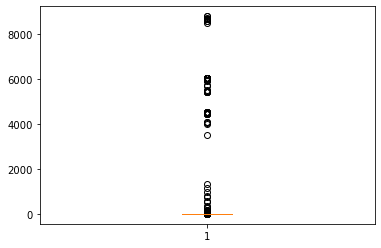

In [36]:
plt.boxplot(df['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15397e8b2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x15397e8b9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15397e7df40>],
 'medians': [<matplotlib.lines.Line2D at 0x153984360a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15398436400>],
 'means': []}

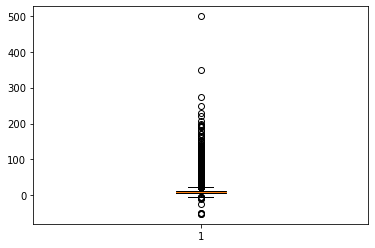

In [37]:
plt.boxplot(df['fare_amount'])

In [39]:
qlow = df['distance'].quantile(0.01)
qhigh = df['distance'].quantile(0.99)

df = df[(df['distance'] > qlow) & (df['distance'] < qhigh)]
df

fare_amount  passenger_count   distance
0               7.5                1   1.681111
1               7.7                1   2.454363
2              12.9                1   5.039603
3               5.3                3   1.661442
4              16.0                5   4.483730
...             ...              ...        ...
199982          3.0                1   0.112128
199983          7.5                1   1.879635
199984         30.9                2  12.867916
199985         14.5                1   3.536552
199986         14.1                1   5.410678

[192355 rows x 3 columns]

In [44]:
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x153982a1100>,
 'caps': [<matplotlib.lines.Line2D at 0x153982a17c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1539da54d60>],
 'medians': [<matplotlib.lines.Line2D at 0x153982a1e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x153982ac220>],
 'means': []}

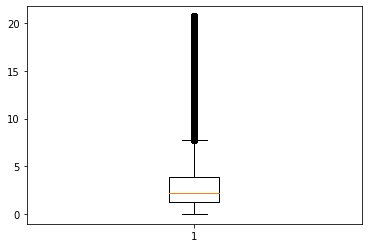

In [42]:
plt.boxplot(df['distance'])

In [43]:
qlow = df['fare_amount'].quantile(0.01)
qhigh = df['fare_amount'].quantile(0.99)

df = df[(df['fare_amount'] > qlow) & (df['fare_amount'] < qhigh)]
df

fare_amount  passenger_count   distance
0               7.5                1   1.681111
1               7.7                1   2.454363
2              12.9                1   5.039603
3               5.3                3   1.661442
4              16.0                5   4.483730
...             ...              ...        ...
192349         12.0                1   1.123897
192351          7.5                1   1.879635
192352         30.9                2  12.867916
192353         14.5                1   3.536552
192354         14.1                1   5.410678

[187635 rows x 3 columns]

# Check the correlation.

In [46]:
df.corr()

fare_amount  passenger_count  distance
fare_amount         1.000000         0.014211  0.872187
passenger_count     0.014211         1.000000  0.004532
distance            0.872187         0.004532  1.000000

<AxesSubplot:>

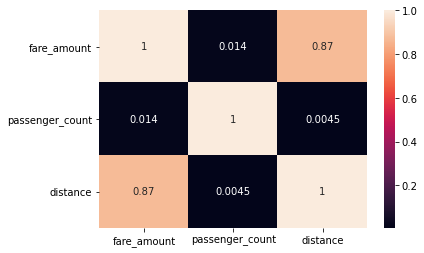

In [47]:
sns.heatmap(df.corr(),annot=True)

# Implement linear regression and random forest regression models.

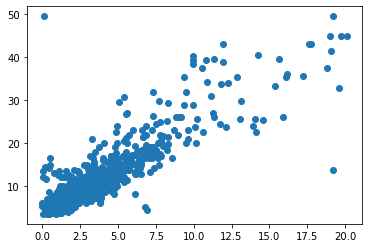

In [77]:
plt.scatter(df['distance'][:1000],df['fare_amount'][:1000])

In [65]:
x = df['distance'].values.reshape(-1,1)
y = df['fare_amount'].values

In [66]:
lrmodel = LinearRegression()

In [67]:
lrmodel.fit(x,y)

LinearRegression()

In [71]:
lrmodel_pred = lrmodel.predict(x)

In [70]:
dist = float(input("Enter the distance in KMs: "))
lrmodel.predict(np.array(dist).reshape(-1,1))

Enter the distance in KMs: 5


array([14.80145667])

# Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [74]:
r2 = r2_score(y,lrmodel_pred)
print(r2)

0.7607103225468368


In [75]:
lrmodel_rmse = np.sqrt(mean_squared_error(y,lrmodel_pred))
print(lrmodel_rmse)

3.515823183233892
